# DEMO

In [98]:
from qutip import *
import numpy as np 
import matplotlib.pyplot as plt
import math
from skimage.feature import peak_local_max
import pickle
import os
import glob
import heapq

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

saveDir = 'peaks'

##  plot peaks

In [61]:
def routine(E_i,wd_i):
    
    print('running param set {} {}'.format(E_i, wd_i))
    
    # Define all the variables 
    kappa = 0.0012 # 0.0012 
    gJC = 0.3347 # 0.3347
    wc = 10.5665 # Cavity frequency/detuning 10.5665
    w0 = 8.1831 # Qubit frequency 8.1831
    gamma=0.0001 # 0.0001
    Emax =0.01 # 0.01
    EN=1
    #E = 0.01 #0.01(original) # Epsilon
    E = E_i
    N = 50 #50
    nloop = 1

    #wd = 10.6005 # Driving frequency (10.6005 original)
    wd = wd_i
    wlist = np.linspace(wd, wd,nloop)

    # Identity operators are defined for the space of the light field and the space of the atom

    ida = identity(N)
    idatom = identity(2)

    # Define cavity field and atomic operators

    a  = tensor(destroy(N),idatom)
    sm = tensor(ida,sigmam())

    # Hamiltonian # Reminder check hamiltonian from caltech paper

    H1= 1*gJC*(a.dag()*sm + sm.dag()*a) + 1*E*(a+a.dag())

    # Collapse Operators

    C1    = math.sqrt(kappa)*a
    C2    = math.sqrt(gamma)*sm

    C1dC1 = C1.dag()*C1
    C2dC2 = C2.dag()*C2

    # Calculate the Liouvillian

    L1 = spre(C1)*spost(C1.dag())-0.5*spre(C1dC1)-0.5*spost(C1dC1)
    L2 = spre(C2)*spost(C2.dag())-0.5*spre(C2dC2)-0.5*spost(C2dC2)
    L12  = L1+L2

    gQ=math.sqrt(4)
    xvec=  np.arange(-10,10.01,0.025) # 0.025
    yvec = np.arange(-10,10.01,0.025) 

    #print("epsilon", E)
    #print("and drive frequency", wd)
    #print("kappa", kappa)
    k=0
    while k < nloop :
        wl = wlist[k]    
        H = (w0-wl)*(sm.dag()*sm) + (wc-wl)*(a.dag()*a) + H1    
        LH = -complex(0,1) * (spre(H) - spost(H))
        L_final = LH + L12

        # Steady States

        rhoss = steadystate(L_final)
        rhosscav=ptrace(rhoss,0)
        rhocavsq=rhosscav*rhosscav
        k += 1

        #subplot(ceil(sqrt(nloop)), 
        #ceil(sqrt(nloop)), k)
    plt.rcParams['figure.figsize'] = (20.0, 16.0)
    fig, ax = plt.subplots()
    Q3 = qfunc(rhosscav,xvec,yvec,gQ)
    c = ax.contourf(xvec, yvec, np.real(Q3), 500, cmap=plt.cm.get_cmap('winter'))
    

#         ax.set_xlim([-3.5, 6]) # -3.5 to 6
#         ax.set_ylim([-4, 3])
    plt.colorbar(c, ax=ax)
    plt.xlabel('x')
    plt.ylabel('y')
    


        #contour(xvec,yvec,real(Q3), 500)
        #plt.plot(xvec,yvec)
        #plt.show()
        #print(rhosscav)
        #print(rhoss)
    
    coordinates = peak_local_max(Q3)    
    for coord in coordinates:
        print('peak coords:{}'.format(coord))        
        coordHeight = Q3[coord[0], coord[1]]
        print('peak height:{}'.format(coordHeight))
        plt.plot(xvec[coord[1]], yvec[coord[0]], 'o', label='{}: {}'.format(coord, coordHeight))        
    plt.legend()
    plt.show()
    #print (Q3[coordinates])
    
#     newKey = len(savedInfo.keys()) + 1
    
#     infoPacket = {}
#     infoPacket['E_i'] = E_i
#     infoPacket['wd_i'] = wd_i
#     infoPacket['coors'] = coordinates
#     infoPacket['peaks'] = Q3[coordinates]
#     infoPacket['Q3'] = Q3
#     infoPacket['xvec'] = xvec
#     infoPacket['yvec'] = yvec
#     return infoPacket

## read peaks

In [125]:
relevantInfo = []
for peak in glob.glob(os.path.join('/mnt/c/Users/manish/Documents/GitHub/qpeak/peaks/peaksOverview', '*')):
    savedInfo = pickle.load(open(peak, 'rb'))    
    
    coors = savedInfo['coors']    
#     peaks = []
#     for coor in coors:        
#         peaks.append(savedInfo['Q3'][coor[0], coor[1]])
    peaks = savedInfo['peaks']
        
    relevantInfo_i = {}
    relevantInfo_i['peakName'] = peak
    relevantInfo_i['E'] = savedInfo['E_i']
    relevantInfo_i['wd'] = savedInfo['wd_i']
    if savedInfo['wd_i'] <= 0:
        print(savedInfo['wd_i'])
        break
    
    relevantInfo_i['peaks'] = peaks
    relevantInfo_i['coors'] = coors
    relevantInfo.append(relevantInfo_i)
    print('E:{}, wd_i:{}, coords:{}, peaks:{}'.format(relevantInfo_i['E'], relevantInfo_i['wd'], relevantInfo_i['coors'],relevantInfo_i['peaks']))
    
print(len(relevantInfo))

E:0.00125, wd_i:10.6095, coords:[[395 383]], peaks:[0.29469260394324304]
E:0.00125, wd_i:10.6095266332, coords:[[395 382]], peaks:[0.29262884604029366]
E:0.00125, wd_i:10.6097663317, coords:[[393 381]], peaks:[0.2680640466785742]
E:0.00125, wd_i:10.6121633166, coords:[[374 431]], peaks:[0.250748730323286]
E:0.00133793969849, wd_i:10.6095, coords:[[394 381]], peaks:[0.2769248946367265]
E:0.00212939698492, wd_i:10.6095, coords:[[362 458]], peaks:[0.18317763906004722]
E:0.00212939698492, wd_i:10.6095266332, coords:[[362 458]], peaks:[0.1843846144855691]
E:0.00212939698492, wd_i:10.6095532663, coords:[[363 458]], peaks:[0.18557522117838904]
E:0.00212939698492, wd_i:10.6095798995, coords:[[363 458]], peaks:[0.18673116673177614]
E:0.00212939698492, wd_i:10.6096065327, coords:[[363 458]], peaks:[0.18784285919096658]
E:0.00212939698492, wd_i:10.6096331658, coords:[[363 457]], peaks:[0.18893395402484064]
E:0.00212939698492, wd_i:10.609659799, coords:[[363 457]], peaks:[0.19000522971536715]
E:0.

E:0.00133793969849, wd_i:10.6097663317, coords:[[391 379]], peaks:[0.23896156259103912]
E:0.00212939698492, wd_i:10.6121633166, coords:[[381 445]], peaks:[0.2633187636626931]
E:0.00212939698492, wd_i:10.6121899497, coords:[[381 444]], peaks:[0.2640704509017494]
E:0.00212939698492, wd_i:10.6122165829, coords:[[381 444]], peaks:[0.26482904675318386]
E:0.00212939698492, wd_i:10.6122432161, coords:[[381 444]], peaks:[0.2655655923404858]
E:0.00212939698492, wd_i:10.6122698492, coords:[[382 444]], peaks:[0.26629743155652175]
E:0.00212939698492, wd_i:10.6122964824, coords:[[382 444]], peaks:[0.2670439642197846]
E:0.00212939698492, wd_i:10.6123231156, coords:[[382 444]], peaks:[0.26776790193608946]
E:0.00212939698492, wd_i:10.6123497487, coords:[[382 443]], peaks:[0.2684954293607341]
E:0.00212939698492, wd_i:10.6123763819, coords:[[382 443]], peaks:[0.2692435182223829]
E:0.00212939698492, wd_i:10.6124030151, coords:[[382 443]], peaks:[0.26996852915052655]
E:0.00133793969849, wd_i:10.6097929648

E:0.00212939698492, wd_i:10.6145070352, coords:[[393 430]], peaks:[0.3108095413986306]
E:0.00212939698492, wd_i:10.6145336683, coords:[[393 429]], peaks:[0.3110400045213803]
E:0.00133793969849, wd_i:10.6100060302, coords:[[386 377]], peaks:[0.1990227474746123]
E:0.00212939698492, wd_i:10.6145603015, coords:[[393 429]], peaks:[0.3112783424967112]
E:0.00212939698492, wd_i:10.6145869347, coords:[[393 429]], peaks:[0.31149526675939904]
E:0.00212939698492, wd_i:10.6146135678, coords:[[394 429]], peaks:[0.31169416360094304]
E:0.00212939698492, wd_i:10.614640201, coords:[[394 429]], peaks:[0.31190303549668236]
E:0.00212939698492, wd_i:10.6146668342, coords:[[394 429]], peaks:[0.3120912897638137]
E:0.00212939698492, wd_i:10.6146934673, coords:[[394 428]], peaks:[0.3122891853686504]
E:0.00212939698492, wd_i:10.6147201005, coords:[[394 428]], peaks:[0.3125078213131235]
E:0.00212939698492, wd_i:10.6147467337, coords:[[394 428]], peaks:[0.3127066744446722]
E:0.00212939698492, wd_i:10.6147733668, c

E:0.00214698492462, wd_i:10.6115241206, coords:[[377 448]], peaks:[0.24561708488216216]
E:0.00214698492462, wd_i:10.6115507538, coords:[[377 448]], peaks:[0.2463891983908315]
E:0.00214698492462, wd_i:10.6115773869, coords:[[377 448]], peaks:[0.24714328601856045]
E:0.00214698492462, wd_i:10.6116040201, coords:[[377 448]], peaks:[0.24787916872626148]
E:0.00133793969849, wd_i:10.6102457286, coords:[[378 378]
 [356 433]], peaks:[0.16389243647524027, 0.110532570544549]
E:0.00214698492462, wd_i:10.6116306533, coords:[[378 448]], peaks:[0.2486105808453103]
E:0.00214698492462, wd_i:10.6116572864, coords:[[378 448]], peaks:[0.24936105717897575]
E:0.00214698492462, wd_i:10.6116839196, coords:[[378 448]], peaks:[0.2500930932256382]
E:0.00214698492462, wd_i:10.6117105528, coords:[[378 447]], peaks:[0.2508510491086294]
E:0.00214698492462, wd_i:10.6117371859, coords:[[378 447]], peaks:[0.2516109893879676]
E:0.00214698492462, wd_i:10.6117638191, coords:[[378 447]], peaks:[0.25235215714020737]
E:0.002

E:0.00214698492462, wd_i:10.6139743719, coords:[[391 433]], peaks:[0.30459266256764755]
E:0.00214698492462, wd_i:10.614001005, coords:[[391 433]], peaks:[0.30497607657005504]
E:0.00133793969849, wd_i:10.6104854271, coords:[[365 385]
 [357 433]], peaks:[0.14655385771817867, 0.13652571258725393]
E:0.00214698492462, wd_i:10.6140276382, coords:[[391 433]], peaks:[0.3053329732636347]
E:0.00214698492462, wd_i:10.6140542714, coords:[[391 433]], peaks:[0.3056635947019071]
E:0.00214698492462, wd_i:10.6140809045, coords:[[392 433]], peaks:[0.30600039995100864]
E:0.00214698492462, wd_i:10.6141075377, coords:[[392 432]], peaks:[0.30638307429634776]
E:0.00214698492462, wd_i:10.6141341709, coords:[[392 432]], peaks:[0.30675453210313103]
E:0.00214698492462, wd_i:10.614160804, coords:[[392 432]], peaks:[0.3071002066148002]
E:0.00214698492462, wd_i:10.6141874372, coords:[[392 432]], peaks:[0.30742038979795794]
E:0.00214698492462, wd_i:10.6142140704, coords:[[392 432]], peaks:[0.3077153902640767]
E:0.00

E:0.00216457286432, wd_i:10.6109914573, coords:[[374 452]], peaks:[0.23136025376909847]
E:0.00216457286432, wd_i:10.6110180905, coords:[[373 451]], peaks:[0.23208400018760186]
E:0.00216457286432, wd_i:10.6110447236, coords:[[374 451]], peaks:[0.23282224494939602]
E:0.00216457286432, wd_i:10.6110713568, coords:[[374 451]], peaks:[0.2335685962814616]
E:0.00133793969849, wd_i:10.6107251256, coords:[[358 431]], peaks:[0.15912493097353128]
E:0.00216457286432, wd_i:10.6110979899, coords:[[374 451]], peaks:[0.23429843985160262]
E:0.00216457286432, wd_i:10.6111246231, coords:[[374 451]], peaks:[0.23501157304235054]
E:0.00216457286432, wd_i:10.6111512563, coords:[[375 451]], peaks:[0.235732841588178]
E:0.00216457286432, wd_i:10.6111778894, coords:[[375 451]], peaks:[0.236460941892193]
E:0.00216457286432, wd_i:10.6112045226, coords:[[375 450]], peaks:[0.23718234405914404]
E:0.00216457286432, wd_i:10.6112311558, coords:[[375 450]], peaks:[0.2379376107427704]
E:0.00216457286432, wd_i:10.6112577889

E:0.00133793969849, wd_i:10.6109648241, coords:[[360 431]], peaks:[0.17945523528591373]
E:0.00216457286432, wd_i:10.6134949749, coords:[[389 437]], peaks:[0.2962450898203556]
E:0.00216457286432, wd_i:10.613521608, coords:[[389 436]], peaks:[0.2967849950180757]
E:0.00216457286432, wd_i:10.6135482412, coords:[[389 436]], peaks:[0.29731688494494063]
E:0.00216457286432, wd_i:10.6135748744, coords:[[389 436]], peaks:[0.29782133568105557]
E:0.00216457286432, wd_i:10.6136015075, coords:[[389 436]], peaks:[0.298298345667863]
E:0.00216457286432, wd_i:10.6136281407, coords:[[390 436]], peaks:[0.29876657068578943]
E:0.00216457286432, wd_i:10.6136547739, coords:[[390 436]], peaks:[0.29923673353357444]
E:0.00216457286432, wd_i:10.613681407, coords:[[390 435]], peaks:[0.29975146219484994]
E:0.00216457286432, wd_i:10.6137080402, coords:[[390 435]], peaks:[0.30024434029388347]
E:0.00216457286432, wd_i:10.6137346734, coords:[[390 435]], peaks:[0.30070972710734517]
E:0.00133793969849, wd_i:10.6109914573

E:0.00218216080402, wd_i:10.6109115578, coords:[[373 452]], peaks:[0.22973863114997115]
E:0.00218216080402, wd_i:10.610938191, coords:[[373 452]], peaks:[0.2304552190505909]
E:0.00218216080402, wd_i:10.6109648241, coords:[[373 452]], peaks:[0.23115565537851032]
E:0.00218216080402, wd_i:10.6109914573, coords:[[374 452]], peaks:[0.23187595085714466]
E:0.00218216080402, wd_i:10.6110180905, coords:[[374 452]], peaks:[0.23259193170441755]
E:0.00218216080402, wd_i:10.6110447236, coords:[[374 452]], peaks:[0.23329154523199813]
E:0.00218216080402, wd_i:10.6110713568, coords:[[374 451]], peaks:[0.23403327259217455]
E:0.00133793969849, wd_i:10.6112577889, coords:[[364 432]], peaks:[0.20060309518728064]
E:0.00218216080402, wd_i:10.6110979899, coords:[[374 451]], peaks:[0.23475997877126387]
E:0.00218216080402, wd_i:10.6111246231, coords:[[374 451]], peaks:[0.2354700795463855]
E:0.00218216080402, wd_i:10.6111512563, coords:[[375 451]], peaks:[0.2361974595957473]
E:0.00218216080402, wd_i:10.61117788

E:0.00218216080402, wd_i:10.6137346734, coords:[[390 435]], peaks:[0.30061716448538767]
E:0.00133793969849, wd_i:10.6115241206, coords:[[367 433]], peaks:[0.21714638068950423]
E:0.00218216080402, wd_i:10.6137613065, coords:[[390 435]], peaks:[0.3010653252744389]
E:0.00218216080402, wd_i:10.6137879397, coords:[[390 435]], peaks:[0.30148639037186176]
E:0.00218216080402, wd_i:10.6138145729, coords:[[390 435]], peaks:[0.3018804701162493]
E:0.00218216080402, wd_i:10.613841206, coords:[[390 434]], peaks:[0.30231314022096595]
E:0.00218216080402, wd_i:10.6138678392, coords:[[391 434]], peaks:[0.30276265166119204]
E:0.00218216080402, wd_i:10.6138944724, coords:[[391 434]], peaks:[0.3031986211517671]
E:0.00218216080402, wd_i:10.6139211055, coords:[[391 434]], peaks:[0.303607765861603]
E:0.00218216080402, wd_i:10.6139477387, coords:[[391 434]], peaks:[0.30399025410292524]
E:0.00218216080402, wd_i:10.6139743719, coords:[[391 434]], peaks:[0.3043462746043299]
E:0.00218216080402, wd_i:10.614001005, 

E:0.00219974874372, wd_i:10.6111512563, coords:[[375 451]], peaks:[0.2366435246090019]
E:0.00219974874372, wd_i:10.6111778894, coords:[[375 451]], peaks:[0.23736625301569017]
E:0.00219974874372, wd_i:10.6112045226, coords:[[375 451]], peaks:[0.23807216434029208]
E:0.00219974874372, wd_i:10.6112311558, coords:[[375 451]], peaks:[0.2387610659640091]
E:0.00219974874372, wd_i:10.6112577889, coords:[[375 450]], peaks:[0.23948068003313133]
E:0.00219974874372, wd_i:10.6112844221, coords:[[375 450]], peaks:[0.2401968580001108]
E:0.00219974874372, wd_i:10.6113110553, coords:[[376 450]], peaks:[0.24093689812713387]
E:0.00219974874372, wd_i:10.6113376884, coords:[[376 450]], peaks:[0.24166814422334146]
E:0.00133793969849, wd_i:10.6118170854, coords:[[371 433]], peaks:[0.2339818357108894]
E:0.00219974874372, wd_i:10.6113643216, coords:[[376 450]], peaks:[0.2423820631786149]
E:0.00219974874372, wd_i:10.6113909548, coords:[[376 450]], peaks:[0.24307848265672416]
E:0.00219974874372, wd_i:10.611417587

E:0.00219974874372, wd_i:10.613841206, coords:[[391 435]], peaks:[0.30220974217168606]
E:0.00219974874372, wd_i:10.6138678392, coords:[[391 434]], peaks:[0.30264574840379044]
E:0.00219974874372, wd_i:10.6138944724, coords:[[391 434]], peaks:[0.30309249419523715]
E:0.00219974874372, wd_i:10.6139211055, coords:[[391 434]], peaks:[0.30351261181614764]
E:0.00219974874372, wd_i:10.6139477387, coords:[[391 434]], peaks:[0.3039062593619685]
E:0.00219974874372, wd_i:10.6139743719, coords:[[391 434]], peaks:[0.3042736150330194]
E:0.00219974874372, wd_i:10.614001005, coords:[[391 433]], peaks:[0.3046279108067484]
E:0.00133793969849, wd_i:10.6120834171, coords:[[374 433]], peaks:[0.24812337819650787]
E:0.00219974874372, wd_i:10.6140276382, coords:[[391 433]], peaks:[0.30501993586272863]
E:0.00219974874372, wd_i:10.6140542714, coords:[[391 433]], peaks:[0.305386154297299]
E:0.00219974874372, wd_i:10.6140809045, coords:[[392 433]], peaks:[0.3057365682311186]
E:0.00219974874372, wd_i:10.6141075377, 

E:0.00221733668342, wd_i:10.6112045226, coords:[[375 451]], peaks:[0.23849557859444265]
E:0.00221733668342, wd_i:10.6112311558, coords:[[375 451]], peaks:[0.2391823189211955]
E:0.00221733668342, wd_i:10.6112577889, coords:[[376 451]], peaks:[0.23989973014228885]
E:0.00221733668342, wd_i:10.6112844221, coords:[[376 451]], peaks:[0.24060077442068614]
E:0.00221733668342, wd_i:10.6113110553, coords:[[376 450]], peaks:[0.2413181377983472]
E:0.00221733668342, wd_i:10.6113376884, coords:[[376 450]], peaks:[0.24204752437027188]
E:0.00133793969849, wd_i:10.6123497487, coords:[[377 433]], peaks:[0.26079397744390603]
E:0.00221733668342, wd_i:10.6113643216, coords:[[376 450]], peaks:[0.24275968204642717]
E:0.00221733668342, wd_i:10.6113909548, coords:[[376 450]], peaks:[0.2434544373646668]
E:0.00221733668342, wd_i:10.6114175879, coords:[[377 450]], peaks:[0.2441745502810248]
E:0.00221733668342, wd_i:10.6114442211, coords:[[377 450]], peaks:[0.2448833845249613]
E:0.00221733668342, wd_i:10.611470854

E:0.00221733668342, wd_i:10.6137346734, coords:[[390 435]], peaks:[0.30040856565478175]
E:0.00133793969849, wd_i:10.6125894472, coords:[[380 432]], peaks:[0.2712142991939173]
E:0.00221733668342, wd_i:10.6137613065, coords:[[390 435]], peaks:[0.30087673471286114]
E:0.00221733668342, wd_i:10.6137879397, coords:[[390 435]], peaks:[0.30131824653935074]
E:0.00221733668342, wd_i:10.6138145729, coords:[[390 435]], peaks:[0.3017331945331878]
E:0.00221733668342, wd_i:10.613841206, coords:[[391 435]], peaks:[0.3021366821834611]
E:0.00221733668342, wd_i:10.6138678392, coords:[[391 435]], peaks:[0.3025431252958007]
E:0.00221733668342, wd_i:10.6138944724, coords:[[391 434]], peaks:[0.30297833722942336]
E:0.00221733668342, wd_i:10.6139211055, coords:[[391 434]], peaks:[0.3034092908932829]
E:0.00221733668342, wd_i:10.6139477387, coords:[[391 434]], peaks:[0.30381396052904824]
E:0.00221733668342, wd_i:10.6139743719, coords:[[391 434]], peaks:[0.3041925141638215]
E:0.00221733668342, wd_i:10.614001005, 

E:0.00223492462312, wd_i:10.6109648241, coords:[[374 453]], peaks:[0.23259188453581126]
E:0.00223492462312, wd_i:10.6109914573, coords:[[374 452]], peaks:[0.2333055322175139]
E:0.00223492462312, wd_i:10.6110180905, coords:[[374 452]], peaks:[0.23401291384141867]
E:0.00223492462312, wd_i:10.6110447236, coords:[[374 452]], peaks:[0.23470419531235856]
E:0.00223492462312, wd_i:10.6110713568, coords:[[375 452]], peaks:[0.23539290289108408]
E:0.00133793969849, wd_i:10.6128557789, coords:[[383 431]], peaks:[0.28191699289972894]
E:0.00223492462312, wd_i:10.6110979899, coords:[[375 452]], peaks:[0.23609923486288667]
E:0.00223492462312, wd_i:10.6111246231, coords:[[375 452]], peaks:[0.23678919087074152]
E:0.00223492462312, wd_i:10.6111512563, coords:[[375 451]], peaks:[0.23748208128744444]
E:0.00223492462312, wd_i:10.6111778894, coords:[[375 451]], peaks:[0.2382002888651403]
E:0.00223492462312, wd_i:10.6112045226, coords:[[375 451]], peaks:[0.2389018757259932]
E:0.00223492462312, wd_i:10.6112311

E:0.00223492462312, wd_i:10.6134417085, coords:[[389 438]], peaks:[0.29490763420175026]
E:0.00223492462312, wd_i:10.6134683417, coords:[[389 437]], peaks:[0.29546430208984514]
E:0.00133793969849, wd_i:10.6130954774, coords:[[385 430]], peaks:[0.29066616986723115]
E:0.00223492462312, wd_i:10.6134949749, coords:[[389 437]], peaks:[0.2960062476941663]
E:0.00223492462312, wd_i:10.613521608, coords:[[389 437]], peaks:[0.2965217202297859]
E:0.00223492462312, wd_i:10.6135482412, coords:[[389 437]], peaks:[0.29701068925141455]
E:0.00223492462312, wd_i:10.6135748744, coords:[[389 437]], peaks:[0.2974731424339487]
E:0.00223492462312, wd_i:10.6136015075, coords:[[389 436]], peaks:[0.2979566346368831]
E:0.00223492462312, wd_i:10.6136281407, coords:[[390 436]], peaks:[0.2984431631548737]
E:0.00223492462312, wd_i:10.6136547739, coords:[[390 436]], peaks:[0.29895021935316735]
E:0.00223492462312, wd_i:10.613681407, coords:[[390 436]], peaks:[0.2994306147541172]
E:0.00223492462312, wd_i:10.6137080402, 

E:0.00225251256281, wd_i:10.6108849246, coords:[[373 453]], peaks:[0.2310139869171518]
E:0.00225251256281, wd_i:10.6109115578, coords:[[374 453]], peaks:[0.23170369059638238]
E:0.00225251256281, wd_i:10.610938191, coords:[[374 453]], peaks:[0.2323965473020494]
E:0.00225251256281, wd_i:10.6109648241, coords:[[374 453]], peaks:[0.23307350900053797]
E:0.00225251256281, wd_i:10.6109914573, coords:[[374 452]], peaks:[0.2337447732797247]
E:0.00225251256281, wd_i:10.6110180905, coords:[[374 452]], peaks:[0.23444974231939839]
E:0.00225251256281, wd_i:10.6110447236, coords:[[374 452]], peaks:[0.2351386937185015]
E:0.00225251256281, wd_i:10.6110713568, coords:[[375 452]], peaks:[0.23583387083405108]
E:0.00133793969849, wd_i:10.6133884422, coords:[[388 429]], peaks:[0.29958047791102793]
E:0.00225251256281, wd_i:10.6110979899, coords:[[375 452]], peaks:[0.23653805638796715]
E:0.00225251256281, wd_i:10.6111246231, coords:[[375 452]], peaks:[0.23722595286165354]
E:0.00225251256281, wd_i:10.611151256

E:0.00225251256281, wd_i:10.613521608, coords:[[389 437]], peaks:[0.29645148189856785]
E:0.00225251256281, wd_i:10.6135482412, coords:[[389 437]], peaks:[0.2969488799228945]
E:0.00225251256281, wd_i:10.6135748744, coords:[[389 437]], peaks:[0.2974199937652032]
E:0.00225251256281, wd_i:10.6136015075, coords:[[389 437]], peaks:[0.29786482471898273]
E:0.00225251256281, wd_i:10.6136281407, coords:[[389 436]], peaks:[0.2983479397613886]
E:0.00225251256281, wd_i:10.6136547739, coords:[[390 436]], peaks:[0.29885954022239913]
E:0.00225251256281, wd_i:10.613681407, coords:[[390 436]], peaks:[0.29934912912514305]
E:0.00225251256281, wd_i:10.6137080402, coords:[[390 436]], peaks:[0.29981231503261146]
E:0.00225251256281, wd_i:10.6137346734, coords:[[390 436]], peaks:[0.3002491457269497]
E:0.00133793969849, wd_i:10.6136547739, coords:[[390 427]], peaks:[0.30580302138695026]
E:0.00225251256281, wd_i:10.6137613065, coords:[[390 436]], peaks:[0.3006596883980505]
E:0.00225251256281, wd_i:10.6137879397,

E:0.00227010050251, wd_i:10.6109115578, coords:[[374 453]], peaks:[0.23217197169498127]
E:0.00227010050251, wd_i:10.610938191, coords:[[374 453]], peaks:[0.23286246568416988]
E:0.00227010050251, wd_i:10.6109648241, coords:[[374 453]], peaks:[0.23353713944243615]
E:0.00227010050251, wd_i:10.6109914573, coords:[[374 453]], peaks:[0.23419585828771747]
E:0.00227010050251, wd_i:10.6110180905, coords:[[375 453]], peaks:[0.2348720669063875]
E:0.00227010050251, wd_i:10.6110447236, coords:[[374 452]], peaks:[0.2355558516345272]
E:0.00227010050251, wd_i:10.6110713568, coords:[[375 452]], peaks:[0.23625764184535136]
E:0.00133793969849, wd_i:10.6139211055, coords:[[391 425]], peaks:[0.3101667990170691]
E:0.00227010050251, wd_i:10.6110979899, coords:[[375 452]], peaks:[0.23695987659803766]
E:0.00227010050251, wd_i:10.6111246231, coords:[[375 452]], peaks:[0.23764590628403437]
E:0.00227010050251, wd_i:10.6111512563, coords:[[375 452]], peaks:[0.2383155499904963]
E:0.00227010050251, wd_i:10.611177889

E:0.00227010050251, wd_i:10.6134150754, coords:[[389 438]], peaks:[0.2942970581827561]
E:0.00227010050251, wd_i:10.6134417085, coords:[[389 438]], peaks:[0.29482977506082236]
E:0.00227010050251, wd_i:10.6134683417, coords:[[389 438]], peaks:[0.2953364954603359]
E:0.00133793969849, wd_i:10.614160804, coords:[[393 424]], peaks:[0.3128660370949305]
E:0.00227010050251, wd_i:10.6134949749, coords:[[389 437]], peaks:[0.2958421453458852]
E:0.00227010050251, wd_i:10.613521608, coords:[[389 437]], peaks:[0.29637392397746065]
E:0.00227010050251, wd_i:10.6135482412, coords:[[389 437]], peaks:[0.29687966752181266]
E:0.00227010050251, wd_i:10.6135748744, coords:[[389 437]], peaks:[0.29735935515598616]
E:0.00227010050251, wd_i:10.6136015075, coords:[[389 437]], peaks:[0.29781298356268987]
E:0.00227010050251, wd_i:10.6136281407, coords:[[390 437]], peaks:[0.29827738136271453]
E:0.00227010050251, wd_i:10.6136547739, coords:[[390 436]], peaks:[0.29876150291544284]
E:0.00227010050251, wd_i:10.613681407,

E:0.00228768844221, wd_i:10.6108050251, coords:[[373 454]], peaks:[0.2299459631681858]
E:0.00133793969849, wd_i:10.6144271357, coords:[[394 422]], peaks:[0.3148874154309336]
E:0.00228768844221, wd_i:10.6108316583, coords:[[374 454]], peaks:[0.2305955730327863]
E:0.00228768844221, wd_i:10.6108582915, coords:[[374 454]], peaks:[0.23127124107988864]
E:0.00228768844221, wd_i:10.6108849246, coords:[[374 454]], peaks:[0.2319311629988292]
E:0.00228768844221, wd_i:10.6109115578, coords:[[374 453]], peaks:[0.2326223490160448]
E:0.00228768844221, wd_i:10.610938191, coords:[[374 453]], peaks:[0.23331068850413106]
E:0.00228768844221, wd_i:10.6109648241, coords:[[374 453]], peaks:[0.23398328019408704]
E:0.00228768844221, wd_i:10.6109914573, coords:[[374 453]], peaks:[0.23463999034317679]
E:0.00228768844221, wd_i:10.6110180905, coords:[[375 453]], peaks:[0.23532281918111822]
E:0.00228768844221, wd_i:10.6110447236, coords:[[375 453]], peaks:[0.23599418368974426]
E:0.00228768844221, wd_i:10.6110713568

E:0.00228768844221, wd_i:10.6135482412, coords:[[389 437]], peaks:[0.29680317440244847]
E:0.00228768844221, wd_i:10.6135748744, coords:[[389 437]], peaks:[0.29729135017530794]
E:0.00228768844221, wd_i:10.6136015075, coords:[[389 437]], peaks:[0.29775368727091556]
E:0.00228768844221, wd_i:10.6136281407, coords:[[390 437]], peaks:[0.29822276251331925]
E:0.00228768844221, wd_i:10.6136547739, coords:[[390 437]], peaks:[0.2986790379897587]
E:0.00228768844221, wd_i:10.613681407, coords:[[390 436]], peaks:[0.2991639015601701]
E:0.00228768844221, wd_i:10.6137080402, coords:[[390 436]], peaks:[0.29964560489526665]
E:0.00228768844221, wd_i:10.6137346734, coords:[[390 436]], peaks:[0.30010137907278783]
E:0.00133793969849, wd_i:10.6147201005, coords:[[395 420]], peaks:[0.31623205965720924]
E:0.00228768844221, wd_i:10.6137613065, coords:[[390 436]], peaks:[0.3005312779293592]
E:0.00228768844221, wd_i:10.6137879397, coords:[[390 436]], peaks:[0.300935373880285]
E:0.00228768844221, wd_i:10.6138145729

E:0.00230527638191, wd_i:10.6108849246, coords:[[374 454]], peaks:[0.23240491148694878]
E:0.00230527638191, wd_i:10.6109115578, coords:[[374 453]], peaks:[0.23305532789597103]
E:0.00230527638191, wd_i:10.610938191, coords:[[374 453]], peaks:[0.23374171090447285]
E:0.00230527638191, wd_i:10.6109648241, coords:[[374 453]], peaks:[0.23441241644790312]
E:0.00230527638191, wd_i:10.6109914573, coords:[[375 453]], peaks:[0.23507132655716081]
E:0.00230527638191, wd_i:10.6110180905, coords:[[375 453]], peaks:[0.23575689592175342]
E:0.00230527638191, wd_i:10.6110447236, coords:[[375 453]], peaks:[0.23642659965534518]
E:0.00230527638191, wd_i:10.6110713568, coords:[[375 453]], peaks:[0.2370802797325389]
E:0.00135552763819, wd_i:10.609659799, coords:[[392 379]], peaks:[0.24948448291754718]
E:0.00230527638191, wd_i:10.6110979899, coords:[[375 452]], peaks:[0.23775434630089665]
E:0.00230527638191, wd_i:10.6111246231, coords:[[375 452]], peaks:[0.2384371862183881]
E:0.00230527638191, wd_i:10.61115125

E:0.00230527638191, wd_i:10.613521608, coords:[[389 438]], peaks:[0.29621221861007196]
E:0.00230527638191, wd_i:10.6135482412, coords:[[389 437]], peaks:[0.29671952057871964]
E:0.00230527638191, wd_i:10.6135748744, coords:[[389 437]], peaks:[0.29721610000790155]
E:0.00230527638191, wd_i:10.6136015075, coords:[[389 437]], peaks:[0.29768705827170006]
E:0.00230527638191, wd_i:10.6136281407, coords:[[390 437]], peaks:[0.2981607880934286]
E:0.00230527638191, wd_i:10.6136547739, coords:[[390 437]], peaks:[0.2986258895790317]
E:0.00230527638191, wd_i:10.613681407, coords:[[390 437]], peaks:[0.29906519434217893]
E:0.00230527638191, wd_i:10.6137080402, coords:[[390 436]], peaks:[0.2995512202577982]
E:0.00230527638191, wd_i:10.6137346734, coords:[[390 436]], peaks:[0.30001630796797313]
E:0.00135552763819, wd_i:10.6099261307, coords:[[388 377]], peaks:[0.2052303949574942]
E:0.00230527638191, wd_i:10.6137613065, coords:[[390 436]], peaks:[0.30045572361896494]
E:0.00230527638191, wd_i:10.6137879397

E:0.00232286432161, wd_i:10.6108050251, coords:[[373 454]], peaks:[0.23087121148828713]
E:0.00135552763819, wd_i:10.6101658291, coords:[[380 377]
 [356 435]], peaks:[0.16772229417760876, 0.1053353284588983]
E:0.00232286432161, wd_i:10.6108316583, coords:[[374 454]], peaks:[0.23153386010388763]
E:0.00232286432161, wd_i:10.6108582915, coords:[[374 454]], peaks:[0.2322055011947703]
E:0.00232286432161, wd_i:10.6108849246, coords:[[374 454]], peaks:[0.23286153771607726]
E:0.00232286432161, wd_i:10.6109115578, coords:[[374 454]], peaks:[0.23350187580218892]
E:0.00232286432161, wd_i:10.610938191, coords:[[374 453]], peaks:[0.2341560092519389]
E:0.00232286432161, wd_i:10.6109648241, coords:[[374 453]], peaks:[0.23482501515237825]
E:0.00232286432161, wd_i:10.6109914573, coords:[[375 453]], peaks:[0.23549072974382765]
E:0.00232286432161, wd_i:10.6110180905, coords:[[375 453]], peaks:[0.23617474454740478]
E:0.00232286432161, wd_i:10.6110447236, coords:[[375 453]], peaks:[0.23684296379319444]
E:0.

E:0.00232286432161, wd_i:10.6133085427, coords:[[388 439]], peaks:[0.292051011738285]
E:0.00232286432161, wd_i:10.6133351759, coords:[[388 439]], peaks:[0.29258278189629944]
E:0.00232286432161, wd_i:10.613361809, coords:[[388 439]], peaks:[0.293089514166531]
E:0.00232286432161, wd_i:10.6133884422, coords:[[389 439]], peaks:[0.2935774778500933]
E:0.00232286432161, wd_i:10.6134150754, coords:[[389 438]], peaks:[0.2941033677675667]
E:0.00232286432161, wd_i:10.6134417085, coords:[[389 438]], peaks:[0.29465841677143506]
E:0.00232286432161, wd_i:10.6134683417, coords:[[389 438]], peaks:[0.29518814513696306]
E:0.00135552763819, wd_i:10.6104321608, coords:[[366 383]
 [358 436]], peaks:[0.14451428683900147, 0.13487048263694532]
E:0.00232286432161, wd_i:10.6134949749, coords:[[389 438]], peaks:[0.2956924997393711]
E:0.00232286432161, wd_i:10.613521608, coords:[[389 438]], peaks:[0.2961714428214081]
E:0.00232286432161, wd_i:10.6135482412, coords:[[389 437]], peaks:[0.29662882378995775]
E:0.002322

E:0.00234045226131, wd_i:10.6107517588, coords:[[373 455]], peaks:[0.23001381992119752]
E:0.00234045226131, wd_i:10.610778392, coords:[[374 455]], peaks:[0.23066169478281026]
E:0.00234045226131, wd_i:10.6108050251, coords:[[373 454]], peaks:[0.23130783012797337]
E:0.00135552763819, wd_i:10.6106984925, coords:[[359 434]], peaks:[0.15955893708463975]
E:0.00234045226131, wd_i:10.6108316583, coords:[[374 454]], peaks:[0.23197722197710122]
E:0.00234045226131, wd_i:10.6108582915, coords:[[374 454]], peaks:[0.23264713481675686]
E:0.00234045226131, wd_i:10.6108849246, coords:[[374 454]], peaks:[0.23330151107622432]
E:0.00234045226131, wd_i:10.6109115578, coords:[[374 454]], peaks:[0.23394025554170708]
E:0.00234045226131, wd_i:10.610938191, coords:[[375 454]], peaks:[0.23458819246342252]
E:0.00234045226131, wd_i:10.6109648241, coords:[[375 454]], peaks:[0.23524109355669726]
E:0.00234045226131, wd_i:10.6109914573, coords:[[375 453]], peaks:[0.23589416588616582]
E:0.00234045226131, wd_i:10.611018

E:0.00234045226131, wd_i:10.6132819095, coords:[[388 439]], peaks:[0.2914399711217776]
E:0.00234045226131, wd_i:10.6133085427, coords:[[388 439]], peaks:[0.29200335069359157]
E:0.00234045226131, wd_i:10.6133351759, coords:[[388 439]], peaks:[0.2925419841980633]
E:0.00234045226131, wd_i:10.613361809, coords:[[388 439]], peaks:[0.29305579187885045]
E:0.00234045226131, wd_i:10.6133884422, coords:[[389 439]], peaks:[0.2935486639382515]
E:0.00234045226131, wd_i:10.6134150754, coords:[[389 439]], peaks:[0.2940591907539596]
E:0.00234045226131, wd_i:10.6134417085, coords:[[389 438]], peaks:[0.29458720535285093]
E:0.00234045226131, wd_i:10.6134683417, coords:[[389 438]], peaks:[0.2951244726209105]
E:0.00135552763819, wd_i:10.6109648241, coords:[[361 433]], peaks:[0.1814381649729944]
E:0.00234045226131, wd_i:10.6134949749, coords:[[389 438]], peaks:[0.29563658180355007]
E:0.00234045226131, wd_i:10.613521608, coords:[[389 438]], peaks:[0.29612349213348294]
E:0.00234045226131, wd_i:10.6135482412, 

E:0.00135552763819, wd_i:10.6112311558, coords:[[364 433]], peaks:[0.20023022248696953]
E:0.00235804020101, wd_i:10.6108316583, coords:[[374 454]], peaks:[0.23240402882966865]
E:0.00235804020101, wd_i:10.6108582915, coords:[[374 454]], peaks:[0.23307239114764053]
E:0.00235804020101, wd_i:10.6108849246, coords:[[374 454]], peaks:[0.23372528326140826]
E:0.00235804020101, wd_i:10.6109115578, coords:[[374 454]], peaks:[0.23436260865138472]
E:0.00235804020101, wd_i:10.610938191, coords:[[375 454]], peaks:[0.2350174844938332]
E:0.00235804020101, wd_i:10.6109648241, coords:[[375 454]], peaks:[0.23566910119025863]
E:0.00235804020101, wd_i:10.6109914573, coords:[[375 454]], peaks:[0.23630502643687687]
E:0.00235804020101, wd_i:10.6110180905, coords:[[375 453]], peaks:[0.23696346620157457]
E:0.00235804020101, wd_i:10.6110447236, coords:[[375 453]], peaks:[0.2376292132563148]
E:0.00235804020101, wd_i:10.6110713568, coords:[[375 453]], peaks:[0.23827914661882368]
E:0.00135552763819, wd_i:10.6112577

E:0.00135552763819, wd_i:10.6114974874, coords:[[367 433]], peaks:[0.21651172706148486]
E:0.00235804020101, wd_i:10.6134949749, coords:[[389 438]], peaks:[0.2955736719457076]
E:0.00235804020101, wd_i:10.613521608, coords:[[389 438]], peaks:[0.2960684790174438]
E:0.00235804020101, wd_i:10.6135482412, coords:[[389 438]], peaks:[0.2965382681052123]
E:0.00235804020101, wd_i:10.6135748744, coords:[[389 438]], peaks:[0.2969830257591013]
E:0.00235804020101, wd_i:10.6136015075, coords:[[389 437]], peaks:[0.29744436432136506]
E:0.00235804020101, wd_i:10.6136281407, coords:[[390 437]], peaks:[0.29793191977847644]
E:0.00235804020101, wd_i:10.6136547739, coords:[[390 437]], peaks:[0.2984229604761721]
E:0.00235804020101, wd_i:10.613681407, coords:[[390 437]], peaks:[0.29888881888241636]
E:0.00235804020101, wd_i:10.6137080402, coords:[[390 437]], peaks:[0.2993295179017651]
E:0.00235804020101, wd_i:10.6137346734, coords:[[390 437]], peaks:[0.2997450972446209]
E:0.00135552763819, wd_i:10.6115241206, c

E:0.0023756281407, wd_i:10.6108582915, coords:[[374 454]], peaks:[0.23348171352514346]
E:0.0023756281407, wd_i:10.6108849246, coords:[[374 454]], peaks:[0.23413328910285328]
E:0.0023756281407, wd_i:10.6109115578, coords:[[374 454]], peaks:[0.23476936161994347]
E:0.0023756281407, wd_i:10.610938191, coords:[[375 454]], peaks:[0.23543128872028457]
E:0.0023756281407, wd_i:10.6109648241, coords:[[375 454]], peaks:[0.23608178075009362]
E:0.0023756281407, wd_i:10.6109914573, coords:[[375 454]], peaks:[0.23671664321214725]
E:0.0023756281407, wd_i:10.6110180905, coords:[[375 454]], peaks:[0.23733574598811907]
E:0.0023756281407, wd_i:10.6110447236, coords:[[375 453]], peaks:[0.23799989963700574]
E:0.0023756281407, wd_i:10.6110713568, coords:[[375 453]], peaks:[0.23864889688410873]
E:0.00135552763819, wd_i:10.6117904523, coords:[[371 434]], peaks:[0.23309893340591503]
E:0.0023756281407, wd_i:10.6110979899, coords:[[376 453]], peaks:[0.23931098636632095]
E:0.0023756281407, wd_i:10.6111246231, coor

E:0.0023756281407, wd_i:10.6135748744, coords:[[389 438]], peaks:[0.2969373214196042]
E:0.0023756281407, wd_i:10.6136015075, coords:[[390 438]], peaks:[0.29737886920288686]
E:0.0023756281407, wd_i:10.6136281407, coords:[[390 437]], peaks:[0.2978417002083616]
E:0.0023756281407, wd_i:10.6136547739, coords:[[390 437]], peaks:[0.2983412118449405]
E:0.0023756281407, wd_i:10.613681407, coords:[[390 437]], peaks:[0.29881574112676046]
E:0.0023756281407, wd_i:10.6137080402, coords:[[390 437]], peaks:[0.29926530606193763]
E:0.0023756281407, wd_i:10.6137346734, coords:[[390 437]], peaks:[0.29968994109508357]
E:0.00135552763819, wd_i:10.6120567839, coords:[[374 434]], peaks:[0.24710860227373424]
E:0.0023756281407, wd_i:10.6137613065, coords:[[390 437]], peaks:[0.30008969719983003]
E:0.0023756281407, wd_i:10.6137879397, coords:[[390 436]], peaks:[0.3005323992837236]
E:0.0023756281407, wd_i:10.6138145729, coords:[[390 436]], peaks:[0.3009592258067365]
E:0.0023756281407, wd_i:10.613841206, coords:[[3

E:0.0023932160804, wd_i:10.610778392, coords:[[374 455]], peaks:[0.232015981885887]
E:0.0023932160804, wd_i:10.6108050251, coords:[[374 455]], peaks:[0.23265281628228188]
E:0.00135552763819, wd_i:10.6122964824, coords:[[377 433]], peaks:[0.2585429697681515]
E:0.0023932160804, wd_i:10.6108316583, coords:[[374 455]], peaks:[0.2332741663848584]
E:0.0023932160804, wd_i:10.6108582915, coords:[[375 455]], peaks:[0.23388964943671142]
E:0.0023932160804, wd_i:10.6108849246, coords:[[374 454]], peaks:[0.23452594735838733]
E:0.0023932160804, wd_i:10.6109115578, coords:[[375 454]], peaks:[0.23516504311301475]
E:0.0023932160804, wd_i:10.610938191, coords:[[375 454]], peaks:[0.23583000702224954]
E:0.0023932160804, wd_i:10.6109648241, coords:[[375 454]], peaks:[0.23647952667084088]
E:0.0023932160804, wd_i:10.6109914573, coords:[[375 454]], peaks:[0.23711347735040672]
E:0.0023932160804, wd_i:10.6110180905, coords:[[375 454]], peaks:[0.23773172975747917]
E:0.0023932160804, wd_i:10.6110447236, coords:[[

E:0.0023932160804, wd_i:10.6133085427, coords:[[388 440]], peaks:[0.2918753141584271]
E:0.0023932160804, wd_i:10.6133351759, coords:[[388 439]], peaks:[0.2923780456595028]
E:0.0023932160804, wd_i:10.613361809, coords:[[388 439]], peaks:[0.29291278880503974]
E:0.0023932160804, wd_i:10.6133884422, coords:[[388 439]], peaks:[0.2934232509830108]
E:0.0023932160804, wd_i:10.6134150754, coords:[[389 439]], peaks:[0.2939523006692399]
E:0.0023932160804, wd_i:10.6134417085, coords:[[389 439]], peaks:[0.2944597764271108]
E:0.0023932160804, wd_i:10.6134683417, coords:[[389 439]], peaks:[0.29494267867815926]
E:0.00135552763819, wd_i:10.6125628141, coords:[[380 433]], peaks:[0.27012835942381475]
E:0.0023932160804, wd_i:10.6134949749, coords:[[389 438]], peaks:[0.2954273133688327]
E:0.0023932160804, wd_i:10.613521608, coords:[[389 438]], peaks:[0.29593770537030567]
E:0.0023932160804, wd_i:10.6135482412, coords:[[389 438]], peaks:[0.29642348343260944]
E:0.0023932160804, wd_i:10.6135748744, coords:[[38

E:0.0024108040201, wd_i:10.6106452261, coords:[[373 456]], peaks:[0.229303139068389]
E:0.0024108040201, wd_i:10.6106718593, coords:[[373 456]], peaks:[0.22991225598319948]
E:0.0024108040201, wd_i:10.6106984925, coords:[[374 456]], peaks:[0.23053776162402462]
E:0.0024108040201, wd_i:10.6107251256, coords:[[374 456]], peaks:[0.23115988710587276]
E:0.0024108040201, wd_i:10.6107517588, coords:[[374 455]], peaks:[0.23178461662930486]
E:0.0024108040201, wd_i:10.610778392, coords:[[374 455]], peaks:[0.2324356555451426]
E:0.0024108040201, wd_i:10.6108050251, coords:[[374 455]], peaks:[0.23307134792913625]
E:0.00135552763819, wd_i:10.6128291457, coords:[[383 432]], peaks:[0.2808109301768417]
E:0.0024108040201, wd_i:10.6108316583, coords:[[374 455]], peaks:[0.23369162209721456]
E:0.0024108040201, wd_i:10.6108582915, coords:[[375 455]], peaks:[0.23431420132526742]
E:0.0024108040201, wd_i:10.6108849246, coords:[[375 455]], peaks:[0.2349480906518591]
E:0.0024108040201, wd_i:10.6109115578, coords:[[

E:0.0024108040201, wd_i:10.613361809, coords:[[388 439]], peaks:[0.2928515312101869]
E:0.0024108040201, wd_i:10.6133884422, coords:[[388 439]], peaks:[0.29336907299871356]
E:0.0024108040201, wd_i:10.6134150754, coords:[[389 439]], peaks:[0.2939029457487874]
E:0.0024108040201, wd_i:10.6134417085, coords:[[389 439]], peaks:[0.29441767209217634]
E:0.0024108040201, wd_i:10.6134683417, coords:[[389 439]], peaks:[0.29490802165292596]
E:0.00135552763819, wd_i:10.6130954774, coords:[[385 430]], peaks:[0.29049493873631005]
E:0.0024108040201, wd_i:10.6134949749, coords:[[389 439]], peaks:[0.29537395370460834]
E:0.0024108040201, wd_i:10.613521608, coords:[[389 438]], peaks:[0.29586215992030007]
E:0.0024108040201, wd_i:10.6135482412, coords:[[389 438]], peaks:[0.29635582547266953]
E:0.0024108040201, wd_i:10.6135748744, coords:[[389 438]], peaks:[0.2968250514055049]
E:0.0024108040201, wd_i:10.6136015075, coords:[[390 438]], peaks:[0.29727606886868246]
E:0.0024108040201, wd_i:10.6136281407, coords:[

E:0.0024283919598, wd_i:10.6109115578, coords:[[375 455]], peaks:[0.23597473888087225]
E:0.0024283919598, wd_i:10.610938191, coords:[[375 454]], peaks:[0.23658372204534106]
E:0.0024283919598, wd_i:10.6109648241, coords:[[375 454]], peaks:[0.2372317259050786]
E:0.0024283919598, wd_i:10.6109914573, coords:[[375 454]], peaks:[0.23786427869664836]
E:0.0024283919598, wd_i:10.6110180905, coords:[[376 454]], peaks:[0.23849154437390457]
E:0.0024283919598, wd_i:10.6110447236, coords:[[376 454]], peaks:[0.239137840805894]
E:0.0024283919598, wd_i:10.6110713568, coords:[[376 454]], peaks:[0.23976849424635616]
E:0.00135552763819, wd_i:10.6133884422, coords:[[388 429]], peaks:[0.29940430192032585]
E:0.0024283919598, wd_i:10.6110979899, coords:[[376 454]], peaks:[0.24038336095124765]
E:0.0024283919598, wd_i:10.6111246231, coords:[[376 453]], peaks:[0.24101941643683122]
E:0.0024283919598, wd_i:10.6111512563, coords:[[376 453]], peaks:[0.24166520782378081]
E:0.0024283919598, wd_i:10.6111778894, coords:

E:0.0024283919598, wd_i:10.6137613065, coords:[[390 437]], peaks:[0.299909035242267]
E:0.0024283919598, wd_i:10.6137879397, coords:[[390 437]], peaks:[0.30031166519765434]
E:0.0024283919598, wd_i:10.6138145729, coords:[[390 437]], peaks:[0.30069007535508735]
E:0.0024283919598, wd_i:10.613841206, coords:[[390 436]], peaks:[0.30109060784241715]
E:0.0024283919598, wd_i:10.6138678392, coords:[[391 436]], peaks:[0.30152953752844336]
E:0.0024283919598, wd_i:10.6138944724, coords:[[391 436]], peaks:[0.30195294715251453]
E:0.0024283919598, wd_i:10.6139211055, coords:[[391 436]], peaks:[0.3023521711190226]
E:0.0024283919598, wd_i:10.6139477387, coords:[[391 436]], peaks:[0.3027273147659532]
E:0.0024283919598, wd_i:10.6139743719, coords:[[391 436]], peaks:[0.3030784991742373]
E:0.0024283919598, wd_i:10.614001005, coords:[[391 435]], peaks:[0.30345694934919726]
E:0.00135552763819, wd_i:10.613681407, coords:[[390 427]], peaks:[0.3061272157487252]
E:0.0024283919598, wd_i:10.6140276382, coords:[[391

E:0.0024459798995, wd_i:10.6112045226, coords:[[377 453]], peaks:[0.24327654456305176]
E:0.0024459798995, wd_i:10.6112311558, coords:[[377 453]], peaks:[0.24391954419717887]
E:0.0024459798995, wd_i:10.6112577889, coords:[[377 453]], peaks:[0.24454639573824438]
E:0.0024459798995, wd_i:10.6112844221, coords:[[377 453]], peaks:[0.24515694361569723]
E:0.0024459798995, wd_i:10.6113110553, coords:[[377 452]], peaks:[0.24578318411979938]
E:0.0024459798995, wd_i:10.6113376884, coords:[[377 452]], peaks:[0.2464249690353317]
E:0.00135552763819, wd_i:10.6139477387, coords:[[392 425]], peaks:[0.31035601930465523]
E:0.0024459798995, wd_i:10.6113643216, coords:[[378 452]], peaks:[0.2470786977869063]
E:0.0024459798995, wd_i:10.6113909548, coords:[[378 452]], peaks:[0.24773324064927402]
E:0.0024459798995, wd_i:10.6114175879, coords:[[378 452]], peaks:[0.24837119395015705]
E:0.0024459798995, wd_i:10.6114442211, coords:[[378 452]], peaks:[0.24899240470976222]
E:0.0024459798995, wd_i:10.6114708543, coord

E:0.0024459798995, wd_i:10.6135748744, coords:[[389 438]], peaks:[0.29668567803495044]
E:0.0024459798995, wd_i:10.6136015075, coords:[[389 438]], peaks:[0.2971467765923365]
E:0.0024459798995, wd_i:10.6136281407, coords:[[390 438]], peaks:[0.29762628816951725]
E:0.0024459798995, wd_i:10.6136547739, coords:[[390 438]], peaks:[0.29808224308200143]
E:0.0024459798995, wd_i:10.613681407, coords:[[390 438]], peaks:[0.2985139545145131]
E:0.0024459798995, wd_i:10.6137080402, coords:[[390 437]], peaks:[0.2989391524465501]
E:0.0024459798995, wd_i:10.6137346734, coords:[[390 437]], peaks:[0.29939909960943784]
E:0.00135552763819, wd_i:10.6141874372, coords:[[393 424]], peaks:[0.31298027707608517]
E:0.0024459798995, wd_i:10.6137613065, coords:[[390 437]], peaks:[0.29983488680472986]
E:0.0024459798995, wd_i:10.6137879397, coords:[[390 437]], peaks:[0.30024655969297853]
E:0.0024459798995, wd_i:10.6138145729, coords:[[390 437]], peaks:[0.3006341792368401]
E:0.0024459798995, wd_i:10.613841206, coords:[[

E:0.0024635678392, wd_i:10.610938191, coords:[[375 455]], peaks:[0.23735034244235328]
E:0.0024635678392, wd_i:10.6109648241, coords:[[376 455]], peaks:[0.23796599695654794]
E:0.0024635678392, wd_i:10.6109914573, coords:[[376 455]], peaks:[0.23858022211517563]
E:0.0024635678392, wd_i:10.6110180905, coords:[[376 454]], peaks:[0.23920231329692765]
E:0.0024635678392, wd_i:10.6110447236, coords:[[376 454]], peaks:[0.2398479432677401]
E:0.0024635678392, wd_i:10.6110713568, coords:[[376 454]], peaks:[0.2404780468234463]
E:0.00135552763819, wd_i:10.6144537688, coords:[[394 422]], peaks:[0.3149401517648283]
E:0.0024635678392, wd_i:10.6110979899, coords:[[376 454]], peaks:[0.24109248272770215]
E:0.0024635678392, wd_i:10.6111246231, coords:[[377 454]], peaks:[0.24170168718597101]
E:0.0024635678392, wd_i:10.6111512563, coords:[[377 454]], peaks:[0.24232881532442815]
E:0.0024635678392, wd_i:10.6111778894, coords:[[377 454]], peaks:[0.24294003965645497]
E:0.0024635678392, wd_i:10.6112045226, coords:

E:0.0024635678392, wd_i:10.6137080402, coords:[[390 438]], peaks:[0.2988797240304309]
E:0.0024635678392, wd_i:10.6137346734, coords:[[390 437]], peaks:[0.2993093885566283]
E:0.00135552763819, wd_i:10.6147201005, coords:[[395 420]], peaks:[0.3161414789276703]
E:0.0024635678392, wd_i:10.6137613065, coords:[[390 437]], peaks:[0.2997539575032741]
E:0.0024635678392, wd_i:10.6137879397, coords:[[390 437]], peaks:[0.300174582570064]
E:0.0024635678392, wd_i:10.6138145729, coords:[[390 437]], peaks:[0.3005713194081838]
E:0.0024635678392, wd_i:10.613841206, coords:[[391 437]], peaks:[0.30096609937811625]
E:0.0024635678392, wd_i:10.6138678392, coords:[[391 437]], peaks:[0.3013556179794543]
E:0.0024635678392, wd_i:10.6138944724, coords:[[391 436]], peaks:[0.3017654751735289]
E:0.0024635678392, wd_i:10.6139211055, coords:[[391 436]], peaks:[0.30218371927894355]
E:0.0024635678392, wd_i:10.6139477387, coords:[[391 436]], peaks:[0.30257818973141093]
E:0.0024635678392, wd_i:10.6139743719, coords:[[391 

E:0.00248115577889, wd_i:10.6110180905, coords:[[376 455]], peaks:[0.23955254915088509]
E:0.00248115577889, wd_i:10.6110447236, coords:[[376 454]], peaks:[0.24018354564328254]
E:0.00248115577889, wd_i:10.6110713568, coords:[[376 454]], peaks:[0.24081354868750535]
E:0.00137311557789, wd_i:10.609659799, coords:[[392 379]], peaks:[0.2432467701751867]
E:0.00248115577889, wd_i:10.6110979899, coords:[[376 454]], peaks:[0.24142794227424066]
E:0.00248115577889, wd_i:10.6111246231, coords:[[377 454]], peaks:[0.242044599014217]
E:0.00248115577889, wd_i:10.6111512563, coords:[[377 454]], peaks:[0.2426717847047175]
E:0.00248115577889, wd_i:10.6111778894, coords:[[377 454]], peaks:[0.24328312708736577]
E:0.00248115577889, wd_i:10.6112045226, coords:[[377 453]], peaks:[0.24389715478489687]
E:0.00248115577889, wd_i:10.6112311558, coords:[[377 453]], peaks:[0.24454038024114466]
E:0.00248115577889, wd_i:10.6112577889, coords:[[377 453]], peaks:[0.24516759074751673]
E:0.00248115577889, wd_i:10.611284422

E:0.00248115577889, wd_i:10.6134150754, coords:[[389 440]], peaks:[0.29371586403144745]
E:0.00248115577889, wd_i:10.6134417085, coords:[[389 439]], peaks:[0.2941828101822283]
E:0.00248115577889, wd_i:10.6134683417, coords:[[389 439]], peaks:[0.29470237432727886]
E:0.00137311557789, wd_i:10.6098994975, coords:[[388 377]], peaks:[0.20251442070348696]
E:0.00248115577889, wd_i:10.6134949749, coords:[[389 439]], peaks:[0.29519827142210703]
E:0.00248115577889, wd_i:10.613521608, coords:[[389 439]], peaks:[0.2956704640767398]
E:0.00248115577889, wd_i:10.6135482412, coords:[[389 439]], peaks:[0.29611892771929993]
E:0.00248115577889, wd_i:10.6135748744, coords:[[389 439]], peaks:[0.2965436508340578]
E:0.00248115577889, wd_i:10.6136015075, coords:[[389 438]], peaks:[0.2969971547400178]
E:0.00248115577889, wd_i:10.6136281407, coords:[[390 438]], peaks:[0.29748592612999686]
E:0.00248115577889, wd_i:10.6136547739, coords:[[390 438]], peaks:[0.2979582342958207]
E:0.00248115577889, wd_i:10.613681407,

E:0.00249874371859, wd_i:10.6103256281, coords:[[372 459]], peaks:[0.22421569527694607]
E:0.00249874371859, wd_i:10.6103522613, coords:[[372 458]], peaks:[0.2248225975769102]
E:0.00249874371859, wd_i:10.6103788945, coords:[[372 458]], peaks:[0.22543383291708477]
E:0.00249874371859, wd_i:10.6104055276, coords:[[372 458]], peaks:[0.22602993944826463]
E:0.00249874371859, wd_i:10.6104321608, coords:[[373 458]], peaks:[0.226621647254007]
E:0.00249874371859, wd_i:10.610458794, coords:[[373 458]], peaks:[0.22723004358955187]
E:0.00249874371859, wd_i:10.6104854271, coords:[[373 458]], peaks:[0.22782322379845277]
E:0.00249874371859, wd_i:10.6105120603, coords:[[373 458]], peaks:[0.22840110266040672]
E:0.00249874371859, wd_i:10.6105386935, coords:[[373 457]], peaks:[0.22901947145893586]
E:0.00137311557789, wd_i:10.610139196, coords:[[380 377]
 [357 437]], peaks:[0.16489853416870015, 0.10646762587767183]
E:0.00249874371859, wd_i:10.6105653266, coords:[[373 457]], peaks:[0.22962556758155397]
E:0.0

E:0.00249874371859, wd_i:10.6127492462, coords:[[386 444]], peaks:[0.2801189883395835]
E:0.00249874371859, wd_i:10.6127758794, coords:[[386 444]], peaks:[0.2807225466065773]
E:0.00249874371859, wd_i:10.6128025126, coords:[[386 444]], peaks:[0.28130446865757236]
E:0.00249874371859, wd_i:10.6128291457, coords:[[386 444]], peaks:[0.2818646226471017]
E:0.00249874371859, wd_i:10.6128557789, coords:[[386 443]], peaks:[0.282436711190314]
E:0.00249874371859, wd_i:10.6128824121, coords:[[386 443]], peaks:[0.2830273830538873]
E:0.00249874371859, wd_i:10.6129090452, coords:[[386 443]], peaks:[0.2835960911500865]
E:0.00249874371859, wd_i:10.6129356784, coords:[[386 443]], peaks:[0.2841427172267121]
E:0.00137311557789, wd_i:10.6103788945, coords:[[367 382]
 [358 437]], peaks:[0.1427551206431673, 0.1332908235573829]
E:0.00249874371859, wd_i:10.6129623116, coords:[[387 443]], peaks:[0.2847090442284562]
E:0.00249874371859, wd_i:10.6129889447, coords:[[387 443]], peaks:[0.2852569705382029]
E:0.00249874

E:0.00251633165829, wd_i:10.6099261307, coords:[[370 461]], peaks:[0.21579237109134472]
E:0.00251633165829, wd_i:10.6099527638, coords:[[370 461]], peaks:[0.21638884274160433]
E:0.00251633165829, wd_i:10.609979397, coords:[[370 461]], peaks:[0.2169699610507606]
E:0.00251633165829, wd_i:10.6100060302, coords:[[370 460]], peaks:[0.2175721090758968]
E:0.00137311557789, wd_i:10.610618593, coords:[[359 436]], peaks:[0.15558385386528173]
E:0.00251633165829, wd_i:10.6100326633, coords:[[370 460]], peaks:[0.21817798143358258]
E:0.00251633165829, wd_i:10.6100592965, coords:[[370 460]], peaks:[0.21876886900775774]
E:0.00251633165829, wd_i:10.6100859296, coords:[[371 460]], peaks:[0.21935343583071046]
E:0.00251633165829, wd_i:10.6101125628, coords:[[371 460]], peaks:[0.21995616994420616]
E:0.00251633165829, wd_i:10.610139196, coords:[[371 460]], peaks:[0.22054406694692152]
E:0.00251633165829, wd_i:10.6101658291, coords:[[371 460]], peaks:[0.2211170710631441]
E:0.00251633165829, wd_i:10.6101924623

E:0.00251633165829, wd_i:10.6122964824, coords:[[383 447]], peaks:[0.26999698093530133]
E:0.00251633165829, wd_i:10.6123231156, coords:[[383 447]], peaks:[0.27059879790013874]
E:0.00251633165829, wd_i:10.6123497487, coords:[[384 447]], peaks:[0.27119884049146253]
E:0.00251633165829, wd_i:10.6123763819, coords:[[384 447]], peaks:[0.2718068588318883]
E:0.00251633165829, wd_i:10.6124030151, coords:[[384 446]], peaks:[0.27240184186511207]
E:0.00137311557789, wd_i:10.6108582915, coords:[[361 435]], peaks:[0.17528432552013118]
E:0.00251633165829, wd_i:10.6124296482, coords:[[384 446]], peaks:[0.27304190550230706]
E:0.00251633165829, wd_i:10.6124562814, coords:[[384 446]], peaks:[0.2736618284297218]
E:0.00251633165829, wd_i:10.6124829146, coords:[[384 446]], peaks:[0.27426144272854974]
E:0.00251633165829, wd_i:10.6125095477, coords:[[384 446]], peaks:[0.27484058808777573]
E:0.00251633165829, wd_i:10.6125361809, coords:[[385 446]], peaks:[0.27542174010615195]
E:0.00251633165829, wd_i:10.612562

E:0.00253391959799, wd_i:10.6096331658, coords:[[368 463]], peaks:[0.20973285813539627]
E:0.00253391959799, wd_i:10.609659799, coords:[[368 462]], peaks:[0.2103591010540774]
E:0.00253391959799, wd_i:10.6096864322, coords:[[368 462]], peaks:[0.21097671535574267]
E:0.00253391959799, wd_i:10.6097130653, coords:[[368 462]], peaks:[0.2115776007101297]
E:0.00253391959799, wd_i:10.6097396985, coords:[[369 462]], peaks:[0.21216989906416311]
E:0.00137311557789, wd_i:10.6111246231, coords:[[363 434]], peaks:[0.19467768242275235]
E:0.00253391959799, wd_i:10.6097663317, coords:[[369 462]], peaks:[0.21277823136945886]
E:0.00253391959799, wd_i:10.6097929648, coords:[[369 462]], peaks:[0.2133703054081208]
E:0.00253391959799, wd_i:10.609819598, coords:[[369 462]], peaks:[0.21394621575556932]
E:0.00253391959799, wd_i:10.6098462312, coords:[[369 461]], peaks:[0.2145570281889293]
E:0.00253391959799, wd_i:10.6098728643, coords:[[369 461]], peaks:[0.21515526929323406]
E:0.00253391959799, wd_i:10.6098994975

E:0.00253391959799, wd_i:10.6122432161, coords:[[383 448]], peaks:[0.2688652260055477]
E:0.00253391959799, wd_i:10.6122698492, coords:[[383 447]], peaks:[0.26947950018779343]
E:0.00253391959799, wd_i:10.6122964824, coords:[[383 447]], peaks:[0.27010356194669627]
E:0.00253391959799, wd_i:10.6123231156, coords:[[383 447]], peaks:[0.2707080950236907]
E:0.00253391959799, wd_i:10.6123497487, coords:[[384 447]], peaks:[0.2713147717367941]
E:0.00253391959799, wd_i:10.6123763819, coords:[[384 447]], peaks:[0.27192560780283387]
E:0.00253391959799, wd_i:10.6124030151, coords:[[384 447]], peaks:[0.27251654717430596]
E:0.00137311557789, wd_i:10.6113909548, coords:[[366 434]], peaks:[0.2113143930464731]
E:0.00253391959799, wd_i:10.6124296482, coords:[[384 446]], peaks:[0.2731196628647299]
E:0.00253391959799, wd_i:10.6124562814, coords:[[384 446]], peaks:[0.2737426584685659]
E:0.00253391959799, wd_i:10.6124829146, coords:[[384 446]], peaks:[0.274345481109221]
E:0.00253391959799, wd_i:10.6125095477, 

E:0.00255150753769, wd_i:10.6095798995, coords:[[368 463]], peaks:[0.2091528897776357]
E:0.00255150753769, wd_i:10.6096065327, coords:[[368 463]], peaks:[0.20976195554567123]
E:0.00255150753769, wd_i:10.6096331658, coords:[[368 463]], peaks:[0.21035422371307058]
E:0.00255150753769, wd_i:10.609659799, coords:[[368 462]], peaks:[0.2109441215532718]
E:0.00255150753769, wd_i:10.6096864322, coords:[[368 462]], peaks:[0.21155609534823056]
E:0.00255150753769, wd_i:10.6097130653, coords:[[368 462]], peaks:[0.2121516549226626]
E:0.00255150753769, wd_i:10.6097396985, coords:[[369 462]], peaks:[0.2127475430169713]
E:0.00137311557789, wd_i:10.6116572864, coords:[[369 434]], peaks:[0.22646173210152368]
E:0.00255150753769, wd_i:10.6097663317, coords:[[369 462]], peaks:[0.21335119620161294]
E:0.00255150753769, wd_i:10.6097929648, coords:[[369 462]], peaks:[0.21393884958952863]
E:0.00255150753769, wd_i:10.609819598, coords:[[369 462]], peaks:[0.21451058028066705]
E:0.00255150753769, wd_i:10.6098462312

E:0.00255150753769, wd_i:10.6121899497, coords:[[383 448]], peaks:[0.26779673805544363]
E:0.00255150753769, wd_i:10.6122165829, coords:[[383 448]], peaks:[0.26841012824291055]
E:0.00255150753769, wd_i:10.6122432161, coords:[[383 448]], peaks:[0.26900439374915247]
E:0.00255150753769, wd_i:10.6122698492, coords:[[383 448]], peaks:[0.26957936655501613]
E:0.00255150753769, wd_i:10.6122964824, coords:[[383 447]], peaks:[0.27020228598807977]
E:0.00255150753769, wd_i:10.6123231156, coords:[[383 447]], peaks:[0.27080958112795506]
E:0.00255150753769, wd_i:10.6123497487, coords:[[384 447]], peaks:[0.2714228806348689]
E:0.00255150753769, wd_i:10.6123763819, coords:[[384 447]], peaks:[0.2720365776575917]
E:0.00255150753769, wd_i:10.6124030151, coords:[[384 447]], peaks:[0.27263050299656555]
E:0.00137311557789, wd_i:10.6119236181, coords:[[372 434]], peaks:[0.24075076988002447]
E:0.00255150753769, wd_i:10.6124296482, coords:[[384 447]], peaks:[0.27320449464168495]
E:0.00255150753769, wd_i:10.612456

E:0.00256909547739, wd_i:10.6095266332, coords:[[367 463]], peaks:[0.2085474220716101]
E:0.00256909547739, wd_i:10.6095532663, coords:[[368 463]], peaks:[0.20914514943251425]
E:0.00256909547739, wd_i:10.6095798995, coords:[[368 463]], peaks:[0.20976451206994276]
E:0.00256909547739, wd_i:10.6096065327, coords:[[368 463]], peaks:[0.21036739930504733]
E:0.00256909547739, wd_i:10.6096331658, coords:[[368 463]], peaks:[0.21095382351376407]
E:0.00256909547739, wd_i:10.609659799, coords:[[369 463]], peaks:[0.2115279442157702]
E:0.00256909547739, wd_i:10.6096864322, coords:[[369 463]], peaks:[0.21212139599729823]
E:0.00256909547739, wd_i:10.6097130653, coords:[[368 462]], peaks:[0.21270524162325893]
E:0.00256909547739, wd_i:10.6097396985, coords:[[369 462]], peaks:[0.21330509946584778]
E:0.00137311557789, wd_i:10.6121899497, coords:[[376 434]], peaks:[0.2538646404530904]
E:0.00256909547739, wd_i:10.6097663317, coords:[[369 462]], peaks:[0.2139044565695842]
E:0.00256909547739, wd_i:10.609792964

E:0.00256909547739, wd_i:10.6120834171, coords:[[382 449]], peaks:[0.26549046395674814]
E:0.00256909547739, wd_i:10.6121100503, coords:[[383 449]], peaks:[0.266072861436697]
E:0.00256909547739, wd_i:10.6121366834, coords:[[383 449]], peaks:[0.2666741217216202]
E:0.00125, wd_i:10.613521608, coords:[[389 427]], peaks:[0.3040267802740674]
E:0.00137311557789, wd_i:10.6124296482, coords:[[378 433]], peaks:[0.26462336471376463]
E:0.00256909547739, wd_i:10.6121633166, coords:[[383 448]], peaks:[0.26728814365175935]
E:0.00256909547739, wd_i:10.6121899497, coords:[[383 448]], peaks:[0.26792285426019735]
E:0.00256909547739, wd_i:10.6122165829, coords:[[383 448]], peaks:[0.2685387215872432]
E:0.00256909547739, wd_i:10.6122432161, coords:[[383 448]], peaks:[0.26913557441445174]
E:0.00256909547739, wd_i:10.6122698492, coords:[[383 448]], peaks:[0.26971324652530965]
E:0.00256909547739, wd_i:10.6122964824, coords:[[383 447]], peaks:[0.2702932890095166]
E:0.00256909547739, wd_i:10.6123231156, coords:[

E:0.00256909547739, wd_i:10.6147733668, coords:[[394 432]], peaks:[0.31088087322587005]
E:0.00256909547739, wd_i:10.6148, coords:[[394 431]], peaks:[0.3110701459155296]
E:0.00125, wd_i:10.6135482412, coords:[[389 426]], peaks:[0.3046261421021532]
E:0.00137311557789, wd_i:10.6126959799, coords:[[381 432]], peaks:[0.27561403542198515]
E:0.00258668341709, wd_i:10.6095, coords:[[368 464]], peaks:[0.20856184016877008]
E:0.00258668341709, wd_i:10.6095266332, coords:[[368 464]], peaks:[0.20915494836940135]
E:0.00258668341709, wd_i:10.6095532663, coords:[[368 463]], peaks:[0.20974086135931286]
E:0.00258668341709, wd_i:10.6095798995, coords:[[368 463]], peaks:[0.2103542230902596]
E:0.00258668341709, wd_i:10.6096065327, coords:[[368 463]], peaks:[0.21095142971678646]
E:0.00258668341709, wd_i:10.6096331658, coords:[[368 463]], peaks:[0.2115324821789957]
E:0.00258668341709, wd_i:10.609659799, coords:[[369 463]], peaks:[0.21210997694295017]
E:0.00258668341709, wd_i:10.6096864322, coords:[[369 463]]

E:0.00125, wd_i:10.6135748744, coords:[[389 426]], peaks:[0.30522421097574065]
E:0.00137311557789, wd_i:10.6129623116, coords:[[384 431]], peaks:[0.2857307328194081]
E:0.00258668341709, wd_i:10.6121633166, coords:[[383 449]], peaks:[0.26741688920876244]
E:0.00258668341709, wd_i:10.6121899497, coords:[[383 448]], peaks:[0.2680410232236101]
E:0.00258668341709, wd_i:10.6122165829, coords:[[383 448]], peaks:[0.26865941659778086]
E:0.00258668341709, wd_i:10.6122432161, coords:[[383 448]], peaks:[0.2692589043877261]
E:0.00258668341709, wd_i:10.6122698492, coords:[[383 448]], peaks:[0.2698393221130095]
E:0.00258668341709, wd_i:10.6122964824, coords:[[384 448]], peaks:[0.2704147724355295]
E:0.00258668341709, wd_i:10.6123231156, coords:[[384 448]], peaks:[0.2710011102595497]
E:0.00258668341709, wd_i:10.6123497487, coords:[[384 447]], peaks:[0.271616156841564]
E:0.00258668341709, wd_i:10.6123763819, coords:[[384 447]], peaks:[0.2722356963582246]
E:0.00258668341709, wd_i:10.6124030151, coords:[[3

E:0.00258668341709, wd_i:10.6147733668, coords:[[394 432]], peaks:[0.3108228346983214]
E:0.00258668341709, wd_i:10.6148, coords:[[394 432]], peaks:[0.3110083610118041]
E:0.00125, wd_i:10.6136015075, coords:[[389 426]], peaks:[0.305772960980164]
E:0.00137311557789, wd_i:10.6132286432, coords:[[386 430]], peaks:[0.2946283091697423]
E:0.00260427135678, wd_i:10.6095, coords:[[368 464]], peaks:[0.20917769563411626]
E:0.00260427135678, wd_i:10.6095266332, coords:[[368 464]], peaks:[0.20976463787626035]
E:0.00260427135678, wd_i:10.6095532663, coords:[[368 464]], peaks:[0.21033546146737275]
E:0.00260427135678, wd_i:10.6095798995, coords:[[368 463]], peaks:[0.21092286762237622]
E:0.00260427135678, wd_i:10.6096065327, coords:[[368 463]], peaks:[0.2115148573345081]
E:0.00260427135678, wd_i:10.6096331658, coords:[[368 463]], peaks:[0.21209097816869166]
E:0.00260427135678, wd_i:10.609659799, coords:[[369 463]], peaks:[0.21267224110233576]
E:0.00260427135678, wd_i:10.6096864322, coords:[[369 463]], 

E:0.00137311557789, wd_i:10.6134949749, coords:[[389 428]], peaks:[0.3018538303340064]
E:0.00260427135678, wd_i:10.6121633166, coords:[[383 449]], peaks:[0.2675691176556233]
E:0.00260427135678, wd_i:10.6121899497, coords:[[383 448]], peaks:[0.26815138309667186]
E:0.00260427135678, wd_i:10.6122165829, coords:[[383 448]], peaks:[0.26877234895997626]
E:0.00260427135678, wd_i:10.6122432161, coords:[[383 448]], peaks:[0.26937451693752856]
E:0.00260427135678, wd_i:10.6122698492, coords:[[383 448]], peaks:[0.26995772422023806]
E:0.00260427135678, wd_i:10.6122964824, coords:[[384 448]], peaks:[0.27053985657661755]
E:0.00260427135678, wd_i:10.6123231156, coords:[[384 448]], peaks:[0.27112907266868497]
E:0.00260427135678, wd_i:10.6123497487, coords:[[384 447]], peaks:[0.27170157960045815]
E:0.00260427135678, wd_i:10.6123763819, coords:[[384 447]], peaks:[0.2723240963011287]
E:0.00260427135678, wd_i:10.6124030151, coords:[[384 447]], peaks:[0.27292720689887423]
E:0.00137311557789, wd_i:10.6135216

E:0.00260427135678, wd_i:10.6145869347, coords:[[393 433]], peaks:[0.3092474036301707]
E:0.00260427135678, wd_i:10.6146135678, coords:[[393 433]], peaks:[0.30947429151510203]
E:0.00260427135678, wd_i:10.614640201, coords:[[393 433]], peaks:[0.30968200615512526]
E:0.00260427135678, wd_i:10.6146668342, coords:[[393 433]], peaks:[0.30987081121167664]
E:0.00260427135678, wd_i:10.6146934673, coords:[[393 432]], peaks:[0.31010328909977586]
E:0.00260427135678, wd_i:10.6147201005, coords:[[393 432]], peaks:[0.3103252160359427]
E:0.00260427135678, wd_i:10.6147467337, coords:[[394 432]], peaks:[0.31054281735281913]
E:0.00260427135678, wd_i:10.6147733668, coords:[[394 432]], peaks:[0.31075705221195604]
E:0.00260427135678, wd_i:10.6148, coords:[[394 432]], peaks:[0.3109531138595293]
E:0.00125, wd_i:10.6136547739, coords:[[390 426]], peaks:[0.30686540069894014]
E:0.00137311557789, wd_i:10.6137613065, coords:[[390 427]], peaks:[0.30731823874918757]
E:0.00262185929648, wd_i:10.6095, coords:[[368 464]

E:0.00137311557789, wd_i:10.6139743719, coords:[[392 425]], peaks:[0.31054209609955874]
E:0.00262185929648, wd_i:10.6116306533, coords:[[380 452]], peaks:[0.25578915930251483]
E:0.00262185929648, wd_i:10.6116572864, coords:[[380 452]], peaks:[0.2563757369646967]
E:0.00262185929648, wd_i:10.6116839196, coords:[[381 452]], peaks:[0.2569455453600859]
E:0.00262185929648, wd_i:10.6117105528, coords:[[381 452]], peaks:[0.25754125745269046]
E:0.00262185929648, wd_i:10.6117371859, coords:[[381 451]], peaks:[0.25813014179645766]
E:0.00262185929648, wd_i:10.6117638191, coords:[[381 451]], peaks:[0.2587601694222786]
E:0.00262185929648, wd_i:10.6117904523, coords:[[381 451]], peaks:[0.2593731017017279]
E:0.00262185929648, wd_i:10.6118170854, coords:[[381 451]], peaks:[0.2599687927279012]
E:0.00262185929648, wd_i:10.6118437186, coords:[[381 451]], peaks:[0.2605470990499757]
E:0.00262185929648, wd_i:10.6118703518, coords:[[382 451]], peaks:[0.26111332897244666]
E:0.00137311557789, wd_i:10.614001005,

E:0.00262185929648, wd_i:10.6144271357, coords:[[393 434]], peaks:[0.30761733168226907]
E:0.00262185929648, wd_i:10.6144537688, coords:[[393 434]], peaks:[0.30790171918506937]
E:0.00262185929648, wd_i:10.614480402, coords:[[393 434]], peaks:[0.3081657890018006]
E:0.00262185929648, wd_i:10.6145070352, coords:[[393 434]], peaks:[0.30840976763659594]
E:0.00262185929648, wd_i:10.6145336683, coords:[[393 434]], peaks:[0.30863389050267537]
E:0.00137311557789, wd_i:10.6142673367, coords:[[393 423]], peaks:[0.3135343796515461]
E:0.00262185929648, wd_i:10.6145603015, coords:[[393 433]], peaks:[0.3089082479100287]
E:0.00262185929648, wd_i:10.6145869347, coords:[[393 433]], peaks:[0.30916498527495817]
E:0.00262185929648, wd_i:10.6146135678, coords:[[393 433]], peaks:[0.30940232347113095]
E:0.00262185929648, wd_i:10.614640201, coords:[[393 433]], peaks:[0.3096205121595308]
E:0.00262185929648, wd_i:10.6146668342, coords:[[393 433]], peaks:[0.3098198082245489]
E:0.00262185929648, wd_i:10.6146934673,

E:0.00263944723618, wd_i:10.6114175879, coords:[[379 453]], peaks:[0.2512357962783133]
E:0.00263944723618, wd_i:10.6114442211, coords:[[379 453]], peaks:[0.251845984818001]
E:0.00263944723618, wd_i:10.6114708543, coords:[[379 453]], peaks:[0.25243995049298723]
E:0.00263944723618, wd_i:10.6114974874, coords:[[379 453]], peaks:[0.25301755773886114]
E:0.00263944723618, wd_i:10.6115241206, coords:[[380 453]], peaks:[0.25361970341981865]
E:0.00263944723618, wd_i:10.6115507538, coords:[[380 453]], peaks:[0.2542072557459201]
E:0.00263944723618, wd_i:10.6115773869, coords:[[380 453]], peaks:[0.25477821681261387]
E:0.00263944723618, wd_i:10.6116040201, coords:[[380 452]], peaks:[0.2553898887047686]
E:0.00137311557789, wd_i:10.6145070352, coords:[[394 422]], peaks:[0.3151189426684871]
E:0.00263944723618, wd_i:10.6116306533, coords:[[380 452]], peaks:[0.25599490234617567]
E:0.00263944723618, wd_i:10.6116572864, coords:[[380 452]], peaks:[0.2565831665574894]
E:0.00263944723618, wd_i:10.6116839196,

E:0.00263944723618, wd_i:10.6137613065, coords:[[390 439]], peaks:[0.29906008275305]
E:0.00263944723618, wd_i:10.6137879397, coords:[[390 438]], peaks:[0.29946309764947326]
E:0.00263944723618, wd_i:10.6138145729, coords:[[390 438]], peaks:[0.2998711014921887]
E:0.00263944723618, wd_i:10.613841206, coords:[[391 438]], peaks:[0.3002754070812976]
E:0.00263944723618, wd_i:10.6138678392, coords:[[391 438]], peaks:[0.30067701732320495]
E:0.00263944723618, wd_i:10.6138944724, coords:[[391 438]], peaks:[0.30105625873791]
E:0.00263944723618, wd_i:10.6139211055, coords:[[391 438]], peaks:[0.3014132025828922]
E:0.00263944723618, wd_i:10.6139477387, coords:[[391 437]], peaks:[0.3017970643305791]
E:0.00263944723618, wd_i:10.6139743719, coords:[[391 437]], peaks:[0.3021850775652161]
E:0.00263944723618, wd_i:10.614001005, coords:[[391 437]], peaks:[0.30255096604347076]
E:0.00137311557789, wd_i:10.6147467337, coords:[[395 420]], peaks:[0.31615649005600605]
E:0.00263944723618, wd_i:10.6140276382, coord

E:0.00265703517588, wd_i:10.6107251256, coords:[[376 458]], peaks:[0.2364903413069013]
E:0.00265703517588, wd_i:10.6107517588, coords:[[376 458]], peaks:[0.23705571237846898]
E:0.00265703517588, wd_i:10.610778392, coords:[[375 457]], peaks:[0.23761813239538185]
E:0.00265703517588, wd_i:10.6108050251, coords:[[376 457]], peaks:[0.23821106187347993]
E:0.00139070351759, wd_i:10.6096331658, coords:[[392 379]], peaks:[0.24118536185015615]
E:0.00265703517588, wd_i:10.6108316583, coords:[[376 457]], peaks:[0.23879399524070663]
E:0.00265703517588, wd_i:10.6108582915, coords:[[376 457]], peaks:[0.23936201823208436]
E:0.00265703517588, wd_i:10.6108849246, coords:[[376 457]], peaks:[0.23991503833537456]
E:0.00265703517588, wd_i:10.6109115578, coords:[[377 457]], peaks:[0.24046929331484035]
E:0.00265703517588, wd_i:10.610938191, coords:[[376 456]], peaks:[0.24103919481480923]
E:0.00265703517588, wd_i:10.6109648241, coords:[[377 456]], peaks:[0.24162036819061813]
E:0.00265703517588, wd_i:10.6109914

E:0.00265703517588, wd_i:10.6130954774, coords:[[387 443]], peaks:[0.28743810651629226]
E:0.00265703517588, wd_i:10.6131221106, coords:[[388 443]], peaks:[0.28795801396982]
E:0.00265703517588, wd_i:10.6131487437, coords:[[388 443]], peaks:[0.28846598208886304]
E:0.00265703517588, wd_i:10.6131753769, coords:[[388 443]], peaks:[0.28895236697586435]
E:0.00265703517588, wd_i:10.6132020101, coords:[[388 442]], peaks:[0.2894653491737772]
E:0.00139070351759, wd_i:10.6098728643, coords:[[388 377]], peaks:[0.19976736762616454]
E:0.00265703517588, wd_i:10.6132286432, coords:[[388 442]], peaks:[0.2899838412628464]
E:0.00265703517588, wd_i:10.6132552764, coords:[[388 442]], peaks:[0.29048063500495463]
E:0.00265703517588, wd_i:10.6132819095, coords:[[388 442]], peaks:[0.2909556644640102]
E:0.00265703517588, wd_i:10.6133085427, coords:[[388 442]], peaks:[0.29140887266580656]
E:0.00265703517588, wd_i:10.6133351759, coords:[[389 442]], peaks:[0.29187361235552733]
E:0.00265703517588, wd_i:10.613361809,

E:0.00267462311558, wd_i:10.6100859296, coords:[[372 461]], peaks:[0.2235153526244665]
E:0.00267462311558, wd_i:10.6101125628, coords:[[372 461]], peaks:[0.2240868632819006]
E:0.00267462311558, wd_i:10.610139196, coords:[[372 461]], peaks:[0.22464429805224015]
E:0.00267462311558, wd_i:10.6101658291, coords:[[372 461]], peaks:[0.22518758693489804]
E:0.00267462311558, wd_i:10.6101924623, coords:[[373 461]], peaks:[0.22572145065597052]
E:0.00267462311558, wd_i:10.6102190955, coords:[[373 461]], peaks:[0.22627646507730956]
E:0.00267462311558, wd_i:10.6102457286, coords:[[373 461]], peaks:[0.2268172630138793]
E:0.00267462311558, wd_i:10.6102723618, coords:[[373 460]], peaks:[0.22736987237955886]
E:0.00139070351759, wd_i:10.6101125628, coords:[[380 377]
 [357 438]], peaks:[0.1620831613558068, 0.10762787629030124]
E:0.00267462311558, wd_i:10.610298995, coords:[[373 460]], peaks:[0.22794079443767348]
E:0.00267462311558, wd_i:10.6103256281, coords:[[373 460]], peaks:[0.228497454103549]
E:0.0026

E:0.00267462311558, wd_i:10.6127226131, coords:[[386 446]], peaks:[0.2800001041181307]
E:0.00267462311558, wd_i:10.6127492462, coords:[[386 445]], peaks:[0.2805411411271645]
E:0.00267462311558, wd_i:10.6127758794, coords:[[386 445]], peaks:[0.2811134148934383]
E:0.00267462311558, wd_i:10.6128025126, coords:[[386 445]], peaks:[0.2816652955056136]
E:0.00267462311558, wd_i:10.6128291457, coords:[[386 445]], peaks:[0.2821966695133485]
E:0.00267462311558, wd_i:10.6128557789, coords:[[386 445]], peaks:[0.2827074309203406]
E:0.00267462311558, wd_i:10.6128824121, coords:[[387 445]], peaks:[0.28323207468882583]
E:0.00267462311558, wd_i:10.6129090452, coords:[[387 444]], peaks:[0.2837631409197463]
E:0.00267462311558, wd_i:10.6129356784, coords:[[387 444]], peaks:[0.2843287809285591]
E:0.00139070351759, wd_i:10.6103788945, coords:[[365 384]
 [358 438]], peaks:[0.13898274754119794, 0.13707848000574463]
E:0.00267462311558, wd_i:10.6129623116, coords:[[387 444]], peaks:[0.2848735734981769]
E:0.00267

E:0.00269221105528, wd_i:10.609659799, coords:[[370 464]], peaks:[0.21526621932661544]
E:0.00269221105528, wd_i:10.6096864322, coords:[[370 464]], peaks:[0.2158185110305499]
E:0.00269221105528, wd_i:10.6097130653, coords:[[370 464]], peaks:[0.21635608579238583]
E:0.00269221105528, wd_i:10.6097396985, coords:[[370 463]], peaks:[0.21689193219803354]
E:0.00139070351759, wd_i:10.6105919598, coords:[[359 437]], peaks:[0.1563611272117237]
E:0.00269221105528, wd_i:10.6097663317, coords:[[370 463]], peaks:[0.21745552340714389]
E:0.00269221105528, wd_i:10.6097929648, coords:[[370 463]], peaks:[0.21800457535852885]
E:0.00269221105528, wd_i:10.609819598, coords:[[370 463]], peaks:[0.21853907440197132]
E:0.00269221105528, wd_i:10.6098462312, coords:[[371 463]], peaks:[0.21907772775220768]
E:0.00269221105528, wd_i:10.6098728643, coords:[[371 463]], peaks:[0.21962260982760146]
E:0.00269221105528, wd_i:10.6098994975, coords:[[371 463]], peaks:[0.2201530987543766]
E:0.00269221105528, wd_i:10.609926130

E:0.00269221105528, wd_i:10.6120035176, coords:[[382 450]], peaks:[0.26473597405730004]
E:0.00269221105528, wd_i:10.6120301508, coords:[[382 450]], peaks:[0.2653129151933826]
E:0.00269221105528, wd_i:10.6120567839, coords:[[383 450]], peaks:[0.26589709656917415]
E:0.00269221105528, wd_i:10.6120834171, coords:[[383 450]], peaks:[0.26648122187861656]
E:0.00269221105528, wd_i:10.6121100503, coords:[[383 450]], peaks:[0.26704735759040776]
E:0.00269221105528, wd_i:10.6121366834, coords:[[383 449]], peaks:[0.26761412695577097]
E:0.00125, wd_i:10.6138944724, coords:[[391 424]], peaks:[0.3107105788371279]
E:0.00139070351759, wd_i:10.6108316583, coords:[[361 436]], peaks:[0.17551743217019053]
E:0.00269221105528, wd_i:10.6121633166, coords:[[383 449]], peaks:[0.26821473027563514]
E:0.00269221105528, wd_i:10.6121899497, coords:[[383 449]], peaks:[0.268797121085814]
E:0.00269221105528, wd_i:10.6122165829, coords:[[383 449]], peaks:[0.26936115137915884]
E:0.00269221105528, wd_i:10.6122432161, coord

E:0.00269221105528, wd_i:10.6143472362, coords:[[392 435]], peaks:[0.30648558441118584]
E:0.00269221105528, wd_i:10.6143738693, coords:[[392 435]], peaks:[0.3067656604315262]
E:0.00269221105528, wd_i:10.6144005025, coords:[[393 435]], peaks:[0.3070260484785767]
E:0.00269221105528, wd_i:10.6144271357, coords:[[393 435]], peaks:[0.30729782202820066]
E:0.00269221105528, wd_i:10.6144537688, coords:[[393 435]], peaks:[0.3075495276610231]
E:0.00269221105528, wd_i:10.614480402, coords:[[393 434]], peaks:[0.3078285745077457]
E:0.00269221105528, wd_i:10.6145070352, coords:[[393 434]], peaks:[0.30811303888176533]
E:0.00269221105528, wd_i:10.6145336683, coords:[[393 434]], peaks:[0.3083778274052951]
E:0.00139070351759, wd_i:10.6110713568, coords:[[363 435]], peaks:[0.19271501701758362]
E:0.00269221105528, wd_i:10.6145603015, coords:[[393 434]], peaks:[0.3086231572650712]
E:0.00269221105528, wd_i:10.6145869347, coords:[[393 434]], peaks:[0.30884925382993633]
E:0.00269221105528, wd_i:10.6146135678,

E:0.00270979899497, wd_i:10.6117904523, coords:[[381 452]], peaks:[0.26025241957563194]
E:0.00270979899497, wd_i:10.6118170854, coords:[[382 452]], peaks:[0.26081204425023186]
E:0.00270979899497, wd_i:10.6118437186, coords:[[381 451]], peaks:[0.26138952052232856]
E:0.00270979899497, wd_i:10.6118703518, coords:[[382 451]], peaks:[0.26199160837149155]
E:0.00139070351759, wd_i:10.6113376884, coords:[[366 435]], peaks:[0.2093210886348917]
E:0.00270979899497, wd_i:10.6118969849, coords:[[382 451]], peaks:[0.2625888854956713]
E:0.00270979899497, wd_i:10.6119236181, coords:[[382 451]], peaks:[0.263168882719767]
E:0.00270979899497, wd_i:10.6119502513, coords:[[382 451]], peaks:[0.2637314619748811]
E:0.00270979899497, wd_i:10.6119768844, coords:[[382 451]], peaks:[0.2642764880208224]
E:0.00270979899497, wd_i:10.6120035176, coords:[[382 450]], peaks:[0.2648655314839904]
E:0.00270979899497, wd_i:10.6120301508, coords:[[382 450]], peaks:[0.2654450127385098]
E:0.00270979899497, wd_i:10.6120567839, 

E:0.00270979899497, wd_i:10.6141341709, coords:[[392 437]], peaks:[0.30394271538030493]
E:0.00270979899497, wd_i:10.614160804, coords:[[392 437]], peaks:[0.30425075023161413]
E:0.00270979899497, wd_i:10.6141874372, coords:[[392 436]], peaks:[0.3045903722436703]
E:0.00270979899497, wd_i:10.6142140704, coords:[[392 436]], peaks:[0.3049305623031796]
E:0.00270979899497, wd_i:10.6142407035, coords:[[392 436]], peaks:[0.30524979552389453]
E:0.00270979899497, wd_i:10.6142673367, coords:[[392 436]], peaks:[0.30554822242129615]
E:0.00139070351759, wd_i:10.6115773869, coords:[[369 435]], peaks:[0.2228325738968519]
E:0.00270979899497, wd_i:10.6142939698, coords:[[392 436]], peaks:[0.3058260042124841]
E:0.00270979899497, wd_i:10.614320603, coords:[[392 435]], peaks:[0.3060863862255323]
E:0.00270979899497, wd_i:10.6143472362, coords:[[392 435]], peaks:[0.3063965344945733]
E:0.00270979899497, wd_i:10.6143738693, coords:[[392 435]], peaks:[0.30668636911787833]
E:0.00270979899497, wd_i:10.6144005025, 

E:0.00272738693467, wd_i:10.6111512563, coords:[[378 456]], peaks:[0.2467504598589752]
E:0.00272738693467, wd_i:10.6111778894, coords:[[378 456]], peaks:[0.2472869852318566]
E:0.00272738693467, wd_i:10.6112045226, coords:[[378 455]], peaks:[0.24786340472247337]
E:0.00272738693467, wd_i:10.6112311558, coords:[[378 455]], peaks:[0.2484338857885265]
E:0.00272738693467, wd_i:10.6112577889, coords:[[379 455]], peaks:[0.2490090210827247]
E:0.00272738693467, wd_i:10.6112844221, coords:[[379 455]], peaks:[0.24958991604971645]
E:0.00272738693467, wd_i:10.6113110553, coords:[[379 455]], peaks:[0.2501551624003077]
E:0.00272738693467, wd_i:10.6113376884, coords:[[379 455]], peaks:[0.2507046350864583]
E:0.00139070351759, wd_i:10.6118170854, coords:[[371 434]], peaks:[0.2357001417959121]
E:0.00272738693467, wd_i:10.6113643216, coords:[[379 454]], peaks:[0.2512663651778044]
E:0.00272738693467, wd_i:10.6113909548, coords:[[379 454]], peaks:[0.25185016087050777]
E:0.00272738693467, wd_i:10.6114175879, 

E:0.00272738693467, wd_i:10.6135482412, coords:[[390 441]], peaks:[0.2954069515549194]
E:0.00272738693467, wd_i:10.6135748744, coords:[[390 441]], peaks:[0.2958250055756393]
E:0.00272738693467, wd_i:10.6136015075, coords:[[390 440]], peaks:[0.2962966248717589]
E:0.00272738693467, wd_i:10.6136281407, coords:[[390 440]], peaks:[0.2967470643540141]
E:0.00272738693467, wd_i:10.6136547739, coords:[[390 440]], peaks:[0.29717576054361555]
E:0.00272738693467, wd_i:10.613681407, coords:[[390 440]], peaks:[0.2975827172393649]
E:0.00272738693467, wd_i:10.6137080402, coords:[[390 440]], peaks:[0.29796794905314244]
E:0.00272738693467, wd_i:10.6137346734, coords:[[390 439]], peaks:[0.2983745405282122]
E:0.00139070351759, wd_i:10.6120567839, coords:[[374 434]], peaks:[0.24784543661793615]
E:0.00272738693467, wd_i:10.6137613065, coords:[[390 439]], peaks:[0.29879179972275777]
E:0.00272738693467, wd_i:10.6137879397, coords:[[390 439]], peaks:[0.2991873890163279]
E:0.00272738693467, wd_i:10.6138145729, 

E:0.00274497487437, wd_i:10.6106718593, coords:[[376 459]], peaks:[0.23703772641941098]
E:0.00274497487437, wd_i:10.6106984925, coords:[[376 459]], peaks:[0.2375738283930404]
E:0.00274497487437, wd_i:10.6107251256, coords:[[376 458]], peaks:[0.2381230632650782]
E:0.00274497487437, wd_i:10.6107517588, coords:[[376 458]], peaks:[0.23869199074509753]
E:0.00274497487437, wd_i:10.610778392, coords:[[376 458]], peaks:[0.23924626024579432]
E:0.00274497487437, wd_i:10.6108050251, coords:[[376 458]], peaks:[0.2397857822886171]
E:0.00139070351759, wd_i:10.6122964824, coords:[[377 434]], peaks:[0.258986421913696]
E:0.00274497487437, wd_i:10.6108316583, coords:[[377 458]], peaks:[0.24032623607740689]
E:0.00274497487437, wd_i:10.6108582915, coords:[[377 458]], peaks:[0.24087648837248485]
E:0.00274497487437, wd_i:10.6108849246, coords:[[377 458]], peaks:[0.24141187615537224]
E:0.00274497487437, wd_i:10.6109115578, coords:[[377 457]], peaks:[0.24199001738373496]
E:0.00274497487437, wd_i:10.610938191,

E:0.00274497487437, wd_i:10.613361809, coords:[[389 442]], peaks:[0.2922704406568113]
E:0.00274497487437, wd_i:10.6133884422, coords:[[389 442]], peaks:[0.2927316771518856]
E:0.00274497487437, wd_i:10.6134150754, coords:[[389 442]], peaks:[0.2931715331408263]
E:0.00274497487437, wd_i:10.6134417085, coords:[[389 441]], peaks:[0.2936130160126932]
E:0.00274497487437, wd_i:10.6134683417, coords:[[389 441]], peaks:[0.29408549632587694]
E:0.00139070351759, wd_i:10.6125628141, coords:[[380 433]], peaks:[0.270307010345936]
E:0.00274497487437, wd_i:10.6134949749, coords:[[389 441]], peaks:[0.2945365471065873]
E:0.00274497487437, wd_i:10.613521608, coords:[[389 441]], peaks:[0.2949661432080999]
E:0.00274497487437, wd_i:10.6135482412, coords:[[390 441]], peaks:[0.29537924647629044]
E:0.00274497487437, wd_i:10.6135748744, coords:[[390 441]], peaks:[0.2958044487146032]
E:0.00274497487437, wd_i:10.6136015075, coords:[[390 440]], peaks:[0.296231788691703]
E:0.00274497487437, wd_i:10.6136281407, coord

E:0.00276256281407, wd_i:10.6105120603, coords:[[375 460]], peaks:[0.23411765770795323]
E:0.00276256281407, wd_i:10.6105386935, coords:[[375 460]], peaks:[0.23464054317750171]
E:0.00139070351759, wd_i:10.6128025126, coords:[[382 432]], peaks:[0.27974639354159225]
E:0.00276256281407, wd_i:10.6105653266, coords:[[375 459]], peaks:[0.2351791135364476]
E:0.00276256281407, wd_i:10.6105919598, coords:[[375 459]], peaks:[0.23573413874527635]
E:0.00276256281407, wd_i:10.610618593, coords:[[375 459]], peaks:[0.23627468613104896]
E:0.00276256281407, wd_i:10.6106452261, coords:[[376 459]], peaks:[0.23681410204971787]
E:0.00276256281407, wd_i:10.6106718593, coords:[[376 459]], peaks:[0.23736566927219324]
E:0.00276256281407, wd_i:10.6106984925, coords:[[376 459]], peaks:[0.23790264404795708]
E:0.00276256281407, wd_i:10.6107251256, coords:[[376 459]], peaks:[0.23842493940974183]
E:0.00276256281407, wd_i:10.6107517588, coords:[[376 458]], peaks:[0.23898853811179724]
E:0.00276256281407, wd_i:10.610778

E:0.00276256281407, wd_i:10.6132020101, coords:[[388 443]], peaks:[0.28941842653746735]
E:0.00139070351759, wd_i:10.6130688442, coords:[[385 431]], peaks:[0.2893538695843744]
E:0.00276256281407, wd_i:10.6132286432, coords:[[388 443]], peaks:[0.28989750026329925]
E:0.00276256281407, wd_i:10.6132552764, coords:[[388 443]], peaks:[0.2903556158354245]
E:0.00276256281407, wd_i:10.6132819095, coords:[[388 443]], peaks:[0.290792720982782]
E:0.00276256281407, wd_i:10.6133085427, coords:[[388 442]], peaks:[0.29125832942752095]
E:0.00276256281407, wd_i:10.6133351759, coords:[[389 442]], peaks:[0.2917533898824759]
E:0.00276256281407, wd_i:10.613361809, coords:[[389 442]], peaks:[0.2922422757819212]
E:0.00276256281407, wd_i:10.6133884422, coords:[[389 442]], peaks:[0.29270995887810963]
E:0.00276256281407, wd_i:10.6134150754, coords:[[389 442]], peaks:[0.29315639591513626]
E:0.00276256281407, wd_i:10.6134417085, coords:[[389 442]], peaks:[0.293581552629092]
E:0.00276256281407, wd_i:10.6134683417, c

E:0.00278015075377, wd_i:10.6105120603, coords:[[375 460]], peaks:[0.23445730252983812]
E:0.00278015075377, wd_i:10.6105386935, coords:[[375 460]], peaks:[0.23498087048298166]
E:0.00139070351759, wd_i:10.6133351759, coords:[[387 429]], peaks:[0.2975262922308204]
E:0.00278015075377, wd_i:10.6105653266, coords:[[375 460]], peaks:[0.2354899585083175]
E:0.00278015075377, wd_i:10.6105919598, coords:[[375 459]], peaks:[0.23604268963669847]
E:0.00278015075377, wd_i:10.610618593, coords:[[375 459]], peaks:[0.23658404062340818]
E:0.00278015075377, wd_i:10.6106452261, coords:[[376 459]], peaks:[0.23713117767858177]
E:0.00278015075377, wd_i:10.6106718593, coords:[[376 459]], peaks:[0.23768363646932725]
E:0.00278015075377, wd_i:10.6106984925, coords:[[376 459]], peaks:[0.23822155127426967]
E:0.00278015075377, wd_i:10.6107251256, coords:[[376 459]], peaks:[0.23874483400010002]
E:0.00278015075377, wd_i:10.6107517588, coords:[[376 458]], peaks:[0.23927533378637708]
E:0.00278015075377, wd_i:10.6107783

E:0.00139070351759, wd_i:10.6136015075, coords:[[389 428]], peaks:[0.3040974279986605]
E:0.00278015075377, wd_i:10.6132286432, coords:[[388 443]], peaks:[0.28988333561607454]
E:0.00278015075377, wd_i:10.6132552764, coords:[[388 443]], peaks:[0.2903474969272015]
E:0.00278015075377, wd_i:10.6132819095, coords:[[388 443]], peaks:[0.29079077723070124]
E:0.00278015075377, wd_i:10.6133085427, coords:[[389 443]], peaks:[0.2912464308431071]
E:0.00278015075377, wd_i:10.6133351759, coords:[[389 442]], peaks:[0.2917133156373153]
E:0.00278015075377, wd_i:10.613361809, coords:[[389 442]], peaks:[0.292208475601808]
E:0.00278015075377, wd_i:10.6133884422, coords:[[389 442]], peaks:[0.2926825672510933]
E:0.00278015075377, wd_i:10.6134150754, coords:[[389 442]], peaks:[0.2931355458977826]
E:0.00278015075377, wd_i:10.6134417085, coords:[[389 442]], peaks:[0.29356737570738095]
E:0.00278015075377, wd_i:10.6134683417, coords:[[389 442]], peaks:[0.2939780298378036]
E:0.00139070351759, wd_i:10.6136281407, co

E:0.00279773869347, wd_i:10.6105120603, coords:[[375 460]], peaks:[0.23478677874168183]
E:0.00279773869347, wd_i:10.6105386935, coords:[[375 460]], peaks:[0.23531110320318363]
E:0.00139070351759, wd_i:10.6138678392, coords:[[391 426]], peaks:[0.30891277679841966]
E:0.00279773869347, wd_i:10.6105653266, coords:[[375 460]], peaks:[0.23582099885840932]
E:0.00279773869347, wd_i:10.6105919598, coords:[[376 460]], peaks:[0.2363529289881265]
E:0.00279773869347, wd_i:10.610618593, coords:[[375 459]], peaks:[0.23688352969727647]
E:0.00279773869347, wd_i:10.6106452261, coords:[[376 459]], peaks:[0.23743841246106476]
E:0.00279773869347, wd_i:10.6106718593, coords:[[376 459]], peaks:[0.23799182795420923]
E:0.00279773869347, wd_i:10.6106984925, coords:[[376 459]], peaks:[0.2385307472527827]
E:0.00279773869347, wd_i:10.6107251256, coords:[[376 459]], peaks:[0.23905508123395222]
E:0.00279773869347, wd_i:10.6107517588, coords:[[377 459]], peaks:[0.23956793722698752]
E:0.00279773869347, wd_i:10.6107783

E:0.00279773869347, wd_i:10.6131753769, coords:[[388 444]], peaks:[0.28888267264099915]
E:0.00279773869347, wd_i:10.6132020101, coords:[[388 443]], peaks:[0.2893726686666999]
E:0.00139070351759, wd_i:10.6141341709, coords:[[393 424]], peaks:[0.31215466568983274]
E:0.00279773869347, wd_i:10.6132286432, coords:[[388 443]], peaks:[0.28986354482511095]
E:0.00279773869347, wd_i:10.6132552764, coords:[[388 443]], peaks:[0.29033372255775447]
E:0.00279773869347, wd_i:10.6132819095, coords:[[388 443]], peaks:[0.29078314737418315]
E:0.00279773869347, wd_i:10.6133085427, coords:[[389 443]], peaks:[0.2912439243269755]
E:0.00279773869347, wd_i:10.6133351759, coords:[[389 443]], peaks:[0.2916908922450685]
E:0.00279773869347, wd_i:10.613361809, coords:[[389 442]], peaks:[0.2921691136229065]
E:0.00279773869347, wd_i:10.6133884422, coords:[[389 442]], peaks:[0.2926495757434642]
E:0.00279773869347, wd_i:10.6134150754, coords:[[389 442]], peaks:[0.29310905656463493]
E:0.00279773869347, wd_i:10.6134417085

E:0.00281532663317, wd_i:10.6104321608, coords:[[375 461]], peaks:[0.2335048147215211]
E:0.00281532663317, wd_i:10.610458794, coords:[[375 460]], peaks:[0.2340132343279765]
E:0.00281532663317, wd_i:10.6104854271, coords:[[375 460]], peaks:[0.23456685784487188]
E:0.00281532663317, wd_i:10.6105120603, coords:[[375 460]], peaks:[0.23510629456272553]
E:0.00281532663317, wd_i:10.6105386935, coords:[[375 460]], peaks:[0.2356314464144166]
E:0.00139070351759, wd_i:10.6144005025, coords:[[394 423]], peaks:[0.3143713740816669]
E:0.00281532663317, wd_i:10.6105653266, coords:[[376 460]], peaks:[0.23614616576891836]
E:0.00281532663317, wd_i:10.6105919598, coords:[[376 460]], peaks:[0.23668184645876233]
E:0.00281532663317, wd_i:10.610618593, coords:[[376 460]], peaks:[0.23720311116196816]
E:0.00281532663317, wd_i:10.6106452261, coords:[[376 459]], peaks:[0.2377360031343461]
E:0.00281532663317, wd_i:10.6106718593, coords:[[376 459]], peaks:[0.23829043777326228]
E:0.00281532663317, wd_i:10.6106984925,

E:0.00281532663317, wd_i:10.6131221106, coords:[[388 444]], peaks:[0.287947411364661]
E:0.00281532663317, wd_i:10.6131487437, coords:[[388 444]], peaks:[0.2884309155396687]
E:0.00281532663317, wd_i:10.6131753769, coords:[[388 444]], peaks:[0.28889393989570766]
E:0.00281532663317, wd_i:10.6132020101, coords:[[388 443]], peaks:[0.2893414658439039]
E:0.00139070351759, wd_i:10.6146668342, coords:[[395 421]], peaks:[0.3157906364651844]
E:0.00281532663317, wd_i:10.6132286432, coords:[[388 443]], peaks:[0.28983820097116275]
E:0.00281532663317, wd_i:10.6132552764, coords:[[388 443]], peaks:[0.2903143655614566]
E:0.00281532663317, wd_i:10.6132819095, coords:[[388 443]], peaks:[0.29076990403664166]
E:0.00281532663317, wd_i:10.6133085427, coords:[[389 443]], peaks:[0.2912357839904443]
E:0.00281532663317, wd_i:10.6133351759, coords:[[389 443]], peaks:[0.29168896251611587]
E:0.00281532663317, wd_i:10.613361809, coords:[[389 442]], peaks:[0.29212426231316846]
E:0.00281532663317, wd_i:10.6133884422, 

E:0.00283291457286, wd_i:10.6105120603, coords:[[375 460]], peaks:[0.2354160518643131]
E:0.00283291457286, wd_i:10.6105386935, coords:[[375 460]], peaks:[0.23594209899101995]
E:0.00140829145729, wd_i:10.6096065327, coords:[[392 379]], peaks:[0.239134855236316]
E:0.00283291457286, wd_i:10.6105653266, coords:[[376 460]], peaks:[0.23646450267854618]
E:0.00283291457286, wd_i:10.6105919598, coords:[[376 460]], peaks:[0.23700116440370403]
E:0.00283291457286, wd_i:10.610618593, coords:[[376 460]], peaks:[0.23752345710374254]
E:0.00283291457286, wd_i:10.6106452261, coords:[[376 460]], peaks:[0.23803129069639326]
E:0.00283291457286, wd_i:10.6106718593, coords:[[376 459]], peaks:[0.23857965431434788]
E:0.00283291457286, wd_i:10.6106984925, coords:[[376 459]], peaks:[0.23912076554539086]
E:0.00283291457286, wd_i:10.6107251256, coords:[[376 459]], peaks:[0.23964738343233438]
E:0.00283291457286, wd_i:10.6107517588, coords:[[377 459]], peaks:[0.24017564249449702]
E:0.00283291457286, wd_i:10.61077839

E:0.00283291457286, wd_i:10.6132020101, coords:[[388 444]], peaks:[0.2893479019583231]
E:0.00140829145729, wd_i:10.6098728643, coords:[[387 377]], peaks:[0.19242851158853191]
E:0.00283291457286, wd_i:10.6132286432, coords:[[388 443]], peaks:[0.289807376088745]
E:0.00283291457286, wd_i:10.6132552764, coords:[[388 443]], peaks:[0.290289497739085]
E:0.00283291457286, wd_i:10.6132819095, coords:[[388 443]], peaks:[0.2907511188190921]
E:0.00283291457286, wd_i:10.6133085427, coords:[[389 443]], peaks:[0.29122208105248654]
E:0.00283291457286, wd_i:10.6133351759, coords:[[389 443]], peaks:[0.29168143766337673]
E:0.00283291457286, wd_i:10.613361809, coords:[[389 443]], peaks:[0.2921200914807429]
E:0.00283291457286, wd_i:10.6133884422, coords:[[389 442]], peaks:[0.29256708182840135]
E:0.00283291457286, wd_i:10.6134150754, coords:[[389 442]], peaks:[0.2930394487254273]
E:0.00283291457286, wd_i:10.6134417085, coords:[[389 442]], peaks:[0.29349105344154386]
E:0.00283291457286, wd_i:10.6134683417, c

E:0.00140829145729, wd_i:10.6101125628, coords:[[379 377]
 [357 439]], peaks:[0.155821694274561, 0.11198455992140899]
E:0.00285050251256, wd_i:10.610298995, coords:[[374 462]], peaks:[0.23155081325126484]
E:0.00285050251256, wd_i:10.6103256281, coords:[[374 461]], peaks:[0.2320676248398274]
E:0.00285050251256, wd_i:10.6103522613, coords:[[374 461]], peaks:[0.23259327208458047]
E:0.00285050251256, wd_i:10.6103788945, coords:[[375 461]], peaks:[0.23311523992503808]
E:0.00285050251256, wd_i:10.6104055276, coords:[[375 461]], peaks:[0.2336519470872416]
E:0.00285050251256, wd_i:10.6104321608, coords:[[375 461]], peaks:[0.23417461853187393]
E:0.00285050251256, wd_i:10.610458794, coords:[[375 461]], peaks:[0.2346831567411154]
E:0.00285050251256, wd_i:10.6104854271, coords:[[375 461]], peaks:[0.2351774674069812]
E:0.00285050251256, wd_i:10.6105120603, coords:[[375 460]], peaks:[0.23571624643751393]
E:0.00285050251256, wd_i:10.6105386935, coords:[[375 460]], peaks:[0.23624325386453077]
E:0.0014

E:0.00140829145729, wd_i:10.6103522613, coords:[[364 384]
 [358 439]], peaks:[0.1362962468266738, 0.1381791510022115]
E:0.00285050251256, wd_i:10.6126959799, coords:[[386 447]], peaks:[0.27994782519393846]
E:0.00285050251256, wd_i:10.6127226131, coords:[[386 447]], peaks:[0.280456598510191]
E:0.00285050251256, wd_i:10.6127492462, coords:[[386 447]], peaks:[0.28094607211863676]
E:0.00285050251256, wd_i:10.6127758794, coords:[[386 446]], peaks:[0.28143772116778804]
E:0.00285050251256, wd_i:10.6128025126, coords:[[386 446]], peaks:[0.28196177560313623]
E:0.00285050251256, wd_i:10.6128291457, coords:[[387 446]], peaks:[0.2824860221625423]
E:0.00285050251256, wd_i:10.6128557789, coords:[[387 446]], peaks:[0.2830114470267815]
E:0.00285050251256, wd_i:10.6128824121, coords:[[387 446]], peaks:[0.2835172680045261]
E:0.00285050251256, wd_i:10.6129090452, coords:[[387 446]], peaks:[0.2840033954770959]
E:0.00285050251256, wd_i:10.6129356784, coords:[[387 445]], peaks:[0.2844843974548857]
E:0.00140

E:0.00286809045226, wd_i:10.6100326633, coords:[[373 463]], peaks:[0.22680159976460756]
E:0.00286809045226, wd_i:10.6100592965, coords:[[373 463]], peaks:[0.22732174884230652]
E:0.00286809045226, wd_i:10.6100859296, coords:[[373 463]], peaks:[0.2278282523978903]
E:0.00286809045226, wd_i:10.6101125628, coords:[[373 463]], peaks:[0.22832104540426712]
E:0.00286809045226, wd_i:10.610139196, coords:[[374 463]], peaks:[0.22882339322373507]
E:0.00286809045226, wd_i:10.6101658291, coords:[[374 463]], peaks:[0.22932680612747056]
E:0.00286809045226, wd_i:10.6101924623, coords:[[374 462]], peaks:[0.22983220412606]
E:0.00286809045226, wd_i:10.6102190955, coords:[[374 462]], peaks:[0.23036784323368156]
E:0.00286809045226, wd_i:10.6102457286, coords:[[374 462]], peaks:[0.23088976585074514]
E:0.00286809045226, wd_i:10.6102723618, coords:[[374 462]], peaks:[0.2313978833301638]
E:0.00140829145729, wd_i:10.6106452261, coords:[[360 438]], peaks:[0.16362436914009226]
E:0.00286809045226, wd_i:10.610298995,

E:0.00286809045226, wd_i:10.6128557789, coords:[[387 446]], peaks:[0.283036215266526]
E:0.00286809045226, wd_i:10.6128824121, coords:[[387 446]], peaks:[0.28354684035405714]
E:0.00286809045226, wd_i:10.6129090452, coords:[[387 446]], peaks:[0.2840378844268986]
E:0.00286809045226, wd_i:10.6129356784, coords:[[387 446]], peaks:[0.28450926421945666]
E:0.00140829145729, wd_i:10.6109115578, coords:[[362 436]], peaks:[0.1835153075009732]
E:0.00286809045226, wd_i:10.6129623116, coords:[[387 445]], peaks:[0.28500345647816533]
E:0.00286809045226, wd_i:10.6129889447, coords:[[387 445]], peaks:[0.28550943159742687]
E:0.00286809045226, wd_i:10.6130155779, coords:[[387 445]], peaks:[0.2859956229844079]
E:0.00286809045226, wd_i:10.6130422111, coords:[[388 445]], peaks:[0.2864789125046526]
E:0.00286809045226, wd_i:10.6130688442, coords:[[388 445]], peaks:[0.28696461196687134]
E:0.00286809045226, wd_i:10.6130954774, coords:[[388 445]], peaks:[0.2874302992385894]
E:0.00286809045226, wd_i:10.6131221106,

E:0.00288567839196, wd_i:10.6102190955, coords:[[374 462]], peaks:[0.23069728991019983]
E:0.00288567839196, wd_i:10.6102457286, coords:[[374 462]], peaks:[0.23121988168325242]
E:0.00288567839196, wd_i:10.6102723618, coords:[[374 462]], peaks:[0.23172871026233954]
E:0.00140829145729, wd_i:10.6111778894, coords:[[365 436]], peaks:[0.201052948840933]
E:0.00288567839196, wd_i:10.610298995, coords:[[374 462]], peaks:[0.23222368728013598]
E:0.00288567839196, wd_i:10.6103256281, coords:[[375 462]], peaks:[0.23274117258769575]
E:0.00288567839196, wd_i:10.6103522613, coords:[[375 462]], peaks:[0.23324666066154018]
E:0.00288567839196, wd_i:10.6103788945, coords:[[375 461]], peaks:[0.23374315894326295]
E:0.00288567839196, wd_i:10.6104055276, coords:[[375 461]], peaks:[0.2342815870595668]
E:0.00288567839196, wd_i:10.6104321608, coords:[[375 461]], peaks:[0.23480606954085967]
E:0.00288567839196, wd_i:10.610458794, coords:[[375 461]], peaks:[0.23531650917060515]
E:0.00288567839196, wd_i:10.610485427

E:0.00288567839196, wd_i:10.6129090452, coords:[[387 446]], peaks:[0.2840667617122286]
E:0.00288567839196, wd_i:10.6129356784, coords:[[387 446]], peaks:[0.2845431600863368]
E:0.00140829145729, wd_i:10.6114442211, coords:[[367 435]], peaks:[0.21643319430046454]
E:0.00288567839196, wd_i:10.6129623116, coords:[[387 446]], peaks:[0.28499992818777264]
E:0.00288567839196, wd_i:10.6129889447, coords:[[387 445]], peaks:[0.28550748428653244]
E:0.00288567839196, wd_i:10.6130155779, coords:[[387 445]], peaks:[0.2859989051682217]
E:0.00288567839196, wd_i:10.6130422111, coords:[[388 445]], peaks:[0.2864876299118077]
E:0.00288567839196, wd_i:10.6130688442, coords:[[388 445]], peaks:[0.2869786420936259]
E:0.00288567839196, wd_i:10.6130954774, coords:[[388 445]], peaks:[0.28744975714487647]
E:0.00288567839196, wd_i:10.6131221106, coords:[[388 445]], peaks:[0.2879009090074767]
E:0.00288567839196, wd_i:10.6131487437, coords:[[388 444]], peaks:[0.28839765360156533]
E:0.00288567839196, wd_i:10.6131753769

E:0.00290326633166, wd_i:10.6102457286, coords:[[374 462]], peaks:[0.23154033595870366]
E:0.00290326633166, wd_i:10.6102723618, coords:[[374 462]], peaks:[0.2320499480326491]
E:0.00140829145729, wd_i:10.6117105528, coords:[[370 435]], peaks:[0.23075377898473026]
E:0.00290326633166, wd_i:10.610298995, coords:[[375 462]], peaks:[0.23255064531017727]
E:0.00290326633166, wd_i:10.6103256281, coords:[[375 462]], peaks:[0.23307088695060543]
E:0.00290326633166, wd_i:10.6103522613, coords:[[375 462]], peaks:[0.2335772792389945]
E:0.00290326633166, wd_i:10.6103788945, coords:[[375 462]], peaks:[0.23406972972035017]
E:0.00290326633166, wd_i:10.6104055276, coords:[[375 461]], peaks:[0.2345823990271165]
E:0.00290326633166, wd_i:10.6104321608, coords:[[375 461]], peaks:[0.23510788275827751]
E:0.00290326633166, wd_i:10.610458794, coords:[[375 461]], peaks:[0.23561936740833317]
E:0.00290326633166, wd_i:10.6104854271, coords:[[376 461]], peaks:[0.23612581659115192]
E:0.00290326633166, wd_i:10.610512060

E:0.00290326633166, wd_i:10.6128824121, coords:[[387 446]], peaks:[0.2835892493626257]
E:0.00290326633166, wd_i:10.6129090452, coords:[[387 446]], peaks:[0.28409009891056913]
E:0.00290326633166, wd_i:10.6129356784, coords:[[387 446]], peaks:[0.28457150516862556]
E:0.00140829145729, wd_i:10.6119768844, coords:[[373 435]], peaks:[0.24431416888223992]
E:0.00290326633166, wd_i:10.6129623116, coords:[[387 446]], peaks:[0.2850333906334955]
E:0.00290326633166, wd_i:10.6129889447, coords:[[387 445]], peaks:[0.28550013855452705]
E:0.00290326633166, wd_i:10.6130155779, coords:[[387 445]], peaks:[0.28599677255579714]
E:0.00290326633166, wd_i:10.6130422111, coords:[[388 445]], peaks:[0.28649091042355296]
E:0.00290326633166, wd_i:10.6130688442, coords:[[388 445]], peaks:[0.286987217809074]
E:0.00290326633166, wd_i:10.6130954774, coords:[[388 445]], peaks:[0.28746374205774206]
E:0.00290326633166, wd_i:10.6131221106, coords:[[388 445]], peaks:[0.2879204163755275]
E:0.00290326633166, wd_i:10.613148743

E:0.00292085427136, wd_i:10.6102190955, coords:[[374 463]], peaks:[0.23134447912981765]
E:0.00292085427136, wd_i:10.6102457286, coords:[[374 462]], peaks:[0.23185132508981826]
E:0.00292085427136, wd_i:10.6102723618, coords:[[374 462]], peaks:[0.23236178974672556]
E:0.00140829145729, wd_i:10.6122432161, coords:[[376 434]], peaks:[0.256811150816655]
E:0.00292085427136, wd_i:10.610298995, coords:[[375 462]], peaks:[0.23287013138777604]
E:0.00292085427136, wd_i:10.6103256281, coords:[[375 462]], peaks:[0.233391302287014]
E:0.00292085427136, wd_i:10.6103522613, coords:[[375 462]], peaks:[0.23389866380445914]
E:0.00292085427136, wd_i:10.6103788945, coords:[[375 462]], peaks:[0.23439212378763527]
E:0.00292085427136, wd_i:10.6104055276, coords:[[375 461]], peaks:[0.2348741155743736]
E:0.00292085427136, wd_i:10.6104321608, coords:[[375 461]], peaks:[0.23540066072709284]
E:0.00292085427136, wd_i:10.610458794, coords:[[375 461]], peaks:[0.23591324973070701]
E:0.00292085427136, wd_i:10.6104854271,

E:0.00292085427136, wd_i:10.6127492462, coords:[[386 447]], peaks:[0.2811132478839257]
E:0.00292085427136, wd_i:10.6127758794, coords:[[387 447]], peaks:[0.28160432414279113]
E:0.00292085427136, wd_i:10.6128025126, coords:[[387 447]], peaks:[0.282113012143143]
E:0.00292085427136, wd_i:10.6128291457, coords:[[387 447]], peaks:[0.2826025797863461]
E:0.00292085427136, wd_i:10.6128557789, coords:[[387 446]], peaks:[0.28307724240305726]
E:0.00292085427136, wd_i:10.6128824121, coords:[[387 446]], peaks:[0.28360222934813656]
E:0.00292085427136, wd_i:10.6129090452, coords:[[387 446]], peaks:[0.2841079665092367]
E:0.00292085427136, wd_i:10.6129356784, coords:[[387 446]], peaks:[0.28459436935922316]
E:0.00140829145729, wd_i:10.6125095477, coords:[[379 433]], peaks:[0.26817220637729383]
E:0.00292085427136, wd_i:10.6129623116, coords:[[387 446]], peaks:[0.28506135989803755]
E:0.00292085427136, wd_i:10.6129889447, coords:[[387 446]], peaks:[0.2855088667252386]
E:0.00292085427136, wd_i:10.6130155779

E:0.00293844221106, wd_i:10.6101125628, coords:[[374 463]], peaks:[0.229679145964645]
E:0.00293844221106, wd_i:10.610139196, coords:[[374 463]], peaks:[0.2301988238850034]
E:0.00293844221106, wd_i:10.6101658291, coords:[[374 463]], peaks:[0.23070495690097842]
E:0.00293844221106, wd_i:10.6101924623, coords:[[374 463]], peaks:[0.23119746758789572]
E:0.00293844221106, wd_i:10.6102190955, coords:[[374 463]], peaks:[0.2316762783738071]
E:0.00293844221106, wd_i:10.6102457286, coords:[[375 463]], peaks:[0.2321728645851226]
E:0.00293844221106, wd_i:10.6102723618, coords:[[374 462]], peaks:[0.23266442256862271]
E:0.00140829145729, wd_i:10.6127758794, coords:[[382 433]], peaks:[0.2786993544022939]
E:0.00293844221106, wd_i:10.610298995, coords:[[375 462]], peaks:[0.23318043631616656]
E:0.00293844221106, wd_i:10.6103256281, coords:[[375 462]], peaks:[0.2337025994304466]
E:0.00293844221106, wd_i:10.6103522613, coords:[[375 462]], peaks:[0.23421099234692544]
E:0.00293844221106, wd_i:10.6103788945, c

E:0.00293844221106, wd_i:10.6125894472, coords:[[386 448]], peaks:[0.2781115788704748]
E:0.00293844221106, wd_i:10.6126160804, coords:[[386 448]], peaks:[0.27864404962761513]
E:0.00293844221106, wd_i:10.6126427136, coords:[[386 448]], peaks:[0.27915798641217476]
E:0.00293844221106, wd_i:10.6126693467, coords:[[386 448]], peaks:[0.2796532888382143]
E:0.00140829145729, wd_i:10.6130155779, coords:[[384 431]], peaks:[0.2873599389568675]
E:0.00293844221106, wd_i:10.6126959799, coords:[[386 448]], peaks:[0.28012986232611514]
E:0.00293844221106, wd_i:10.6127226131, coords:[[386 447]], peaks:[0.2806290329497005]
E:0.00293844221106, wd_i:10.6127492462, coords:[[386 447]], peaks:[0.2811410916713781]
E:0.00293844221106, wd_i:10.6127758794, coords:[[387 447]], peaks:[0.2816379513273416]
E:0.00293844221106, wd_i:10.6128025126, coords:[[387 447]], peaks:[0.28215122436541684]
E:0.00293844221106, wd_i:10.6128291457, coords:[[387 447]], peaks:[0.28264548072524365]
E:0.00293844221106, wd_i:10.6128557789

E:0.00295603015075, wd_i:10.6099261307, coords:[[373 465]], peaks:[0.22657658896091662]
E:0.00295603015075, wd_i:10.6099527638, coords:[[373 464]], peaks:[0.22707093748041576]
E:0.00295603015075, wd_i:10.609979397, coords:[[373 464]], peaks:[0.22757552851858723]
E:0.00295603015075, wd_i:10.6100060302, coords:[[373 464]], peaks:[0.22806665663930545]
E:0.00140829145729, wd_i:10.6132819095, coords:[[387 430]], peaks:[0.2958921562690515]
E:0.00295603015075, wd_i:10.6100326633, coords:[[373 464]], peaks:[0.22854425998455172]
E:0.00295603015075, wd_i:10.6100592965, coords:[[374 464]], peaks:[0.22904325050678478]
E:0.00295603015075, wd_i:10.6100859296, coords:[[374 464]], peaks:[0.22953113363166547]
E:0.00295603015075, wd_i:10.6101125628, coords:[[374 464]], peaks:[0.2300054350341759]
E:0.00295603015075, wd_i:10.610139196, coords:[[374 463]], peaks:[0.23051877141336669]
E:0.00295603015075, wd_i:10.6101658291, coords:[[374 463]], peaks:[0.23102576319778811]
E:0.00295603015075, wd_i:10.61019246

E:0.00295603015075, wd_i:10.6125628141, coords:[[386 449]], peaks:[0.2776488196355244]
E:0.00295603015075, wd_i:10.6125894472, coords:[[386 448]], peaks:[0.27815173400839877]
E:0.00295603015075, wd_i:10.6126160804, coords:[[386 448]], peaks:[0.27868834392404324]
E:0.00295603015075, wd_i:10.6126427136, coords:[[386 448]], peaks:[0.27920651731235996]
E:0.00295603015075, wd_i:10.6126693467, coords:[[386 448]], peaks:[0.2797061538435081]
E:0.00140829145729, wd_i:10.6135482412, coords:[[389 428]], peaks:[0.3027193140989696]
E:0.00295603015075, wd_i:10.6126959799, coords:[[386 448]], peaks:[0.2801871589130055]
E:0.00295603015075, wd_i:10.6127226131, coords:[[386 448]], peaks:[0.28064944374766837]
E:0.00295603015075, wd_i:10.6127492462, coords:[[386 447]], peaks:[0.28116349975007116]
E:0.00295603015075, wd_i:10.6127758794, coords:[[387 447]], peaks:[0.2816661197846081]
E:0.00295603015075, wd_i:10.6128025126, coords:[[387 447]], peaks:[0.28218397246236565]
E:0.00295603015075, wd_i:10.612829145

E:0.00140829145729, wd_i:10.6137879397, coords:[[391 427]], peaks:[0.30743258483565494]
E:0.00297361809045, wd_i:10.6097663317, coords:[[372 466]], peaks:[0.2240122676153901]
E:0.00297361809045, wd_i:10.6097929648, coords:[[372 465]], peaks:[0.22450722664080225]
E:0.00297361809045, wd_i:10.609819598, coords:[[372 465]], peaks:[0.22499714801247933]
E:0.00297361809045, wd_i:10.6098462312, coords:[[373 465]], peaks:[0.22547381437272693]
E:0.00297361809045, wd_i:10.6098728643, coords:[[373 465]], peaks:[0.22597403796452728]
E:0.00297361809045, wd_i:10.6098994975, coords:[[373 465]], peaks:[0.2264608712752197]
E:0.00297361809045, wd_i:10.6099261307, coords:[[373 465]], peaks:[0.22693425300917713]
E:0.00297361809045, wd_i:10.6099527638, coords:[[373 464]], peaks:[0.2273996551642358]
E:0.00297361809045, wd_i:10.609979397, coords:[[373 464]], peaks:[0.2279049166431166]
E:0.00297361809045, wd_i:10.6100060302, coords:[[373 464]], peaks:[0.22839675713266583]
E:0.00140829145729, wd_i:10.6138145729

E:0.00297361809045, wd_i:10.6123231156, coords:[[385 450]], peaks:[0.27311223496442033]
E:0.00297361809045, wd_i:10.6123497487, coords:[[385 450]], peaks:[0.2736495730389719]
E:0.00297361809045, wd_i:10.6123763819, coords:[[385 450]], peaks:[0.2741692258373982]
E:0.00297361809045, wd_i:10.6124030151, coords:[[385 450]], peaks:[0.27467108485509917]
E:0.00140829145729, wd_i:10.6140542714, coords:[[392 425]], peaks:[0.3112083233633077]
E:0.00297361809045, wd_i:10.6124296482, coords:[[385 450]], peaks:[0.27515504621194503]
E:0.00297361809045, wd_i:10.6124562814, coords:[[385 449]], peaks:[0.27568273481139755]
E:0.00297361809045, wd_i:10.6124829146, coords:[[385 449]], peaks:[0.27620287737674487]
E:0.00297361809045, wd_i:10.6125095477, coords:[[385 449]], peaks:[0.27670497060106297]
E:0.00297361809045, wd_i:10.6125361809, coords:[[386 449]], peaks:[0.27721770494198233]
E:0.00297361809045, wd_i:10.6125628141, coords:[[386 449]], peaks:[0.277722228059985]
E:0.00297361809045, wd_i:10.612589447

E:0.00125, wd_i:10.6147733668, coords:[[395 419]], peaks:[0.31669239001653765]
E:0.00140829145729, wd_i:10.6142939698, coords:[[393 424]], peaks:[0.31346179359419196]
E:0.00299120603015, wd_i:10.6095, coords:[[371 467]], peaks:[0.21962804591619386]
E:0.00299120603015, wd_i:10.6095266332, coords:[[371 467]], peaks:[0.2201126352191614]
E:0.00299120603015, wd_i:10.6095532663, coords:[[371 467]], peaks:[0.2205840665790428]
E:0.00299120603015, wd_i:10.6095798995, coords:[[371 467]], peaks:[0.22104227786320615]
E:0.00299120603015, wd_i:10.6096065327, coords:[[372 467]], peaks:[0.22150809024817125]
E:0.00299120603015, wd_i:10.6096331658, coords:[[371 466]], peaks:[0.2219851196195858]
E:0.00299120603015, wd_i:10.609659799, coords:[[372 466]], peaks:[0.22246236212650403]
E:0.00299120603015, wd_i:10.6096864322, coords:[[372 466]], peaks:[0.22296145924384753]
E:0.00299120603015, wd_i:10.6097130653, coords:[[372 466]], peaks:[0.22344733272276662]
E:0.00299120603015, wd_i:10.6097396985, coords:[[37

E:0.00299120603015, wd_i:10.6120567839, coords:[[384 452]], peaks:[0.26802056525442813]
E:0.00299120603015, wd_i:10.6120834171, coords:[[384 452]], peaks:[0.2685529618093482]
E:0.00299120603015, wd_i:10.6121100503, coords:[[384 452]], peaks:[0.26906840201725274]
E:0.00299120603015, wd_i:10.6121366834, coords:[[384 452]], peaks:[0.26956677834938136]
E:0.00125, wd_i:10.6148, coords:[[395 419]], peaks:[0.3167301566515674]
E:0.00140829145729, wd_i:10.6145603015, coords:[[394 422]], peaks:[0.31520221034873325]
E:0.00299120603015, wd_i:10.6121633166, coords:[[384 451]], peaks:[0.27010286424374125]
E:0.00299120603015, wd_i:10.6121899497, coords:[[384 451]], peaks:[0.2706379816544167]
E:0.00299120603015, wd_i:10.6122165829, coords:[[384 451]], peaks:[0.27115588993825096]
E:0.00299120603015, wd_i:10.6122432161, coords:[[384 451]], peaks:[0.27165648107271106]
E:0.00299120603015, wd_i:10.6122698492, coords:[[385 451]], peaks:[0.27215312078751736]
E:0.00299120603015, wd_i:10.6122964824, coords:[[3

E:0.00299120603015, wd_i:10.6146934673, coords:[[393 435]], peaks:[0.30858596347039274]
E:0.00299120603015, wd_i:10.6147201005, coords:[[393 435]], peaks:[0.3088125739315528]
E:0.00299120603015, wd_i:10.6147467337, coords:[[393 435]], peaks:[0.30902196244203745]
E:0.00299120603015, wd_i:10.6147733668, coords:[[393 435]], peaks:[0.30921432431770324]
E:0.00299120603015, wd_i:10.6148, coords:[[394 435]], peaks:[0.30939581493002327]
E:0.00125, wd_i:10.6095532663, coords:[[395 382]], peaks:[0.29045121562955994]
E:0.00125, wd_i:10.6100326633, coords:[[389 379]], peaks:[0.22950691818415336]
E:0.0012675879397, wd_i:10.6095, coords:[[395 382]], peaks:[0.2917737146119154]
E:0.00142587939698, wd_i:10.6095, coords:[[393 379]], peaks:[0.25074303090684985]
E:0.00300879396985, wd_i:10.6095, coords:[[371 467]], peaks:[0.22000431091172892]
E:0.00300879396985, wd_i:10.6095266332, coords:[[371 467]], peaks:[0.220488857296432]
E:0.00300879396985, wd_i:10.6095532663, coords:[[371 467]], peaks:[0.2209603022

E:0.00300879396985, wd_i:10.6117371859, coords:[[382 454]], peaks:[0.2619203116877285]
E:0.00300879396985, wd_i:10.6117638191, coords:[[382 454]], peaks:[0.26243739502660246]
E:0.00300879396985, wd_i:10.6117904523, coords:[[382 454]], peaks:[0.26293827898444944]
E:0.00300879396985, wd_i:10.6118170854, coords:[[383 454]], peaks:[0.2634480569835647]
E:0.00300879396985, wd_i:10.6118437186, coords:[[383 454]], peaks:[0.2639545188686872]
E:0.00300879396985, wd_i:10.6118703518, coords:[[383 453]], peaks:[0.2644953194699292]
E:0.00142587939698, wd_i:10.6097396985, coords:[[389 377]], peaks:[0.20836126995499146]
E:0.00300879396985, wd_i:10.6118969849, coords:[[383 453]], peaks:[0.2650388377168707]
E:0.00300879396985, wd_i:10.6119236181, coords:[[383 453]], peaks:[0.2655659311589728]
E:0.00300879396985, wd_i:10.6119502513, coords:[[383 453]], peaks:[0.26607649288479385]
E:0.00300879396985, wd_i:10.6119768844, coords:[[383 453]], peaks:[0.26657041921212205]
E:0.00300879396985, wd_i:10.6120035176

E:0.00142587939698, wd_i:10.609979397, coords:[[383 376]
 [356 438]], peaks:[0.16796145377974026, 0.10037541645236102]
E:0.00300879396985, wd_i:10.6142939698, coords:[[392 438]], peaks:[0.30467040989730637]
E:0.00300879396985, wd_i:10.614320603, coords:[[392 438]], peaks:[0.3049356611745947]
E:0.00300879396985, wd_i:10.6143472362, coords:[[392 437]], peaks:[0.3051926568646956]
E:0.00300879396985, wd_i:10.6143738693, coords:[[392 437]], peaks:[0.30549250747825263]
E:0.00300879396985, wd_i:10.6144005025, coords:[[392 437]], peaks:[0.30577367658358445]
E:0.00300879396985, wd_i:10.6144271357, coords:[[392 437]], peaks:[0.3060363019060016]
E:0.00300879396985, wd_i:10.6144537688, coords:[[393 437]], peaks:[0.3063060497848346]
E:0.00300879396985, wd_i:10.614480402, coords:[[393 437]], peaks:[0.3065610344427862]
E:0.00300879396985, wd_i:10.6145070352, coords:[[393 437]], peaks:[0.30679771207804135]
E:0.00300879396985, wd_i:10.6145336683, coords:[[393 436]], peaks:[0.30707930945915757]
E:0.0014

E:0.00302638190955, wd_i:10.6113909548, coords:[[380 456]], peaks:[0.2553068069988136]
E:0.00302638190955, wd_i:10.6114175879, coords:[[381 456]], peaks:[0.25584598503068884]
E:0.00302638190955, wd_i:10.6114442211, coords:[[381 456]], peaks:[0.25638023814145056]
E:0.00302638190955, wd_i:10.6114708543, coords:[[381 456]], peaks:[0.2568990676332315]
E:0.00302638190955, wd_i:10.6114974874, coords:[[381 456]], peaks:[0.25740237099521274]
E:0.00302638190955, wd_i:10.6115241206, coords:[[381 456]], peaks:[0.25789004872943905]
E:0.00302638190955, wd_i:10.6115507538, coords:[[381 455]], peaks:[0.2584177657579869]
E:0.00302638190955, wd_i:10.6115773869, coords:[[381 455]], peaks:[0.258941919846457]
E:0.00302638190955, wd_i:10.6116040201, coords:[[382 455]], peaks:[0.25946221145790144]
E:0.00142587939698, wd_i:10.6102457286, coords:[[370 379]
 [358 440]], peaks:[0.13735902843305234, 0.13116547467186088]
E:0.00302638190955, wd_i:10.6116306533, coords:[[382 455]], peaks:[0.2599931150082068]
E:0.00

E:0.00302638190955, wd_i:10.6136015075, coords:[[390 442]], peaks:[0.29560694978992125]
E:0.00302638190955, wd_i:10.6136281407, coords:[[390 442]], peaks:[0.29602649917089063]
E:0.00302638190955, wd_i:10.6136547739, coords:[[390 442]], peaks:[0.2964263283622168]
E:0.00302638190955, wd_i:10.613681407, coords:[[390 442]], peaks:[0.29680644107929793]
E:0.00302638190955, wd_i:10.6137080402, coords:[[390 442]], peaks:[0.2971668492262546]
E:0.00302638190955, wd_i:10.6137346734, coords:[[390 441]], peaks:[0.29751821985689686]
E:0.00142587939698, wd_i:10.610458794, coords:[[360 440]], peaks:[0.15145006367415956]
E:0.00302638190955, wd_i:10.6137613065, coords:[[390 441]], peaks:[0.2979134081452323]
E:0.00302638190955, wd_i:10.6137879397, coords:[[390 441]], peaks:[0.29828892666040285]
E:0.00302638190955, wd_i:10.6138145729, coords:[[391 441]], peaks:[0.2986709751697226]
E:0.00302638190955, wd_i:10.613841206, coords:[[391 441]], peaks:[0.2990409396718196]
E:0.00302638190955, wd_i:10.6138678392, 

E:0.00304396984925, wd_i:10.6108582915, coords:[[378 460]], peaks:[0.2453704370498366]
E:0.00304396984925, wd_i:10.6108849246, coords:[[378 460]], peaks:[0.24584324324611753]
E:0.00304396984925, wd_i:10.6109115578, coords:[[378 459]], peaks:[0.2463584039376356]
E:0.00304396984925, wd_i:10.610938191, coords:[[378 459]], peaks:[0.2468665955145653]
E:0.00304396984925, wd_i:10.6109648241, coords:[[379 459]], peaks:[0.24738072534161087]
E:0.00304396984925, wd_i:10.6109914573, coords:[[379 459]], peaks:[0.24789753889711477]
E:0.00304396984925, wd_i:10.6110180905, coords:[[379 459]], peaks:[0.24839975678092036]
E:0.00304396984925, wd_i:10.6110447236, coords:[[379 459]], peaks:[0.248887289769027]
E:0.00304396984925, wd_i:10.6110713568, coords:[[379 458]], peaks:[0.24938536137137704]
E:0.00142587939698, wd_i:10.6107251256, coords:[[361 438]], peaks:[0.17232835004758976]
E:0.00304396984925, wd_i:10.6110979899, coords:[[379 458]], peaks:[0.24990881291793182]
E:0.00304396984925, wd_i:10.6111246231

E:0.00142587939698, wd_i:10.610938191, coords:[[363 437]], peaks:[0.18729459142021107]
E:0.00304396984925, wd_i:10.6132286432, coords:[[389 445]], peaks:[0.28970051823497883]
E:0.00304396984925, wd_i:10.6132552764, coords:[[389 445]], peaks:[0.2901410906734225]
E:0.00304396984925, wd_i:10.6132819095, coords:[[389 445]], peaks:[0.2905623314103752]
E:0.00304396984925, wd_i:10.6133085427, coords:[[389 444]], peaks:[0.29100897176627594]
E:0.00304396984925, wd_i:10.6133351759, coords:[[389 444]], peaks:[0.29146594840371626]
E:0.00304396984925, wd_i:10.613361809, coords:[[389 444]], peaks:[0.2919035324457767]
E:0.00304396984925, wd_i:10.6133884422, coords:[[389 444]], peaks:[0.29232168985158713]
E:0.00304396984925, wd_i:10.6134150754, coords:[[389 444]], peaks:[0.2927203937268764]
E:0.00304396984925, wd_i:10.6134417085, coords:[[389 443]], peaks:[0.2931095288489854]
E:0.00304396984925, wd_i:10.6134683417, coords:[[389 443]], peaks:[0.29354351929023764]
E:0.00142587939698, wd_i:10.6109648241,

E:0.00306155778894, wd_i:10.6102457286, coords:[[375 463]], peaks:[0.23430232190630382]
E:0.00306155778894, wd_i:10.6102723618, coords:[[375 463]], peaks:[0.23479942436992204]
E:0.00142587939698, wd_i:10.6111778894, coords:[[365 437]], peaks:[0.2024474844508332]
E:0.00306155778894, wd_i:10.610298995, coords:[[375 463]], peaks:[0.23528295758738288]
E:0.00306155778894, wd_i:10.6103256281, coords:[[376 463]], peaks:[0.23576784176729457]
E:0.00306155778894, wd_i:10.6103522613, coords:[[376 463]], peaks:[0.23626092947526353]
E:0.00306155778894, wd_i:10.6103788945, coords:[[376 463]], peaks:[0.23674032162500885]
E:0.00306155778894, wd_i:10.6104055276, coords:[[376 463]], peaks:[0.2372059339718199]
E:0.00306155778894, wd_i:10.6104321608, coords:[[376 462]], peaks:[0.2377047316387138]
E:0.00306155778894, wd_i:10.610458794, coords:[[376 462]], peaks:[0.23820471546590302]
E:0.00306155778894, wd_i:10.6104854271, coords:[[376 462]], peaks:[0.2386908694624575]
E:0.00306155778894, wd_i:10.6105120603

E:0.00306155778894, wd_i:10.6130688442, coords:[[388 446]], peaks:[0.2870451291909505]
E:0.00306155778894, wd_i:10.6130954774, coords:[[388 446]], peaks:[0.2874957371734048]
E:0.00306155778894, wd_i:10.6131221106, coords:[[388 446]], peaks:[0.28792736372451516]
E:0.00306155778894, wd_i:10.6131487437, coords:[[388 445]], peaks:[0.28834610226104224]
E:0.00306155778894, wd_i:10.6131753769, coords:[[388 445]], peaks:[0.2888135921325804]
E:0.00306155778894, wd_i:10.6132020101, coords:[[388 445]], peaks:[0.28926202681740654]
E:0.00142587939698, wd_i:10.6114708543, coords:[[368 436]], peaks:[0.21886974906558618]
E:0.00306155778894, wd_i:10.6132286432, coords:[[389 445]], peaks:[0.28969524158230364]
E:0.00306155778894, wd_i:10.6132552764, coords:[[389 445]], peaks:[0.2901415275149423]
E:0.00306155778894, wd_i:10.6132819095, coords:[[389 445]], peaks:[0.2905685830494845]
E:0.00306155778894, wd_i:10.6133085427, coords:[[389 445]], peaks:[0.2909763701838646]
E:0.00306155778894, wd_i:10.6133351759

E:0.00307914572864, wd_i:10.6102457286, coords:[[375 464]], peaks:[0.23457913728475546]
E:0.00307914572864, wd_i:10.6102723618, coords:[[375 463]], peaks:[0.23507175291490423]
E:0.00142587939698, wd_i:10.6117105528, coords:[[371 436]], peaks:[0.23143005135663083]
E:0.00307914572864, wd_i:10.610298995, coords:[[375 463]], peaks:[0.23555669838906457]
E:0.00307914572864, wd_i:10.6103256281, coords:[[376 463]], peaks:[0.2360492225591193]
E:0.00307914572864, wd_i:10.6103522613, coords:[[376 463]], peaks:[0.23654377809805158]
E:0.00307914572864, wd_i:10.6103788945, coords:[[376 463]], peaks:[0.2370246707700982]
E:0.00307914572864, wd_i:10.6104055276, coords:[[376 463]], peaks:[0.23749181653064938]
E:0.00307914572864, wd_i:10.6104321608, coords:[[376 462]], peaks:[0.23796115128437367]
E:0.00307914572864, wd_i:10.610458794, coords:[[376 462]], peaks:[0.2384627024167348]
E:0.00307914572864, wd_i:10.6104854271, coords:[[376 462]], peaks:[0.23895045932341338]
E:0.00307914572864, wd_i:10.610512060

E:0.00307914572864, wd_i:10.6128291457, coords:[[387 448]], peaks:[0.28286911690706]
E:0.00307914572864, wd_i:10.6128557789, coords:[[387 447]], peaks:[0.2833105534606646]
E:0.00307914572864, wd_i:10.6128824121, coords:[[387 447]], peaks:[0.2838053434657236]
E:0.00307914572864, wd_i:10.6129090452, coords:[[387 447]], peaks:[0.28428166614968897]
E:0.00307914572864, wd_i:10.6129356784, coords:[[387 447]], peaks:[0.2847394501528145]
E:0.00142587939698, wd_i:10.6119768844, coords:[[374 435]], peaks:[0.24473435400866403]
E:0.00307914572864, wd_i:10.6129623116, coords:[[388 447]], peaks:[0.2851910127302412]
E:0.00307914572864, wd_i:10.6129889447, coords:[[388 447]], peaks:[0.28564812175494636]
E:0.00307914572864, wd_i:10.6130155779, coords:[[388 447]], peaks:[0.28608649584768364]
E:0.00307914572864, wd_i:10.6130422111, coords:[[388 446]], peaks:[0.2865726139389731]
E:0.00307914572864, wd_i:10.6130688442, coords:[[388 446]], peaks:[0.2870473894863427]
E:0.00307914572864, wd_i:10.6130954774, c

E:0.00309673366834, wd_i:10.6098462312, coords:[[373 466]], peaks:[0.2278315924251232]
E:0.00309673366834, wd_i:10.6098728643, coords:[[374 466]], peaks:[0.22828864132518462]
E:0.00309673366834, wd_i:10.6098994975, coords:[[374 466]], peaks:[0.22875837194179463]
E:0.00309673366834, wd_i:10.6099261307, coords:[[374 466]], peaks:[0.22921485125973984]
E:0.00309673366834, wd_i:10.6099527638, coords:[[374 465]], peaks:[0.22967825576994258]
E:0.00309673366834, wd_i:10.609979397, coords:[[374 465]], peaks:[0.2301679092220621]
E:0.00309673366834, wd_i:10.6100060302, coords:[[374 465]], peaks:[0.23064431708709193]
E:0.00142587939698, wd_i:10.6122165829, coords:[[376 435]], peaks:[0.25587085523921277]
E:0.00309673366834, wd_i:10.6100326633, coords:[[374 465]], peaks:[0.2311074120584777]
E:0.00309673366834, wd_i:10.6100592965, coords:[[375 465]], peaks:[0.23156502619120506]
E:0.00309673366834, wd_i:10.6100859296, coords:[[375 465]], peaks:[0.23203743533057808]
E:0.00309673366834, wd_i:10.61011256

E:0.00142587939698, wd_i:10.6124829146, coords:[[379 434]], peaks:[0.2672400791647251]
E:0.00309673366834, wd_i:10.6126959799, coords:[[387 449]], peaks:[0.28049771817077823]
E:0.00309673366834, wd_i:10.6127226131, coords:[[387 449]], peaks:[0.28096026718387895]
E:0.00309673366834, wd_i:10.6127492462, coords:[[387 448]], peaks:[0.28146432629839113]
E:0.00309673366834, wd_i:10.6127758794, coords:[[387 448]], peaks:[0.2819638719807688]
E:0.00309673366834, wd_i:10.6128025126, coords:[[387 448]], peaks:[0.28244522442196573]
E:0.00309673366834, wd_i:10.6128291457, coords:[[387 448]], peaks:[0.2829083055699158]
E:0.00309673366834, wd_i:10.6128557789, coords:[[387 448]], peaks:[0.2833530429982343]
E:0.00309673366834, wd_i:10.6128824121, coords:[[387 447]], peaks:[0.2838108979735568]
E:0.00309673366834, wd_i:10.6129090452, coords:[[387 447]], peaks:[0.28429211771308527]
E:0.00309673366834, wd_i:10.6129356784, coords:[[387 447]], peaks:[0.28475489345334476]
E:0.00142587939698, wd_i:10.612509547

E:0.00311432160804, wd_i:10.6099527638, coords:[[374 466]], peaks:[0.229981372917631]
E:0.00311432160804, wd_i:10.609979397, coords:[[374 465]], peaks:[0.23046345671656787]
E:0.00311432160804, wd_i:10.6100060302, coords:[[374 465]], peaks:[0.23094108107608968]
E:0.00142587939698, wd_i:10.6127492462, coords:[[382 433]], peaks:[0.27772033023240184]
E:0.00311432160804, wd_i:10.6100326633, coords:[[374 465]], peaks:[0.23140542470708117]
E:0.00311432160804, wd_i:10.6100592965, coords:[[375 465]], peaks:[0.2318706236949621]
E:0.00311432160804, wd_i:10.6100859296, coords:[[375 465]], peaks:[0.23234434313343852]
E:0.00311432160804, wd_i:10.6101125628, coords:[[375 465]], peaks:[0.2328046993528822]
E:0.00311432160804, wd_i:10.610139196, coords:[[375 464]], peaks:[0.23326145695949094]
E:0.00311432160804, wd_i:10.6101658291, coords:[[375 464]], peaks:[0.23375577144374046]
E:0.00311432160804, wd_i:10.6101924623, coords:[[375 464]], peaks:[0.2342367123228395]
E:0.00311432160804, wd_i:10.6102190955,

E:0.00311432160804, wd_i:10.6125361809, coords:[[386 450]], peaks:[0.27769303767996595]
E:0.00311432160804, wd_i:10.6125628141, coords:[[386 450]], peaks:[0.27815796404806464]
E:0.00311432160804, wd_i:10.6125894472, coords:[[386 449]], peaks:[0.27863366699445186]
E:0.00311432160804, wd_i:10.6126160804, coords:[[386 449]], peaks:[0.2791356277723222]
E:0.00311432160804, wd_i:10.6126427136, coords:[[386 449]], peaks:[0.2796198148322824]
E:0.00311432160804, wd_i:10.6126693467, coords:[[386 449]], peaks:[0.2800861439536951]
E:0.00142587939698, wd_i:10.6130155779, coords:[[385 432]], peaks:[0.28728722466382506]
E:0.00311432160804, wd_i:10.6126959799, coords:[[387 449]], peaks:[0.28055132698770957]
E:0.00311432160804, wd_i:10.6127226131, coords:[[387 449]], peaks:[0.28101836979282707]
E:0.00311432160804, wd_i:10.6127492462, coords:[[387 448]], peaks:[0.2814845488005161]
E:0.00311432160804, wd_i:10.6127758794, coords:[[387 448]], peaks:[0.2819886447246712]
E:0.00311432160804, wd_i:10.612802512

E:0.00313190954774, wd_i:10.6099527638, coords:[[374 466]], peaks:[0.23029663599385392]
E:0.00313190954774, wd_i:10.609979397, coords:[[374 465]], peaks:[0.23075096083454433]
E:0.00313190954774, wd_i:10.6100060302, coords:[[374 465]], peaks:[0.23122985065791482]
E:0.00142587939698, wd_i:10.6132819095, coords:[[387 430]], peaks:[0.2957091627360812]
E:0.00313190954774, wd_i:10.6100326633, coords:[[374 465]], peaks:[0.23169549148162422]
E:0.00313190954774, wd_i:10.6100592965, coords:[[375 465]], peaks:[0.23216829163538413]
E:0.00313190954774, wd_i:10.6100859296, coords:[[375 465]], peaks:[0.2326433680045397]
E:0.00313190954774, wd_i:10.6101125628, coords:[[375 465]], peaks:[0.23310511036373174]
E:0.00313190954774, wd_i:10.610139196, coords:[[375 465]], peaks:[0.23355345001590275]
E:0.00313190954774, wd_i:10.6101658291, coords:[[375 464]], peaks:[0.23402936737281968]
E:0.00313190954774, wd_i:10.6101924623, coords:[[375 464]], peaks:[0.2345117584777102]
E:0.00313190954774, wd_i:10.610219095

E:0.00313190954774, wd_i:10.6126427136, coords:[[386 449]], peaks:[0.27965814602337347]
E:0.00313190954774, wd_i:10.6126693467, coords:[[386 449]], peaks:[0.2801289040993804]
E:0.00142587939698, wd_i:10.6135482412, coords:[[389 429]], peaks:[0.3025479421647696]
E:0.00313190954774, wd_i:10.6126959799, coords:[[387 449]], peaks:[0.2805998484020312]
E:0.00313190954774, wd_i:10.6127226131, coords:[[387 449]], peaks:[0.2810713799882976]
E:0.00313190954774, wd_i:10.6127492462, coords:[[387 449]], peaks:[0.2815249296974181]
E:0.00313190954774, wd_i:10.6127758794, coords:[[387 448]], peaks:[0.28200845126684315]
E:0.00313190954774, wd_i:10.6128025126, coords:[[387 448]], peaks:[0.28249907613299696]
E:0.00313190954774, wd_i:10.6128291457, coords:[[387 448]], peaks:[0.2829716094390627]
E:0.00313190954774, wd_i:10.6128557789, coords:[[387 448]], peaks:[0.2834259780216231]
E:0.00313190954774, wd_i:10.6128824121, coords:[[387 448]], peaks:[0.28386211428495967]
E:0.00313190954774, wd_i:10.6129090452,

E:0.00314949748744, wd_i:10.609979397, coords:[[375 466]], peaks:[0.23104376585060096]
E:0.00314949748744, wd_i:10.6100060302, coords:[[374 465]], peaks:[0.23151077028455308]
E:0.00142587939698, wd_i:10.6138145729, coords:[[391 427]], peaks:[0.3077104881672334]
E:0.00314949748744, wd_i:10.6100326633, coords:[[374 465]], peaks:[0.2319777547313288]
E:0.00314949748744, wd_i:10.6100592965, coords:[[375 465]], peaks:[0.23245817003882868]
E:0.00314949748744, wd_i:10.6100859296, coords:[[375 465]], peaks:[0.23293464797346763]
E:0.00314949748744, wd_i:10.6101125628, coords:[[375 465]], peaks:[0.23339782086022232]
E:0.00314949748744, wd_i:10.610139196, coords:[[375 465]], peaks:[0.2338476195601686]
E:0.00314949748744, wd_i:10.6101658291, coords:[[375 464]], peaks:[0.2342953583473498]
E:0.00314949748744, wd_i:10.6101924623, coords:[[375 464]], peaks:[0.23477924145772952]
E:0.00314949748744, wd_i:10.6102190955, coords:[[375 464]], peaks:[0.2352497351657604]
E:0.00314949748744, wd_i:10.6102457286,

E:0.00314949748744, wd_i:10.6125894472, coords:[[386 450]], peaks:[0.2787424303090276]
E:0.00314949748744, wd_i:10.6126160804, coords:[[386 449]], peaks:[0.2791986071823054]
E:0.00314949748744, wd_i:10.6126427136, coords:[[386 449]], peaks:[0.2796914778062762]
E:0.00314949748744, wd_i:10.6126693467, coords:[[386 449]], peaks:[0.2801666599763113]
E:0.00142587939698, wd_i:10.6140809045, coords:[[392 425]], peaks:[0.31135046508537034]
E:0.00314949748744, wd_i:10.6126959799, coords:[[387 449]], peaks:[0.2806433425943468]
E:0.00314949748744, wd_i:10.6127226131, coords:[[387 449]], peaks:[0.2811193573877945]
E:0.00314949748744, wd_i:10.6127492462, coords:[[387 449]], peaks:[0.28157747480514517]
E:0.00314949748744, wd_i:10.6127758794, coords:[[387 448]], peaks:[0.2820233509310358]
E:0.00314949748744, wd_i:10.6128025126, coords:[[387 448]], peaks:[0.2825185979081932]
E:0.00314949748744, wd_i:10.6128291457, coords:[[387 448]], peaks:[0.28299584219175905]
E:0.00314949748744, wd_i:10.6128557789, 

E:0.00316708542714, wd_i:10.6097929648, coords:[[374 467]], peaks:[0.22815740496766543]
E:0.00316708542714, wd_i:10.609819598, coords:[[374 467]], peaks:[0.2286115038390573]
E:0.00316708542714, wd_i:10.6098462312, coords:[[374 467]], peaks:[0.2290524893872866]
E:0.00316708542714, wd_i:10.6098728643, coords:[[374 466]], peaks:[0.22951956092065232]
E:0.00316708542714, wd_i:10.6098994975, coords:[[374 466]], peaks:[0.22999400292370123]
E:0.00316708542714, wd_i:10.6099261307, coords:[[374 466]], peaks:[0.23045532479337028]
E:0.00316708542714, wd_i:10.6099527638, coords:[[374 466]], peaks:[0.23090345947958313]
E:0.00316708542714, wd_i:10.609979397, coords:[[375 466]], peaks:[0.23135080515052633]
E:0.00316708542714, wd_i:10.6100060302, coords:[[375 466]], peaks:[0.23180783725974613]
E:0.00142587939698, wd_i:10.6143472362, coords:[[393 423]], peaks:[0.31373746718403156]
E:0.00316708542714, wd_i:10.6100326633, coords:[[374 465]], peaks:[0.23225235277200884]
E:0.00316708542714, wd_i:10.61005929

E:0.00316708542714, wd_i:10.6124030151, coords:[[385 451]], peaks:[0.27544487591994793]
E:0.00142587939698, wd_i:10.6145869347, coords:[[394 422]], peaks:[0.3152394224893051]
E:0.00316708542714, wd_i:10.6124296482, coords:[[386 451]], peaks:[0.27592220284866503]
E:0.00316708542714, wd_i:10.6124562814, coords:[[386 451]], peaks:[0.27639686091501436]
E:0.00316708542714, wd_i:10.6124829146, coords:[[386 450]], peaks:[0.2768585676112002]
E:0.00316708542714, wd_i:10.6125095477, coords:[[386 450]], peaks:[0.2773708612504894]
E:0.00316708542714, wd_i:10.6125361809, coords:[[386 450]], peaks:[0.2778658295682533]
E:0.00316708542714, wd_i:10.6125628141, coords:[[386 450]], peaks:[0.27834338454741814]
E:0.00316708542714, wd_i:10.6125894472, coords:[[386 450]], peaks:[0.27880344283540476]
E:0.00316708542714, wd_i:10.6126160804, coords:[[386 450]], peaks:[0.2792459258438842]
E:0.00316708542714, wd_i:10.6126427136, coords:[[386 449]], peaks:[0.27971987035115]
E:0.00316708542714, wd_i:10.6126693467, 

E:0.00144346733668, wd_i:10.6095266332, coords:[[392 379]], peaks:[0.2398205399312876]
E:0.00318467336683, wd_i:10.6097663317, coords:[[373 467]], peaks:[0.2280135450881397]
E:0.00318467336683, wd_i:10.6097929648, coords:[[374 467]], peaks:[0.22846988779651467]
E:0.00318467336683, wd_i:10.609819598, coords:[[374 467]], peaks:[0.22892520778662118]
E:0.00318467336683, wd_i:10.6098462312, coords:[[374 467]], peaks:[0.22936744564446715]
E:0.00318467336683, wd_i:10.6098728643, coords:[[374 466]], peaks:[0.22980740760128698]
E:0.00318467336683, wd_i:10.6098994975, coords:[[374 466]], peaks:[0.23028314965021543]
E:0.00318467336683, wd_i:10.6099261307, coords:[[374 466]], peaks:[0.23074580283987836]
E:0.00318467336683, wd_i:10.6099527638, coords:[[374 466]], peaks:[0.2311952994441161]
E:0.00318467336683, wd_i:10.609979397, coords:[[375 466]], peaks:[0.2316501911238973]
E:0.00318467336683, wd_i:10.6100060302, coords:[[375 466]], peaks:[0.23210864448045077]
E:0.00144346733668, wd_i:10.6095532663

E:0.00318467336683, wd_i:10.6123497487, coords:[[385 451]], peaks:[0.27454023779796705]
E:0.00318467336683, wd_i:10.6123763819, coords:[[385 451]], peaks:[0.27503387777749033]
E:0.00318467336683, wd_i:10.6124030151, coords:[[385 451]], peaks:[0.27551050677417827]
E:0.00144346733668, wd_i:10.6097929648, coords:[[388 377]
 [354 434]], peaks:[0.191422404849955, 0.0824612212727396]
E:0.00318467336683, wd_i:10.6124296482, coords:[[386 451]], peaks:[0.2759938664547591]
E:0.00318467336683, wd_i:10.6124562814, coords:[[386 451]], peaks:[0.2764725369151806]
E:0.00318467336683, wd_i:10.6124829146, coords:[[386 451]], peaks:[0.2769339875498836]
E:0.00318467336683, wd_i:10.6125095477, coords:[[386 450]], peaks:[0.27741424953492366]
E:0.00318467336683, wd_i:10.6125361809, coords:[[386 450]], peaks:[0.2779133459488624]
E:0.00318467336683, wd_i:10.6125628141, coords:[[386 450]], peaks:[0.2783951077505593]
E:0.00318467336683, wd_i:10.6125894472, coords:[[386 450]], peaks:[0.2788594515523192]
E:0.00318

E:0.00144346733668, wd_i:10.6100326633, coords:[[380 376]
 [356 440]], peaks:[0.15374094867663513, 0.11119724276576354]
E:0.00320226130653, wd_i:10.6095, coords:[[372 469]], peaks:[0.2238540272652407]
E:0.00320226130653, wd_i:10.6095266332, coords:[[373 469]], peaks:[0.22428160750343243]
E:0.00320226130653, wd_i:10.6095532663, coords:[[372 468]], peaks:[0.22473490640800914]
E:0.00320226130653, wd_i:10.6095798995, coords:[[372 468]], peaks:[0.22517847458523269]
E:0.00320226130653, wd_i:10.6096065327, coords:[[373 468]], peaks:[0.22564172414024253]
E:0.00320226130653, wd_i:10.6096331658, coords:[[373 468]], peaks:[0.2260948346853718]
E:0.00320226130653, wd_i:10.609659799, coords:[[373 468]], peaks:[0.22653507117958457]
E:0.00320226130653, wd_i:10.6096864322, coords:[[373 468]], peaks:[0.22696236625846752]
E:0.00320226130653, wd_i:10.6097130653, coords:[[373 467]], peaks:[0.2274031175477427]
E:0.00320226130653, wd_i:10.6097396985, coords:[[373 467]], peaks:[0.22786338697531341]
E:0.001443

E:0.00320226130653, wd_i:10.6118969849, coords:[[383 454]], peaks:[0.2663582220501811]
E:0.00320226130653, wd_i:10.6119236181, coords:[[383 454]], peaks:[0.26685034238059163]
E:0.00320226130653, wd_i:10.6119502513, coords:[[384 454]], peaks:[0.2673554138716332]
E:0.00320226130653, wd_i:10.6119768844, coords:[[384 454]], peaks:[0.26785185806827233]
E:0.00320226130653, wd_i:10.6120035176, coords:[[384 454]], peaks:[0.26833215359818235]
E:0.00320226130653, wd_i:10.6120301508, coords:[[384 454]], peaks:[0.2687962120634771]
E:0.00320226130653, wd_i:10.6120567839, coords:[[384 453]], peaks:[0.269298637573973]
E:0.00320226130653, wd_i:10.6120834171, coords:[[384 453]], peaks:[0.2698005365670532]
E:0.00320226130653, wd_i:10.6121100503, coords:[[384 453]], peaks:[0.27028609455883634]
E:0.00320226130653, wd_i:10.6121366834, coords:[[384 453]], peaks:[0.2707552223150983]
E:0.0012675879397, wd_i:10.6101125628, coords:[[386 378]], peaks:[0.20971820029220656]
E:0.00144346733668, wd_i:10.610298995, c

E:0.00320226130653, wd_i:10.6142673367, coords:[[392 439]], peaks:[0.3037098078143464]
E:0.00144346733668, wd_i:10.6105120603, coords:[[360 440]], peaks:[0.15895892956847069]
E:0.00320226130653, wd_i:10.6142939698, coords:[[392 439]], peaks:[0.3040111476845381]
E:0.00320226130653, wd_i:10.614320603, coords:[[392 439]], peaks:[0.3042944372488351]
E:0.00320226130653, wd_i:10.6143472362, coords:[[392 439]], peaks:[0.30455978102964354]
E:0.00320226130653, wd_i:10.6143738693, coords:[[392 439]], peaks:[0.30480729080601743]
E:0.00320226130653, wd_i:10.6144005025, coords:[[392 438]], peaks:[0.3050595051566097]
E:0.00320226130653, wd_i:10.6144271357, coords:[[392 438]], peaks:[0.30534275636424363]
E:0.00320226130653, wd_i:10.6144537688, coords:[[393 438]], peaks:[0.3056134260402481]
E:0.00320226130653, wd_i:10.614480402, coords:[[393 438]], peaks:[0.30588928961529077]
E:0.00320226130653, wd_i:10.6145070352, coords:[[393 438]], peaks:[0.30614757579425955]
E:0.00320226130653, wd_i:10.6145336683,

E:0.00321984924623, wd_i:10.6112045226, coords:[[381 459]], peaks:[0.253825356592974]
E:0.00321984924623, wd_i:10.6112311558, coords:[[381 459]], peaks:[0.25430586399052635]
E:0.00321984924623, wd_i:10.6112577889, coords:[[381 459]], peaks:[0.2547715897837255]
E:0.00321984924623, wd_i:10.6112844221, coords:[[381 458]], peaks:[0.25528467106088615]
E:0.00321984924623, wd_i:10.6113110553, coords:[[381 458]], peaks:[0.2557878478566138]
E:0.00321984924623, wd_i:10.6113376884, coords:[[381 458]], peaks:[0.25627617372617656]
E:0.00144346733668, wd_i:10.6107517588, coords:[[362 439]], peaks:[0.17661604435354805]
E:0.00321984924623, wd_i:10.6113643216, coords:[[381 458]], peaks:[0.25674956080220757]
E:0.00321984924623, wd_i:10.6113909548, coords:[[381 458]], peaks:[0.257207923809073]
E:0.00321984924623, wd_i:10.6114175879, coords:[[381 457]], peaks:[0.2576925680178013]
E:0.00321984924623, wd_i:10.6114442211, coords:[[381 457]], peaks:[0.2581881728608379]
E:0.00321984924623, wd_i:10.6114708543, 

E:0.00321984924623, wd_i:10.6137346734, coords:[[390 443]], peaks:[0.2970996452946773]
E:0.00144346733668, wd_i:10.6109914573, coords:[[364 438]], peaks:[0.19256685294687456]
E:0.00321984924623, wd_i:10.6137613065, coords:[[391 443]], peaks:[0.2974338628600724]
E:0.00321984924623, wd_i:10.6137879397, coords:[[391 442]], peaks:[0.2977817747793697]
E:0.00321984924623, wd_i:10.6138145729, coords:[[391 442]], peaks:[0.29817439001512364]
E:0.00321984924623, wd_i:10.613841206, coords:[[391 442]], peaks:[0.2985483151845411]
E:0.00321984924623, wd_i:10.6138678392, coords:[[391 442]], peaks:[0.2989035753116972]
E:0.00321984924623, wd_i:10.6138944724, coords:[[391 442]], peaks:[0.2992402028567176]
E:0.00321984924623, wd_i:10.6139211055, coords:[[391 442]], peaks:[0.2995582377260438]
E:0.00321984924623, wd_i:10.6139477387, coords:[[391 441]], peaks:[0.2998927095296785]
E:0.00321984924623, wd_i:10.6139743719, coords:[[391 441]], peaks:[0.300246763053881]
E:0.00321984924623, wd_i:10.614001005, coor

E:0.00323743718593, wd_i:10.6107517588, coords:[[379 462]], peaks:[0.24588667004288928]
E:0.00323743718593, wd_i:10.610778392, coords:[[379 462]], peaks:[0.24634653209764046]
E:0.00323743718593, wd_i:10.6108050251, coords:[[379 461]], peaks:[0.24683451096188053]
E:0.00144346733668, wd_i:10.6112311558, coords:[[366 437]], peaks:[0.20686190385751455]
E:0.00323743718593, wd_i:10.6108316583, coords:[[379 461]], peaks:[0.24733096913542782]
E:0.00323743718593, wd_i:10.6108582915, coords:[[379 461]], peaks:[0.2478133253932472]
E:0.00323743718593, wd_i:10.6108849246, coords:[[379 461]], peaks:[0.2482814993492852]
E:0.00323743718593, wd_i:10.6109115578, coords:[[379 461]], peaks:[0.2487354131678488]
E:0.00323743718593, wd_i:10.610938191, coords:[[379 460]], peaks:[0.24919772160262935]
E:0.00323743718593, wd_i:10.6109648241, coords:[[379 460]], peaks:[0.2496881413153373]
E:0.00323743718593, wd_i:10.6109914573, coords:[[380 460]], peaks:[0.2501653374067875]
E:0.00323743718593, wd_i:10.6110180905,

E:0.00323743718593, wd_i:10.6132286432, coords:[[389 446]], peaks:[0.2896452910541149]
E:0.00323743718593, wd_i:10.6132552764, coords:[[389 446]], peaks:[0.2900738041287234]
E:0.00323743718593, wd_i:10.6132819095, coords:[[389 446]], peaks:[0.29048397564679435]
E:0.00323743718593, wd_i:10.6133085427, coords:[[389 446]], peaks:[0.29087577435704626]
E:0.00323743718593, wd_i:10.6133351759, coords:[[389 445]], peaks:[0.2912772644831097]
E:0.00323743718593, wd_i:10.613361809, coords:[[389 445]], peaks:[0.2917059207224716]
E:0.00323743718593, wd_i:10.6133884422, coords:[[389 445]], peaks:[0.2921161631973073]
E:0.00323743718593, wd_i:10.6134150754, coords:[[389 445]], peaks:[0.29250796853189664]
E:0.00323743718593, wd_i:10.6134417085, coords:[[389 445]], peaks:[0.29288131968584213]
E:0.00323743718593, wd_i:10.6134683417, coords:[[390 445]], peaks:[0.29326002248307875]
E:0.00144346733668, wd_i:10.6114974874, coords:[[369 437]], peaks:[0.22118192715940335]
E:0.00323743718593, wd_i:10.6134949749

E:0.00325502512563, wd_i:10.6102190955, coords:[[376 465]], peaks:[0.2368635923071064]
E:0.00325502512563, wd_i:10.6102457286, coords:[[376 465]], peaks:[0.2373051365541573]
E:0.00325502512563, wd_i:10.6102723618, coords:[[377 465]], peaks:[0.2377359554318585]
E:0.00144346733668, wd_i:10.6117105528, coords:[[371 436]], peaks:[0.23210689778089993]
E:0.00325502512563, wd_i:10.610298995, coords:[[376 464]], peaks:[0.23820392169477403]
E:0.00325502512563, wd_i:10.6103256281, coords:[[376 464]], peaks:[0.23866706138339502]
E:0.00325502512563, wd_i:10.6103522613, coords:[[377 464]], peaks:[0.2391420959405077]
E:0.00325502512563, wd_i:10.6103788945, coords:[[377 464]], peaks:[0.23961365791054692]
E:0.00325502512563, wd_i:10.6104055276, coords:[[377 464]], peaks:[0.24007169174887705]
E:0.00325502512563, wd_i:10.6104321608, coords:[[377 464]], peaks:[0.24051612130795838]
E:0.00325502512563, wd_i:10.610458794, coords:[[377 463]], peaks:[0.2409644631882794]
E:0.00325502512563, wd_i:10.6104854271,

E:0.00325502512563, wd_i:10.6124562814, coords:[[386 451]], peaks:[0.27672523542355076]
E:0.00325502512563, wd_i:10.6124829146, coords:[[386 451]], peaks:[0.27720303482438635]
E:0.00325502512563, wd_i:10.6125095477, coords:[[386 451]], peaks:[0.2776638243729479]
E:0.00325502512563, wd_i:10.6125361809, coords:[[386 451]], peaks:[0.27810752684222945]
E:0.00325502512563, wd_i:10.6125628141, coords:[[386 450]], peaks:[0.2785531589794303]
E:0.00325502512563, wd_i:10.6125894472, coords:[[386 450]], peaks:[0.279034610157956]
E:0.00325502512563, wd_i:10.6126160804, coords:[[386 450]], peaks:[0.2794988739719495]
E:0.00325502512563, wd_i:10.6126427136, coords:[[387 450]], peaks:[0.2799573046561034]
E:0.00325502512563, wd_i:10.6126693467, coords:[[387 450]], peaks:[0.2804222441897526]
E:0.00144346733668, wd_i:10.6119502513, coords:[[374 436]], peaks:[0.2439022596700923]
E:0.00325502512563, wd_i:10.6126959799, coords:[[387 450]], peaks:[0.2808698019947836]
E:0.00325502512563, wd_i:10.6127226131, c

E:0.00327261306533, wd_i:10.6097396985, coords:[[374 468]], peaks:[0.22906830863405184]
E:0.00144346733668, wd_i:10.6121899497, coords:[[376 435]], peaks:[0.2549775033444441]
E:0.00327261306533, wd_i:10.6097663317, coords:[[374 468]], peaks:[0.22949659263024721]
E:0.00327261306533, wd_i:10.6097929648, coords:[[374 467]], peaks:[0.22991787752285506]
E:0.00327261306533, wd_i:10.609819598, coords:[[374 467]], peaks:[0.23037998917280972]
E:0.00327261306533, wd_i:10.6098462312, coords:[[374 467]], peaks:[0.2308291655883165]
E:0.00327261306533, wd_i:10.6098728643, coords:[[374 467]], peaks:[0.23126533877436017]
E:0.00327261306533, wd_i:10.6098994975, coords:[[375 467]], peaks:[0.23171798721561077]
E:0.00327261306533, wd_i:10.6099261307, coords:[[375 467]], peaks:[0.23216278036388327]
E:0.00327261306533, wd_i:10.6099527638, coords:[[375 467]], peaks:[0.2325944781486623]
E:0.00327261306533, wd_i:10.609979397, coords:[[375 466]], peaks:[0.2330368050992844]
E:0.00327261306533, wd_i:10.6100060302

E:0.00327261306533, wd_i:10.6124829146, coords:[[386 451]], peaks:[0.27725808634420607]
E:0.00327261306533, wd_i:10.6125095477, coords:[[386 451]], peaks:[0.2777230326845273]
E:0.00327261306533, wd_i:10.6125361809, coords:[[386 451]], peaks:[0.2781709637094684]
E:0.00327261306533, wd_i:10.6125628141, coords:[[386 451]], peaks:[0.27860180647761396]
E:0.00327261306533, wd_i:10.6125894472, coords:[[386 450]], peaks:[0.2790664637938236]
E:0.00327261306533, wd_i:10.6126160804, coords:[[386 450]], peaks:[0.2795350691595359]
E:0.00327261306533, wd_i:10.6126427136, coords:[[387 450]], peaks:[0.2799991923265731]
E:0.00327261306533, wd_i:10.6126693467, coords:[[387 450]], peaks:[0.2804685258670714]
E:0.00144346733668, wd_i:10.6124829146, coords:[[379 434]], peaks:[0.2673490035212142]
E:0.00327261306533, wd_i:10.6126959799, coords:[[387 450]], peaks:[0.2809205538240629]
E:0.00327261306533, wd_i:10.6127226131, coords:[[387 450]], peaks:[0.28135520681986464]
E:0.00327261306533, wd_i:10.6127492462, 

E:0.00327261306533, wd_i:10.6148, coords:[[393 436]], peaks:[0.30840853785616623]
E:0.0012675879397, wd_i:10.6103522613, coords:[[378 378]], peaks:[0.17583671081712848]
E:0.00144346733668, wd_i:10.6126959799, coords:[[381 433]], peaks:[0.2756635992938841]
E:0.00329020100503, wd_i:10.6095, coords:[[373 469]], peaks:[0.22542289087156833]
E:0.00329020100503, wd_i:10.6095266332, coords:[[373 469]], peaks:[0.22587415929008514]
E:0.00329020100503, wd_i:10.6095532663, coords:[[373 469]], peaks:[0.22631276385280527]
E:0.00329020100503, wd_i:10.6095798995, coords:[[373 469]], peaks:[0.22673864293720083]
E:0.00329020100503, wd_i:10.6096065327, coords:[[373 469]], peaks:[0.22715173549312798]
E:0.00329020100503, wd_i:10.6096331658, coords:[[374 469]], peaks:[0.22757792512278083]
E:0.00329020100503, wd_i:10.609659799, coords:[[373 468]], peaks:[0.22802111379066292]
E:0.00329020100503, wd_i:10.6096864322, coords:[[374 468]], peaks:[0.22846277747839938]
E:0.00329020100503, wd_i:10.6097130653, coords:

E:0.00329020100503, wd_i:10.6122432161, coords:[[385 453]], peaks:[0.27310255658660154]
E:0.00329020100503, wd_i:10.6122698492, coords:[[385 453]], peaks:[0.27354372554750955]
E:0.00329020100503, wd_i:10.6122964824, coords:[[385 452]], peaks:[0.274026089808031]
E:0.00329020100503, wd_i:10.6123231156, coords:[[385 452]], peaks:[0.27450535828045725]
E:0.00329020100503, wd_i:10.6123497487, coords:[[385 452]], peaks:[0.27496805254498236]
E:0.00329020100503, wd_i:10.6123763819, coords:[[386 452]], peaks:[0.2754381261976059]
E:0.00329020100503, wd_i:10.6124030151, coords:[[386 452]], peaks:[0.27590263155199685]
E:0.00144346733668, wd_i:10.6129889447, coords:[[384 432]], peaks:[0.28630954795738967]
E:0.00329020100503, wd_i:10.6124296482, coords:[[386 452]], peaks:[0.27635037107786725]
E:0.00329020100503, wd_i:10.6124562814, coords:[[386 451]], peaks:[0.2768223995389557]
E:0.00329020100503, wd_i:10.6124829146, coords:[[386 451]], peaks:[0.2773083668131814]
E:0.00329020100503, wd_i:10.612509547

E:0.00329020100503, wd_i:10.6147201005, coords:[[393 437]], peaks:[0.3077677955184379]
E:0.00329020100503, wd_i:10.6147467337, coords:[[393 437]], peaks:[0.30798472338889726]
E:0.00329020100503, wd_i:10.6147733668, coords:[[393 437]], peaks:[0.3081854805219516]
E:0.00329020100503, wd_i:10.6148, coords:[[393 437]], peaks:[0.30837022482832244]
E:0.0012675879397, wd_i:10.6104055276, coords:[[376 379]], peaks:[0.17032567211247732]
E:0.00144346733668, wd_i:10.6132286432, coords:[[386 431]], peaks:[0.29397229496849736]
E:0.00330778894472, wd_i:10.6095, coords:[[373 469]], peaks:[0.22571728603237576]
E:0.00330778894472, wd_i:10.6095266332, coords:[[373 469]], peaks:[0.22616981011055692]
E:0.00330778894472, wd_i:10.6095532663, coords:[[373 469]], peaks:[0.22660969608941225]
E:0.00330778894472, wd_i:10.6095798995, coords:[[373 469]], peaks:[0.2270368820939023]
E:0.00330778894472, wd_i:10.6096065327, coords:[[373 469]], peaks:[0.22745130689282614]
E:0.00330778894472, wd_i:10.6096331658, coords:[

E:0.00330778894472, wd_i:10.6118437186, coords:[[383 455]], peaks:[0.26607738082630455]
E:0.00330778894472, wd_i:10.6118703518, coords:[[384 455]], peaks:[0.2665585851709847]
E:0.00144346733668, wd_i:10.6134683417, coords:[[388 429]], peaks:[0.3004718845869446]
E:0.00330778894472, wd_i:10.6118969849, coords:[[384 455]], peaks:[0.2670525392223795]
E:0.00330778894472, wd_i:10.6119236181, coords:[[384 455]], peaks:[0.2675307727802436]
E:0.00330778894472, wd_i:10.6119502513, coords:[[384 455]], peaks:[0.26799320213016575]
E:0.00330778894472, wd_i:10.6119768844, coords:[[384 455]], peaks:[0.2684397467672071]
E:0.00330778894472, wd_i:10.6120035176, coords:[[384 454]], peaks:[0.26893666848357545]
E:0.00330778894472, wd_i:10.6120301508, coords:[[384 454]], peaks:[0.2694214936513504]
E:0.00330778894472, wd_i:10.6120567839, coords:[[384 454]], peaks:[0.269890344796989]
E:0.00330778894472, wd_i:10.6120834171, coords:[[384 454]], peaks:[0.2703431405922788]
E:0.00330778894472, wd_i:10.6121100503, c

E:0.00330778894472, wd_i:10.6145070352, coords:[[393 439]], peaks:[0.30575478875573775]
E:0.00330778894472, wd_i:10.6145336683, coords:[[393 438]], peaks:[0.3060290166440952]
E:0.00144346733668, wd_i:10.6137346734, coords:[[390 428]], peaks:[0.30613345376673945]
E:0.00330778894472, wd_i:10.6145603015, coords:[[393 438]], peaks:[0.3063008643157009]
E:0.00330778894472, wd_i:10.6145869347, coords:[[393 438]], peaks:[0.30655578731209693]
E:0.00330778894472, wd_i:10.6146135678, coords:[[393 438]], peaks:[0.3067939145301998]
E:0.00330778894472, wd_i:10.614640201, coords:[[393 438]], peaks:[0.3070153808843245]
E:0.00330778894472, wd_i:10.6146668342, coords:[[393 438]], peaks:[0.30722032713958486]
E:0.00330778894472, wd_i:10.6146934673, coords:[[393 437]], peaks:[0.3074610353228146]
E:0.00330778894472, wd_i:10.6147201005, coords:[[393 437]], peaks:[0.3077023652403871]
E:0.00330778894472, wd_i:10.6147467337, coords:[[393 437]], peaks:[0.30792739981199313]
E:0.00330778894472, wd_i:10.6147733668,

E:0.00332537688442, wd_i:10.6118969849, coords:[[384 455]], peaks:[0.2671586700642403]
E:0.00332537688442, wd_i:10.6119236181, coords:[[384 455]], peaks:[0.26764026460740475]
E:0.00332537688442, wd_i:10.6119502513, coords:[[384 455]], peaks:[0.2681061085476092]
E:0.00332537688442, wd_i:10.6119768844, coords:[[384 455]], peaks:[0.2685561213859541]
E:0.00332537688442, wd_i:10.6120035176, coords:[[384 454]], peaks:[0.26901967772116503]
E:0.00332537688442, wd_i:10.6120301508, coords:[[384 454]], peaks:[0.26950798931590164]
E:0.00332537688442, wd_i:10.6120567839, coords:[[384 454]], peaks:[0.26998038438929467]
E:0.00332537688442, wd_i:10.6120834171, coords:[[385 454]], peaks:[0.27043753084067856]
E:0.00332537688442, wd_i:10.6121100503, coords:[[385 454]], peaks:[0.27091278532318674]
E:0.00332537688442, wd_i:10.6121366834, coords:[[385 454]], peaks:[0.2713719408165324]
E:0.0012675879397, wd_i:10.6104854271, coords:[[372 381]], peaks:[0.1636897714412973]
E:0.00144346733668, wd_i:10.6140276382

E:0.00332537688442, wd_i:10.614640201, coords:[[393 438]], peaks:[0.3069692628727411]
E:0.00332537688442, wd_i:10.6146668342, coords:[[393 438]], peaks:[0.30718221697322423]
E:0.00332537688442, wd_i:10.6146934673, coords:[[393 437]], peaks:[0.3073823762549685]
E:0.00332537688442, wd_i:10.6147201005, coords:[[393 437]], peaks:[0.3076317311534643]
E:0.00332537688442, wd_i:10.6147467337, coords:[[393 437]], peaks:[0.30786481978766506]
E:0.00332537688442, wd_i:10.6147733668, coords:[[393 437]], peaks:[0.30808178758761906]
E:0.00332537688442, wd_i:10.6148, coords:[[393 437]], peaks:[0.30828278522877556]
E:0.0012675879397, wd_i:10.6105120603, coords:[[371 381]], peaks:[0.16192129389187618]
E:0.00144346733668, wd_i:10.6142939698, coords:[[393 424]], peaks:[0.3132649219280099]
E:0.00334296482412, wd_i:10.6095, coords:[[373 470]], peaks:[0.226325375023693]
E:0.00334296482412, wd_i:10.6095266332, coords:[[373 469]], peaks:[0.22673933601519064]
E:0.00334296482412, wd_i:10.6095532663, coords:[[373

E:0.00334296482412, wd_i:10.6120567839, coords:[[384 454]], peaks:[0.2700655311086075]
E:0.00334296482412, wd_i:10.6120834171, coords:[[385 454]], peaks:[0.27052891459638917]
E:0.00334296482412, wd_i:10.6121100503, coords:[[385 454]], peaks:[0.27100775800428895]
E:0.00334296482412, wd_i:10.6121366834, coords:[[385 454]], peaks:[0.2714705599212647]
E:0.0012675879397, wd_i:10.6105386935, coords:[[370 382]], peaks:[0.1604088694470263]
E:0.00144346733668, wd_i:10.6145603015, coords:[[394 422]], peaks:[0.3150135531940468]
E:0.00334296482412, wd_i:10.6121633166, coords:[[385 454]], peaks:[0.27191724160486613]
E:0.00334296482412, wd_i:10.6121899497, coords:[[385 453]], peaks:[0.2723906096879495]
E:0.00334296482412, wd_i:10.6122165829, coords:[[385 453]], peaks:[0.2728758195408002]
E:0.00334296482412, wd_i:10.6122432161, coords:[[385 453]], peaks:[0.2733448186571861]
E:0.00334296482412, wd_i:10.6122698492, coords:[[385 453]], peaks:[0.2737975280109112]
E:0.00334296482412, wd_i:10.6122964824, c

E:0.00125, wd_i:10.610139196, coords:[[386 378]], peaks:[0.2123555107432784]
E:0.0012675879397, wd_i:10.6105653266, coords:[[368 383]], peaks:[0.15911338971922867]
E:0.00146105527638, wd_i:10.6095, coords:[[393 379]], peaks:[0.2379118169174698]
E:0.00336055276382, wd_i:10.6095, coords:[[373 470]], peaks:[0.22662481466290216]
E:0.00336055276382, wd_i:10.6095266332, coords:[[374 470]], peaks:[0.22702312541301048]
E:0.00336055276382, wd_i:10.6095532663, coords:[[373 469]], peaks:[0.22745745490188368]
E:0.00336055276382, wd_i:10.6095798995, coords:[[373 469]], peaks:[0.22788881981685355]
E:0.00336055276382, wd_i:10.6096065327, coords:[[374 469]], peaks:[0.22832337801095648]
E:0.00336055276382, wd_i:10.6096331658, coords:[[374 469]], peaks:[0.22876341876189926]
E:0.00336055276382, wd_i:10.609659799, coords:[[374 469]], peaks:[0.22919074536685277]
E:0.00336055276382, wd_i:10.6096864322, coords:[[374 469]], peaks:[0.22960529404272192]
E:0.00336055276382, wd_i:10.6097130653, coords:[[374 468]]

E:0.00336055276382, wd_i:10.6118969849, coords:[[384 455]], peaks:[0.26735593291363735]
E:0.00336055276382, wd_i:10.6119236181, coords:[[384 455]], peaks:[0.2678442712595197]
E:0.00336055276382, wd_i:10.6119502513, coords:[[384 455]], peaks:[0.2683169659413241]
E:0.00336055276382, wd_i:10.6119768844, coords:[[384 455]], peaks:[0.2687739364509362]
E:0.00336055276382, wd_i:10.6120035176, coords:[[384 455]], peaks:[0.26921510548996813]
E:0.00336055276382, wd_i:10.6120301508, coords:[[384 454]], peaks:[0.26966634549144053]
E:0.00336055276382, wd_i:10.6120567839, coords:[[384 454]], peaks:[0.2701458435738085]
E:0.00336055276382, wd_i:10.6120834171, coords:[[385 454]], peaks:[0.27061544189883274]
E:0.00336055276382, wd_i:10.6121100503, coords:[[385 454]], peaks:[0.2710978785762338]
E:0.00336055276382, wd_i:10.6121366834, coords:[[385 454]], peaks:[0.2715643311058228]
E:0.0012675879397, wd_i:10.6105919598, coords:[[367 385]], peaks:[0.15807691256303988]
E:0.00146105527638, wd_i:10.6097663317,

E:0.00336055276382, wd_i:10.6143738693, coords:[[392 440]], peaks:[0.304307536937606]
E:0.00336055276382, wd_i:10.6144005025, coords:[[392 439]], peaks:[0.30454600160052236]
E:0.00336055276382, wd_i:10.6144271357, coords:[[392 439]], peaks:[0.30482901912184573]
E:0.00336055276382, wd_i:10.6144537688, coords:[[392 439]], peaks:[0.3050950038001814]
E:0.00336055276382, wd_i:10.614480402, coords:[[393 439]], peaks:[0.3053684723910667]
E:0.00336055276382, wd_i:10.6145070352, coords:[[393 439]], peaks:[0.3056272971082127]
E:0.00336055276382, wd_i:10.6145336683, coords:[[393 439]], peaks:[0.3058692560274645]
E:0.00146105527638, wd_i:10.6100060302, coords:[[380 376]
 [356 440]], peaks:[0.15095484768093334, 0.11240889293614924]
E:0.00336055276382, wd_i:10.6145603015, coords:[[393 439]], peaks:[0.30609447024244124]
E:0.00336055276382, wd_i:10.6145869347, coords:[[393 438]], peaks:[0.30635456765238933]
E:0.00336055276382, wd_i:10.6146135678, coords:[[393 438]], peaks:[0.306616358108457]
E:0.00336

E:0.00337814070352, wd_i:10.6114442211, coords:[[382 458]], peaks:[0.25955545159289417]
E:0.00337814070352, wd_i:10.6114708543, coords:[[382 458]], peaks:[0.2600300566416855]
E:0.00337814070352, wd_i:10.6114974874, coords:[[382 458]], peaks:[0.2604897775764545]
E:0.00337814070352, wd_i:10.6115241206, coords:[[382 458]], peaks:[0.26093453635757696]
E:0.00337814070352, wd_i:10.6115507538, coords:[[383 458]], peaks:[0.26138512004386083]
E:0.00337814070352, wd_i:10.6115773869, coords:[[382 457]], peaks:[0.2618448676151112]
E:0.00337814070352, wd_i:10.6116040201, coords:[[383 457]], peaks:[0.2623341593915055]
E:0.00146105527638, wd_i:10.6102457286, coords:[[365 382]
 [359 442]], peaks:[0.12926028554121968, 0.1387928207002281]
E:0.00337814070352, wd_i:10.6116306533, coords:[[383 457]], peaks:[0.26282168654233934]
E:0.00337814070352, wd_i:10.6116572864, coords:[[383 457]], peaks:[0.26329410008800397]
E:0.00337814070352, wd_i:10.6116839196, coords:[[383 457]], peaks:[0.2637513194629088]
E:0.00

E:0.00337814070352, wd_i:10.6137346734, coords:[[390 444]], peaks:[0.2967737004892017]
E:0.00146105527638, wd_i:10.610458794, coords:[[360 441]], peaks:[0.15774510164978667]
E:0.00337814070352, wd_i:10.6137613065, coords:[[391 444]], peaks:[0.297113523905227]
E:0.00337814070352, wd_i:10.6137879397, coords:[[391 443]], peaks:[0.2974508851718224]
E:0.00337814070352, wd_i:10.6138145729, coords:[[391 443]], peaks:[0.2978300680742314]
E:0.00337814070352, wd_i:10.613841206, coords:[[391 443]], peaks:[0.29819132292669176]
E:0.00337814070352, wd_i:10.6138678392, coords:[[391 443]], peaks:[0.29853467293437225]
E:0.00337814070352, wd_i:10.6138944724, coords:[[391 443]], peaks:[0.2988601479063956]
E:0.00337814070352, wd_i:10.6139211055, coords:[[391 443]], peaks:[0.2991677842627032]
E:0.00337814070352, wd_i:10.6139477387, coords:[[391 442]], peaks:[0.29949133056394]
E:0.00337814070352, wd_i:10.6139743719, coords:[[391 442]], peaks:[0.2998358617937221]
E:0.00337814070352, wd_i:10.614001005, coords

E:0.00339572864322, wd_i:10.6108582915, coords:[[380 462]], peaks:[0.24957178004603117]
E:0.00339572864322, wd_i:10.6108849246, coords:[[380 462]], peaks:[0.2500309820456832]
E:0.00339572864322, wd_i:10.6109115578, coords:[[380 462]], peaks:[0.2504761356197398]
E:0.00339572864322, wd_i:10.610938191, coords:[[380 461]], peaks:[0.2509143212677266]
E:0.00339572864322, wd_i:10.6109648241, coords:[[380 461]], peaks:[0.25139691764148886]
E:0.00339572864322, wd_i:10.6109914573, coords:[[380 461]], peaks:[0.2518654280313627]
E:0.00339572864322, wd_i:10.6110180905, coords:[[380 461]], peaks:[0.25231977680773543]
E:0.00339572864322, wd_i:10.6110447236, coords:[[380 461]], peaks:[0.2527598907753792]
E:0.00339572864322, wd_i:10.6110713568, coords:[[381 461]], peaks:[0.2532135335613155]
E:0.00146105527638, wd_i:10.6107251256, coords:[[362 440]], peaks:[0.1770728919935625]
E:0.00339572864322, wd_i:10.6110979899, coords:[[381 461]], peaks:[0.25365918477172555]
E:0.00339572864322, wd_i:10.6111246231, 

E:0.00339572864322, wd_i:10.6133884422, coords:[[389 446]], peaks:[0.29197018240455663]
E:0.00339572864322, wd_i:10.6134150754, coords:[[389 446]], peaks:[0.2923418064766724]
E:0.00339572864322, wd_i:10.6134417085, coords:[[390 446]], peaks:[0.2927187910491073]
E:0.00339572864322, wd_i:10.6134683417, coords:[[390 446]], peaks:[0.29308659645266916]
E:0.00146105527638, wd_i:10.6109648241, coords:[[364 439]], peaks:[0.19261148353493093]
E:0.00339572864322, wd_i:10.6134949749, coords:[[390 445]], peaks:[0.2934667488333138]
E:0.00339572864322, wd_i:10.613521608, coords:[[390 445]], peaks:[0.29387219758456573]
E:0.00339572864322, wd_i:10.6135482412, coords:[[390 445]], peaks:[0.29425982574769344]
E:0.00339572864322, wd_i:10.6135748744, coords:[[390 445]], peaks:[0.2946296263237114]
E:0.00339572864322, wd_i:10.6136015075, coords:[[390 445]], peaks:[0.29498159836130355]
E:0.00339572864322, wd_i:10.6136281407, coords:[[390 445]], peaks:[0.29531574699175467]
E:0.00339572864322, wd_i:10.613654773

E:0.00341331658291, wd_i:10.6106452261, coords:[[379 463]], peaks:[0.2461280989574145]
E:0.00341331658291, wd_i:10.6106718593, coords:[[379 463]], peaks:[0.24660169329228196]
E:0.00341331658291, wd_i:10.6106984925, coords:[[379 463]], peaks:[0.24706158319258056]
E:0.00341331658291, wd_i:10.6107251256, coords:[[379 463]], peaks:[0.24750769478969614]
E:0.00341331658291, wd_i:10.6107517588, coords:[[379 463]], peaks:[0.24793995675735137]
E:0.00341331658291, wd_i:10.610778392, coords:[[379 462]], peaks:[0.24836785863630328]
E:0.00341331658291, wd_i:10.6108050251, coords:[[379 462]], peaks:[0.24883709437833051]
E:0.00146105527638, wd_i:10.6112311558, coords:[[366 438]], peaks:[0.208089525299713]
E:0.00341331658291, wd_i:10.6108316583, coords:[[379 462]], peaks:[0.24929244587392424]
E:0.00341331658291, wd_i:10.6108582915, coords:[[380 462]], peaks:[0.24975999504885021]
E:0.00341331658291, wd_i:10.6108849246, coords:[[380 462]], peaks:[0.2502216997405036]
E:0.00341331658291, wd_i:10.610911557

E:0.00341331658291, wd_i:10.6129356784, coords:[[388 449]], peaks:[0.28509101402602927]
E:0.00146105527638, wd_i:10.6114442211, coords:[[368 437]], peaks:[0.21936030572691392]
E:0.00341331658291, wd_i:10.6129623116, coords:[[388 449]], peaks:[0.2855141431088782]
E:0.00341331658291, wd_i:10.6129889447, coords:[[388 449]], peaks:[0.28592002344429923]
E:0.00341331658291, wd_i:10.6130155779, coords:[[388 449]], peaks:[0.28630861197572377]
E:0.00341331658291, wd_i:10.6130422111, coords:[[388 448]], peaks:[0.28673710377858613]
E:0.00341331658291, wd_i:10.6130688442, coords:[[388 448]], peaks:[0.28716379205014697]
E:0.00341331658291, wd_i:10.6130954774, coords:[[388 448]], peaks:[0.2875731298731619]
E:0.00341331658291, wd_i:10.6131221106, coords:[[389 448]], peaks:[0.2879680103093738]
E:0.00341331658291, wd_i:10.6131487437, coords:[[389 448]], peaks:[0.28837504098304567]
E:0.00341331658291, wd_i:10.6131753769, coords:[[389 448]], peaks:[0.2887645853414409]
E:0.00341331658291, wd_i:10.61320201

E:0.00343090452261, wd_i:10.609979397, coords:[[376 467]], peaks:[0.23535438617976526]
E:0.00343090452261, wd_i:10.6100060302, coords:[[376 467]], peaks:[0.23580988887309923]
E:0.00146105527638, wd_i:10.6116839196, coords:[[684  38]
 [371 437]], peaks:[4.372105414123846e-59, 0.23144828365141332]
E:0.00343090452261, wd_i:10.6100326633, coords:[[376 467]], peaks:[0.2362524244167018]
E:0.00343090452261, wd_i:10.6100592965, coords:[[376 467]], peaks:[0.23668192746931127]
E:0.00343090452261, wd_i:10.6100859296, coords:[[376 467]], peaks:[0.23709833490996007]
E:0.00343090452261, wd_i:10.6101125628, coords:[[377 467]], peaks:[0.2375172788235571]
E:0.00343090452261, wd_i:10.610139196, coords:[[376 466]], peaks:[0.2379442484599197]
E:0.00343090452261, wd_i:10.6101658291, coords:[[377 466]], peaks:[0.2383849885717925]
E:0.00343090452261, wd_i:10.6101924623, coords:[[377 466]], peaks:[0.23884454895170412]
E:0.00343090452261, wd_i:10.6102190955, coords:[[377 466]], peaks:[0.23929096392407997]
E:0.

E:0.00343090452261, wd_i:10.6122698492, coords:[[385 453]], peaks:[0.27412642182204494]
E:0.00343090452261, wd_i:10.6122964824, coords:[[385 453]], peaks:[0.2745823271535159]
E:0.00343090452261, wd_i:10.6123231156, coords:[[386 453]], peaks:[0.27505167850085316]
E:0.00343090452261, wd_i:10.6123497487, coords:[[386 453]], peaks:[0.27550923137056915]
E:0.00343090452261, wd_i:10.6123763819, coords:[[386 453]], peaks:[0.2759505480783725]
E:0.00343090452261, wd_i:10.6124030151, coords:[[386 453]], peaks:[0.2763755599648426]
E:0.00146105527638, wd_i:10.6119236181, coords:[[373 436]], peaks:[0.24307989977905098]
E:0.00343090452261, wd_i:10.6124296482, coords:[[386 452]], peaks:[0.2768330184679925]
E:0.00343090452261, wd_i:10.6124562814, coords:[[386 452]], peaks:[0.2772967939838303]
E:0.00343090452261, wd_i:10.6124829146, coords:[[386 452]], peaks:[0.27774418144885016]
E:0.00343090452261, wd_i:10.6125095477, coords:[[386 452]], peaks:[0.27817511314530013]
E:0.00343090452261, wd_i:10.612536180

E:0.0012675879397, wd_i:10.6108316583, coords:[[356 407]], peaks:[0.1615342014228911]
E:0.00146105527638, wd_i:10.6121633166, coords:[[376 436]], peaks:[0.25405875386461096]
E:0.00344849246231, wd_i:10.6095, coords:[[373 470]], peaks:[0.22801981987102568]
E:0.00344849246231, wd_i:10.6095266332, coords:[[374 470]], peaks:[0.2284549832576953]
E:0.00344849246231, wd_i:10.6095532663, coords:[[374 470]], peaks:[0.22888124661371956]
E:0.00344849246231, wd_i:10.6095798995, coords:[[374 470]], peaks:[0.22929490995216942]
E:0.00344849246231, wd_i:10.6096065327, coords:[[374 470]], peaks:[0.22969591521421043]
E:0.00344849246231, wd_i:10.6096331658, coords:[[374 469]], peaks:[0.23009299224923943]
E:0.00344849246231, wd_i:10.609659799, coords:[[374 469]], peaks:[0.23052838570511505]
E:0.00344849246231, wd_i:10.6096864322, coords:[[374 469]], peaks:[0.23095111395305704]
E:0.00344849246231, wd_i:10.6097130653, coords:[[375 469]], peaks:[0.23137944933204524]
E:0.00344849246231, wd_i:10.6097396985, co

E:0.00344849246231, wd_i:10.6120301508, coords:[[385 455]], peaks:[0.27014903126908374]
E:0.00344849246231, wd_i:10.6120567839, coords:[[385 455]], peaks:[0.2706105428760519]
E:0.00344849246231, wd_i:10.6120834171, coords:[[385 455]], peaks:[0.2710563505102771]
E:0.00344849246231, wd_i:10.6121100503, coords:[[385 455]], peaks:[0.2714863824778745]
E:0.00344849246231, wd_i:10.6121366834, coords:[[385 454]], peaks:[0.27196240208316097]
E:0.0012675879397, wd_i:10.6108582915, coords:[[355 411]], peaks:[0.16342546516660755]
E:0.00146105527638, wd_i:10.6124296482, coords:[[379 435]], peaks:[0.26533622466505197]
E:0.00344849246231, wd_i:10.6121633166, coords:[[385 454]], peaks:[0.2724313713870405]
E:0.00344849246231, wd_i:10.6121899497, coords:[[385 454]], peaks:[0.2728844865791043]
E:0.00344849246231, wd_i:10.6122165829, coords:[[385 454]], peaks:[0.2733216754823994]
E:0.00344849246231, wd_i:10.6122432161, coords:[[385 454]], peaks:[0.2737428693499301]
E:0.00344849246231, wd_i:10.6122698492, 

E:0.00146105527638, wd_i:10.6126427136, coords:[[381 434]], peaks:[0.2737246936085771]
E:0.00344849246231, wd_i:10.6142939698, coords:[[392 441]], peaks:[0.3032466311168409]
E:0.00344849246231, wd_i:10.614320603, coords:[[392 441]], peaks:[0.3034935431824777]
E:0.00344849246231, wd_i:10.6143472362, coords:[[392 440]], peaks:[0.3037776349242795]
E:0.00344849246231, wd_i:10.6143738693, coords:[[392 440]], peaks:[0.30406149907952323]
E:0.00344849246231, wd_i:10.6144005025, coords:[[392 440]], peaks:[0.304328520665306]
E:0.00344849246231, wd_i:10.6144271357, coords:[[392 440]], peaks:[0.30457879487300465]
E:0.00344849246231, wd_i:10.6144537688, coords:[[393 440]], peaks:[0.30481990426456873]
E:0.00344849246231, wd_i:10.614480402, coords:[[393 440]], peaks:[0.3050630201883298]
E:0.00344849246231, wd_i:10.6145070352, coords:[[393 439]], peaks:[0.30531633541399855]
E:0.00344849246231, wd_i:10.6145336683, coords:[[393 439]], peaks:[0.3055963815616091]
E:0.00146105527638, wd_i:10.6126693467, co

E:0.00346608040201, wd_i:10.6116040201, coords:[[383 458]], peaks:[0.2629830181197353]
E:0.00146105527638, wd_i:10.6129090452, coords:[[384 433]], peaks:[0.28346637845669564]
E:0.00346608040201, wd_i:10.6116306533, coords:[[383 458]], peaks:[0.26341758495126527]
E:0.00346608040201, wd_i:10.6116572864, coords:[[383 457]], peaks:[0.2638687277197065]
E:0.00346608040201, wd_i:10.6116839196, coords:[[383 457]], peaks:[0.2643419377286458]
E:0.00346608040201, wd_i:10.6117105528, coords:[[383 457]], peaks:[0.2648001071804072]
E:0.00346608040201, wd_i:10.6117371859, coords:[[383 457]], peaks:[0.26524316125177877]
E:0.00346608040201, wd_i:10.6117638191, coords:[[384 457]], peaks:[0.2656989617276624]
E:0.00346608040201, wd_i:10.6117904523, coords:[[384 457]], peaks:[0.26614529238287415]
E:0.00346608040201, wd_i:10.6118170854, coords:[[384 456]], peaks:[0.26658348334897475]
E:0.00346608040201, wd_i:10.6118437186, coords:[[384 456]], peaks:[0.26706877052477956]
E:0.00346608040201, wd_i:10.611870351

E:0.00346608040201, wd_i:10.614320603, coords:[[392 441]], peaks:[0.3034617958520912]
E:0.00346608040201, wd_i:10.6143472362, coords:[[392 440]], peaks:[0.3037069711622809]
E:0.00346608040201, wd_i:10.6143738693, coords:[[392 440]], peaks:[0.3039981549855307]
E:0.00346608040201, wd_i:10.6144005025, coords:[[392 440]], peaks:[0.30427254679418925]
E:0.00346608040201, wd_i:10.6144271357, coords:[[392 440]], peaks:[0.30453023888405967]
E:0.00346608040201, wd_i:10.6144537688, coords:[[393 440]], peaks:[0.3047752473575224]
E:0.00346608040201, wd_i:10.614480402, coords:[[393 440]], peaks:[0.3050258053192055]
E:0.00346608040201, wd_i:10.6145070352, coords:[[393 440]], peaks:[0.3052598143587654]
E:0.00346608040201, wd_i:10.6145336683, coords:[[393 439]], peaks:[0.3055273882413105]
E:0.00146105527638, wd_i:10.6132020101, coords:[[386 431]], peaks:[0.2930610944814324]
E:0.00346608040201, wd_i:10.6145603015, coords:[[393 439]], peaks:[0.30579840550718523]
E:0.00346608040201, wd_i:10.6145869347, co

E:0.00348366834171, wd_i:10.6115773869, coords:[[383 458]], peaks:[0.2626586329043308]
E:0.00348366834171, wd_i:10.6116040201, coords:[[383 458]], peaks:[0.26311134548573095]
E:0.00146105527638, wd_i:10.6134417085, coords:[[388 430]], peaks:[0.2996612952592632]
E:0.00348366834171, wd_i:10.6116306533, coords:[[383 458]], peaks:[0.2635491232169238]
E:0.00348366834171, wd_i:10.6116572864, coords:[[383 458]], peaks:[0.2639718953851765]
E:0.00348366834171, wd_i:10.6116839196, coords:[[383 457]], peaks:[0.26444563565744145]
E:0.00348366834171, wd_i:10.6117105528, coords:[[383 457]], peaks:[0.2649070710365854]
E:0.00348366834171, wd_i:10.6117371859, coords:[[383 457]], peaks:[0.26535343713512194]
E:0.00348366834171, wd_i:10.6117638191, coords:[[384 457]], peaks:[0.26581561109840623]
E:0.00348366834171, wd_i:10.6117904523, coords:[[384 457]], peaks:[0.26626528753507805]
E:0.00348366834171, wd_i:10.6118170854, coords:[[384 457]], peaks:[0.2666997377468579]
E:0.00348366834171, wd_i:10.6118437186

E:0.00348366834171, wd_i:10.6142939698, coords:[[392 441]], peaks:[0.3031639500391947]
E:0.00348366834171, wd_i:10.614320603, coords:[[392 441]], peaks:[0.30342538954222553]
E:0.00348366834171, wd_i:10.6143472362, coords:[[392 441]], peaks:[0.30367004338331643]
E:0.00348366834171, wd_i:10.6143738693, coords:[[392 440]], peaks:[0.3039302218129654]
E:0.00348366834171, wd_i:10.6144005025, coords:[[392 440]], peaks:[0.30421193529882556]
E:0.00348366834171, wd_i:10.6144271357, coords:[[392 440]], peaks:[0.30447699714735404]
E:0.00348366834171, wd_i:10.6144537688, coords:[[393 440]], peaks:[0.3047258883882109]
E:0.00348366834171, wd_i:10.614480402, coords:[[393 440]], peaks:[0.30498384096844783]
E:0.00348366834171, wd_i:10.6145070352, coords:[[393 440]], peaks:[0.3052252867903188]
E:0.00348366834171, wd_i:10.6145336683, coords:[[393 439]], peaks:[0.3054537160044111]
E:0.00146105527638, wd_i:10.6137346734, coords:[[390 428]], peaks:[0.3059750677255816]
E:0.00348366834171, wd_i:10.6145603015, 

E:0.00350125628141, wd_i:10.6116306533, coords:[[383 458]], peaks:[0.26367590475834396]
E:0.00350125628141, wd_i:10.6116572864, coords:[[383 458]], peaks:[0.26410193816899696]
E:0.00350125628141, wd_i:10.6116839196, coords:[[383 457]], peaks:[0.26454465744312555]
E:0.00350125628141, wd_i:10.6117105528, coords:[[383 457]], peaks:[0.2650093646157618]
E:0.00350125628141, wd_i:10.6117371859, coords:[[384 457]], peaks:[0.2654594396384569]
E:0.00350125628141, wd_i:10.6117638191, coords:[[384 457]], peaks:[0.26592757506538384]
E:0.00350125628141, wd_i:10.6117904523, coords:[[384 457]], peaks:[0.2663806029112969]
E:0.00350125628141, wd_i:10.6118170854, coords:[[384 457]], peaks:[0.26681845047394837]
E:0.00350125628141, wd_i:10.6118437186, coords:[[384 456]], peaks:[0.2672476301229638]
E:0.00350125628141, wd_i:10.6118703518, coords:[[384 456]], peaks:[0.2677244620741745]
E:0.00146105527638, wd_i:10.614001005, coords:[[392 426]], peaks:[0.31007904118746366]
E:0.00350125628141, wd_i:10.6118969849

E:0.00350125628141, wd_i:10.6139743719, coords:[[391 443]], peaks:[0.29955604606357705]
E:0.00350125628141, wd_i:10.614001005, coords:[[391 443]], peaks:[0.2998584345733546]
E:0.00146105527638, wd_i:10.6142140704, coords:[[393 425]], peaks:[0.3124182083362136]
E:0.00350125628141, wd_i:10.6140276382, coords:[[391 443]], peaks:[0.30014363087821455]
E:0.00350125628141, wd_i:10.6140542714, coords:[[391 442]], peaks:[0.3004167174693927]
E:0.00350125628141, wd_i:10.6140809045, coords:[[391 442]], peaks:[0.3007392029977548]
E:0.00350125628141, wd_i:10.6141075377, coords:[[392 442]], peaks:[0.301064214337345]
E:0.00350125628141, wd_i:10.6141341709, coords:[[392 442]], peaks:[0.30138048921041644]
E:0.00350125628141, wd_i:10.614160804, coords:[[392 442]], peaks:[0.30167963356424726]
E:0.00350125628141, wd_i:10.6141874372, coords:[[392 442]], peaks:[0.3019617093379881]
E:0.00350125628141, wd_i:10.6142140704, coords:[[392 442]], peaks:[0.3022267846385428]
E:0.00350125628141, wd_i:10.6142407035, co

E:0.00351884422111, wd_i:10.6113110553, coords:[[382 460]], peaks:[0.2584177635703926]
E:0.00351884422111, wd_i:10.6113376884, coords:[[382 460]], peaks:[0.2588540576216888]
E:0.00146105527638, wd_i:10.614480402, coords:[[394 423]], peaks:[0.3144861473550333]
E:0.00351884422111, wd_i:10.6113643216, coords:[[382 460]], peaks:[0.25927583058347853]
E:0.00351884422111, wd_i:10.6113909548, coords:[[382 459]], peaks:[0.25973702783418967]
E:0.00351884422111, wd_i:10.6114175879, coords:[[382 459]], peaks:[0.2601973090719317]
E:0.00351884422111, wd_i:10.6114442211, coords:[[382 459]], peaks:[0.2606430177365542]
E:0.00351884422111, wd_i:10.6114708543, coords:[[383 459]], peaks:[0.26108944731165695]
E:0.00351884422111, wd_i:10.6114974874, coords:[[383 459]], peaks:[0.26153913675227863]
E:0.00351884422111, wd_i:10.6115241206, coords:[[383 459]], peaks:[0.2619741065553985]
E:0.00351884422111, wd_i:10.6115507538, coords:[[383 458]], peaks:[0.2624208468184681]
E:0.00351884422111, wd_i:10.6115773869, 

E:0.00351884422111, wd_i:10.6139743719, coords:[[391 443]], peaks:[0.29951353456587243]
E:0.00351884422111, wd_i:10.614001005, coords:[[391 443]], peaks:[0.29982261191964665]
E:0.00146105527638, wd_i:10.6147467337, coords:[[395 421]], peaks:[0.31578394595627884]
E:0.00351884422111, wd_i:10.6140276382, coords:[[391 443]], peaks:[0.3001145591293533]
E:0.00351884422111, wd_i:10.6140542714, coords:[[391 443]], peaks:[0.30038942711586586]
E:0.00351884422111, wd_i:10.6140809045, coords:[[391 442]], peaks:[0.30067895245218346]
E:0.00351884422111, wd_i:10.6141075377, coords:[[392 442]], peaks:[0.30100803178257496]
E:0.00351884422111, wd_i:10.6141341709, coords:[[392 442]], peaks:[0.3013311397465576]
E:0.00351884422111, wd_i:10.614160804, coords:[[392 442]], peaks:[0.30163717752099145]
E:0.00351884422111, wd_i:10.6141874372, coords:[[392 442]], peaks:[0.3019262046662959]
E:0.00351884422111, wd_i:10.6142140704, coords:[[392 442]], peaks:[0.3021982868548619]
E:0.00351884422111, wd_i:10.6142407035

E:0.00147864321608, wd_i:10.6096864322, coords:[[389 377]
 [354 435]], peaks:[0.19566488727110357, 0.07827059124709491]
E:0.0035364321608, wd_i:10.6113643216, coords:[[382 460]], peaks:[0.25942498575236034]
E:0.0035364321608, wd_i:10.6113909548, coords:[[382 459]], peaks:[0.25985637407770634]
E:0.0035364321608, wd_i:10.6114175879, coords:[[382 459]], peaks:[0.26031968373180253]
E:0.0035364321608, wd_i:10.6114442211, coords:[[382 459]], peaks:[0.26076846082175575]
E:0.0035364321608, wd_i:10.6114708543, coords:[[383 459]], peaks:[0.26122142690962]
E:0.0035364321608, wd_i:10.6114974874, coords:[[383 459]], peaks:[0.26167421582344214]
E:0.0035364321608, wd_i:10.6115241206, coords:[[383 459]], peaks:[0.2621123250032461]
E:0.0035364321608, wd_i:10.6115507538, coords:[[383 459]], peaks:[0.26253568506465147]
E:0.0035364321608, wd_i:10.6115773869, coords:[[383 458]], peaks:[0.26300570371669474]
E:0.0035364321608, wd_i:10.6116040201, coords:[[383 458]], peaks:[0.26346796292920555]
E:0.0014786432

E:0.0035364321608, wd_i:10.6137346734, coords:[[391 445]], peaks:[0.29649548064770626]
E:0.00147864321608, wd_i:10.6099261307, coords:[[382 376]
 [356 441]], peaks:[0.15549649444614588, 0.10731732407678674]
E:0.0035364321608, wd_i:10.6137613065, coords:[[391 445]], peaks:[0.2968215771011056]
E:0.0035364321608, wd_i:10.6137879397, coords:[[391 444]], peaks:[0.2971610151633192]
E:0.0035364321608, wd_i:10.6138145729, coords:[[391 444]], peaks:[0.29752503757126575]
E:0.0035364321608, wd_i:10.613841206, coords:[[391 444]], peaks:[0.29787181297826754]
E:0.0035364321608, wd_i:10.6138678392, coords:[[391 444]], peaks:[0.29820136394038615]
E:0.0035364321608, wd_i:10.6138944724, coords:[[391 444]], peaks:[0.29851371893154244]
E:0.0035364321608, wd_i:10.6139211055, coords:[[391 444]], peaks:[0.29880891234681306]
E:0.0035364321608, wd_i:10.6139477387, coords:[[391 443]], peaks:[0.2991339003139727]
E:0.0035364321608, wd_i:10.6139743719, coords:[[391 443]], peaks:[0.29946673647732835]
E:0.0035364321

E:0.0035540201005, wd_i:10.6109914573, coords:[[381 462]], peaks:[0.2533850579517038]
E:0.0035540201005, wd_i:10.6110180905, coords:[[381 462]], peaks:[0.25383112027133525]
E:0.0035540201005, wd_i:10.6110447236, coords:[[381 462]], peaks:[0.25426315702750346]
E:0.0035540201005, wd_i:10.6110713568, coords:[[381 462]], peaks:[0.25468110202246286]
E:0.00147864321608, wd_i:10.6101924623, coords:[[367 380]
 [358 442]], peaks:[0.12783036195998745, 0.13716652686559758]
E:0.0035540201005, wd_i:10.6110979899, coords:[[381 461]], peaks:[0.25513187866277226]
E:0.0035540201005, wd_i:10.6111246231, coords:[[381 461]], peaks:[0.2555880593871279]
E:0.0035540201005, wd_i:10.6111512563, coords:[[381 461]], peaks:[0.2560301101372852]
E:0.0035540201005, wd_i:10.6111778894, coords:[[382 461]], peaks:[0.25645820384673607]
E:0.0035540201005, wd_i:10.6112045226, coords:[[382 461]], peaks:[0.25690476429879916]
E:0.0035540201005, wd_i:10.6112311558, coords:[[382 461]], peaks:[0.25733706106760984]
E:0.003554020

E:0.0035540201005, wd_i:10.6136015075, coords:[[390 446]], peaks:[0.29475134662879077]
E:0.0035540201005, wd_i:10.6136281407, coords:[[390 445]], peaks:[0.29507375504628774]
E:0.0035540201005, wd_i:10.6136547739, coords:[[390 445]], peaks:[0.2954454475984158]
E:0.0035540201005, wd_i:10.613681407, coords:[[390 445]], peaks:[0.29579998328027196]
E:0.0035540201005, wd_i:10.6137080402, coords:[[390 445]], peaks:[0.2961373712061386]
E:0.0035540201005, wd_i:10.6137346734, coords:[[391 445]], peaks:[0.2964745218046072]
E:0.00147864321608, wd_i:10.610458794, coords:[[361 442]], peaks:[0.1607073965991132]
E:0.0035540201005, wd_i:10.6137613065, coords:[[391 445]], peaks:[0.29680682008675996]
E:0.0035540201005, wd_i:10.6137879397, coords:[[391 445]], peaks:[0.2971219350598475]
E:0.0035540201005, wd_i:10.6138145729, coords:[[391 444]], peaks:[0.2974793285324047]
E:0.0035540201005, wd_i:10.613841206, coords:[[391 444]], peaks:[0.29783241303883073]
E:0.0035540201005, wd_i:10.6138678392, coords:[[391

E:0.0035716080402, wd_i:10.6108582915, coords:[[380 463]], peaks:[0.25136437532272826]
E:0.0035716080402, wd_i:10.6108849246, coords:[[380 463]], peaks:[0.2517839613401546]
E:0.0035716080402, wd_i:10.6109115578, coords:[[381 463]], peaks:[0.2522039659986176]
E:0.0035716080402, wd_i:10.610938191, coords:[[380 462]], peaks:[0.25262988727102464]
E:0.0035716080402, wd_i:10.6109648241, coords:[[381 462]], peaks:[0.25308137509895734]
E:0.0035716080402, wd_i:10.6109914573, coords:[[381 462]], peaks:[0.25354411237929786]
E:0.0035716080402, wd_i:10.6110180905, coords:[[381 462]], peaks:[0.2539929253253968]
E:0.0035716080402, wd_i:10.6110447236, coords:[[381 462]], peaks:[0.2544277451640385]
E:0.0035716080402, wd_i:10.6110713568, coords:[[381 462]], peaks:[0.2548485055608432]
E:0.00147864321608, wd_i:10.6107251256, coords:[[362 440]], peaks:[0.17930789188784835]
E:0.0035716080402, wd_i:10.6110979899, coords:[[381 461]], peaks:[0.2552706389789322]
E:0.0035716080402, wd_i:10.6111246231, coords:[[3

E:0.0035716080402, wd_i:10.6136015075, coords:[[390 446]], peaks:[0.2947403346492523]
E:0.0035716080402, wd_i:10.6136281407, coords:[[390 446]], peaks:[0.2950628602749306]
E:0.0035716080402, wd_i:10.6136547739, coords:[[390 445]], peaks:[0.2954037626625263]
E:0.0035716080402, wd_i:10.613681407, coords:[[390 445]], peaks:[0.29576434965560006]
E:0.0035716080402, wd_i:10.6137080402, coords:[[390 445]], peaks:[0.29610785703293246]
E:0.0035716080402, wd_i:10.6137346734, coords:[[391 445]], peaks:[0.29644940038235573]
E:0.00147864321608, wd_i:10.6109914573, coords:[[364 439]], peaks:[0.19586477037743788]
E:0.0035716080402, wd_i:10.6137613065, coords:[[391 445]], peaks:[0.2967878662870581]
E:0.0035716080402, wd_i:10.6137879397, coords:[[391 445]], peaks:[0.29710921440749527]
E:0.0035716080402, wd_i:10.6138145729, coords:[[391 444]], peaks:[0.2974294991866004]
E:0.0035716080402, wd_i:10.613841206, coords:[[391 444]], peaks:[0.2977888554990207]
E:0.0035716080402, wd_i:10.6138678392, coords:[[39

E:0.0035891959799, wd_i:10.6105653266, coords:[[379 465]], peaks:[0.24678463764873876]
E:0.0035891959799, wd_i:10.6105919598, coords:[[379 465]], peaks:[0.24719444676698474]
E:0.0035891959799, wd_i:10.610618593, coords:[[379 464]], peaks:[0.2476056909512525]
E:0.0035891959799, wd_i:10.6106452261, coords:[[379 464]], peaks:[0.24805288171347]
E:0.0035891959799, wd_i:10.6106718593, coords:[[379 464]], peaks:[0.24848655055923294]
E:0.0035891959799, wd_i:10.6106984925, coords:[[380 464]], peaks:[0.2489260829022371]
E:0.0035891959799, wd_i:10.6107251256, coords:[[380 464]], peaks:[0.24936537131198314]
E:0.0035891959799, wd_i:10.6107517588, coords:[[380 464]], peaks:[0.2497910171092407]
E:0.0035891959799, wd_i:10.610778392, coords:[[380 464]], peaks:[0.2502029558405166]
E:0.0035891959799, wd_i:10.6108050251, coords:[[380 463]], peaks:[0.2506458072002114]
E:0.00147864321608, wd_i:10.6112311558, coords:[[367 439]], peaks:[0.20929859300534542]
E:0.0035891959799, wd_i:10.6108316583, coords:[[380 

E:0.0035891959799, wd_i:10.6134150754, coords:[[390 447]], peaks:[0.29219434896797686]
E:0.0035891959799, wd_i:10.6134417085, coords:[[390 447]], peaks:[0.29256954527344536]
E:0.0035891959799, wd_i:10.6134683417, coords:[[390 447]], peaks:[0.29292772852715215]
E:0.00147864321608, wd_i:10.6114974874, coords:[[369 437]], peaks:[0.22294318221948042]
E:0.0035891959799, wd_i:10.6134949749, coords:[[390 447]], peaks:[0.2932688924801156]
E:0.0035891959799, wd_i:10.613521608, coords:[[390 446]], peaks:[0.2936375369450656]
E:0.0035891959799, wd_i:10.6135482412, coords:[[390 446]], peaks:[0.29401712272733027]
E:0.0035891959799, wd_i:10.6135748744, coords:[[390 446]], peaks:[0.29437968036179174]
E:0.0035891959799, wd_i:10.6136015075, coords:[[390 446]], peaks:[0.29472520954777337]
E:0.0035891959799, wd_i:10.6136281407, coords:[[390 446]], peaks:[0.2950537153779519]
E:0.0035891959799, wd_i:10.6136547739, coords:[[390 446]], peaks:[0.29536520835991714]
E:0.0035891959799, wd_i:10.613681407, coords:[

E:0.0036067839196, wd_i:10.6103788945, coords:[[378 466]], peaks:[0.24399210900271123]
E:0.0036067839196, wd_i:10.6104055276, coords:[[378 466]], peaks:[0.24440140953815231]
E:0.0036067839196, wd_i:10.6104321608, coords:[[379 466]], peaks:[0.24482830706730818]
E:0.0036067839196, wd_i:10.610458794, coords:[[379 466]], peaks:[0.24524339803543868]
E:0.0036067839196, wd_i:10.6104854271, coords:[[379 465]], peaks:[0.24565655366643988]
E:0.0036067839196, wd_i:10.6105120603, coords:[[379 465]], peaks:[0.24610908309226978]
E:0.0036067839196, wd_i:10.6105386935, coords:[[379 465]], peaks:[0.24654827391462797]
E:0.00147864321608, wd_i:10.6117371859, coords:[[372 437]], peaks:[0.2347039905935654]
E:0.0036067839196, wd_i:10.6105653266, coords:[[379 465]], peaks:[0.24697405986335622]
E:0.0036067839196, wd_i:10.6105919598, coords:[[379 465]], peaks:[0.2473863769050475]
E:0.0036067839196, wd_i:10.610618593, coords:[[380 465]], peaks:[0.2477852920498986]
E:0.0036067839196, wd_i:10.6106452261, coords:[

E:0.0036067839196, wd_i:10.6131221106, coords:[[389 449]], peaks:[0.2880352518424096]
E:0.0036067839196, wd_i:10.6131487437, coords:[[389 449]], peaks:[0.2884263710938598]
E:0.0036067839196, wd_i:10.6131753769, coords:[[389 449]], peaks:[0.28880073602049894]
E:0.0036067839196, wd_i:10.6132020101, coords:[[389 449]], peaks:[0.2891583217956915]
E:0.00147864321608, wd_i:10.6120035176, coords:[[374 436]], peaks:[0.24721351671877367]
E:0.0036067839196, wd_i:10.6132286432, coords:[[389 448]], peaks:[0.2895678629007632]
E:0.0036067839196, wd_i:10.6132552764, coords:[[389 448]], peaks:[0.28996425852239144]
E:0.0036067839196, wd_i:10.6132819095, coords:[[389 448]], peaks:[0.2903438400222261]
E:0.0036067839196, wd_i:10.6133085427, coords:[[389 448]], peaks:[0.2907065870358708]
E:0.0036067839196, wd_i:10.6133351759, coords:[[389 448]], peaks:[0.2910524841443952]
E:0.0036067839196, wd_i:10.613361809, coords:[[389 447]], peaks:[0.2914031061494482]
E:0.0036067839196, wd_i:10.6133884422, coords:[[389

E:0.0036243718593, wd_i:10.6103522613, coords:[[378 466]], peaks:[0.24375887686543807]
E:0.0036243718593, wd_i:10.6103788945, coords:[[378 466]], peaks:[0.24418382570338795]
E:0.0036243718593, wd_i:10.6104055276, coords:[[379 466]], peaks:[0.24459863004708093]
E:0.0036243718593, wd_i:10.6104321608, coords:[[379 466]], peaks:[0.24502944480335895]
E:0.0036243718593, wd_i:10.610458794, coords:[[379 466]], peaks:[0.2454469676718433]
E:0.0036243718593, wd_i:10.6104854271, coords:[[379 466]], peaks:[0.24585113679993123]
E:0.0036243718593, wd_i:10.6105120603, coords:[[379 465]], peaks:[0.24628858427756106]
E:0.0036243718593, wd_i:10.6105386935, coords:[[379 465]], peaks:[0.2467302431847175]
E:0.00147864321608, wd_i:10.6122698492, coords:[[377 435]], peaks:[0.2588881481915175]
E:0.0036243718593, wd_i:10.6105653266, coords:[[379 465]], peaks:[0.24715852388201173]
E:0.0036243718593, wd_i:10.6105919598, coords:[[379 465]], peaks:[0.24757336226241783]
E:0.0036243718593, wd_i:10.610618593, coords:[

E:0.0036243718593, wd_i:10.6129623116, coords:[[388 450]], peaks:[0.2856909700043373]
E:0.0036243718593, wd_i:10.6129889447, coords:[[388 450]], peaks:[0.28608375180314]
E:0.0036243718593, wd_i:10.6130155779, coords:[[388 450]], peaks:[0.28646000505566505]
E:0.0036243718593, wd_i:10.6130422111, coords:[[389 450]], peaks:[0.2868206739927671]
E:0.0036243718593, wd_i:10.6130688442, coords:[[388 449]], peaks:[0.2872100529167626]
E:0.0036243718593, wd_i:10.6130954774, coords:[[389 449]], peaks:[0.28762464411877503]
E:0.0036243718593, wd_i:10.6131221106, coords:[[389 449]], peaks:[0.2880375289456068]
E:0.0036243718593, wd_i:10.6131487437, coords:[[389 449]], peaks:[0.28843375552220735]
E:0.0036243718593, wd_i:10.6131753769, coords:[[389 449]], peaks:[0.2888132934626867]
E:0.0036243718593, wd_i:10.6132020101, coords:[[389 449]], peaks:[0.28917611710741553]
E:0.00147864321608, wd_i:10.6125361809, coords:[[380 435]], peaks:[0.2696709448263262]
E:0.0036243718593, wd_i:10.6132286432, coords:[[389

E:0.00147864321608, wd_i:10.6127758794, coords:[[575   9]
 [383 434]], peaks:[2.385935973494161e-52, 0.2786584910167889]
E:0.00364195979899, wd_i:10.610298995, coords:[[378 467]], peaks:[0.24312051780199362]
E:0.00364195979899, wd_i:10.6103256281, coords:[[378 467]], peaks:[0.2435108355985549]
E:0.00364195979899, wd_i:10.6103522613, coords:[[378 466]], peaks:[0.24394320995948549]
E:0.00364195979899, wd_i:10.6103788945, coords:[[378 466]], peaks:[0.2443705515793961]
E:0.00364195979899, wd_i:10.6104055276, coords:[[379 466]], peaks:[0.24479235784084064]
E:0.00364195979899, wd_i:10.6104321608, coords:[[379 466]], peaks:[0.24522559392200724]
E:0.00364195979899, wd_i:10.610458794, coords:[[379 466]], peaks:[0.24564556262318374]
E:0.00364195979899, wd_i:10.6104854271, coords:[[379 466]], peaks:[0.2460522020117973]
E:0.00364195979899, wd_i:10.6105120603, coords:[[379 465]], peaks:[0.24646316185055203]
E:0.00364195979899, wd_i:10.6105386935, coords:[[379 465]], peaks:[0.2469073015208606]
E:0.0

E:0.00364195979899, wd_i:10.6129623116, coords:[[388 450]], peaks:[0.28569917351612295]
E:0.00364195979899, wd_i:10.6129889447, coords:[[388 450]], peaks:[0.2860968411861406]
E:0.00364195979899, wd_i:10.6130155779, coords:[[388 450]], peaks:[0.28647804387946363]
E:0.00364195979899, wd_i:10.6130422111, coords:[[389 450]], peaks:[0.28684373034033955]
E:0.00364195979899, wd_i:10.6130688442, coords:[[389 450]], peaks:[0.28722242550648397]
E:0.00364195979899, wd_i:10.6130954774, coords:[[389 449]], peaks:[0.28761796348721264]
E:0.00364195979899, wd_i:10.6131221106, coords:[[389 449]], peaks:[0.28803586947885995]
E:0.00364195979899, wd_i:10.6131487437, coords:[[389 449]], peaks:[0.28843718340871854]
E:0.00364195979899, wd_i:10.6131753769, coords:[[389 449]], peaks:[0.2888218741101412]
E:0.00364195979899, wd_i:10.6132020101, coords:[[389 449]], peaks:[0.28918991509927194]
E:0.00147864321608, wd_i:10.6130688442, coords:[[385 432]], peaks:[0.2887919734026628]
E:0.00364195979899, wd_i:10.6132286

E:0.00365954773869, wd_i:10.6102457286, coords:[[378 467]], peaks:[0.2424986051276598]
E:0.00365954773869, wd_i:10.6102723618, coords:[[378 467]], peaks:[0.2429176148405356]
E:0.00147864321608, wd_i:10.6133085427, coords:[[387 431]], peaks:[0.2959931566242599]
E:0.00365954773869, wd_i:10.610298995, coords:[[378 467]], peaks:[0.2433235047884484]
E:0.00365954773869, wd_i:10.6103256281, coords:[[378 467]], peaks:[0.2437162168589526]
E:0.00365954773869, wd_i:10.6103522613, coords:[[378 466]], peaks:[0.24412260020390733]
E:0.00365954773869, wd_i:10.6103788945, coords:[[378 466]], peaks:[0.24455234812598298]
E:0.00365954773869, wd_i:10.6104055276, coords:[[379 466]], peaks:[0.244981144096134]
E:0.00365954773869, wd_i:10.6104321608, coords:[[379 466]], peaks:[0.24541681475864205]
E:0.00365954773869, wd_i:10.610458794, coords:[[379 466]], peaks:[0.2458392426558149]
E:0.00365954773869, wd_i:10.6104854271, coords:[[379 466]], peaks:[0.2462483657710335]
E:0.00365954773869, wd_i:10.6105120603, coo

E:0.00365954773869, wd_i:10.6126160804, coords:[[387 452]], peaks:[0.2804245531086949]
E:0.00365954773869, wd_i:10.6126427136, coords:[[387 452]], peaks:[0.28086297948960887]
E:0.00365954773869, wd_i:10.6126693467, coords:[[387 452]], peaks:[0.2812854154503061]
E:0.00147864321608, wd_i:10.6135482412, coords:[[389 429]], peaks:[0.30200153020623716]
E:0.00365954773869, wd_i:10.6126959799, coords:[[387 452]], peaks:[0.28169180966918156]
E:0.00365954773869, wd_i:10.6127226131, coords:[[387 452]], peaks:[0.2820821147498491]
E:0.00365954773869, wd_i:10.6127492462, coords:[[388 452]], peaks:[0.28247547470807943]
E:0.00365954773869, wd_i:10.6127758794, coords:[[388 452]], peaks:[0.2828644771405234]
E:0.00365954773869, wd_i:10.6128025126, coords:[[388 451]], peaks:[0.28329206526786865]
E:0.00365954773869, wd_i:10.6128291457, coords:[[388 451]], peaks:[0.2837205950679903]
E:0.00365954773869, wd_i:10.6128557789, coords:[[388 451]], peaks:[0.28413289159693134]
E:0.00365954773869, wd_i:10.612882412

E:0.00367713567839, wd_i:10.609979397, coords:[[377 469]], peaks:[0.2385967154901815]
E:0.00367713567839, wd_i:10.6100060302, coords:[[377 469]], peaks:[0.2389903480544629]
E:0.00147864321608, wd_i:10.6138145729, coords:[[391 428]], peaks:[0.3071390596906155]
E:0.00367713567839, wd_i:10.6100326633, coords:[[377 468]], peaks:[0.23937282124497083]
E:0.00367713567839, wd_i:10.6100592965, coords:[[377 468]], peaks:[0.23980297627181854]
E:0.00367713567839, wd_i:10.6100859296, coords:[[377 468]], peaks:[0.24022026306575714]
E:0.00367713567839, wd_i:10.6101125628, coords:[[377 468]], peaks:[0.2406246226993597]
E:0.00367713567839, wd_i:10.610139196, coords:[[378 468]], peaks:[0.24104081575123779]
E:0.00367713567839, wd_i:10.6101658291, coords:[[378 468]], peaks:[0.24145118513551458]
E:0.00367713567839, wd_i:10.6101924623, coords:[[378 468]], peaks:[0.24184853075744664]
E:0.00367713567839, wd_i:10.6102190955, coords:[[378 467]], peaks:[0.24225750303104246]
E:0.00367713567839, wd_i:10.6102457286

E:0.00367713567839, wd_i:10.6124030151, coords:[[386 454]], peaks:[0.2771756103213859]
E:0.00147864321608, wd_i:10.6140542714, coords:[[392 426]], peaks:[0.3105985836603547]
E:0.00367713567839, wd_i:10.6124296482, coords:[[386 454]], peaks:[0.2775710781453239]
E:0.00367713567839, wd_i:10.6124562814, coords:[[387 454]], peaks:[0.2779810457489415]
E:0.00367713567839, wd_i:10.6124829146, coords:[[387 453]], peaks:[0.278380807953578]
E:0.00367713567839, wd_i:10.6125095477, coords:[[387 453]], peaks:[0.2788315884277833]
E:0.00367713567839, wd_i:10.6125361809, coords:[[387 453]], peaks:[0.279266601516539]
E:0.00367713567839, wd_i:10.6125628141, coords:[[387 453]], peaks:[0.27968579059940485]
E:0.00367713567839, wd_i:10.6125894472, coords:[[387 453]], peaks:[0.2800891027367495]
E:0.00367713567839, wd_i:10.6126160804, coords:[[387 453]], peaks:[0.2804764887194524]
E:0.00367713567839, wd_i:10.6126427136, coords:[[387 452]], peaks:[0.28088438450227543]
E:0.00367713567839, wd_i:10.6126693467, coo

E:0.00147864321608, wd_i:10.6142939698, coords:[[393 424]], peaks:[0.312994453700618]
E:0.00369472361809, wd_i:10.6095, coords:[[375 472]], peaks:[0.2316204789444274]
E:0.00369472361809, wd_i:10.6095266332, coords:[[375 472]], peaks:[0.23199691668856282]
E:0.00369472361809, wd_i:10.6095532663, coords:[[375 471]], peaks:[0.2323834378900126]
E:0.00369472361809, wd_i:10.6095798995, coords:[[375 471]], peaks:[0.2327953663592499]
E:0.00369472361809, wd_i:10.6096065327, coords:[[375 471]], peaks:[0.23319481701642114]
E:0.00369472361809, wd_i:10.6096331658, coords:[[375 471]], peaks:[0.2335817359017597]
E:0.00369472361809, wd_i:10.609659799, coords:[[376 471]], peaks:[0.2339849830452354]
E:0.00369472361809, wd_i:10.6096864322, coords:[[376 471]], peaks:[0.23437845403665208]
E:0.00369472361809, wd_i:10.6097130653, coords:[[376 471]], peaks:[0.2347593087004971]
E:0.00369472361809, wd_i:10.6097396985, coords:[[376 470]], peaks:[0.2351683292957237]
E:0.00147864321608, wd_i:10.614320603, coords:[[

E:0.00147864321608, wd_i:10.6145603015, coords:[[394 423]], peaks:[0.3148265743454576]
E:0.00369472361809, wd_i:10.6121633166, coords:[[386 456]], peaks:[0.2734104500854254]
E:0.00369472361809, wd_i:10.6121899497, coords:[[386 455]], peaks:[0.2738349715605719]
E:0.00369472361809, wd_i:10.6122165829, coords:[[386 455]], peaks:[0.27428788097737117]
E:0.00369472361809, wd_i:10.6122432161, coords:[[386 455]], peaks:[0.27472545299748424]
E:0.00369472361809, wd_i:10.6122698492, coords:[[386 455]], peaks:[0.2751476266737109]
E:0.00369472361809, wd_i:10.6122964824, coords:[[386 455]], peaks:[0.27555434432818393]
E:0.00369472361809, wd_i:10.6123231156, coords:[[386 455]], peaks:[0.2759455515930707]
E:0.00369472361809, wd_i:10.6123497487, coords:[[386 454]], peaks:[0.27638164949690824]
E:0.00369472361809, wd_i:10.6123763819, coords:[[386 454]], peaks:[0.2768124638675093]
E:0.00369472361809, wd_i:10.6124030151, coords:[[386 454]], peaks:[0.2772277094673213]
E:0.00147864321608, wd_i:10.6145869347,

E:0.00371231155779, wd_i:10.6095266332, coords:[[375 472]], peaks:[0.23224053919943086]
E:0.00371231155779, wd_i:10.6095532663, coords:[[375 472]], peaks:[0.23260645285399859]
E:0.00371231155779, wd_i:10.6095798995, coords:[[375 471]], peaks:[0.23301724735775914]
E:0.00371231155779, wd_i:10.6096065327, coords:[[375 471]], peaks:[0.23341872317014212]
E:0.00371231155779, wd_i:10.6096331658, coords:[[376 471]], peaks:[0.23380997677607784]
E:0.00371231155779, wd_i:10.609659799, coords:[[376 471]], peaks:[0.23421806572603152]
E:0.00371231155779, wd_i:10.6096864322, coords:[[376 471]], peaks:[0.23461360969744707]
E:0.00371231155779, wd_i:10.6097130653, coords:[[376 471]], peaks:[0.23499655452320103]
E:0.00371231155779, wd_i:10.6097396985, coords:[[376 470]], peaks:[0.23538143026921282]
E:0.00149623115578, wd_i:10.6095266332, coords:[[391 378]], peaks:[0.21886223917683092]
E:0.00371231155779, wd_i:10.6097663317, coords:[[376 470]], peaks:[0.23580043515997792]
E:0.00371231155779, wd_i:10.60979

E:0.00149623115578, wd_i:10.6097396985, coords:[[387 376]
 [354 439]], peaks:[0.17843098026212387, 0.08906735762264402]
E:0.00371231155779, wd_i:10.6118969849, coords:[[385 457]], peaks:[0.2692535272527639]
E:0.00371231155779, wd_i:10.6119236181, coords:[[385 457]], peaks:[0.2697050707570984]
E:0.00371231155779, wd_i:10.6119502513, coords:[[385 457]], peaks:[0.2701416969656509]
E:0.00371231155779, wd_i:10.6119768844, coords:[[385 457]], peaks:[0.2705633430961762]
E:0.00371231155779, wd_i:10.6120035176, coords:[[385 457]], peaks:[0.27096994935646407]
E:0.00371231155779, wd_i:10.6120301508, coords:[[385 456]], peaks:[0.2713768043289715]
E:0.00371231155779, wd_i:10.6120567839, coords:[[385 456]], peaks:[0.2718230485375218]
E:0.00371231155779, wd_i:10.6120834171, coords:[[385 456]], peaks:[0.2722542012372772]
E:0.00371231155779, wd_i:10.6121100503, coords:[[385 456]], peaks:[0.2726702018652709]
E:0.00371231155779, wd_i:10.6121366834, coords:[[386 456]], peaks:[0.2730773941831408]
E:0.00126

E:0.00371231155779, wd_i:10.6143738693, coords:[[392 442]], peaks:[0.3033368909055128]
E:0.00371231155779, wd_i:10.6144005025, coords:[[392 442]], peaks:[0.303570565232125]
E:0.00371231155779, wd_i:10.6144271357, coords:[[392 441]], peaks:[0.30379549975797104]
E:0.00371231155779, wd_i:10.6144537688, coords:[[392 441]], peaks:[0.3040669998957661]
E:0.00371231155779, wd_i:10.614480402, coords:[[393 441]], peaks:[0.30433303741196566]
E:0.00371231155779, wd_i:10.6145070352, coords:[[393 441]], peaks:[0.30459769572990825]
E:0.00371231155779, wd_i:10.6145336683, coords:[[393 441]], peaks:[0.3048466244221561]
E:0.00149623115578, wd_i:10.6100060302, coords:[[377 376]
 [357 442]], peaks:[0.13886515861393073, 0.12100424162900117]
E:0.00371231155779, wd_i:10.6145603015, coords:[[393 441]], peaks:[0.3050799150211734]
E:0.00371231155779, wd_i:10.6145869347, coords:[[393 441]], peaks:[0.30529766406789005]
E:0.00371231155779, wd_i:10.6146135678, coords:[[393 440]], peaks:[0.30554101583437554]
E:0.003

E:0.00372989949749, wd_i:10.6112844221, coords:[[382 461]], peaks:[0.25958137853990754]
E:0.00372989949749, wd_i:10.6113110553, coords:[[382 461]], peaks:[0.26000109923249953]
E:0.00372989949749, wd_i:10.6113376884, coords:[[383 461]], peaks:[0.26043305491747876]
E:0.00149623115578, wd_i:10.6102190955, coords:[[360 386]
 [359 443]], peaks:[0.12360257264447862, 0.14343636990851397]
E:0.00372989949749, wd_i:10.6113643216, coords:[[383 461]], peaks:[0.26085610663077613]
E:0.00372989949749, wd_i:10.6113909548, coords:[[383 461]], peaks:[0.26126491924116085]
E:0.00372989949749, wd_i:10.6114175879, coords:[[383 460]], peaks:[0.26169431460981707]
E:0.00372989949749, wd_i:10.6114442211, coords:[[383 460]], peaks:[0.2621424673262647]
E:0.00372989949749, wd_i:10.6114708543, coords:[[383 460]], peaks:[0.26257634203935093]
E:0.00372989949749, wd_i:10.6114974874, coords:[[383 460]], peaks:[0.2629958752398179]
E:0.00372989949749, wd_i:10.6115241206, coords:[[383 460]], peaks:[0.2634010060166618]
E:0

E:0.00372989949749, wd_i:10.6138145729, coords:[[391 445]], peaks:[0.2971704661342881]
E:0.00372989949749, wd_i:10.613841206, coords:[[391 445]], peaks:[0.2975133433606551]
E:0.00372989949749, wd_i:10.6138678392, coords:[[391 445]], peaks:[0.2978397282692818]
E:0.00372989949749, wd_i:10.6138944724, coords:[[391 445]], peaks:[0.29814964570510744]
E:0.00372989949749, wd_i:10.6139211055, coords:[[391 445]], peaks:[0.2984431257600254]
E:0.00372989949749, wd_i:10.6139477387, coords:[[391 445]], peaks:[0.2987202037694113]
E:0.00372989949749, wd_i:10.6139743719, coords:[[391 444]], peaks:[0.2990402103845592]
E:0.00372989949749, wd_i:10.614001005, coords:[[391 444]], peaks:[0.2993556406664282]
E:0.00149623115578, wd_i:10.6104854271, coords:[[361 442]], peaks:[0.16550326815063465]
E:0.00372989949749, wd_i:10.6140276382, coords:[[391 444]], peaks:[0.2996547155828975]
E:0.00372989949749, wd_i:10.6140542714, coords:[[391 444]], peaks:[0.2999374771209909]
E:0.00372989949749, wd_i:10.6140809045, coo

E:0.00374748743719, wd_i:10.6112577889, coords:[[382 461]], peaks:[0.25926249468464596]
E:0.00374748743719, wd_i:10.6112844221, coords:[[382 461]], peaks:[0.2596993887658831]
E:0.00374748743719, wd_i:10.6113110553, coords:[[382 461]], peaks:[0.26012220577745515]
E:0.00374748743719, wd_i:10.6113376884, coords:[[383 461]], peaks:[0.2605605272592462]
E:0.00149623115578, wd_i:10.6107517588, coords:[[363 441]], peaks:[0.18314266610486715]
E:0.00374748743719, wd_i:10.6113643216, coords:[[383 461]], peaks:[0.26098670229154014]
E:0.00374748743719, wd_i:10.6113909548, coords:[[383 461]], peaks:[0.26139867279798773]
E:0.00374748743719, wd_i:10.6114175879, coords:[[383 460]], peaks:[0.2617993037906192]
E:0.00374748743719, wd_i:10.6114442211, coords:[[383 460]], peaks:[0.2622506181356085]
E:0.00374748743719, wd_i:10.6114708543, coords:[[383 460]], peaks:[0.262687691755816]
E:0.00374748743719, wd_i:10.6114974874, coords:[[383 460]], peaks:[0.2631104610027149]
E:0.00374748743719, wd_i:10.6115241206,

E:0.00149623115578, wd_i:10.6110180905, coords:[[365 440]], peaks:[0.1989641031402481]
E:0.00374748743719, wd_i:10.6140276382, coords:[[391 444]], peaks:[0.29961494005595674]
E:0.00374748743719, wd_i:10.6140542714, coords:[[391 444]], peaks:[0.29990408576365596]
E:0.00374748743719, wd_i:10.6140809045, coords:[[392 444]], peaks:[0.30019889896012686]
E:0.00374748743719, wd_i:10.6141075377, coords:[[392 444]], peaks:[0.3004819376992638]
E:0.00374748743719, wd_i:10.6141341709, coords:[[392 444]], peaks:[0.3007487542500366]
E:0.00374748743719, wd_i:10.614160804, coords:[[392 443]], peaks:[0.3010602995729022]
E:0.00374748743719, wd_i:10.6141874372, coords:[[392 443]], peaks:[0.30136543496120816]
E:0.00374748743719, wd_i:10.6142140704, coords:[[392 443]], peaks:[0.3016544157722034]
E:0.00374748743719, wd_i:10.6142407035, coords:[[392 443]], peaks:[0.30192729911240634]
E:0.00374748743719, wd_i:10.6142673367, coords:[[392 443]], peaks:[0.3021841473489009]
E:0.00149623115578, wd_i:10.6110447236,

E:0.00376507537688, wd_i:10.6111778894, coords:[[382 462]], peaks:[0.25816800217028646]
E:0.00376507537688, wd_i:10.6112045226, coords:[[382 462]], peaks:[0.2585830065802067]
E:0.00376507537688, wd_i:10.6112311558, coords:[[382 462]], peaks:[0.2589839996554018]
E:0.00376507537688, wd_i:10.6112577889, coords:[[383 462]], peaks:[0.25937535545640916]
E:0.00376507537688, wd_i:10.6112844221, coords:[[382 461]], peaks:[0.2598131780955374]
E:0.00376507537688, wd_i:10.6113110553, coords:[[383 461]], peaks:[0.2602403534080654]
E:0.00376507537688, wd_i:10.6113376884, coords:[[383 461]], peaks:[0.2606837643553511]
E:0.00149623115578, wd_i:10.6112844221, coords:[[368 439]], peaks:[0.21323112767374022]
E:0.00376507537688, wd_i:10.6113643216, coords:[[383 461]], peaks:[0.26111306733723194]
E:0.00376507537688, wd_i:10.6113909548, coords:[[383 461]], peaks:[0.2615282004250215]
E:0.00376507537688, wd_i:10.6114175879, coords:[[383 461]], peaks:[0.2619291042033476]
E:0.00376507537688, wd_i:10.6114442211,

E:0.00376507537688, wd_i:10.614001005, coords:[[391 444]], peaks:[0.29925949906594873]
E:0.00149623115578, wd_i:10.6115507538, coords:[[370 438]], peaks:[0.22641290534310451]
E:0.00376507537688, wd_i:10.6140276382, coords:[[391 444]], peaks:[0.2995711986291238]
E:0.00376507537688, wd_i:10.6140542714, coords:[[391 444]], peaks:[0.2998666922820062]
E:0.00376507537688, wd_i:10.6140809045, coords:[[392 444]], peaks:[0.30016555241554593]
E:0.00376507537688, wd_i:10.6141075377, coords:[[392 444]], peaks:[0.300454974340685]
E:0.00376507537688, wd_i:10.6141341709, coords:[[392 444]], peaks:[0.30072822438932245]
E:0.00376507537688, wd_i:10.614160804, coords:[[392 443]], peaks:[0.30100326380226183]
E:0.00376507537688, wd_i:10.6141874372, coords:[[392 443]], peaks:[0.301314857760344]
E:0.00376507537688, wd_i:10.6142140704, coords:[[392 443]], peaks:[0.3016103479290952]
E:0.00376507537688, wd_i:10.6142407035, coords:[[392 443]], peaks:[0.3018897893872092]
E:0.00376507537688, wd_i:10.6142673367, co

E:0.00378266331658, wd_i:10.6109115578, coords:[[381 464]], peaks:[0.2541132193842592]
E:0.00378266331658, wd_i:10.610938191, coords:[[381 464]], peaks:[0.2545050255146754]
E:0.00378266331658, wd_i:10.6109648241, coords:[[381 463]], peaks:[0.25491972442721833]
E:0.00378266331658, wd_i:10.6109914573, coords:[[381 463]], peaks:[0.25535017344206357]
E:0.00378266331658, wd_i:10.6110180905, coords:[[381 463]], peaks:[0.2557669094322216]
E:0.00378266331658, wd_i:10.6110447236, coords:[[382 463]], peaks:[0.25619510489164693]
E:0.00378266331658, wd_i:10.6110713568, coords:[[382 463]], peaks:[0.2566156918382713]
E:0.00149623115578, wd_i:10.6117904523, coords:[[372 437]], peaks:[0.23781179954471499]
E:0.00378266331658, wd_i:10.6110979899, coords:[[382 463]], peaks:[0.2570224479526861]
E:0.00378266331658, wd_i:10.6111246231, coords:[[382 462]], peaks:[0.2574188249034236]
E:0.00378266331658, wd_i:10.6111512563, coords:[[382 462]], peaks:[0.2578646414194887]
E:0.00378266331658, wd_i:10.6111778894, 

E:0.00378266331658, wd_i:10.6134150754, coords:[[390 448]], peaks:[0.2920734542011216]
E:0.00378266331658, wd_i:10.6134417085, coords:[[390 448]], peaks:[0.29243689434850856]
E:0.00378266331658, wd_i:10.6134683417, coords:[[390 448]], peaks:[0.29278401392374326]
E:0.00149623115578, wd_i:10.6120301508, coords:[[375 437]], peaks:[0.24882171079015963]
E:0.00378266331658, wd_i:10.6134949749, coords:[[390 448]], peaks:[0.29311480912867666]
E:0.00378266331658, wd_i:10.613521608, coords:[[390 447]], peaks:[0.2934330984182341]
E:0.00378266331658, wd_i:10.6135482412, coords:[[390 447]], peaks:[0.29380295488920644]
E:0.00378266331658, wd_i:10.6135748744, coords:[[390 447]], peaks:[0.2941564844053343]
E:0.00378266331658, wd_i:10.6136015075, coords:[[390 447]], peaks:[0.29449368780621343]
E:0.00378266331658, wd_i:10.6136281407, coords:[[390 447]], peaks:[0.29481457076159256]
E:0.00378266331658, wd_i:10.6136547739, coords:[[390 447]], peaks:[0.2951191437857954]
E:0.00378266331658, wd_i:10.613681407

E:0.00380025125628, wd_i:10.6107251256, coords:[[380 465]], peaks:[0.25136244028960336]
E:0.00380025125628, wd_i:10.6107517588, coords:[[381 465]], peaks:[0.2517716395097862]
E:0.00380025125628, wd_i:10.610778392, coords:[[381 465]], peaks:[0.2521819410616702]
E:0.00380025125628, wd_i:10.6108050251, coords:[[381 465]], peaks:[0.2525787239220968]
E:0.00149623115578, wd_i:10.6122964824, coords:[[378 436]], peaks:[0.2602583136442293]
E:0.00380025125628, wd_i:10.6108316583, coords:[[381 464]], peaks:[0.25299956961075265]
E:0.00380025125628, wd_i:10.6108582915, coords:[[381 464]], peaks:[0.25343505699416957]
E:0.00380025125628, wd_i:10.6108849246, coords:[[381 464]], peaks:[0.2538570027355242]
E:0.00380025125628, wd_i:10.6109115578, coords:[[381 464]], peaks:[0.25426534703103854]
E:0.00380025125628, wd_i:10.610938191, coords:[[381 464]], peaks:[0.25466003245131674]
E:0.00380025125628, wd_i:10.6109648241, coords:[[381 463]], peaks:[0.25504757539061895]
E:0.00380025125628, wd_i:10.6109914573,

E:0.00380025125628, wd_i:10.6129623116, coords:[[388 451]], peaks:[0.2858257451056219]
E:0.00380025125628, wd_i:10.6129889447, coords:[[388 451]], peaks:[0.2861954079930985]
E:0.00380025125628, wd_i:10.6130155779, coords:[[389 451]], peaks:[0.2865663579500708]
E:0.00380025125628, wd_i:10.6130422111, coords:[[389 451]], peaks:[0.2869334522152312]
E:0.00380025125628, wd_i:10.6130688442, coords:[[389 450]], peaks:[0.2873002719395654]
E:0.00380025125628, wd_i:10.6130954774, coords:[[389 450]], peaks:[0.2877070765877186]
E:0.00380025125628, wd_i:10.6131221106, coords:[[389 450]], peaks:[0.2880978222848127]
E:0.00380025125628, wd_i:10.6131487437, coords:[[389 450]], peaks:[0.28847248106682033]
E:0.00380025125628, wd_i:10.6131753769, coords:[[389 450]], peaks:[0.28883102926222365]
E:0.00380025125628, wd_i:10.6132020101, coords:[[389 450]], peaks:[0.28917344752273183]
E:0.00149623115578, wd_i:10.6125361809, coords:[[380 435]], peaks:[0.26979091894912227]
E:0.00380025125628, wd_i:10.6132286432,

E:0.00381783919598, wd_i:10.6104055276, coords:[[379 467]], peaks:[0.2466431037691991]
E:0.00381783919598, wd_i:10.6104321608, coords:[[379 467]], peaks:[0.24703735755880843]
E:0.00381783919598, wd_i:10.610458794, coords:[[380 467]], peaks:[0.24742573966600145]
E:0.00381783919598, wd_i:10.6104854271, coords:[[380 467]], peaks:[0.24782451046008172]
E:0.00381783919598, wd_i:10.6105120603, coords:[[379 466]], peaks:[0.24822139583681546]
E:0.00381783919598, wd_i:10.6105386935, coords:[[380 466]], peaks:[0.24865555131174152]
E:0.00149623115578, wd_i:10.6128025126, coords:[[383 434]], peaks:[0.2796527792288394]
E:0.00381783919598, wd_i:10.6105653266, coords:[[380 466]], peaks:[0.2490793968543072]
E:0.00381783919598, wd_i:10.6105919598, coords:[[380 466]], peaks:[0.2494899938470463]
E:0.00381783919598, wd_i:10.610618593, coords:[[380 466]], peaks:[0.24988728470699303]
E:0.00381783919598, wd_i:10.6106452261, coords:[[380 466]], peaks:[0.25027121407433417]
E:0.00381783919598, wd_i:10.6106718593

E:0.00381783919598, wd_i:10.6130422111, coords:[[389 451]], peaks:[0.2869568969546876]
E:0.00381783919598, wd_i:10.6130688442, coords:[[389 451]], peaks:[0.28731285198097156]
E:0.00381783919598, wd_i:10.6130954774, coords:[[389 450]], peaks:[0.2877018571647724]
E:0.00381783919598, wd_i:10.6131221106, coords:[[389 450]], peaks:[0.28809753566169827]
E:0.00381783919598, wd_i:10.6131487437, coords:[[389 450]], peaks:[0.2884771860146188]
E:0.00381783919598, wd_i:10.6131753769, coords:[[389 450]], peaks:[0.2888407837831567]
E:0.00381783919598, wd_i:10.6132020101, coords:[[389 450]], peaks:[0.2891883088135324]
E:0.00149623115578, wd_i:10.6130688442, coords:[[385 432]], peaks:[0.28867590723072195]
E:0.00381783919598, wd_i:10.6132286432, coords:[[389 450]], peaks:[0.28951974526683616]
E:0.00381783919598, wd_i:10.6132552764, coords:[[389 449]], peaks:[0.289906126054759]
E:0.00381783919598, wd_i:10.6132819095, coords:[[389 449]], peaks:[0.2902769748927514]
E:0.00381783919598, wd_i:10.6133085427, 

E:0.00383542713568, wd_i:10.6105120603, coords:[[380 467]], peaks:[0.24839527422905225]
E:0.00383542713568, wd_i:10.6105386935, coords:[[380 466]], peaks:[0.2488150756681337]
E:0.00149623115578, wd_i:10.6133351759, coords:[[387 431]], peaks:[0.29655321457469014]
E:0.00383542713568, wd_i:10.6105653266, coords:[[380 466]], peaks:[0.24924156236582798]
E:0.00383542713568, wd_i:10.6105919598, coords:[[380 466]], peaks:[0.24965482567778763]
E:0.00383542713568, wd_i:10.610618593, coords:[[380 466]], peaks:[0.25005480788865764]
E:0.00383542713568, wd_i:10.6106452261, coords:[[380 466]], peaks:[0.250441453497737]
E:0.00383542713568, wd_i:10.6106718593, coords:[[380 465]], peaks:[0.2508293452522747]
E:0.00383542713568, wd_i:10.6106984925, coords:[[380 465]], peaks:[0.25125427151424023]
E:0.00383542713568, wd_i:10.6107251256, coords:[[380 465]], peaks:[0.25166584294545574]
E:0.00383542713568, wd_i:10.6107517588, coords:[[381 465]], peaks:[0.2520882546896084]
E:0.00383542713568, wd_i:10.610778392,

E:0.00383542713568, wd_i:10.6127492462, coords:[[388 453]], peaks:[0.2827668604224159]
E:0.00383542713568, wd_i:10.6127758794, coords:[[388 452]], peaks:[0.2831373952890566]
E:0.00383542713568, wd_i:10.6128025126, coords:[[388 452]], peaks:[0.28355580553837817]
E:0.00383542713568, wd_i:10.6128291457, coords:[[388 452]], peaks:[0.28395852505619745]
E:0.00383542713568, wd_i:10.6128557789, coords:[[388 452]], peaks:[0.284345514420219]
E:0.00383542713568, wd_i:10.6128824121, coords:[[388 452]], peaks:[0.2847167380633176]
E:0.00383542713568, wd_i:10.6129090452, coords:[[388 452]], peaks:[0.2850721643109635]
E:0.00383542713568, wd_i:10.6129356784, coords:[[388 451]], peaks:[0.2854447064320878]
E:0.00149623115578, wd_i:10.6135748744, coords:[[389 429]], peaks:[0.3024116719998358]
E:0.00383542713568, wd_i:10.6129623116, coords:[[388 451]], peaks:[0.2858398203504606]
E:0.00383542713568, wd_i:10.6129889447, coords:[[388 451]], peaks:[0.28621910038924947]
E:0.00383542713568, wd_i:10.6130155779, c

E:0.00385301507538, wd_i:10.6101125628, coords:[[378 469]], peaks:[0.2426079609683425]
E:0.00385301507538, wd_i:10.610139196, coords:[[378 469]], peaks:[0.24299198337172753]
E:0.00385301507538, wd_i:10.6101658291, coords:[[379 469]], peaks:[0.2433651183262653]
E:0.00385301507538, wd_i:10.6101924623, coords:[[379 469]], peaks:[0.24375389510533424]
E:0.00385301507538, wd_i:10.6102190955, coords:[[378 468]], peaks:[0.24415916001386573]
E:0.00385301507538, wd_i:10.6102457286, coords:[[379 468]], peaks:[0.24457534875959197]
E:0.00385301507538, wd_i:10.6102723618, coords:[[379 468]], peaks:[0.24498904472139155]
E:0.00149623115578, wd_i:10.613841206, coords:[[391 428]], peaks:[0.30741731874400086]
E:0.00385301507538, wd_i:10.610298995, coords:[[379 468]], peaks:[0.24538977917790386]
E:0.00385301507538, wd_i:10.6103256281, coords:[[379 468]], peaks:[0.24577749770102567]
E:0.00385301507538, wd_i:10.6103522613, coords:[[379 468]], peaks:[0.24615214795974233]
E:0.00385301507538, wd_i:10.610378894

E:0.00385301507538, wd_i:10.6128025126, coords:[[388 452]], peaks:[0.2835670688088753]
E:0.00385301507538, wd_i:10.6128291457, coords:[[388 452]], peaks:[0.28397433466717126]
E:0.00385301507538, wd_i:10.6128557789, coords:[[388 452]], peaks:[0.28436592542416184]
E:0.00385301507538, wd_i:10.6128824121, coords:[[388 452]], peaks:[0.28474180496320306]
E:0.00385301507538, wd_i:10.6129090452, coords:[[388 452]], peaks:[0.28510194102910785]
E:0.00385301507538, wd_i:10.6129356784, coords:[[388 452]], peaks:[0.28544630526315784]
E:0.00149623115578, wd_i:10.6141075377, coords:[[392 426]], peaks:[0.3110487177255389]
E:0.00385301507538, wd_i:10.6129623116, coords:[[388 451]], peaks:[0.28584140236795086]
E:0.00385301507538, wd_i:10.6129889447, coords:[[388 451]], peaks:[0.2862254660968653]
E:0.00385301507538, wd_i:10.6130155779, coords:[[389 451]], peaks:[0.28661107300668665]
E:0.00385301507538, wd_i:10.6130422111, coords:[[389 451]], peaks:[0.2869926825856377]
E:0.00385301507538, wd_i:10.61306884

E:0.00149623115578, wd_i:10.6143472362, coords:[[393 424]], peaks:[0.31330762119751904]
E:0.00387060301508, wd_i:10.6100326633, coords:[[378 470]], peaks:[0.24158863634877545]
E:0.00387060301508, wd_i:10.6100592965, coords:[[378 469]], peaks:[0.24198156374949495]
E:0.00387060301508, wd_i:10.6100859296, coords:[[378 469]], peaks:[0.24239366105587803]
E:0.00387060301508, wd_i:10.6101125628, coords:[[378 469]], peaks:[0.2427929737336808]
E:0.00387060301508, wd_i:10.610139196, coords:[[378 469]], peaks:[0.24317944819559698]
E:0.00387060301508, wd_i:10.6101658291, coords:[[379 469]], peaks:[0.24355935530141343]
E:0.00387060301508, wd_i:10.6101924623, coords:[[379 469]], peaks:[0.2439506085011068]
E:0.00387060301508, wd_i:10.6102190955, coords:[[379 469]], peaks:[0.2443289325549847]
E:0.00387060301508, wd_i:10.6102457286, coords:[[379 468]], peaks:[0.24474980111170522]
E:0.00387060301508, wd_i:10.6102723618, coords:[[379 468]], peaks:[0.24516600370478556]
E:0.00149623115578, wd_i:10.61437386

E:0.00387060301508, wd_i:10.6128291457, coords:[[388 452]], peaks:[0.28398652382809964]
E:0.00387060301508, wd_i:10.6128557789, coords:[[388 452]], peaks:[0.28438270182489805]
E:0.00387060301508, wd_i:10.6128824121, coords:[[388 452]], peaks:[0.28476322293716355]
E:0.00387060301508, wd_i:10.6129090452, coords:[[388 452]], peaks:[0.2851280543326805]
E:0.00387060301508, wd_i:10.6129356784, coords:[[388 452]], peaks:[0.285477167044717]
E:0.00149623115578, wd_i:10.614640201, coords:[[394 422]], peaks:[0.3151151926852254]
E:0.00387060301508, wd_i:10.6129623116, coords:[[388 451]], peaks:[0.2858393917063713]
E:0.00387060301508, wd_i:10.6129889447, coords:[[388 451]], peaks:[0.2862282223643824]
E:0.00387060301508, wd_i:10.6130155779, coords:[[389 451]], peaks:[0.2866186751560549]
E:0.00387060301508, wd_i:10.6130422111, coords:[[389 451]], peaks:[0.28700508957346454]
E:0.00387060301508, wd_i:10.6130688442, coords:[[389 451]], peaks:[0.2873756768100188]
E:0.00387060301508, wd_i:10.6130954774, c

E:0.00388819095477, wd_i:10.610139196, coords:[[378 469]], peaks:[0.2433625265341207]
E:0.00388819095477, wd_i:10.6101658291, coords:[[379 469]], peaks:[0.2437491944924321]
E:0.00388819095477, wd_i:10.6101924623, coords:[[379 469]], peaks:[0.24414293433808998]
E:0.00388819095477, wd_i:10.6102190955, coords:[[379 469]], peaks:[0.24452376503770867]
E:0.00388819095477, wd_i:10.6102457286, coords:[[379 468]], peaks:[0.24491990276800055]
E:0.00388819095477, wd_i:10.6102723618, coords:[[379 468]], peaks:[0.24533862117877753]
E:0.00151381909548, wd_i:10.6095798995, coords:[[390 377]
 [353 433]], peaks:[0.2009206172107839, 0.07373476589339024]
E:0.00388819095477, wd_i:10.610298995, coords:[[379 468]], peaks:[0.24574442186274906]
E:0.00388819095477, wd_i:10.6103256281, coords:[[379 468]], peaks:[0.24613725006356477]
E:0.00388819095477, wd_i:10.6103522613, coords:[[379 468]], peaks:[0.24651705311743674]
E:0.00388819095477, wd_i:10.6103788945, coords:[[380 468]], peaks:[0.24688725433146846]
E:0.0

E:0.00388819095477, wd_i:10.6125361809, coords:[[387 454]], peaks:[0.27975777045302885]
E:0.00388819095477, wd_i:10.6125628141, coords:[[387 454]], peaks:[0.28015710034057123]
E:0.00388819095477, wd_i:10.6125894472, coords:[[387 454]], peaks:[0.28054109923275505]
E:0.00388819095477, wd_i:10.6126160804, coords:[[387 454]], peaks:[0.28090972675934067]
E:0.00388819095477, wd_i:10.6126427136, coords:[[388 454]], peaks:[0.2812707892901427]
E:0.00388819095477, wd_i:10.6126693467, coords:[[387 453]], peaks:[0.28166402303814025]
E:0.00151381909548, wd_i:10.609819598, coords:[[384 375]
 [355 441]], peaks:[0.15780729703796537, 0.10342244819798022]
E:0.00388819095477, wd_i:10.6126959799, coords:[[388 453]], peaks:[0.2820744753663894]
E:0.00388819095477, wd_i:10.6127226131, coords:[[388 453]], peaks:[0.28248179259818773]
E:0.00388819095477, wd_i:10.6127492462, coords:[[388 453]], peaks:[0.28287361935011185]
E:0.00388819095477, wd_i:10.6127758794, coords:[[388 453]], peaks:[0.2832499170519821]
E:0.

E:0.00390577889447, wd_i:10.609819598, coords:[[377 471]], peaks:[0.23889638306852268]
E:0.00390577889447, wd_i:10.6098462312, coords:[[377 471]], peaks:[0.23927167658151036]
E:0.00390577889447, wd_i:10.6098728643, coords:[[378 471]], peaks:[0.239635722384789]
E:0.00390577889447, wd_i:10.6098994975, coords:[[378 471]], peaks:[0.2400159757906401]
E:0.00390577889447, wd_i:10.6099261307, coords:[[377 470]], peaks:[0.24040295566761127]
E:0.00390577889447, wd_i:10.6099527638, coords:[[378 470]], peaks:[0.24080750765911904]
E:0.00390577889447, wd_i:10.609979397, coords:[[378 470]], peaks:[0.24121249927298635]
E:0.00390577889447, wd_i:10.6100060302, coords:[[378 470]], peaks:[0.24160480287882943]
E:0.00151381909548, wd_i:10.6100859296, coords:[[371 378]
 [358 443]], peaks:[0.12602430852039345, 0.1337825957201313]
E:0.00390577889447, wd_i:10.6100326633, coords:[[378 470]], peaks:[0.241984366471558]
E:0.00390577889447, wd_i:10.6100592965, coords:[[378 470]], peaks:[0.24235114016037543]
E:0.0039

E:0.00390577889447, wd_i:10.6125095477, coords:[[387 454]], peaks:[0.27936790321805033]
E:0.00390577889447, wd_i:10.6125361809, coords:[[387 454]], peaks:[0.27978671513347014]
E:0.00390577889447, wd_i:10.6125628141, coords:[[387 454]], peaks:[0.28019029016607244]
E:0.00390577889447, wd_i:10.6125894472, coords:[[387 454]], peaks:[0.28057858409953657]
E:0.00390577889447, wd_i:10.6126160804, coords:[[387 454]], peaks:[0.28095155614108186]
E:0.00390577889447, wd_i:10.6126427136, coords:[[388 454]], peaks:[0.28131779557892944]
E:0.00390577889447, wd_i:10.6126693467, coords:[[388 454]], peaks:[0.28168920283513815]
E:0.00151381909548, wd_i:10.6103522613, coords:[[360 443]], peaks:[0.15829797679643676]
E:0.00390577889447, wd_i:10.6126959799, coords:[[388 453]], peaks:[0.2820939623779397]
E:0.00390577889447, wd_i:10.6127226131, coords:[[388 453]], peaks:[0.2825056693959864]
E:0.00390577889447, wd_i:10.6127492462, coords:[[388 453]], peaks:[0.2829019381219334]
E:0.00390577889447, wd_i:10.6127758

E:0.00392336683417, wd_i:10.6098994975, coords:[[378 471]], peaks:[0.2402215246438336]
E:0.00392336683417, wd_i:10.6099261307, coords:[[378 471]], peaks:[0.24059147917844054]
E:0.00392336683417, wd_i:10.6099527638, coords:[[378 470]], peaks:[0.2409915914131723]
E:0.00392336683417, wd_i:10.609979397, coords:[[378 470]], peaks:[0.24139897703371732]
E:0.00392336683417, wd_i:10.6100060302, coords:[[378 470]], peaks:[0.2417936938631467]
E:0.00151381909548, wd_i:10.610618593, coords:[[362 442]], peaks:[0.176946166960087]
E:0.00392336683417, wd_i:10.6100326633, coords:[[378 470]], peaks:[0.24217568972805453]
E:0.00392336683417, wd_i:10.6100592965, coords:[[378 470]], peaks:[0.24254491456051228]
E:0.00392336683417, wd_i:10.6100859296, coords:[[378 469]], peaks:[0.2429151579497746]
E:0.00392336683417, wd_i:10.6101125628, coords:[[378 469]], peaks:[0.24332182552429227]
E:0.00392336683417, wd_i:10.610139196, coords:[[378 469]], peaks:[0.24371571675663978]
E:0.00392336683417, wd_i:10.6101658291, c

E:0.00392336683417, wd_i:10.6124562814, coords:[[387 455]], peaks:[0.2786726879186406]
E:0.00392336683417, wd_i:10.6124829146, coords:[[387 455]], peaks:[0.27905550743306373]
E:0.00392336683417, wd_i:10.6125095477, coords:[[387 455]], peaks:[0.2794231368453537]
E:0.00392336683417, wd_i:10.6125361809, coords:[[387 454]], peaks:[0.27981208686428105]
E:0.00392336683417, wd_i:10.6125628141, coords:[[387 454]], peaks:[0.28021989700451855]
E:0.00392336683417, wd_i:10.6125894472, coords:[[387 454]], peaks:[0.2806124758216371]
E:0.00392336683417, wd_i:10.6126160804, coords:[[387 454]], peaks:[0.2809897821007008]
E:0.00392336683417, wd_i:10.6126427136, coords:[[388 454]], peaks:[0.2813611790022734]
E:0.00392336683417, wd_i:10.6126693467, coords:[[388 454]], peaks:[0.28173695302934293]
E:0.00151381909548, wd_i:10.6108849246, coords:[[365 441]], peaks:[0.19295457202095]
E:0.00392336683417, wd_i:10.6126959799, coords:[[388 453]], peaks:[0.28210989419415416]
E:0.00392336683417, wd_i:10.6127226131, 

E:0.00392336683417, wd_i:10.6147733668, coords:[[393 441]], peaks:[0.3063209773629244]
E:0.00392336683417, wd_i:10.6148, coords:[[393 441]], peaks:[0.3065021445806826]
E:0.0012675879397, wd_i:10.6123231156, coords:[[376 431]], peaks:[0.25890078149694895]
E:0.00151381909548, wd_i:10.6110979899, coords:[[366 440]], peaks:[0.20476394513547916]
E:0.00394095477387, wd_i:10.6095, coords:[[376 473]], peaks:[0.23474875973230366]
E:0.00394095477387, wd_i:10.6095266332, coords:[[376 473]], peaks:[0.23512466281613542]
E:0.00394095477387, wd_i:10.6095532663, coords:[[376 473]], peaks:[0.23548818087006693]
E:0.00394095477387, wd_i:10.6095798995, coords:[[376 473]], peaks:[0.23583926887562232]
E:0.00394095477387, wd_i:10.6096065327, coords:[[376 472]], peaks:[0.23621617636208825]
E:0.00394095477387, wd_i:10.6096331658, coords:[[376 472]], peaks:[0.23660372385042644]
E:0.00394095477387, wd_i:10.609659799, coords:[[377 472]], peaks:[0.2369895606528802]
E:0.00394095477387, wd_i:10.6096864322, coords:[[

E:0.00394095477387, wd_i:10.6121633166, coords:[[386 457]], peaks:[0.2743698282583793]
E:0.00394095477387, wd_i:10.6121899497, coords:[[386 457]], peaks:[0.2747515646620061]
E:0.00394095477387, wd_i:10.6122165829, coords:[[386 456]], peaks:[0.27511902117033854]
E:0.00394095477387, wd_i:10.6122432161, coords:[[386 456]], peaks:[0.2755409792375872]
E:0.00394095477387, wd_i:10.6122698492, coords:[[386 456]], peaks:[0.275948090215589]
E:0.00394095477387, wd_i:10.6122964824, coords:[[386 456]], peaks:[0.2763403055279587]
E:0.00394095477387, wd_i:10.6123231156, coords:[[387 456]], peaks:[0.27672276479337443]
E:0.00394095477387, wd_i:10.6123497487, coords:[[387 456]], peaks:[0.27711450186716446]
E:0.00394095477387, wd_i:10.6123763819, coords:[[387 456]], peaks:[0.2774912250688857]
E:0.00394095477387, wd_i:10.6124030151, coords:[[387 455]], peaks:[0.27789815464756196]
E:0.00151381909548, wd_i:10.6113909548, coords:[[369 439]], peaks:[0.219557510958321]
E:0.00394095477387, wd_i:10.6124296482, c

E:0.00395854271357, wd_i:10.609659799, coords:[[377 472]], peaks:[0.23718675321482766]
E:0.00395854271357, wd_i:10.6096864322, coords:[[377 472]], peaks:[0.237582131099676]
E:0.00395854271357, wd_i:10.6097130653, coords:[[377 472]], peaks:[0.23796506462939213]
E:0.00395854271357, wd_i:10.6097396985, coords:[[377 472]], peaks:[0.2383355047005209]
E:0.00151381909548, wd_i:10.6116572864, coords:[[371 438]], peaks:[0.232196777594062]
E:0.00395854271357, wd_i:10.6097663317, coords:[[377 472]], peaks:[0.23869340411459572]
E:0.00395854271357, wd_i:10.6097929648, coords:[[377 471]], peaks:[0.23907055932994103]
E:0.00395854271357, wd_i:10.609819598, coords:[[377 471]], peaks:[0.23946544966843838]
E:0.00395854271357, wd_i:10.6098462312, coords:[[377 471]], peaks:[0.23984779717162347]
E:0.00395854271357, wd_i:10.6098728643, coords:[[378 471]], peaks:[0.24023220970544193]
E:0.00395854271357, wd_i:10.6098994975, coords:[[378 471]], peaks:[0.2406195890782826]
E:0.00395854271357, wd_i:10.6099261307, 

E:0.00395854271357, wd_i:10.6122698492, coords:[[386 456]], peaks:[0.27599436087641743]
E:0.00395854271357, wd_i:10.6122964824, coords:[[386 456]], peaks:[0.27639056123480005]
E:0.00395854271357, wd_i:10.6123231156, coords:[[387 456]], peaks:[0.27677840280155536]
E:0.00395854271357, wd_i:10.6123497487, coords:[[387 456]], peaks:[0.27717415471392237]
E:0.00395854271357, wd_i:10.6123763819, coords:[[387 456]], peaks:[0.2775549373429984]
E:0.00395854271357, wd_i:10.6124030151, coords:[[387 455]], peaks:[0.27793111165849205]
E:0.00151381909548, wd_i:10.6119236181, coords:[[374 437]], peaks:[0.2444614165503786]
E:0.00395854271357, wd_i:10.6124296482, coords:[[387 455]], peaks:[0.27835232369175344]
E:0.00395854271357, wd_i:10.6124562814, coords:[[387 455]], peaks:[0.2787585270405323]
E:0.00395854271357, wd_i:10.6124829146, coords:[[387 455]], peaks:[0.2791496761155869]
E:0.00395854271357, wd_i:10.6125095477, coords:[[387 455]], peaks:[0.2795257285742474]
E:0.00395854271357, wd_i:10.612536180

E:0.00397613065327, wd_i:10.6097396985, coords:[[377 472]], peaks:[0.23853527601228583]
E:0.00151381909548, wd_i:10.6121899497, coords:[[377 437]], peaks:[0.2560421283964862]
E:0.00397613065327, wd_i:10.6097663317, coords:[[377 472]], peaks:[0.2388955181091284]
E:0.00397613065327, wd_i:10.6097929648, coords:[[377 471]], peaks:[0.23924927763025458]
E:0.00397613065327, wd_i:10.609819598, coords:[[377 471]], peaks:[0.23964652211458085]
E:0.00397613065327, wd_i:10.6098462312, coords:[[377 471]], peaks:[0.24003124189522515]
E:0.00397613065327, wd_i:10.6098728643, coords:[[378 471]], peaks:[0.2404224232914273]
E:0.00397613065327, wd_i:10.6098994975, coords:[[378 471]], peaks:[0.24081219857079775]
E:0.00397613065327, wd_i:10.6099261307, coords:[[378 471]], peaks:[0.2411893631362596]
E:0.00397613065327, wd_i:10.6099527638, coords:[[378 471]], peaks:[0.2415538683948487]
E:0.00397613065327, wd_i:10.609979397, coords:[[378 470]], peaks:[0.24193269180641072]
E:0.00397613065327, wd_i:10.6100060302,

E:0.00397613065327, wd_i:10.6125361809, coords:[[387 455]], peaks:[0.2799368416601916]
E:0.00397613065327, wd_i:10.6125628141, coords:[[387 454]], peaks:[0.2802875423776321]
E:0.00397613065327, wd_i:10.6125894472, coords:[[387 454]], peaks:[0.28069291290111364]
E:0.00397613065327, wd_i:10.6126160804, coords:[[387 454]], peaks:[0.2810831582551523]
E:0.00397613065327, wd_i:10.6126427136, coords:[[388 454]], peaks:[0.2814699099423953]
E:0.00397613065327, wd_i:10.6126693467, coords:[[388 454]], peaks:[0.2818587201989401]
E:0.00151381909548, wd_i:10.6124829146, coords:[[380 435]], peaks:[0.26783039079141646]
E:0.00397613065327, wd_i:10.6126959799, coords:[[388 454]], peaks:[0.2822322926475735]
E:0.00397613065327, wd_i:10.6127226131, coords:[[388 454]], peaks:[0.28259059250487406]
E:0.00397613065327, wd_i:10.6127492462, coords:[[388 453]], peaks:[0.2829797323152945]
E:0.00397613065327, wd_i:10.6127758794, coords:[[388 453]], peaks:[0.2833783715820929]
E:0.00397613065327, wd_i:10.6128025126, 

E:0.00399371859296, wd_i:10.609979397, coords:[[378 470]], peaks:[0.24210217905673495]
E:0.00399371859296, wd_i:10.6100060302, coords:[[378 470]], peaks:[0.24250664399939298]
E:0.00151381909548, wd_i:10.6127492462, coords:[[382 434]], peaks:[0.27775390086938856]
E:0.00399371859296, wd_i:10.6100326633, coords:[[378 470]], peaks:[0.2428984653960019]
E:0.00399371859296, wd_i:10.6100592965, coords:[[378 470]], peaks:[0.24327759247272507]
E:0.00399371859296, wd_i:10.6100859296, coords:[[379 470]], peaks:[0.24366211633459445]
E:0.00399371859296, wd_i:10.6101125628, coords:[[379 470]], peaks:[0.24404573018757672]
E:0.00399371859296, wd_i:10.610139196, coords:[[379 470]], peaks:[0.24441656252670943]
E:0.00399371859296, wd_i:10.6101658291, coords:[[379 469]], peaks:[0.24479851034166955]
E:0.00399371859296, wd_i:10.6101924623, coords:[[379 469]], peaks:[0.24520736205130678]
E:0.00399371859296, wd_i:10.6102190955, coords:[[379 469]], peaks:[0.2456034273209434]
E:0.00399371859296, wd_i:10.61024572

E:0.00399371859296, wd_i:10.6126160804, coords:[[387 454]], peaks:[0.28110728766294424]
E:0.00399371859296, wd_i:10.6126427136, coords:[[388 454]], peaks:[0.28149911811528233]
E:0.00399371859296, wd_i:10.6126693467, coords:[[388 454]], peaks:[0.28189225180431804]
E:0.00151381909548, wd_i:10.6130155779, coords:[[385 433]], peaks:[0.28688710015476887]
E:0.00399371859296, wd_i:10.6126959799, coords:[[388 454]], peaks:[0.2822701959405164]
E:0.00399371859296, wd_i:10.6127226131, coords:[[388 454]], peaks:[0.2826329152618316]
E:0.00399371859296, wd_i:10.6127492462, coords:[[388 453]], peaks:[0.28299046759178104]
E:0.00399371859296, wd_i:10.6127758794, coords:[[388 453]], peaks:[0.28339353631525266]
E:0.00399371859296, wd_i:10.6128025126, coords:[[388 453]], peaks:[0.2837813462313179]
E:0.00399371859296, wd_i:10.6128291457, coords:[[388 453]], peaks:[0.2841538629563537]
E:0.00399371859296, wd_i:10.6128557789, coords:[[388 453]], peaks:[0.2845110556855845]
E:0.00399371859296, wd_i:10.612882412

E:0.00151381909548, wd_i:10.6132819095, coords:[[387 431]], peaks:[0.2949461992452832]
E:0.00401130653266, wd_i:10.6100326633, coords:[[378 470]], peaks:[0.2430687569109452]
E:0.00401130653266, wd_i:10.6100592965, coords:[[378 470]], peaks:[0.24345038201400535]
E:0.00401130653266, wd_i:10.6100859296, coords:[[379 470]], peaks:[0.24384155819152237]
E:0.00401130653266, wd_i:10.6101125628, coords:[[379 470]], peaks:[0.24422769270143832]
E:0.00401130653266, wd_i:10.610139196, coords:[[379 470]], peaks:[0.2446010647049211]
E:0.00401130653266, wd_i:10.6101658291, coords:[[379 470]], peaks:[0.24496162662632912]
E:0.00401130653266, wd_i:10.6101924623, coords:[[379 469]], peaks:[0.24537026507986312]
E:0.00401130653266, wd_i:10.6102190955, coords:[[379 469]], peaks:[0.24576889830451765]
E:0.00401130653266, wd_i:10.6102457286, coords:[[379 469]], peaks:[0.24615471424388966]
E:0.00401130653266, wd_i:10.6102723618, coords:[[379 469]], peaks:[0.24652766324159422]
E:0.00151381909548, wd_i:10.61330854

E:0.00401130653266, wd_i:10.6125894472, coords:[[388 455]], peaks:[0.28073364830266817]
E:0.00401130653266, wd_i:10.6126160804, coords:[[387 454]], peaks:[0.28112797056355576]
E:0.00401130653266, wd_i:10.6126427136, coords:[[388 454]], peaks:[0.2815248598949395]
E:0.00401130653266, wd_i:10.6126693467, coords:[[388 454]], peaks:[0.2819223057326914]
E:0.00151381909548, wd_i:10.6135482412, coords:[[389 430]], peaks:[0.3016544286442624]
E:0.00401130653266, wd_i:10.6126959799, coords:[[388 454]], peaks:[0.28230461016721997]
E:0.00401130653266, wd_i:10.6127226131, coords:[[388 454]], peaks:[0.28267173745941426]
E:0.00401130653266, wd_i:10.6127492462, coords:[[388 454]], peaks:[0.28302365531126933]
E:0.00401130653266, wd_i:10.6127758794, coords:[[388 453]], peaks:[0.28340526409213823]
E:0.00401130653266, wd_i:10.6128025126, coords:[[388 453]], peaks:[0.2837975405578222]
E:0.00401130653266, wd_i:10.6128291457, coords:[[388 453]], peaks:[0.2841745737147851]
E:0.00401130653266, wd_i:10.612855778

E:0.00402889447236, wd_i:10.6100060302, coords:[[378 470]], peaks:[0.24283818909287241]
E:0.00151381909548, wd_i:10.6138145729, coords:[[391 428]], peaks:[0.30683002654916725]
E:0.00402889447236, wd_i:10.6100326633, coords:[[378 470]], peaks:[0.2432349756871861]
E:0.00402889447236, wd_i:10.6100592965, coords:[[378 470]], peaks:[0.24361910705472897]
E:0.00402889447236, wd_i:10.6100859296, coords:[[379 470]], peaks:[0.24401692322405746]
E:0.00402889447236, wd_i:10.6101125628, coords:[[379 470]], peaks:[0.24440558651808275]
E:0.00402889447236, wd_i:10.610139196, coords:[[379 470]], peaks:[0.24478150644100197]
E:0.00402889447236, wd_i:10.6101658291, coords:[[379 470]], peaks:[0.24514463522337632]
E:0.00402889447236, wd_i:10.6101924623, coords:[[379 469]], peaks:[0.24552914044541255]
E:0.00402889447236, wd_i:10.6102190955, coords:[[379 469]], peaks:[0.2459303489001836]
E:0.00402889447236, wd_i:10.6102457286, coords:[[379 469]], peaks:[0.24631876090578925]
E:0.00402889447236, wd_i:10.6102723

E:0.00402889447236, wd_i:10.6122432161, coords:[[386 457]], peaks:[0.27581746349705055]
E:0.00402889447236, wd_i:10.6122698492, coords:[[387 457]], peaks:[0.2761809350215111]
E:0.00402889447236, wd_i:10.6122964824, coords:[[386 456]], peaks:[0.2765563557204186]
E:0.00402889447236, wd_i:10.6123231156, coords:[[387 456]], peaks:[0.27696552662699775]
E:0.00402889447236, wd_i:10.6123497487, coords:[[387 456]], peaks:[0.2773772665195845]
E:0.00402889447236, wd_i:10.6123763819, coords:[[387 456]], peaks:[0.2777742148433616]
E:0.00402889447236, wd_i:10.6124030151, coords:[[387 456]], peaks:[0.278156327874371]
E:0.00151381909548, wd_i:10.6140542714, coords:[[392 426]], peaks:[0.3102719134302664]
E:0.00402889447236, wd_i:10.6124296482, coords:[[387 456]], peaks:[0.27852356499323394]
E:0.00402889447236, wd_i:10.6124562814, coords:[[387 455]], peaks:[0.27888804171013437]
E:0.00402889447236, wd_i:10.6124829146, coords:[[387 455]], peaks:[0.279295742565654]
E:0.00402889447236, wd_i:10.6125095477, c

E:0.00404648241206, wd_i:10.6096864322, coords:[[377 473]], peaks:[0.23851990438913953]
E:0.00404648241206, wd_i:10.6097130653, coords:[[377 472]], peaks:[0.23890993560143084]
E:0.00404648241206, wd_i:10.6097396985, coords:[[377 472]], peaks:[0.23929211029724234]
E:0.00151381909548, wd_i:10.614320603, coords:[[393 425]], peaks:[0.31296002296614706]
E:0.00404648241206, wd_i:10.6097663317, coords:[[377 472]], peaks:[0.23966182704405842]
E:0.00404648241206, wd_i:10.6097929648, coords:[[378 472]], peaks:[0.2400399115102115]
E:0.00404648241206, wd_i:10.609819598, coords:[[378 472]], peaks:[0.24041432495160586]
E:0.00404648241206, wd_i:10.6098462312, coords:[[378 472]], peaks:[0.240776199993903]
E:0.00404648241206, wd_i:10.6098728643, coords:[[378 471]], peaks:[0.24114142691749957]
E:0.00404648241206, wd_i:10.6098994975, coords:[[378 471]], peaks:[0.24154087820035466]
E:0.00404648241206, wd_i:10.6099261307, coords:[[378 471]], peaks:[0.24192779088926436]
E:0.00404648241206, wd_i:10.609952763

E:0.00404648241206, wd_i:10.6120035176, coords:[[386 458]], peaks:[0.2723372794816957]
E:0.00404648241206, wd_i:10.6120301508, coords:[[386 458]], peaks:[0.27275980113963755]
E:0.00404648241206, wd_i:10.6120567839, coords:[[386 458]], peaks:[0.27316789549665876]
E:0.00404648241206, wd_i:10.6120834171, coords:[[386 458]], peaks:[0.2735615135460843]
E:0.00404648241206, wd_i:10.6121100503, coords:[[386 458]], peaks:[0.27394060912205936]
E:0.00404648241206, wd_i:10.6121366834, coords:[[386 458]], peaks:[0.2743051389246553]
E:0.0012675879397, wd_i:10.6126693467, coords:[[380 431]], peaks:[0.2744895065610217]
E:0.00151381909548, wd_i:10.6145603015, coords:[[394 423]], peaks:[0.31466117723115417]
E:0.00404648241206, wd_i:10.6121633166, coords:[[386 457]], peaks:[0.2747051298034825]
E:0.00404648241206, wd_i:10.6121899497, coords:[[386 457]], peaks:[0.27511012790840794]
E:0.00404648241206, wd_i:10.6122165829, coords:[[386 457]], peaks:[0.27550052529219704]
E:0.00404648241206, wd_i:10.6122432161

E:0.00404648241206, wd_i:10.6146135678, coords:[[393 442]], peaks:[0.3046864967427405]
E:0.00404648241206, wd_i:10.614640201, coords:[[393 442]], peaks:[0.30493324332947636]
E:0.00404648241206, wd_i:10.6146668342, coords:[[393 442]], peaks:[0.3051654671090486]
E:0.00404648241206, wd_i:10.6146934673, coords:[[393 442]], peaks:[0.3053832523373018]
E:0.00404648241206, wd_i:10.6147201005, coords:[[393 442]], peaks:[0.305586687312023]
E:0.00404648241206, wd_i:10.6147467337, coords:[[393 442]], peaks:[0.3057758642980731]
E:0.00404648241206, wd_i:10.6147733668, coords:[[393 441]], peaks:[0.30599649053127326]
E:0.00404648241206, wd_i:10.6148, coords:[[393 441]], peaks:[0.3062241623547696]
E:0.00125, wd_i:10.6103522613, coords:[[379 378]], peaks:[0.18197640379696667]
E:0.0012675879397, wd_i:10.6126959799, coords:[[381 431]], peaks:[0.2756283972833755]
E:0.00153140703518, wd_i:10.6095, coords:[[391 377]], peaks:[0.20928301972907745]
E:0.00406407035176, wd_i:10.6095, coords:[[377 474]], peaks:[0.

E:0.00406407035176, wd_i:10.6117638191, coords:[[385 460]], peaks:[0.2689308296945668]
E:0.00406407035176, wd_i:10.6117904523, coords:[[385 460]], peaks:[0.2693186271686714]
E:0.00406407035176, wd_i:10.6118170854, coords:[[385 460]], peaks:[0.2696922104491754]
E:0.00406407035176, wd_i:10.6118437186, coords:[[385 459]], peaks:[0.2700709754398748]
E:0.00406407035176, wd_i:10.6118703518, coords:[[385 459]], peaks:[0.2704849189959663]
E:0.00153140703518, wd_i:10.6097396985, coords:[[385 375]
 [354 441]], peaks:[0.16363992057331664, 0.09810069195918383]
E:0.00406407035176, wd_i:10.6118969849, coords:[[385 459]], peaks:[0.2708846188692388]
E:0.00406407035176, wd_i:10.6119236181, coords:[[385 459]], peaks:[0.27127002672851785]
E:0.00406407035176, wd_i:10.6119502513, coords:[[386 459]], peaks:[0.27164424452087416]
E:0.00406407035176, wd_i:10.6119768844, coords:[[386 459]], peaks:[0.27202983548720505]
E:0.00406407035176, wd_i:10.6120035176, coords:[[386 459]], peaks:[0.27240102433063146]
E:0.00

E:0.00406407035176, wd_i:10.6144271357, coords:[[392 444]], peaks:[0.3029394362561823]
E:0.00406407035176, wd_i:10.6144537688, coords:[[392 443]], peaks:[0.3032009937190568]
E:0.00406407035176, wd_i:10.614480402, coords:[[393 443]], peaks:[0.30345882959819026]
E:0.00406407035176, wd_i:10.6145070352, coords:[[393 443]], peaks:[0.30371728380846147]
E:0.00406407035176, wd_i:10.6145336683, coords:[[393 443]], peaks:[0.3039609927518859]
E:0.00153140703518, wd_i:10.6100060302, coords:[[374 376]
 [357 443]], peaks:[0.1279260975213617, 0.1292191808001559]
E:0.00406407035176, wd_i:10.6145603015, coords:[[393 443]], peaks:[0.3041900299202697]
E:0.00406407035176, wd_i:10.6145869347, coords:[[393 443]], peaks:[0.3044044729977084]
E:0.00406407035176, wd_i:10.6146135678, coords:[[393 442]], peaks:[0.30462772859057585]
E:0.00406407035176, wd_i:10.614640201, coords:[[393 442]], peaks:[0.3048808710804085]
E:0.00406407035176, wd_i:10.6146668342, coords:[[393 442]], peaks:[0.30511952010961746]
E:0.004064

E:0.00408165829146, wd_i:10.6114974874, coords:[[384 462]], peaks:[0.2650741787472994]
E:0.00408165829146, wd_i:10.6115241206, coords:[[384 462]], peaks:[0.26544011047567745]
E:0.00408165829146, wd_i:10.6115507538, coords:[[384 461]], peaks:[0.26585127684202337]
E:0.00408165829146, wd_i:10.6115773869, coords:[[384 461]], peaks:[0.2662573842969945]
E:0.00408165829146, wd_i:10.6116040201, coords:[[384 461]], peaks:[0.26664954719880635]
E:0.00153140703518, wd_i:10.6102457286, coords:[[360 444]], peaks:[0.1525670598532927]
E:0.00408165829146, wd_i:10.6116306533, coords:[[384 461]], peaks:[0.26702771718231855]
E:0.00408165829146, wd_i:10.6116572864, coords:[[385 461]], peaks:[0.2674140889883338]
E:0.00408165829146, wd_i:10.6116839196, coords:[[385 461]], peaks:[0.26779316139790055]
E:0.00408165829146, wd_i:10.6117105528, coords:[[385 460]], peaks:[0.2681869081517617]
E:0.00408165829146, wd_i:10.6117371859, coords:[[385 460]], peaks:[0.26860646898718676]
E:0.00408165829146, wd_i:10.611763819

E:0.00408165829146, wd_i:10.6141874372, coords:[[392 445]], peaks:[0.30066517359643996]
E:0.00408165829146, wd_i:10.6142140704, coords:[[392 445]], peaks:[0.30093335694373785]
E:0.00408165829146, wd_i:10.6142407035, coords:[[392 445]], peaks:[0.3011864741116976]
E:0.00408165829146, wd_i:10.6142673367, coords:[[392 445]], peaks:[0.30142457877471135]
E:0.00153140703518, wd_i:10.6105120603, coords:[[362 443]], peaks:[0.17246500195402517]
E:0.00408165829146, wd_i:10.6142939698, coords:[[392 444]], peaks:[0.30168149804585487]
E:0.00408165829146, wd_i:10.614320603, coords:[[392 444]], peaks:[0.3019586535857774]
E:0.00408165829146, wd_i:10.6143472362, coords:[[392 444]], peaks:[0.30222086397036574]
E:0.00408165829146, wd_i:10.6143738693, coords:[[392 444]], peaks:[0.30246818756962823]
E:0.00408165829146, wd_i:10.6144005025, coords:[[392 444]], peaks:[0.3027006870412029]
E:0.00408165829146, wd_i:10.6144271357, coords:[[392 444]], peaks:[0.3029184292871571]
E:0.00408165829146, wd_i:10.614453768

E:0.00409924623116, wd_i:10.6115773869, coords:[[384 461]], peaks:[0.26633996404638716]
E:0.00409924623116, wd_i:10.6116040201, coords:[[384 461]], peaks:[0.2667355458629289]
E:0.00153140703518, wd_i:10.610778392, coords:[[364 442]], peaks:[0.18862422674150417]
E:0.00409924623116, wd_i:10.6116306533, coords:[[384 461]], peaks:[0.2671171685871041]
E:0.00409924623116, wd_i:10.6116572864, coords:[[385 461]], peaks:[0.26750927619501236]
E:0.00409924623116, wd_i:10.6116839196, coords:[[385 461]], peaks:[0.2678918250610431]
E:0.00409924623116, wd_i:10.6117105528, coords:[[385 461]], peaks:[0.2682603078490786]
E:0.00409924623116, wd_i:10.6117371859, coords:[[385 460]], peaks:[0.2686805824196581]
E:0.00409924623116, wd_i:10.6117638191, coords:[[385 460]], peaks:[0.269089574450175]
E:0.00409924623116, wd_i:10.6117904523, coords:[[385 460]], peaks:[0.26948447110452695]
E:0.00409924623116, wd_i:10.6118170854, coords:[[385 460]], peaks:[0.2698652247543986]
E:0.00409924623116, wd_i:10.6118437186, c

E:0.00409924623116, wd_i:10.6139743719, coords:[[391 446]], peaks:[0.2983621389621267]
E:0.00409924623116, wd_i:10.614001005, coords:[[391 446]], peaks:[0.2986634563717031]
E:0.00153140703518, wd_i:10.6110180905, coords:[[366 441]], peaks:[0.20188487237216599]
E:0.00409924623116, wd_i:10.6140276382, coords:[[391 446]], peaks:[0.2989495796228234]
E:0.00409924623116, wd_i:10.6140542714, coords:[[392 446]], peaks:[0.2992386767730391]
E:0.00409924623116, wd_i:10.6140809045, coords:[[392 446]], peaks:[0.29951891107393247]
E:0.00409924623116, wd_i:10.6141075377, coords:[[392 446]], peaks:[0.29978397760655484]
E:0.00409924623116, wd_i:10.6141341709, coords:[[392 446]], peaks:[0.30003391957199155]
E:0.00409924623116, wd_i:10.614160804, coords:[[392 445]], peaks:[0.3003368913831096]
E:0.00409924623116, wd_i:10.6141874372, coords:[[392 445]], peaks:[0.30062614982128666]
E:0.00409924623116, wd_i:10.6142140704, coords:[[392 445]], peaks:[0.3009003341008529]
E:0.00409924623116, wd_i:10.6142407035, 

E:0.00153140703518, wd_i:10.6112577889, coords:[[368 440]], peaks:[0.21409268331750028]
E:0.00411683417085, wd_i:10.6110979899, coords:[[383 464]], peaks:[0.2593984403090775]
E:0.00411683417085, wd_i:10.6111246231, coords:[[383 464]], peaks:[0.2598123063094363]
E:0.00411683417085, wd_i:10.6111512563, coords:[[383 464]], peaks:[0.26021270546624437]
E:0.00411683417085, wd_i:10.6111778894, coords:[[383 464]], peaks:[0.26059958732841876]
E:0.00411683417085, wd_i:10.6112045226, coords:[[383 464]], peaks:[0.2609729037774607]
E:0.00411683417085, wd_i:10.6112311558, coords:[[383 463]], peaks:[0.2613354410347787]
E:0.00411683417085, wd_i:10.6112577889, coords:[[383 463]], peaks:[0.2617486436306512]
E:0.00411683417085, wd_i:10.6112844221, coords:[[383 463]], peaks:[0.26214826400105595]
E:0.00411683417085, wd_i:10.6113110553, coords:[[383 463]], peaks:[0.2625342521805922]
E:0.00411683417085, wd_i:10.6113376884, coords:[[384 463]], peaks:[0.2629173842633848]
E:0.00153140703518, wd_i:10.6112844221,

E:0.00153140703518, wd_i:10.6114974874, coords:[[370 439]], peaks:[0.2254953878186775]
E:0.00411683417085, wd_i:10.6134949749, coords:[[390 449]], peaks:[0.2928514475541952]
E:0.00411683417085, wd_i:10.613521608, coords:[[390 449]], peaks:[0.2931972034839645]
E:0.00411683417085, wd_i:10.6135482412, coords:[[390 449]], peaks:[0.2935276574369307]
E:0.00411683417085, wd_i:10.6135748744, coords:[[390 449]], peaks:[0.2938428125108356]
E:0.00411683417085, wd_i:10.6136015075, coords:[[390 449]], peaks:[0.29414267585028536]
E:0.00411683417085, wd_i:10.6136281407, coords:[[391 449]], peaks:[0.2944370213114341]
E:0.00411683417085, wd_i:10.6136547739, coords:[[391 449]], peaks:[0.2947318945983376]
E:0.00411683417085, wd_i:10.613681407, coords:[[391 448]], peaks:[0.2950674628813607]
E:0.00411683417085, wd_i:10.6137080402, coords:[[391 448]], peaks:[0.2954022832068309]
E:0.00411683417085, wd_i:10.6137346734, coords:[[391 448]], peaks:[0.29572178499632434]
E:0.00153140703518, wd_i:10.6115241206, coo

E:0.00413442211055, wd_i:10.6105653266, coords:[[381 468]], peaks:[0.2518333564288478]
E:0.00413442211055, wd_i:10.6105919598, coords:[[381 468]], peaks:[0.25219324843591284]
E:0.00413442211055, wd_i:10.610618593, coords:[[381 467]], peaks:[0.2525929561709661]
E:0.00413442211055, wd_i:10.6106452261, coords:[[381 467]], peaks:[0.2529919929454792]
E:0.00413442211055, wd_i:10.6106718593, coords:[[381 467]], peaks:[0.25337797019851377]
E:0.00413442211055, wd_i:10.6106984925, coords:[[381 467]], peaks:[0.2537508395591147]
E:0.00413442211055, wd_i:10.6107251256, coords:[[381 467]], peaks:[0.2541105548298803]
E:0.00413442211055, wd_i:10.6107517588, coords:[[382 467]], peaks:[0.2544856580904607]
E:0.00413442211055, wd_i:10.610778392, coords:[[381 466]], peaks:[0.25487287232483163]
E:0.00413442211055, wd_i:10.6108050251, coords:[[382 466]], peaks:[0.25527976956679194]
E:0.00153140703518, wd_i:10.6117638191, coords:[[373 438]], peaks:[0.23773032147905698]
E:0.00413442211055, wd_i:10.6108316583, 

E:0.00413442211055, wd_i:10.6132819095, coords:[[390 451]], peaks:[0.2902280055230713]
E:0.00413442211055, wd_i:10.6133085427, coords:[[390 451]], peaks:[0.2905597008057705]
E:0.00413442211055, wd_i:10.6133351759, coords:[[390 451]], peaks:[0.29087615387236165]
E:0.00413442211055, wd_i:10.613361809, coords:[[390 450]], peaks:[0.291213624261881]
E:0.00413442211055, wd_i:10.6133884422, coords:[[390 450]], peaks:[0.2915703425029872]
E:0.00413442211055, wd_i:10.6134150754, coords:[[390 450]], peaks:[0.29191181014921236]
E:0.00413442211055, wd_i:10.6134417085, coords:[[390 450]], peaks:[0.29223802256480574]
E:0.00413442211055, wd_i:10.6134683417, coords:[[390 450]], peaks:[0.2925489790409953]
E:0.00153140703518, wd_i:10.6120301508, coords:[[375 437]], peaks:[0.24955938580364365]
E:0.00413442211055, wd_i:10.6134949749, coords:[[390 450]], peaks:[0.29284468280812864]
E:0.00413442211055, wd_i:10.613521608, coords:[[390 449]], peaks:[0.29317169595332215]
E:0.00413442211055, wd_i:10.6135482412, 

E:0.00415201005025, wd_i:10.6106452261, coords:[[381 467]], peaks:[0.2531229335196364]
E:0.00415201005025, wd_i:10.6106718593, coords:[[381 467]], peaks:[0.25351177468773967]
E:0.00415201005025, wd_i:10.6106984925, coords:[[381 467]], peaks:[0.2538875317646574]
E:0.00415201005025, wd_i:10.6107251256, coords:[[382 467]], peaks:[0.25425310551735164]
E:0.00415201005025, wd_i:10.6107517588, coords:[[382 467]], peaks:[0.25463145164686235]
E:0.00415201005025, wd_i:10.610778392, coords:[[382 467]], peaks:[0.2549966212416865]
E:0.00415201005025, wd_i:10.6108050251, coords:[[382 466]], peaks:[0.2554032499335632]
E:0.00153140703518, wd_i:10.6122964824, coords:[[378 436]], peaks:[0.26067624852094357]
E:0.00415201005025, wd_i:10.6108316583, coords:[[382 466]], peaks:[0.25580801087928356]
E:0.00415201005025, wd_i:10.6108582915, coords:[[382 466]], peaks:[0.2561995827159081]
E:0.00415201005025, wd_i:10.6108849246, coords:[[382 466]], peaks:[0.256577916516294]
E:0.00415201005025, wd_i:10.6109115578, 

E:0.00415201005025, wd_i:10.6133884422, coords:[[390 450]], peaks:[0.291553723245507]
E:0.00415201005025, wd_i:10.6134150754, coords:[[390 450]], peaks:[0.2919002574769267]
E:0.00415201005025, wd_i:10.6134417085, coords:[[390 450]], peaks:[0.29223158466703764]
E:0.00415201005025, wd_i:10.6134683417, coords:[[390 450]], peaks:[0.29254770317931655]
E:0.00153140703518, wd_i:10.6125628141, coords:[[381 435]], peaks:[0.2709699961629224]
E:0.00415201005025, wd_i:10.6134949749, coords:[[390 450]], peaks:[0.29284861528718814]
E:0.00415201005025, wd_i:10.613521608, coords:[[390 449]], peaks:[0.29314287470171607]
E:0.00415201005025, wd_i:10.6135482412, coords:[[390 449]], peaks:[0.29348379406427955]
E:0.00415201005025, wd_i:10.6135748744, coords:[[390 449]], peaks:[0.29380951106964354]
E:0.00415201005025, wd_i:10.6136015075, coords:[[390 449]], peaks:[0.2941200307915613]
E:0.00415201005025, wd_i:10.6136281407, coords:[[391 449]], peaks:[0.29442284704721805]
E:0.00415201005025, wd_i:10.6136547739

E:0.00416959798995, wd_i:10.6105386935, coords:[[381 468]], peaks:[0.2517512755109243]
E:0.00153140703518, wd_i:10.6128025126, coords:[[383 434]], peaks:[0.2796571541696496]
E:0.00416959798995, wd_i:10.6105653266, coords:[[381 468]], peaks:[0.25212984902658037]
E:0.00416959798995, wd_i:10.6105919598, coords:[[381 468]], peaks:[0.2524954174225715]
E:0.00416959798995, wd_i:10.610618593, coords:[[381 468]], peaks:[0.2528479361607947]
E:0.00416959798995, wd_i:10.6106452261, coords:[[381 467]], peaks:[0.25325025360841663]
E:0.00416959798995, wd_i:10.6106718593, coords:[[381 467]], peaks:[0.25364196221622365]
E:0.00416959798995, wd_i:10.6106984925, coords:[[381 467]], peaks:[0.254020610632087]
E:0.00416959798995, wd_i:10.6107251256, coords:[[382 467]], peaks:[0.2543923622531056]
E:0.00416959798995, wd_i:10.6107517588, coords:[[382 467]], peaks:[0.2547736203513533]
E:0.00416959798995, wd_i:10.610778392, coords:[[382 467]], peaks:[0.255141725371846]
E:0.00416959798995, wd_i:10.6108050251, coor

E:0.00153140703518, wd_i:10.6130688442, coords:[[385 433]], peaks:[0.2884996879909545]
E:0.00416959798995, wd_i:10.6132286432, coords:[[389 451]], peaks:[0.289527227642349]
E:0.00416959798995, wd_i:10.6132552764, coords:[[389 451]], peaks:[0.2898725760674391]
E:0.00416959798995, wd_i:10.6132819095, coords:[[390 451]], peaks:[0.2902262672983299]
E:0.00416959798995, wd_i:10.6133085427, coords:[[390 451]], peaks:[0.2905678629244629]
E:0.00416959798995, wd_i:10.6133351759, coords:[[390 451]], peaks:[0.29089431015257294]
E:0.00416959798995, wd_i:10.613361809, coords:[[390 451]], peaks:[0.29120560407674423]
E:0.00416959798995, wd_i:10.6133884422, coords:[[390 450]], peaks:[0.29153382218389434]
E:0.00416959798995, wd_i:10.6134150754, coords:[[390 450]], peaks:[0.29188540169879756]
E:0.00416959798995, wd_i:10.6134417085, coords:[[390 450]], peaks:[0.2922218222928703]
E:0.00416959798995, wd_i:10.6134683417, coords:[[390 450]], peaks:[0.2925430814111229]
E:0.00153140703518, wd_i:10.6130954774, c

E:0.00418718592965, wd_i:10.6105120603, coords:[[381 468]], peaks:[0.2514969126792358]
E:0.00418718592965, wd_i:10.6105386935, coords:[[381 468]], peaks:[0.2518912447812727]
E:0.00153140703518, wd_i:10.6133351759, coords:[[387 431]], peaks:[0.2962555832306455]
E:0.00418718592965, wd_i:10.6105653266, coords:[[381 468]], peaks:[0.25227264080736694]
E:0.00418718592965, wd_i:10.6105919598, coords:[[381 468]], peaks:[0.2526410538857331]
E:0.00418718592965, wd_i:10.610618593, coords:[[381 468]], peaks:[0.25299643926623266]
E:0.00418718592965, wd_i:10.6106452261, coords:[[381 467]], peaks:[0.25337398744031425]
E:0.00418718592965, wd_i:10.6106718593, coords:[[381 467]], peaks:[0.2537685667383067]
E:0.00418718592965, wd_i:10.6106984925, coords:[[381 467]], peaks:[0.25415010984118813]
E:0.00418718592965, wd_i:10.6107251256, coords:[[382 467]], peaks:[0.25452802398685387]
E:0.00418718592965, wd_i:10.6107517588, coords:[[382 467]], peaks:[0.2549121973856199]
E:0.00418718592965, wd_i:10.610778392, 

E:0.00418718592965, wd_i:10.6131753769, coords:[[389 452]], peaks:[0.288883134413801]
E:0.00418718592965, wd_i:10.6132020101, coords:[[389 452]], peaks:[0.2891930981354373]
E:0.00153140703518, wd_i:10.6136015075, coords:[[389 430]], peaks:[0.30260282702560337]
E:0.00418718592965, wd_i:10.6132286432, coords:[[389 451]], peaks:[0.2895121128220963]
E:0.00418718592965, wd_i:10.6132552764, coords:[[389 451]], peaks:[0.2898623505924287]
E:0.00418718592965, wd_i:10.6132819095, coords:[[390 451]], peaks:[0.29022047197889167]
E:0.00418718592965, wd_i:10.6133085427, coords:[[390 451]], peaks:[0.2905669888747652]
E:0.00418718592965, wd_i:10.6133351759, coords:[[390 451]], peaks:[0.2908984041768667]
E:0.00418718592965, wd_i:10.613361809, coords:[[390 451]], peaks:[0.2912147121359575]
E:0.00418718592965, wd_i:10.6133884422, coords:[[390 451]], peaks:[0.2915159107753968]
E:0.00418718592965, wd_i:10.6134150754, coords:[[390 450]], peaks:[0.2918672704119583]
E:0.00418718592965, wd_i:10.6134417085, coo

E:0.00420477386935, wd_i:10.6105120603, coords:[[381 468]], peaks:[0.2516304829198557]
E:0.00420477386935, wd_i:10.6105386935, coords:[[381 468]], peaks:[0.2520276188966288]
E:0.00153140703518, wd_i:10.6138678392, coords:[[391 428]], peaks:[0.3075398274679338]
E:0.00420477386935, wd_i:10.6105653266, coords:[[381 468]], peaks:[0.25241184128365995]
E:0.00420477386935, wd_i:10.6105919598, coords:[[381 468]], peaks:[0.2527831030014809]
E:0.00420477386935, wd_i:10.610618593, coords:[[381 468]], peaks:[0.2531413590867643]
E:0.00420477386935, wd_i:10.6106452261, coords:[[381 467]], peaks:[0.2534941687805428]
E:0.00420477386935, wd_i:10.6106718593, coords:[[381 467]], peaks:[0.2538916217511038]
E:0.00420477386935, wd_i:10.6106984925, coords:[[381 467]], peaks:[0.25427606261991686]
E:0.00420477386935, wd_i:10.6107251256, coords:[[382 467]], peaks:[0.2546601237269634]
E:0.00420477386935, wd_i:10.6107517588, coords:[[382 467]], peaks:[0.2550472154922682]
E:0.00420477386935, wd_i:10.610778392, coo

E:0.00420477386935, wd_i:10.6130688442, coords:[[389 453]], peaks:[0.2875076193458197]
E:0.00420477386935, wd_i:10.6130954774, coords:[[389 452]], peaks:[0.28785731682747184]
E:0.00420477386935, wd_i:10.6131221106, coords:[[389 452]], peaks:[0.28821708599199863]
E:0.00420477386935, wd_i:10.6131487437, coords:[[389 452]], peaks:[0.28856188647707]
E:0.00420477386935, wd_i:10.6131753769, coords:[[389 452]], peaks:[0.2888917042618174]
E:0.00420477386935, wd_i:10.6132020101, coords:[[389 452]], peaks:[0.28920652891987003]
E:0.00153140703518, wd_i:10.6141341709, coords:[[392 426]], peaks:[0.3110621558999619]
E:0.00420477386935, wd_i:10.6132286432, coords:[[390 452]], peaks:[0.2895168314661052]
E:0.00420477386935, wd_i:10.6132552764, coords:[[389 451]], peaks:[0.2898488947608123]
E:0.00420477386935, wd_i:10.6132819095, coords:[[390 451]], peaks:[0.2902114285793065]
E:0.00420477386935, wd_i:10.6133085427, coords:[[390 451]], peaks:[0.2905628474221806]
E:0.00420477386935, wd_i:10.6133351759, co

E:0.00422236180905, wd_i:10.6104055276, coords:[[380 469]], peaks:[0.25028327044459]
E:0.00422236180905, wd_i:10.6104321608, coords:[[381 469]], peaks:[0.25066136985935017]
E:0.00422236180905, wd_i:10.610458794, coords:[[381 469]], peaks:[0.2510349898427022]
E:0.00422236180905, wd_i:10.6104854271, coords:[[381 469]], peaks:[0.2513957232315304]
E:0.00422236180905, wd_i:10.6105120603, coords:[[381 468]], peaks:[0.2517604880097981]
E:0.00422236180905, wd_i:10.6105386935, coords:[[381 468]], peaks:[0.25216043133632926]
E:0.00153140703518, wd_i:10.6144005025, coords:[[393 424]], peaks:[0.31345702594774716]
E:0.00422236180905, wd_i:10.6105653266, coords:[[381 468]], peaks:[0.25254748366633034]
E:0.00422236180905, wd_i:10.6105919598, coords:[[381 468]], peaks:[0.25292159771170514]
E:0.00422236180905, wd_i:10.610618593, coords:[[381 468]], peaks:[0.25328272829457293]
E:0.00422236180905, wd_i:10.6106452261, coords:[[381 468]], peaks:[0.2536308323621203]
E:0.00422236180905, wd_i:10.6106718593, c

E:0.00422236180905, wd_i:10.6129889447, coords:[[389 453]], peaks:[0.28651351513696544]
E:0.00422236180905, wd_i:10.6130155779, coords:[[389 453]], peaks:[0.2868672475405087]
E:0.00422236180905, wd_i:10.6130422111, coords:[[389 453]], peaks:[0.2872060881660098]
E:0.00422236180905, wd_i:10.6130688442, coords:[[389 453]], peaks:[0.28753002090501834]
E:0.00422236180905, wd_i:10.6130954774, coords:[[389 452]], peaks:[0.2878483854347814]
E:0.00422236180905, wd_i:10.6131221106, coords:[[389 452]], peaks:[0.2882128608125928]
E:0.00422236180905, wd_i:10.6131487437, coords:[[389 452]], peaks:[0.28856241396836396]
E:0.00422236180905, wd_i:10.6131753769, coords:[[389 452]], peaks:[0.2888970301595426]
E:0.00422236180905, wd_i:10.6132020101, coords:[[389 452]], peaks:[0.28921669821269164]
E:0.00153140703518, wd_i:10.6146668342, coords:[[394 423]], peaks:[0.31507083108386297]
E:0.00422236180905, wd_i:10.6132286432, coords:[[390 452]], peaks:[0.2895314944344338]
E:0.00422236180905, wd_i:10.6132552764

E:0.00423994974874, wd_i:10.6101658291, coords:[[380 471]], peaks:[0.2470883520640186]
E:0.00423994974874, wd_i:10.6101924623, coords:[[380 470]], peaks:[0.24743513528569047]
E:0.00423994974874, wd_i:10.6102190955, coords:[[380 470]], peaks:[0.24783334590787998]
E:0.00423994974874, wd_i:10.6102457286, coords:[[380 470]], peaks:[0.24821891426568835]
E:0.00423994974874, wd_i:10.6102723618, coords:[[380 470]], peaks:[0.24859179363736808]
E:0.00154899497487, wd_i:10.6095798995, coords:[[389 376]
 [353 439]], peaks:[0.1855780201879536, 0.0821729825875261]
E:0.00423994974874, wd_i:10.610298995, coords:[[380 470]], peaks:[0.24895193934913876]
E:0.00423994974874, wd_i:10.6103256281, coords:[[380 470]], peaks:[0.24929930878516174]
E:0.00423994974874, wd_i:10.6103522613, coords:[[380 469]], peaks:[0.24966263081591017]
E:0.00423994974874, wd_i:10.6103788945, coords:[[380 469]], peaks:[0.2500487968523029]
E:0.00423994974874, wd_i:10.6104055276, coords:[[380 469]], peaks:[0.2504221838056784]
E:0.00

E:0.00423994974874, wd_i:10.6125361809, coords:[[388 456]], peaks:[0.28048087586651005]
E:0.00423994974874, wd_i:10.6125628141, coords:[[388 456]], peaks:[0.28085180230994333]
E:0.00423994974874, wd_i:10.6125894472, coords:[[388 456]], peaks:[0.28120815816254335]
E:0.00423994974874, wd_i:10.6126160804, coords:[[388 456]], peaks:[0.281549913988819]
E:0.00423994974874, wd_i:10.6126427136, coords:[[388 455]], peaks:[0.2819184740130418]
E:0.00423994974874, wd_i:10.6126693467, coords:[[388 455]], peaks:[0.282301139667519]
E:0.00154899497487, wd_i:10.609819598, coords:[[382 375]
 [355 443]], peaks:[0.14426467740776375, 0.11235106573397165]
E:0.00423994974874, wd_i:10.6126959799, coords:[[388 455]], peaks:[0.2826691797879099]
E:0.00423994974874, wd_i:10.6127226131, coords:[[388 455]], peaks:[0.28302256501183026]
E:0.00423994974874, wd_i:10.6127492462, coords:[[388 455]], peaks:[0.2833612691478464]
E:0.00423994974874, wd_i:10.6127758794, coords:[[388 455]], peaks:[0.283685269198156]
E:0.004239

E:0.00425753768844, wd_i:10.6096065327, coords:[[378 474]], peaks:[0.23965692166187277]
E:0.00425753768844, wd_i:10.6096331658, coords:[[378 474]], peaks:[0.2400222697348317]
E:0.00425753768844, wd_i:10.609659799, coords:[[378 474]], peaks:[0.24037530776500698]
E:0.00425753768844, wd_i:10.6096864322, coords:[[378 474]], peaks:[0.24071599505650076]
E:0.00425753768844, wd_i:10.6097130653, coords:[[378 473]], peaks:[0.2410706731231081]
E:0.00425753768844, wd_i:10.6097396985, coords:[[378 473]], peaks:[0.2414491757546751]
E:0.00154899497487, wd_i:10.6100592965, coords:[[368 379]
 [358 444]], peaks:[0.11915276844874399, 0.13860804282617503]
E:0.00425753768844, wd_i:10.6097663317, coords:[[378 473]], peaks:[0.24181533322266585]
E:0.00425753768844, wd_i:10.6097929648, coords:[[378 473]], peaks:[0.24216910248328194]
E:0.00425753768844, wd_i:10.609819598, coords:[[379 473]], peaks:[0.24251200880690488]
E:0.00425753768844, wd_i:10.6098462312, coords:[[379 473]], peaks:[0.24286932236503747]
E:0.0

E:0.00154899497487, wd_i:10.6102723618, coords:[[360 444]], peaks:[0.15786288127249717]
E:0.00425753768844, wd_i:10.6118969849, coords:[[386 460]], peaks:[0.27165192304360747]
E:0.00425753768844, wd_i:10.6119236181, coords:[[386 460]], peaks:[0.2720370326411425]
E:0.00425753768844, wd_i:10.6119502513, coords:[[386 460]], peaks:[0.2724081247110288]
E:0.00425753768844, wd_i:10.6119768844, coords:[[386 460]], peaks:[0.2727651596179986]
E:0.00425753768844, wd_i:10.6120035176, coords:[[386 459]], peaks:[0.2731338518032505]
E:0.00425753768844, wd_i:10.6120301508, coords:[[386 459]], peaks:[0.27353174176468603]
E:0.00425753768844, wd_i:10.6120567839, coords:[[386 459]], peaks:[0.27391555115557703]
E:0.00425753768844, wd_i:10.6120834171, coords:[[386 459]], peaks:[0.274285239206726]
E:0.00425753768844, wd_i:10.6121100503, coords:[[386 459]], peaks:[0.2746407678535675]
E:0.00425753768844, wd_i:10.6121366834, coords:[[386 459]], peaks:[0.2749821017564666]
E:0.0012675879397, wd_i:10.6133085427, c

E:0.00425753768844, wd_i:10.6145603015, coords:[[393 444]], peaks:[0.30375836529676853]
E:0.00425753768844, wd_i:10.6145869347, coords:[[393 444]], peaks:[0.3039735454641139]
E:0.00425753768844, wd_i:10.6146135678, coords:[[393 444]], peaks:[0.30417465955811696]
E:0.00425753768844, wd_i:10.614640201, coords:[[393 443]], peaks:[0.30442333625576945]
E:0.00425753768844, wd_i:10.6146668342, coords:[[393 443]], peaks:[0.3046635432803749]
E:0.00425753768844, wd_i:10.6146934673, coords:[[393 443]], peaks:[0.30488977117821153]
E:0.00425753768844, wd_i:10.6147201005, coords:[[393 443]], peaks:[0.30510209681749195]
E:0.00425753768844, wd_i:10.6147467337, coords:[[393 443]], peaks:[0.3053006007100748]
E:0.00425753768844, wd_i:10.6147733668, coords:[[393 443]], peaks:[0.3054853669488399]
E:0.00425753768844, wd_i:10.6148, coords:[[393 442]], peaks:[0.3056940679299653]
E:0.0012675879397, wd_i:10.6133351759, coords:[[387 428]], peaks:[0.2989910597291248]
E:0.00154899497487, wd_i:10.6105653266, coords

E:0.00427512562814, wd_i:10.6120567839, coords:[[386 459]], peaks:[0.27396990472252486]
E:0.00427512562814, wd_i:10.6120834171, coords:[[386 459]], peaks:[0.274343374764433]
E:0.00427512562814, wd_i:10.6121100503, coords:[[386 459]], peaks:[0.2747027214519183]
E:0.00427512562814, wd_i:10.6121366834, coords:[[386 459]], peaks:[0.2750479090807434]
E:0.0012675879397, wd_i:10.613361809, coords:[[388 428]], peaks:[0.29970887128393314]
E:0.00154899497487, wd_i:10.6108316583, coords:[[365 442]], peaks:[0.19334744343723792]
E:0.00427512562814, wd_i:10.6121633166, coords:[[387 459]], peaks:[0.2753955810622984]
E:0.00427512562814, wd_i:10.6121899497, coords:[[386 458]], peaks:[0.275779953879609]
E:0.00427512562814, wd_i:10.6122165829, coords:[[387 458]], peaks:[0.2761720253525752]
E:0.00427512562814, wd_i:10.6122432161, coords:[[387 458]], peaks:[0.2765571748477025]
E:0.00427512562814, wd_i:10.6122698492, coords:[[387 458]], peaks:[0.2769280800012822]
E:0.00427512562814, wd_i:10.6122964824, coor

E:0.00427512562814, wd_i:10.6146135678, coords:[[393 444]], peaks:[0.3041536601827571]
E:0.00427512562814, wd_i:10.614640201, coords:[[393 443]], peaks:[0.3043680203617326]
E:0.00427512562814, wd_i:10.6146668342, coords:[[393 443]], peaks:[0.3046143167317933]
E:0.00427512562814, wd_i:10.6146934673, coords:[[393 443]], peaks:[0.3048466603055839]
E:0.00427512562814, wd_i:10.6147201005, coords:[[393 443]], peaks:[0.3050651261871367]
E:0.00427512562814, wd_i:10.6147467337, coords:[[393 443]], peaks:[0.30526979311135627]
E:0.00427512562814, wd_i:10.6147733668, coords:[[393 443]], peaks:[0.30546074338239443]
E:0.00427512562814, wd_i:10.6148, coords:[[393 443]], peaks:[0.3056380628099564]
E:0.0012675879397, wd_i:10.6133884422, coords:[[534  13]
 [388 428]], peaks:[2.499316440308469e-49, 0.3004533633464383]
E:0.00154899497487, wd_i:10.6110979899, coords:[[367 441]], peaks:[0.2073347960481077]
E:0.00429271356784, wd_i:10.6095, coords:[[377 475]], peaks:[0.23859613999991136]
E:0.00429271356784, 

E:0.00429271356784, wd_i:10.6117904523, coords:[[385 461]], peaks:[0.27029728838789074]
E:0.00429271356784, wd_i:10.6118170854, coords:[[385 461]], peaks:[0.2706490010150357]
E:0.00429271356784, wd_i:10.6118437186, coords:[[386 461]], peaks:[0.2710103233762578]
E:0.00429271356784, wd_i:10.6118703518, coords:[[385 460]], peaks:[0.2713736908764036]
E:0.00154899497487, wd_i:10.6113376884, coords:[[369 440]], peaks:[0.21892644826337573]
E:0.00429271356784, wd_i:10.6118969849, coords:[[386 460]], peaks:[0.2717767204664548]
E:0.00429271356784, wd_i:10.6119236181, coords:[[386 460]], peaks:[0.2721691068858032]
E:0.00429271356784, wd_i:10.6119502513, coords:[[386 460]], peaks:[0.2725475450945696]
E:0.00429271356784, wd_i:10.6119768844, coords:[[386 460]], peaks:[0.2729119948025289]
E:0.00429271356784, wd_i:10.6120035176, coords:[[386 460]], peaks:[0.2732624183428084]
E:0.00429271356784, wd_i:10.6120301508, coords:[[386 459]], peaks:[0.2736297842365785]
E:0.00429271356784, wd_i:10.6120567839, c

E:0.00429271356784, wd_i:10.6145603015, coords:[[393 444]], peaks:[0.30368852559242665]
E:0.00429271356784, wd_i:10.6145869347, coords:[[393 444]], peaks:[0.3039157956036037]
E:0.00429271356784, wd_i:10.6146135678, coords:[[393 444]], peaks:[0.3041290518834891]
E:0.00429271356784, wd_i:10.614640201, coords:[[393 444]], peaks:[0.30432836797461177]
E:0.00429271356784, wd_i:10.6146668342, coords:[[393 443]], peaks:[0.30456153514219636]
E:0.00429271356784, wd_i:10.6146934673, coords:[[393 443]], peaks:[0.30479996380614627]
E:0.00429271356784, wd_i:10.6147201005, coords:[[393 443]], peaks:[0.3050245397240753]
E:0.00429271356784, wd_i:10.6147467337, coords:[[393 443]], peaks:[0.3052353398733884]
E:0.00429271356784, wd_i:10.6147733668, coords:[[393 443]], peaks:[0.30543244478927134]
E:0.00429271356784, wd_i:10.6148, coords:[[393 443]], peaks:[0.30561593850189]
E:0.0012675879397, wd_i:10.6134417085, coords:[[388 427]], peaks:[0.30186420611786813]
E:0.00154899497487, wd_i:10.6116306533, coords:

E:0.00431030150754, wd_i:10.6118170854, coords:[[385 461]], peaks:[0.27072523321251535]
E:0.00431030150754, wd_i:10.6118437186, coords:[[386 461]], peaks:[0.27109195699210453]
E:0.00431030150754, wd_i:10.6118703518, coords:[[386 461]], peaks:[0.27144697872629453]
E:0.00154899497487, wd_i:10.6118703518, coords:[[374 438]], peaks:[0.24302505249501666]
E:0.00431030150754, wd_i:10.6118969849, coords:[[386 460]], peaks:[0.27183433529523476]
E:0.00431030150754, wd_i:10.6119236181, coords:[[386 460]], peaks:[0.27223035266939244]
E:0.00431030150754, wd_i:10.6119502513, coords:[[386 460]], peaks:[0.272612456515191]
E:0.00431030150754, wd_i:10.6119768844, coords:[[386 460]], peaks:[0.272980606215138]
E:0.00431030150754, wd_i:10.6120035176, coords:[[386 460]], peaks:[0.2733347637629436]
E:0.00431030150754, wd_i:10.6120301508, coords:[[386 460]], peaks:[0.2736748937827158]
E:0.00431030150754, wd_i:10.6120567839, coords:[[386 459]], peaks:[0.27406909925362904]
E:0.00431030150754, wd_i:10.6120834171

E:0.00431030150754, wd_i:10.6145070352, coords:[[393 444]], peaks:[0.30313953969951907]
E:0.00431030150754, wd_i:10.6145336683, coords:[[393 444]], peaks:[0.30340098531395576]
E:0.00154899497487, wd_i:10.6121366834, coords:[[377 437]], peaks:[0.2543915607015751]
E:0.00431030150754, wd_i:10.6145603015, coords:[[393 444]], peaks:[0.30364831123263203]
E:0.00431030150754, wd_i:10.6145869347, coords:[[393 444]], peaks:[0.3038815819069506]
E:0.00431030150754, wd_i:10.6146135678, coords:[[393 444]], peaks:[0.3041008655157409]
E:0.00431030150754, wd_i:10.614640201, coords:[[393 444]], peaks:[0.30430623391529715]
E:0.00431030150754, wd_i:10.6146668342, coords:[[393 443]], peaks:[0.3045052301419801]
E:0.00431030150754, wd_i:10.6146934673, coords:[[393 443]], peaks:[0.3047497133567757]
E:0.00431030150754, wd_i:10.6147201005, coords:[[393 443]], peaks:[0.3049803691438163]
E:0.00431030150754, wd_i:10.6147467337, coords:[[393 443]], peaks:[0.30519727274261005]
E:0.00431030150754, wd_i:10.6147733668,

E:0.00432788944724, wd_i:10.6117105528, coords:[[385 462]], peaks:[0.26930104434440677]
E:0.00432788944724, wd_i:10.6117371859, coords:[[385 461]], peaks:[0.269680132380944]
E:0.00432788944724, wd_i:10.6117638191, coords:[[385 461]], peaks:[0.2700666263651503]
E:0.00432788944724, wd_i:10.6117904523, coords:[[385 461]], peaks:[0.27043935663155266]
E:0.00432788944724, wd_i:10.6118170854, coords:[[385 461]], peaks:[0.2707982833791755]
E:0.00432788944724, wd_i:10.6118437186, coords:[[386 461]], peaks:[0.2711703911290559]
E:0.00432788944724, wd_i:10.6118703518, coords:[[386 461]], peaks:[0.2715290399228739]
E:0.00154899497487, wd_i:10.6124030151, coords:[[379 436]], peaks:[0.26506422026133675]
E:0.00432788944724, wd_i:10.6118969849, coords:[[386 460]], peaks:[0.2718887961126591]
E:0.00432788944724, wd_i:10.6119236181, coords:[[386 460]], peaks:[0.2722884392245875]
E:0.00432788944724, wd_i:10.6119502513, coords:[[386 460]], peaks:[0.2726742035060915]
E:0.00432788944724, wd_i:10.6119768844, c

E:0.00432788944724, wd_i:10.6144537688, coords:[[393 445]], peaks:[0.302654195193911]
E:0.00432788944724, wd_i:10.614480402, coords:[[393 445]], peaks:[0.30288219723504306]
E:0.00432788944724, wd_i:10.6145070352, coords:[[393 445]], peaks:[0.3030960996276017]
E:0.00432788944724, wd_i:10.6145336683, coords:[[393 444]], peaks:[0.3033513394656494]
E:0.00154899497487, wd_i:10.6126693467, coords:[[382 435]], peaks:[0.27497035579096507]
E:0.00432788944724, wd_i:10.6145603015, coords:[[393 444]], peaks:[0.3036046079668396]
E:0.00432788944724, wd_i:10.6145869347, coords:[[393 444]], peaks:[0.30384384986173135]
E:0.00432788944724, wd_i:10.6146135678, coords:[[393 444]], peaks:[0.30406913167769156]
E:0.00432788944724, wd_i:10.614640201, coords:[[393 444]], peaks:[0.30428052360379315]
E:0.00432788944724, wd_i:10.6146668342, coords:[[393 444]], peaks:[0.30447809943933823]
E:0.00432788944724, wd_i:10.6146934673, coords:[[393 443]], peaks:[0.3046959403648356]
E:0.00432788944724, wd_i:10.6147201005, 

E:0.00434547738693, wd_i:10.6113643216, coords:[[384 464]], peaks:[0.26457840315484654]
E:0.00434547738693, wd_i:10.6113909548, coords:[[384 464]], peaks:[0.2649276209543768]
E:0.00434547738693, wd_i:10.6114175879, coords:[[384 463]], peaks:[0.2652910706888524]
E:0.00434547738693, wd_i:10.6114442211, coords:[[384 463]], peaks:[0.2656807644691466]
E:0.00434547738693, wd_i:10.6114708543, coords:[[384 463]], peaks:[0.26605697642953774]
E:0.00434547738693, wd_i:10.6114974874, coords:[[385 463]], peaks:[0.26642082166250974]
E:0.00434547738693, wd_i:10.6115241206, coords:[[385 463]], peaks:[0.26679752965999565]
E:0.00434547738693, wd_i:10.6115507538, coords:[[385 463]], peaks:[0.26716066113203046]
E:0.00434547738693, wd_i:10.6115773869, coords:[[385 463]], peaks:[0.26751017663822846]
E:0.00434547738693, wd_i:10.6116040201, coords:[[385 462]], peaks:[0.26790799442192836]
E:0.00154899497487, wd_i:10.6129090452, coords:[[384 434]], peaks:[0.28327851866547193]
E:0.00434547738693, wd_i:10.6116306

E:0.00434547738693, wd_i:10.6140542714, coords:[[392 447]], peaks:[0.2988247160214218]
E:0.00434547738693, wd_i:10.6140809045, coords:[[392 447]], peaks:[0.29911513588535804]
E:0.00434547738693, wd_i:10.6141075377, coords:[[392 447]], peaks:[0.29939101911556343]
E:0.00434547738693, wd_i:10.6141341709, coords:[[392 447]], peaks:[0.299652401653957]
E:0.00434547738693, wd_i:10.614160804, coords:[[392 447]], peaks:[0.2998993232699476]
E:0.00434547738693, wd_i:10.6141874372, coords:[[392 446]], peaks:[0.30013590820389874]
E:0.00434547738693, wd_i:10.6142140704, coords:[[392 446]], peaks:[0.30042257530907185]
E:0.00434547738693, wd_i:10.6142407035, coords:[[392 446]], peaks:[0.3006948290287896]
E:0.00434547738693, wd_i:10.6142673367, coords:[[392 446]], peaks:[0.30095271245737654]
E:0.00154899497487, wd_i:10.6131753769, coords:[[386 432]], peaks:[0.2916343388751374]
E:0.00434547738693, wd_i:10.6142939698, coords:[[392 446]], peaks:[0.30119627250440656]
E:0.00434547738693, wd_i:10.614320603, 

E:0.00436306532663, wd_i:10.6114442211, coords:[[384 463]], peaks:[0.2657574711341663]
E:0.00436306532663, wd_i:10.6114708543, coords:[[384 463]], peaks:[0.26613704475687505]
E:0.00436306532663, wd_i:10.6114974874, coords:[[385 463]], peaks:[0.2665064446344065]
E:0.00436306532663, wd_i:10.6115241206, coords:[[385 463]], peaks:[0.26688653528975215]
E:0.00436306532663, wd_i:10.6115507538, coords:[[385 463]], peaks:[0.26725307875408544]
E:0.00436306532663, wd_i:10.6115773869, coords:[[385 463]], peaks:[0.26760603529215987]
E:0.00436306532663, wd_i:10.6116040201, coords:[[385 462]], peaks:[0.26797718728332665]
E:0.00154899497487, wd_i:10.6134417085, coords:[[388 431]], peaks:[0.2988395062181827]
E:0.00436306532663, wd_i:10.6116306533, coords:[[385 462]], peaks:[0.26837095758899937]
E:0.00436306532663, wd_i:10.6116572864, coords:[[385 462]], peaks:[0.26875112506284377]
E:0.00436306532663, wd_i:10.6116839196, coords:[[385 462]], peaks:[0.26911764831990387]
E:0.00436306532663, wd_i:10.6117105

E:0.00436306532663, wd_i:10.6139743719, coords:[[391 448]], peaks:[0.2979902993499007]
E:0.00436306532663, wd_i:10.614001005, coords:[[392 448]], peaks:[0.29824512441392564]
E:0.00154899497487, wd_i:10.613681407, coords:[[390 429]], peaks:[0.3040916849949871]
E:0.00436306532663, wd_i:10.6140276382, coords:[[392 448]], peaks:[0.29850104833233065]
E:0.00436306532663, wd_i:10.6140542714, coords:[[392 447]], peaks:[0.2987848595901765]
E:0.00436306532663, wd_i:10.6140809045, coords:[[392 447]], peaks:[0.29908079548887756]
E:0.00436306532663, wd_i:10.6141075377, coords:[[392 447]], peaks:[0.2993622329180814]
E:0.00436306532663, wd_i:10.6141341709, coords:[[392 447]], peaks:[0.29962920651689495]
E:0.00436306532663, wd_i:10.614160804, coords:[[392 447]], peaks:[0.2998817547278506]
E:0.00436306532663, wd_i:10.6141874372, coords:[[392 447]], peaks:[0.3001199197779951]
E:0.00436306532663, wd_i:10.6142140704, coords:[[392 446]], peaks:[0.3003775474583606]
E:0.00436306532663, wd_i:10.6142407035, co

E:0.00438065326633, wd_i:10.6111246231, coords:[[383 465]], peaks:[0.26140952159639624]
E:0.00438065326633, wd_i:10.6111512563, coords:[[383 465]], peaks:[0.26179044293824766]
E:0.00438065326633, wd_i:10.6111778894, coords:[[384 465]], peaks:[0.2621584802609311]
E:0.00438065326633, wd_i:10.6112045226, coords:[[384 465]], peaks:[0.26254053870768435]
E:0.00438065326633, wd_i:10.6112311558, coords:[[384 465]], peaks:[0.26290931937820256]
E:0.00438065326633, wd_i:10.6112577889, coords:[[384 465]], peaks:[0.26326478121409197]
E:0.00438065326633, wd_i:10.6112844221, coords:[[384 464]], peaks:[0.26361976516327457]
E:0.00438065326633, wd_i:10.6113110553, coords:[[384 464]], peaks:[0.264015761831942]
E:0.00438065326633, wd_i:10.6113376884, coords:[[384 464]], peaks:[0.26439842939605823]
E:0.00154899497487, wd_i:10.6139477387, coords:[[391 427]], peaks:[0.30852686817608155]
E:0.00438065326633, wd_i:10.6113643216, coords:[[384 464]], peaks:[0.2647677249389271]
E:0.00438065326633, wd_i:10.61139095

E:0.00438065326633, wd_i:10.613841206, coords:[[391 449]], peaks:[0.2965861024974404]
E:0.00438065326633, wd_i:10.6138678392, coords:[[391 449]], peaks:[0.2968422672474447]
E:0.00438065326633, wd_i:10.6138944724, coords:[[391 448]], peaks:[0.2971253207277038]
E:0.00438065326633, wd_i:10.6139211055, coords:[[391 448]], peaks:[0.29742158746982256]
E:0.00438065326633, wd_i:10.6139477387, coords:[[391 448]], peaks:[0.2977033395072578]
E:0.00438065326633, wd_i:10.6139743719, coords:[[391 448]], peaks:[0.297970604117502]
E:0.00438065326633, wd_i:10.614001005, coords:[[392 448]], peaks:[0.2982293135203253]
E:0.00154899497487, wd_i:10.6142140704, coords:[[393 426]], peaks:[0.3117417840642498]
E:0.00438065326633, wd_i:10.6140276382, coords:[[392 448]], peaks:[0.29849072086196643]
E:0.00438065326633, wd_i:10.6140542714, coords:[[392 447]], peaks:[0.29874178408424346]
E:0.00438065326633, wd_i:10.6140809045, coords:[[392 447]], peaks:[0.299043209614432]
E:0.00438065326633, wd_i:10.6141075377, coor

E:0.00439824120603, wd_i:10.6112045226, coords:[[384 465]], peaks:[0.2626398933005941]
E:0.00439824120603, wd_i:10.6112311558, coords:[[384 465]], peaks:[0.26301189600253694]
E:0.00439824120603, wd_i:10.6112577889, coords:[[384 465]], peaks:[0.26337060611525687]
E:0.00439824120603, wd_i:10.6112844221, coords:[[384 465]], peaks:[0.2637159845736012]
E:0.00439824120603, wd_i:10.6113110553, coords:[[384 464]], peaks:[0.2640991013111525]
E:0.00439824120603, wd_i:10.6113376884, coords:[[384 464]], peaks:[0.2644850432242878]
E:0.00154899497487, wd_i:10.614480402, coords:[[394 424]], peaks:[0.3139616683083406]
E:0.00439824120603, wd_i:10.6113643216, coords:[[384 464]], peaks:[0.2648576411986803]
E:0.00439824120603, wd_i:10.6113909548, coords:[[384 464]], peaks:[0.26521685433632636]
E:0.00439824120603, wd_i:10.6114175879, coords:[[384 464]], peaks:[0.2655626440470584]
E:0.00439824120603, wd_i:10.6114442211, coords:[[385 464]], peaks:[0.26590478727201505]
E:0.00439824120603, wd_i:10.6114708543, 

E:0.00439824120603, wd_i:10.6139477387, coords:[[391 448]], peaks:[0.29767497585254216]
E:0.00439824120603, wd_i:10.6139743719, coords:[[391 448]], peaks:[0.29794767657692584]
E:0.00439824120603, wd_i:10.614001005, coords:[[392 448]], peaks:[0.29821025614770047]
E:0.00154899497487, wd_i:10.6147467337, coords:[[395 422]], peaks:[0.3153889367649092]
E:0.00439824120603, wd_i:10.6140276382, coords:[[392 448]], peaks:[0.29847712235220325]
E:0.00439824120603, wd_i:10.6140542714, coords:[[392 448]], peaks:[0.2987295624648072]
E:0.00439824120603, wd_i:10.6140809045, coords:[[392 447]], peaks:[0.29900240516917787]
E:0.00439824120603, wd_i:10.6141075377, coords:[[392 447]], peaks:[0.2992948721392789]
E:0.00439824120603, wd_i:10.6141341709, coords:[[392 447]], peaks:[0.2995729493477798]
E:0.00439824120603, wd_i:10.614160804, coords:[[392 447]], peaks:[0.299836672627534]
E:0.00439824120603, wd_i:10.6141874372, coords:[[392 447]], peaks:[0.3000860815496288]
E:0.00439824120603, wd_i:10.6142140704, c

E:0.00441582914573, wd_i:10.6110713568, coords:[[383 466]], peaks:[0.2609085723493079]
E:0.00156658291457, wd_i:10.609659799, coords:[[386 375]
 [354 442]], peaks:[0.16290119656712782, 0.09707883207665441]
E:0.00441582914573, wd_i:10.6110979899, coords:[[383 466]], peaks:[0.2612556564088956]
E:0.00441582914573, wd_i:10.6111246231, coords:[[384 466]], peaks:[0.26159945193956374]
E:0.00441582914573, wd_i:10.6111512563, coords:[[383 465]], peaks:[0.2619682214941255]
E:0.00441582914573, wd_i:10.6111778894, coords:[[384 465]], peaks:[0.2623476396177556]
E:0.00441582914573, wd_i:10.6112045226, coords:[[384 465]], peaks:[0.2627360880433603]
E:0.00441582914573, wd_i:10.6112311558, coords:[[384 465]], peaks:[0.2631113118026202]
E:0.00441582914573, wd_i:10.6112577889, coords:[[384 465]], peaks:[0.26347326928953557]
E:0.00441582914573, wd_i:10.6112844221, coords:[[384 465]], peaks:[0.2638219211572376]
E:0.00441582914573, wd_i:10.6113110553, coords:[[384 464]], peaks:[0.2641793160008664]
E:0.00441

E:0.00441582914573, wd_i:10.6137346734, coords:[[391 450]], peaks:[0.29537716178684487]
E:0.00156658291457, wd_i:10.6099261307, coords:[[652  43]
 [375 376]
 [357 444]], peaks:[1.216934355426779e-51, 0.12524202638938475, 0.12863409856726557]
E:0.00441582914573, wd_i:10.6137613065, coords:[[391 449]], peaks:[0.2956711738540663]
E:0.00441582914573, wd_i:10.6137879397, coords:[[391 449]], peaks:[0.29598147848133316]
E:0.00441582914573, wd_i:10.6138145729, coords:[[391 449]], peaks:[0.2962772769316568]
E:0.00441582914573, wd_i:10.613841206, coords:[[391 449]], peaks:[0.2965585878919429]
E:0.00441582914573, wd_i:10.6138678392, coords:[[391 449]], peaks:[0.29682543369456893]
E:0.00441582914573, wd_i:10.6138944724, coords:[[391 449]], peaks:[0.2970778403118537]
E:0.00441582914573, wd_i:10.6139211055, coords:[[391 448]], peaks:[0.29735090740187453]
E:0.00441582914573, wd_i:10.6139477387, coords:[[391 448]], peaks:[0.29764343067083093]
E:0.00441582914573, wd_i:10.6139743719, coords:[[391 448]],

E:0.00443341708543, wd_i:10.6110447236, coords:[[383 466]], peaks:[0.26064827192062495]
E:0.00443341708543, wd_i:10.6110713568, coords:[[383 466]], peaks:[0.26101167489099203]
E:0.00156658291457, wd_i:10.6101924623, coords:[[360 445]], peaks:[0.15429743796197587]
E:0.00443341708543, wd_i:10.6110979899, coords:[[383 466]], peaks:[0.26136193418790166]
E:0.00443341708543, wd_i:10.6111246231, coords:[[384 466]], peaks:[0.26171141409160137]
E:0.00443341708543, wd_i:10.6111512563, coords:[[384 466]], peaks:[0.26206244938165885]
E:0.00443341708543, wd_i:10.6111778894, coords:[[384 465]], peaks:[0.26243750723183634]
E:0.00443341708543, wd_i:10.6112045226, coords:[[384 465]], peaks:[0.2628291488833325]
E:0.00443341708543, wd_i:10.6112311558, coords:[[384 465]], peaks:[0.2632075925300774]
E:0.00443341708543, wd_i:10.6112577889, coords:[[384 465]], peaks:[0.2635727962920728]
E:0.00443341708543, wd_i:10.6112844221, coords:[[384 465]], peaks:[0.2639247205406782]
E:0.00443341708543, wd_i:10.61131105

E:0.00443341708543, wd_i:10.6137080402, coords:[[391 450]], peaks:[0.2950997179083692]
E:0.00443341708543, wd_i:10.6137346734, coords:[[391 450]], peaks:[0.2953748356508647]
E:0.00156658291457, wd_i:10.610458794, coords:[[362 444]], peaks:[0.17380264272158613]
E:0.00443341708543, wd_i:10.6137613065, coords:[[391 449]], peaks:[0.29563697716905696]
E:0.00443341708543, wd_i:10.6137879397, coords:[[391 449]], peaks:[0.29595247065344144]
E:0.00443341708543, wd_i:10.6138145729, coords:[[391 449]], peaks:[0.29625349805484885]
E:0.00443341708543, wd_i:10.613841206, coords:[[391 449]], peaks:[0.29654007699345697]
E:0.00443341708543, wd_i:10.6138678392, coords:[[391 449]], peaks:[0.296812228711377]
E:0.00443341708543, wd_i:10.6138944724, coords:[[391 449]], peaks:[0.2970699780673681]
E:0.00443341708543, wd_i:10.6139211055, coords:[[391 449]], peaks:[0.2973133535294045]
E:0.00443341708543, wd_i:10.6139477387, coords:[[391 448]], peaks:[0.2976087297783094]
E:0.00443341708543, wd_i:10.6139743719, c

E:0.00445100502513, wd_i:10.6110713568, coords:[[383 466]], peaks:[0.2611116521788659]
E:0.00156658291457, wd_i:10.6107251256, coords:[[364 443]], peaks:[0.1892801080236944]
E:0.00445100502513, wd_i:10.6110979899, coords:[[383 466]], peaks:[0.2614650863059849]
E:0.00445100502513, wd_i:10.6111246231, coords:[[384 466]], peaks:[0.2618202350308489]
E:0.00445100502513, wd_i:10.6111512563, coords:[[384 466]], peaks:[0.26217446374032616]
E:0.00445100502513, wd_i:10.6111778894, coords:[[384 465]], peaks:[0.26252426803087026]
E:0.00445100502513, wd_i:10.6112045226, coords:[[384 465]], peaks:[0.2629191014764312]
E:0.00445100502513, wd_i:10.6112311558, coords:[[384 465]], peaks:[0.263300763648851]
E:0.00445100502513, wd_i:10.6112577889, coords:[[384 465]], peaks:[0.26366921239422253]
E:0.00445100502513, wd_i:10.6112844221, coords:[[384 465]], peaks:[0.26402440780197833]
E:0.00445100502513, wd_i:10.6113110553, coords:[[384 465]], peaks:[0.26436631221828016]
E:0.00445100502513, wd_i:10.6113376884,

E:0.00445100502513, wd_i:10.6136547739, coords:[[391 450]], peaks:[0.29448517670523455]
E:0.00445100502513, wd_i:10.613681407, coords:[[391 450]], peaks:[0.2947943629745943]
E:0.00445100502513, wd_i:10.6137080402, coords:[[391 450]], peaks:[0.29508908877084494]
E:0.00445100502513, wd_i:10.6137346734, coords:[[391 450]], peaks:[0.2953693684233661]
E:0.00156658291457, wd_i:10.6109914573, coords:[[366 442]], peaks:[0.20325606625281453]
E:0.00445100502513, wd_i:10.6137613065, coords:[[391 450]], peaks:[0.2956352198132462]
E:0.00445100502513, wd_i:10.6137879397, coords:[[391 449]], peaks:[0.2959203733753389]
E:0.00445100502513, wd_i:10.6138145729, coords:[[391 449]], peaks:[0.29622660657888844]
E:0.00445100502513, wd_i:10.613841206, coords:[[391 449]], peaks:[0.29651843039252995]
E:0.00445100502513, wd_i:10.6138678392, coords:[[391 449]], peaks:[0.29679586497926935]
E:0.00445100502513, wd_i:10.6138944724, coords:[[391 449]], peaks:[0.29705893409570333]
E:0.00445100502513, wd_i:10.6139211055

E:0.00446859296482, wd_i:10.6109115578, coords:[[383 467]], peaks:[0.25904324467036005]
E:0.00446859296482, wd_i:10.610938191, coords:[[383 467]], peaks:[0.2594118003160834]
E:0.00446859296482, wd_i:10.6109648241, coords:[[383 467]], peaks:[0.25976734627910675]
E:0.00446859296482, wd_i:10.6109914573, coords:[[383 467]], peaks:[0.2601098441189385]
E:0.00446859296482, wd_i:10.6110180905, coords:[[383 466]], peaks:[0.26045607223298534]
E:0.00446859296482, wd_i:10.6110447236, coords:[[383 466]], peaks:[0.26083882766345023]
E:0.00446859296482, wd_i:10.6110713568, coords:[[383 466]], peaks:[0.26120852974925896]
E:0.00156658291457, wd_i:10.6112577889, coords:[[369 441]], peaks:[0.216162101217113]
E:0.00446859296482, wd_i:10.6110979899, coords:[[383 466]], peaks:[0.26156513810441595]
E:0.00446859296482, wd_i:10.6111246231, coords:[[384 466]], peaks:[0.26192593996624963]
E:0.00446859296482, wd_i:10.6111512563, coords:[[384 466]], peaks:[0.26228336153678894]
E:0.00446859296482, wd_i:10.611177889

E:0.00446859296482, wd_i:10.6136547739, coords:[[391 450]], peaks:[0.29446128774722835]
E:0.00446859296482, wd_i:10.613681407, coords:[[391 450]], peaks:[0.29477553643461957]
E:0.00446859296482, wd_i:10.6137080402, coords:[[391 450]], peaks:[0.29507536416662755]
E:0.00446859296482, wd_i:10.6137346734, coords:[[391 450]], peaks:[0.2953607842860736]
E:0.00156658291457, wd_i:10.6115241206, coords:[[371 440]], peaks:[0.22827312329182048]
E:0.00446859296482, wd_i:10.6137613065, coords:[[391 450]], peaks:[0.2956318136648441]
E:0.00446859296482, wd_i:10.6137879397, coords:[[391 450]], peaks:[0.29588847270137836]
E:0.00446859296482, wd_i:10.6138145729, coords:[[391 449]], peaks:[0.29619662725988066]
E:0.00446859296482, wd_i:10.613841206, coords:[[391 449]], peaks:[0.29649367286777084]
E:0.00446859296482, wd_i:10.6138678392, coords:[[391 449]], peaks:[0.29677636729835954]
E:0.00446859296482, wd_i:10.6138944724, coords:[[391 449]], peaks:[0.29704473321750413]
E:0.00446859296482, wd_i:10.61392110

E:0.00448618090452, wd_i:10.6109914573, coords:[[383 467]], peaks:[0.2602221639959501]
E:0.00448618090452, wd_i:10.6110180905, coords:[[383 467]], peaks:[0.2605547249259909]
E:0.00448618090452, wd_i:10.6110447236, coords:[[383 466]], peaks:[0.2609294824161106]
E:0.00448618090452, wd_i:10.6110713568, coords:[[383 466]], peaks:[0.2613023328509025]
E:0.00156658291457, wd_i:10.6117904523, coords:[[374 439]], peaks:[0.240004463602066]
E:0.00448618090452, wd_i:10.6110979899, coords:[[383 466]], peaks:[0.2616621146403189]
E:0.00448618090452, wd_i:10.6111246231, coords:[[384 466]], peaks:[0.26202855382643203]
E:0.00448618090452, wd_i:10.6111512563, coords:[[384 466]], peaks:[0.26238916750955305]
E:0.00448618090452, wd_i:10.6111778894, coords:[[384 466]], peaks:[0.2627366278329495]
E:0.00448618090452, wd_i:10.6112045226, coords:[[384 465]], peaks:[0.2630897831189027]
E:0.00448618090452, wd_i:10.6112311558, coords:[[384 465]], peaks:[0.2634778775084439]
E:0.00448618090452, wd_i:10.6112577889, co

E:0.00448618090452, wd_i:10.6137080402, coords:[[391 450]], peaks:[0.295058568086185]
E:0.00448618090452, wd_i:10.6137346734, coords:[[391 450]], peaks:[0.29534910723680724]
E:0.00156658291457, wd_i:10.6120567839, coords:[[376 438]], peaks:[0.25142416111945365]
E:0.00448618090452, wd_i:10.6137613065, coords:[[391 450]], peaks:[0.2956252932111563]
E:0.00448618090452, wd_i:10.6137879397, coords:[[391 450]], peaks:[0.2958871453862431]
E:0.00448618090452, wd_i:10.6138145729, coords:[[391 449]], peaks:[0.29616358466124043]
E:0.00448618090452, wd_i:10.613841206, coords:[[391 449]], peaks:[0.2964658290060793]
E:0.00448618090452, wd_i:10.6138678392, coords:[[391 449]], peaks:[0.2967537602780312]
E:0.00448618090452, wd_i:10.6138944724, coords:[[391 449]], peaks:[0.2970274000632409]
E:0.00448618090452, wd_i:10.6139211055, coords:[[391 449]], peaks:[0.29728677348987187]
E:0.00448618090452, wd_i:10.6139477387, coords:[[391 449]], peaks:[0.29753190921946654]
E:0.00448618090452, wd_i:10.6139743719, 

E:0.00450376884422, wd_i:10.6108050251, coords:[[383 468]], peaks:[0.2578118434806776]
E:0.00156658291457, wd_i:10.6122964824, coords:[[378 437]], peaks:[0.2611055742123059]
E:0.00450376884422, wd_i:10.6108316583, coords:[[383 468]], peaks:[0.25817211375801724]
E:0.00450376884422, wd_i:10.6108582915, coords:[[383 468]], peaks:[0.2585194649567598]
E:0.00450376884422, wd_i:10.6108849246, coords:[[383 467]], peaks:[0.25885856681850977]
E:0.00450376884422, wd_i:10.6109115578, coords:[[383 467]], peaks:[0.2592461981984543]
E:0.00450376884422, wd_i:10.610938191, coords:[[383 467]], peaks:[0.25962090836791113]
E:0.00450376884422, wd_i:10.6109648241, coords:[[383 467]], peaks:[0.25998265620413014]
E:0.00450376884422, wd_i:10.6109914573, coords:[[383 467]], peaks:[0.26033140272993466]
E:0.00450376884422, wd_i:10.6110180905, coords:[[383 467]], peaks:[0.26066711112595914]
E:0.00450376884422, wd_i:10.6110447236, coords:[[383 466]], peaks:[0.2610170887220375]
E:0.00450376884422, wd_i:10.6110713568

E:0.00450376884422, wd_i:10.6134150754, coords:[[390 452]], peaks:[0.2917788754561898]
E:0.00450376884422, wd_i:10.6134417085, coords:[[390 452]], peaks:[0.2920697925038658]
E:0.00450376884422, wd_i:10.6134683417, coords:[[390 452]], peaks:[0.2923463701844348]
E:0.00156658291457, wd_i:10.6125628141, coords:[[381 436]], peaks:[0.2711915754555777]
E:0.00450376884422, wd_i:10.6134949749, coords:[[390 451]], peaks:[0.292639514857074]
E:0.00450376884422, wd_i:10.613521608, coords:[[390 451]], peaks:[0.29295676028009804]
E:0.00450376884422, wd_i:10.6135482412, coords:[[390 451]], peaks:[0.29325967264728925]
E:0.00450376884422, wd_i:10.6135748744, coords:[[391 451]], peaks:[0.2935583770319433]
E:0.00450376884422, wd_i:10.6136015075, coords:[[391 451]], peaks:[0.29385639563990584]
E:0.00450376884422, wd_i:10.6136281407, coords:[[391 451]], peaks:[0.2941400595774022]
E:0.00450376884422, wd_i:10.6136547739, coords:[[391 451]], peaks:[0.2944093818242169]
E:0.00450376884422, wd_i:10.613681407, coo

E:0.00156658291457, wd_i:10.6128291457, coords:[[383 434]], peaks:[0.2805333735738068]
E:0.00452135678392, wd_i:10.6108316583, coords:[[383 468]], peaks:[0.2582872327268338]
E:0.00452135678392, wd_i:10.6108582915, coords:[[383 468]], peaks:[0.2586376382782509]
E:0.00452135678392, wd_i:10.6108849246, coords:[[383 468]], peaks:[0.2589751096371642]
E:0.00452135678392, wd_i:10.6109115578, coords:[[383 467]], peaks:[0.2593430791564176]
E:0.00452135678392, wd_i:10.610938191, coords:[[383 467]], peaks:[0.2597208660025028]
E:0.00452135678392, wd_i:10.6109648241, coords:[[383 467]], peaks:[0.26008571431458544]
E:0.00452135678392, wd_i:10.6109914573, coords:[[383 467]], peaks:[0.2604375848468017]
E:0.00452135678392, wd_i:10.6110180905, coords:[[383 467]], peaks:[0.2607764405038421]
E:0.00452135678392, wd_i:10.6110447236, coords:[[384 467]], peaks:[0.2611050378920223]
E:0.00452135678392, wd_i:10.6110713568, coords:[[383 466]], peaks:[0.26148081523246214]
E:0.00156658291457, wd_i:10.6128557789, co

E:0.00156658291457, wd_i:10.6130688442, coords:[[385 433]], peaks:[0.28833625270969837]
E:0.00452135678392, wd_i:10.6132286432, coords:[[390 453]], peaks:[0.28958835316692966]
E:0.00452135678392, wd_i:10.6132552764, coords:[[390 453]], peaks:[0.28991475188823523]
E:0.00452135678392, wd_i:10.6132819095, coords:[[390 453]], peaks:[0.2902268458837756]
E:0.00452135678392, wd_i:10.6133085427, coords:[[390 453]], peaks:[0.29052463228065767]
E:0.00452135678392, wd_i:10.6133351759, coords:[[390 453]], peaks:[0.29080811145289215]
E:0.00452135678392, wd_i:10.613361809, coords:[[390 452]], peaks:[0.2911400168424796]
E:0.00452135678392, wd_i:10.6133884422, coords:[[390 452]], peaks:[0.2914644017830244]
E:0.00452135678392, wd_i:10.6134150754, coords:[[390 452]], peaks:[0.291774478465948]
E:0.00452135678392, wd_i:10.6134417085, coords:[[390 452]], peaks:[0.292070248468683]
E:0.00452135678392, wd_i:10.6134683417, coords:[[390 452]], peaks:[0.2923517166838088]
E:0.00156658291457, wd_i:10.6130954774, c

E:0.00453894472362, wd_i:10.6101658291, coords:[[381 472]], peaks:[0.24955260363552495]
E:0.00453894472362, wd_i:10.6101924623, coords:[[381 472]], peaks:[0.24990871471123727]
E:0.00453894472362, wd_i:10.6102190955, coords:[[381 472]], peaks:[0.25025232994333]
E:0.00453894472362, wd_i:10.6102457286, coords:[[381 472]], peaks:[0.2505834126914827]
E:0.00453894472362, wd_i:10.6102723618, coords:[[381 471]], peaks:[0.2509478711699611]
E:0.00156658291457, wd_i:10.6133085427, coords:[[387 432]], peaks:[0.2952775755944426]
E:0.00453894472362, wd_i:10.610298995, coords:[[381 471]], peaks:[0.25131843675192994]
E:0.00453894472362, wd_i:10.6103256281, coords:[[381 471]], peaks:[0.25167647275999017]
E:0.00453894472362, wd_i:10.6103522613, coords:[[381 471]], peaks:[0.2520219403828367]
E:0.00453894472362, wd_i:10.6103788945, coords:[[381 471]], peaks:[0.2523548028132597]
E:0.00453894472362, wd_i:10.6104055276, coords:[[381 470]], peaks:[0.252680587607584]
E:0.00453894472362, wd_i:10.6104321608, coo

E:0.00453894472362, wd_i:10.6128824121, coords:[[389 455]], peaks:[0.2853927327652787]
E:0.00453894472362, wd_i:10.6129090452, coords:[[389 455]], peaks:[0.2857449714890889]
E:0.00453894472362, wd_i:10.6129356784, coords:[[389 455]], peaks:[0.2860830532455944]
E:0.00156658291457, wd_i:10.6135748744, coords:[[389 430]], peaks:[0.30175718594217266]
E:0.00453894472362, wd_i:10.6129623116, coords:[[389 455]], peaks:[0.2864069622097647]
E:0.00453894472362, wd_i:10.6129889447, coords:[[389 455]], peaks:[0.28671668558079444]
E:0.00453894472362, wd_i:10.6130155779, coords:[[389 455]], peaks:[0.28701221359549717]
E:0.00453894472362, wd_i:10.6130422111, coords:[[389 454]], peaks:[0.2873504721233601]
E:0.00453894472362, wd_i:10.6130688442, coords:[[389 454]], peaks:[0.2876870858786398]
E:0.00453894472362, wd_i:10.6130954774, coords:[[389 454]], peaks:[0.2880094953774605]
E:0.00453894472362, wd_i:10.6131221106, coords:[[389 454]], peaks:[0.2883176913486226]
E:0.00453894472362, wd_i:10.6131487437, 

E:0.00455653266332, wd_i:10.609819598, coords:[[379 474]], peaks:[0.24520636828999381]
E:0.00455653266332, wd_i:10.6098462312, coords:[[379 474]], peaks:[0.24554441864190119]
E:0.00455653266332, wd_i:10.6098728643, coords:[[380 474]], peaks:[0.24588557091695715]
E:0.00455653266332, wd_i:10.6098994975, coords:[[380 474]], peaks:[0.246226065188365]
E:0.00455653266332, wd_i:10.6099261307, coords:[[380 474]], peaks:[0.2465542148785582]
E:0.00455653266332, wd_i:10.6099527638, coords:[[380 473]], peaks:[0.24690567536275906]
E:0.00455653266332, wd_i:10.609979397, coords:[[380 473]], peaks:[0.24727284411856762]
E:0.00455653266332, wd_i:10.6100060302, coords:[[380 473]], peaks:[0.24762767526212176]
E:0.00156658291457, wd_i:10.6138145729, coords:[[391 429]], peaks:[0.3062929165979212]
E:0.00455653266332, wd_i:10.6100326633, coords:[[380 473]], peaks:[0.24797013053793251]
E:0.00455653266332, wd_i:10.6100592965, coords:[[380 473]], peaks:[0.2483001736346807]
E:0.00455653266332, wd_i:10.6100859296,

E:0.00156658291457, wd_i:10.6140542714, coords:[[392 427]], peaks:[0.30985039896354877]
E:0.00455653266332, wd_i:10.6124296482, coords:[[388 458]], peaks:[0.27969488648958013]
E:0.00455653266332, wd_i:10.6124562814, coords:[[388 458]], peaks:[0.2800565979049966]
E:0.00455653266332, wd_i:10.6124829146, coords:[[388 458]], peaks:[0.2804044031003999]
E:0.00455653266332, wd_i:10.6125095477, coords:[[388 458]], peaks:[0.28073827665356926]
E:0.00455653266332, wd_i:10.6125361809, coords:[[388 458]], peaks:[0.2810581958826569]
E:0.00455653266332, wd_i:10.6125628141, coords:[[388 457]], peaks:[0.28140154444187604]
E:0.00455653266332, wd_i:10.6125894472, coords:[[388 457]], peaks:[0.28176280927615993]
E:0.00455653266332, wd_i:10.6126160804, coords:[[388 457]], peaks:[0.2821101054840356]
E:0.00455653266332, wd_i:10.6126427136, coords:[[388 457]], peaks:[0.2824434098866925]
E:0.00455653266332, wd_i:10.6126693467, coords:[[388 457]], peaks:[0.28276270211981314]
E:0.00156658291457, wd_i:10.614080904

E:0.00455653266332, wd_i:10.6146934673, coords:[[393 445]], peaks:[0.3042223702896294]
E:0.00455653266332, wd_i:10.6147201005, coords:[[393 444]], peaks:[0.3044149851890035]
E:0.00455653266332, wd_i:10.6147467337, coords:[[393 444]], peaks:[0.304648519894192]
E:0.00455653266332, wd_i:10.6147733668, coords:[[393 444]], peaks:[0.30486882287372435]
E:0.00455653266332, wd_i:10.6148, coords:[[393 444]], peaks:[0.30507596409243476]
E:0.0012675879397, wd_i:10.6142407035, coords:[[393 422]], peaks:[0.3140964471563726]
E:0.00156658291457, wd_i:10.6142939698, coords:[[393 425]], peaks:[0.3123785476700055]
E:0.00457412060302, wd_i:10.6095, coords:[[378 476]], peaks:[0.2412883005282829]
E:0.00457412060302, wd_i:10.6095266332, coords:[[378 476]], peaks:[0.24162244223664536]
E:0.00457412060302, wd_i:10.6095532663, coords:[[379 476]], peaks:[0.24194527502939153]
E:0.00457412060302, wd_i:10.6095798995, coords:[[379 476]], peaks:[0.24228211472317698]
E:0.00457412060302, wd_i:10.6096065327, coords:[[379

E:0.00156658291457, wd_i:10.6145603015, coords:[[394 424]], peaks:[0.3143559065665156]
E:0.00457412060302, wd_i:10.6121633166, coords:[[387 460]], peaks:[0.2763119654963428]
E:0.00457412060302, wd_i:10.6121899497, coords:[[387 460]], peaks:[0.2766522242244441]
E:0.00457412060302, wd_i:10.6122165829, coords:[[387 460]], peaks:[0.27697874349752044]
E:0.00457412060302, wd_i:10.6122432161, coords:[[387 459]], peaks:[0.2773169997335076]
E:0.00457412060302, wd_i:10.6122698492, coords:[[387 459]], peaks:[0.2776848305496406]
E:0.00457412060302, wd_i:10.6122964824, coords:[[387 459]], peaks:[0.27803890848058344]
E:0.00457412060302, wd_i:10.6123231156, coords:[[387 459]], peaks:[0.2783792050018796]
E:0.00457412060302, wd_i:10.6123497487, coords:[[387 459]], peaks:[0.278705694217027]
E:0.00457412060302, wd_i:10.6123763819, coords:[[388 459]], peaks:[0.2790264196292204]
E:0.00457412060302, wd_i:10.6124030151, coords:[[387 458]], peaks:[0.2793562274037367]
E:0.00156658291457, wd_i:10.6145869347, co

E:0.00158417085427, wd_i:10.6095, coords:[[390 376]
 [352 440]], peaks:[0.18618300657426737, 0.08058550329517691]
E:0.00459170854271, wd_i:10.6095, coords:[[378 476]], peaks:[0.24143999968458954]
E:0.00459170854271, wd_i:10.6095266332, coords:[[378 476]], peaks:[0.24177666465370895]
E:0.00459170854271, wd_i:10.6095532663, coords:[[379 476]], peaks:[0.24210562568952892]
E:0.00459170854271, wd_i:10.6095798995, coords:[[379 476]], peaks:[0.24244500482827525]
E:0.00459170854271, wd_i:10.6096065327, coords:[[379 476]], peaks:[0.24277222303006082]
E:0.00459170854271, wd_i:10.6096331658, coords:[[379 475]], peaks:[0.24308996165206723]
E:0.00459170854271, wd_i:10.609659799, coords:[[379 475]], peaks:[0.24345571840542182]
E:0.00459170854271, wd_i:10.6096864322, coords:[[379 475]], peaks:[0.24380932699434527]
E:0.00459170854271, wd_i:10.6097130653, coords:[[379 475]], peaks:[0.24415074986680343]
E:0.00459170854271, wd_i:10.6097396985, coords:[[379 475]], peaks:[0.2444799513562164]
E:0.0015841708

E:0.00459170854271, wd_i:10.6120567839, coords:[[387 461]], peaks:[0.2749365112587907]
E:0.00459170854271, wd_i:10.6120834171, coords:[[387 461]], peaks:[0.2752664839471364]
E:0.00459170854271, wd_i:10.6121100503, coords:[[387 460]], peaks:[0.27563086178977403]
E:0.00459170854271, wd_i:10.6121366834, coords:[[387 460]], peaks:[0.276002268907461]
E:0.0012675879397, wd_i:10.614320603, coords:[[394 422]], peaks:[0.31463629832256645]
E:0.00158417085427, wd_i:10.6097663317, coords:[[382 375]
 [355 444]], peaks:[0.13877889908766267, 0.11481721196959449]
E:0.00459170854271, wd_i:10.6121633166, coords:[[387 460]], peaks:[0.2763600267778921]
E:0.00459170854271, wd_i:10.6121899497, coords:[[387 460]], peaks:[0.2767041049081701]
E:0.00459170854271, wd_i:10.6122165829, coords:[[387 460]], peaks:[0.2770344753577488]
E:0.00459170854271, wd_i:10.6122432161, coords:[[387 460]], peaks:[0.27735111275257485]
E:0.00459170854271, wd_i:10.6122698492, coords:[[387 459]], peaks:[0.27771688862633026]
E:0.00459

E:0.00459170854271, wd_i:10.6145603015, coords:[[393 446]], peaks:[0.3030515017344063]
E:0.00459170854271, wd_i:10.6145869347, coords:[[393 445]], peaks:[0.3032716261539167]
E:0.00459170854271, wd_i:10.6146135678, coords:[[393 445]], peaks:[0.30351714410597463]
E:0.00459170854271, wd_i:10.614640201, coords:[[393 445]], peaks:[0.3037492708251074]
E:0.00459170854271, wd_i:10.6146668342, coords:[[393 445]], peaks:[0.3039680676780887]
E:0.00459170854271, wd_i:10.6146934673, coords:[[393 445]], peaks:[0.3041735992591908]
E:0.00459170854271, wd_i:10.6147201005, coords:[[393 445]], peaks:[0.3043659333463359]
E:0.00459170854271, wd_i:10.6147467337, coords:[[393 444]], peaks:[0.304545397379902]
E:0.00459170854271, wd_i:10.6147733668, coords:[[393 444]], peaks:[0.30477717397105963]
E:0.00459170854271, wd_i:10.6148, coords:[[393 444]], peaks:[0.3049958302838165]
E:0.0012675879397, wd_i:10.6143472362, coords:[[394 421]], peaks:[0.3147886743434971]
E:0.00158417085427, wd_i:10.6100326633, coords:[[3

E:0.00460929648241, wd_i:10.6114974874, coords:[[385 464]], peaks:[0.26765140392587544]
E:0.00460929648241, wd_i:10.6115241206, coords:[[385 464]], peaks:[0.26801128702751387]
E:0.00460929648241, wd_i:10.6115507538, coords:[[385 464]], peaks:[0.26835791737835224]
E:0.00460929648241, wd_i:10.6115773869, coords:[[385 464]], peaks:[0.26869126194512527]
E:0.00460929648241, wd_i:10.6116040201, coords:[[385 463]], peaks:[0.2690140289203324]
E:0.00158417085427, wd_i:10.6102457286, coords:[[360 445]], peaks:[0.1615287675977461]
E:0.00460929648241, wd_i:10.6116306533, coords:[[385 463]], peaks:[0.26938835772289266]
E:0.00460929648241, wd_i:10.6116572864, coords:[[385 463]], peaks:[0.2697493935454925]
E:0.00460929648241, wd_i:10.6116839196, coords:[[386 463]], peaks:[0.2700983585340348]
E:0.00460929648241, wd_i:10.6117105528, coords:[[386 463]], peaks:[0.27045877806552293]
E:0.00460929648241, wd_i:10.6117371859, coords:[[386 463]], peaks:[0.2708058213287375]
E:0.00460929648241, wd_i:10.611763819

E:0.00460929648241, wd_i:10.6141341709, coords:[[392 448]], peaks:[0.2992503186861846]
E:0.00460929648241, wd_i:10.614160804, coords:[[392 448]], peaks:[0.2995111051575666]
E:0.00460929648241, wd_i:10.6141874372, coords:[[392 448]], peaks:[0.29975805001847666]
E:0.00460929648241, wd_i:10.6142140704, coords:[[392 448]], peaks:[0.29999119285569964]
E:0.00460929648241, wd_i:10.6142407035, coords:[[392 448]], peaks:[0.30021057661786793]
E:0.00460929648241, wd_i:10.6142673367, coords:[[392 447]], peaks:[0.3004746062848814]
E:0.00158417085427, wd_i:10.6105120603, coords:[[363 445]], peaks:[0.1792666695833398]
E:0.00460929648241, wd_i:10.6142939698, coords:[[392 447]], peaks:[0.3007340761619929]
E:0.00460929648241, wd_i:10.614320603, coords:[[392 447]], peaks:[0.3009798311647876]
E:0.00460929648241, wd_i:10.6143472362, coords:[[392 447]], peaks:[0.3012119165962569]
E:0.00460929648241, wd_i:10.6143738693, coords:[[392 447]], peaks:[0.3014303810990145]
E:0.00460929648241, wd_i:10.6144005025, co

E:0.00462688442211, wd_i:10.6114708543, coords:[[385 464]], peaks:[0.26734474713336115]
E:0.00462688442211, wd_i:10.6114974874, coords:[[385 464]], peaks:[0.2677212164781748]
E:0.00462688442211, wd_i:10.6115241206, coords:[[385 464]], peaks:[0.2680844958048985]
E:0.00462688442211, wd_i:10.6115507538, coords:[[385 464]], peaks:[0.26843454948239126]
E:0.00462688442211, wd_i:10.6115773869, coords:[[385 464]], peaks:[0.26877134415258036]
E:0.00462688442211, wd_i:10.6116040201, coords:[[385 464]], peaks:[0.26909484874295436]
E:0.00158417085427, wd_i:10.610778392, coords:[[365 443]], peaks:[0.19381636256859924]
E:0.00462688442211, wd_i:10.6116306533, coords:[[385 463]], peaks:[0.2694460811734341]
E:0.00462688442211, wd_i:10.6116572864, coords:[[385 463]], peaks:[0.26981059168376065]
E:0.00462688442211, wd_i:10.6116839196, coords:[[386 463]], peaks:[0.27016475240616805]
E:0.00462688442211, wd_i:10.6117105528, coords:[[386 463]], peaks:[0.27052866621266886]
E:0.00462688442211, wd_i:10.61173718

E:0.00462688442211, wd_i:10.6142140704, coords:[[392 448]], peaks:[0.29997434364918135]
E:0.00462688442211, wd_i:10.6142407035, coords:[[392 448]], peaks:[0.30019913477432386]
E:0.00462688442211, wd_i:10.6142673367, coords:[[392 447]], peaks:[0.3004312333747284]
E:0.00158417085427, wd_i:10.6110447236, coords:[[367 442]], peaks:[0.2071910599486047]
E:0.00462688442211, wd_i:10.6142939698, coords:[[392 447]], peaks:[0.3006961124471013]
E:0.00462688442211, wd_i:10.614320603, coords:[[392 447]], peaks:[0.3009473067167501]
E:0.00462688442211, wd_i:10.6143472362, coords:[[392 447]], peaks:[0.30118486022636776]
E:0.00462688442211, wd_i:10.6143738693, coords:[[392 447]], peaks:[0.30140882034152167]
E:0.00462688442211, wd_i:10.6144005025, coords:[[392 447]], peaks:[0.3016192377234902]
E:0.00462688442211, wd_i:10.6144271357, coords:[[392 446]], peaks:[0.30181758905559075]
E:0.00462688442211, wd_i:10.6144537688, coords:[[392 446]], peaks:[0.3020678435113898]
E:0.00462688442211, wd_i:10.614480402, 

E:0.00464447236181, wd_i:10.6116572864, coords:[[385 463]], peaks:[0.26986895963487895]
E:0.00464447236181, wd_i:10.6116839196, coords:[[386 463]], peaks:[0.2702282997117931]
E:0.00464447236181, wd_i:10.6117105528, coords:[[386 463]], peaks:[0.27059570313355097]
E:0.00464447236181, wd_i:10.6117371859, coords:[[386 463]], peaks:[0.2709497868487473]
E:0.00464447236181, wd_i:10.6117638191, coords:[[386 463]], peaks:[0.27129051807360427]
E:0.00464447236181, wd_i:10.6117904523, coords:[[386 463]], peaks:[0.2716178663679045]
E:0.00464447236181, wd_i:10.6118170854, coords:[[386 462]], peaks:[0.27197540837990475]
E:0.00464447236181, wd_i:10.6118437186, coords:[[386 462]], peaks:[0.2723440520249835]
E:0.00464447236181, wd_i:10.6118703518, coords:[[386 462]], peaks:[0.27269930229771766]
E:0.00158417085427, wd_i:10.6113376884, coords:[[370 441]], peaks:[0.22076474400134863]
E:0.00464447236181, wd_i:10.6118969849, coords:[[386 462]], peaks:[0.2730411272404164]
E:0.00464447236181, wd_i:10.611923618

E:0.00464447236181, wd_i:10.6144005025, coords:[[392 447]], peaks:[0.30160003701836335]
E:0.00464447236181, wd_i:10.6144271357, coords:[[392 447]], peaks:[0.301802488681806]
E:0.00464447236181, wd_i:10.6144537688, coords:[[392 446]], peaks:[0.30202202236521447]
E:0.00464447236181, wd_i:10.614480402, coords:[[393 446]], peaks:[0.30227591322537695]
E:0.00464447236181, wd_i:10.6145070352, coords:[[393 446]], peaks:[0.3025253157826973]
E:0.00464447236181, wd_i:10.6145336683, coords:[[393 446]], peaks:[0.3027612805584505]
E:0.00158417085427, wd_i:10.6116040201, coords:[[372 440]], peaks:[0.2325047397152994]
E:0.00464447236181, wd_i:10.6145603015, coords:[[393 446]], peaks:[0.3029838623471247]
E:0.00464447236181, wd_i:10.6145869347, coords:[[393 446]], peaks:[0.30319311916926495]
E:0.00464447236181, wd_i:10.6146135678, coords:[[393 446]], peaks:[0.3033891122344519]
E:0.00464447236181, wd_i:10.614640201, coords:[[393 445]], peaks:[0.30361772235146683]
E:0.00464447236181, wd_i:10.6146668342, c

E:0.00158417085427, wd_i:10.6118170854, coords:[[374 439]], peaks:[0.24169898857954736]
E:0.00466206030151, wd_i:10.6113643216, coords:[[385 465]], peaks:[0.26610873273095664]
E:0.00466206030151, wd_i:10.6113909548, coords:[[385 465]], peaks:[0.2664771192760874]
E:0.00466206030151, wd_i:10.6114175879, coords:[[385 465]], peaks:[0.266832407906634]
E:0.00466206030151, wd_i:10.6114442211, coords:[[385 465]], peaks:[0.2671745641511877]
E:0.00466206030151, wd_i:10.6114708543, coords:[[385 465]], peaks:[0.26750355576714374]
E:0.00466206030151, wd_i:10.6114974874, coords:[[385 464]], peaks:[0.26785231131023657]
E:0.00466206030151, wd_i:10.6115241206, coords:[[385 464]], peaks:[0.2682223715401291]
E:0.00466206030151, wd_i:10.6115507538, coords:[[385 464]], peaks:[0.2685792604919537]
E:0.00466206030151, wd_i:10.6115773869, coords:[[385 464]], peaks:[0.26892294415931256]
E:0.00466206030151, wd_i:10.6116040201, coords:[[385 464]], peaks:[0.269253390804815]
E:0.00158417085427, wd_i:10.6118437186, 

E:0.00466206030151, wd_i:10.6141341709, coords:[[392 448]], peaks:[0.29914260625585926]
E:0.00466206030151, wd_i:10.614160804, coords:[[392 448]], peaks:[0.2994192726501717]
E:0.00466206030151, wd_i:10.6141874372, coords:[[392 448]], peaks:[0.29968219196433754]
E:0.00466206030151, wd_i:10.6142140704, coords:[[392 448]], peaks:[0.29993140025044435]
E:0.00466206030151, wd_i:10.6142407035, coords:[[392 448]], peaks:[0.3001669368685827]
E:0.00466206030151, wd_i:10.6142673367, coords:[[392 448]], peaks:[0.3003888444670668]
E:0.00158417085427, wd_i:10.6121100503, coords:[[377 438]], peaks:[0.2539351784031505]
E:0.00466206030151, wd_i:10.6142939698, coords:[[392 447]], peaks:[0.30061101455095457]
E:0.00466206030151, wd_i:10.614320603, coords:[[392 447]], peaks:[0.3008730138503818]
E:0.00466206030151, wd_i:10.6143472362, coords:[[392 447]], peaks:[0.3011214305612892]
E:0.00466206030151, wd_i:10.6143738693, coords:[[392 447]], peaks:[0.30135630953353437]
E:0.00466206030151, wd_i:10.6144005025, 

E:0.00467964824121, wd_i:10.6115507538, coords:[[385 464]], peaks:[0.26864738169184105]
E:0.00467964824121, wd_i:10.6115773869, coords:[[385 464]], peaks:[0.2689945039573817]
E:0.00467964824121, wd_i:10.6116040201, coords:[[385 464]], peaks:[0.269328415814369]
E:0.00158417085427, wd_i:10.6123763819, coords:[[379 437]], peaks:[0.26438517376236675]
E:0.00467964824121, wd_i:10.6116306533, coords:[[386 464]], peaks:[0.26965826103704926]
E:0.00467964824121, wd_i:10.6116572864, coords:[[386 464]], peaks:[0.26999126232694054]
E:0.00467964824121, wd_i:10.6116839196, coords:[[386 463]], peaks:[0.2703469392374779]
E:0.00467964824121, wd_i:10.6117105528, coords:[[386 463]], peaks:[0.2707213073455139]
E:0.00467964824121, wd_i:10.6117371859, coords:[[386 463]], peaks:[0.27108241250042847]
E:0.00467964824121, wd_i:10.6117638191, coords:[[386 463]], peaks:[0.271430221239598]
E:0.00467964824121, wd_i:10.6117904523, coords:[[386 463]], peaks:[0.271764702425893]
E:0.00467964824121, wd_i:10.6118170854, c

E:0.00467964824121, wd_i:10.6142673367, coords:[[392 448]], peaks:[0.30037350194748164]
E:0.00158417085427, wd_i:10.6126427136, coords:[[382 436]], peaks:[0.27412742085471553]
E:0.00467964824121, wd_i:10.6142939698, coords:[[392 448]], peaks:[0.3005872199381126]
E:0.00467964824121, wd_i:10.614320603, coords:[[392 447]], peaks:[0.30083129381746965]
E:0.00467964824121, wd_i:10.6143472362, coords:[[392 447]], peaks:[0.3010851057157138]
E:0.00467964824121, wd_i:10.6143738693, coords:[[392 447]], peaks:[0.3013254079902933]
E:0.00467964824121, wd_i:10.6144005025, coords:[[392 447]], peaks:[0.3015522475002091]
E:0.00467964824121, wd_i:10.6144271357, coords:[[392 447]], peaks:[0.30176567432535606]
E:0.00467964824121, wd_i:10.6144537688, coords:[[393 447]], peaks:[0.3019794456356684]
E:0.00467964824121, wd_i:10.614480402, coords:[[393 447]], peaks:[0.3021864534128051]
E:0.00467964824121, wd_i:10.6145070352, coords:[[393 446]], peaks:[0.3024422564870454]
E:0.00467964824121, wd_i:10.6145336683, c

E:0.0046972361809, wd_i:10.6116572864, coords:[[386 464]], peaks:[0.27007213039985584]
E:0.0046972361809, wd_i:10.6116839196, coords:[[386 463]], peaks:[0.2704020732656494]
E:0.0046972361809, wd_i:10.6117105528, coords:[[386 463]], peaks:[0.27077991616927083]
E:0.0046972361809, wd_i:10.6117371859, coords:[[386 463]], peaks:[0.27114452456746757]
E:0.0046972361809, wd_i:10.6117638191, coords:[[386 463]], peaks:[0.27149586465897807]
E:0.0046972361809, wd_i:10.6117904523, coords:[[386 463]], peaks:[0.27183390495914783]
E:0.0046972361809, wd_i:10.6118170854, coords:[[386 463]], peaks:[0.2721586163127435]
E:0.0046972361809, wd_i:10.6118437186, coords:[[386 462]], peaks:[0.2724923350648404]
E:0.0046972361809, wd_i:10.6118703518, coords:[[386 462]], peaks:[0.2728583525750939]
E:0.00158417085427, wd_i:10.6129356784, coords:[[384 434]], peaks:[0.28407555485534225]
E:0.0046972361809, wd_i:10.6118969849, coords:[[386 462]], peaks:[0.2732110330901367]
E:0.0046972361809, wd_i:10.6119236181, coords:[

E:0.0046972361809, wd_i:10.6142939698, coords:[[392 448]], peaks:[0.30057418317715134]
E:0.0046972361809, wd_i:10.614320603, coords:[[392 447]], peaks:[0.3007865566739753]
E:0.0046972361809, wd_i:10.6143472362, coords:[[392 447]], peaks:[0.3010457395280016]
E:0.0046972361809, wd_i:10.6143738693, coords:[[392 447]], peaks:[0.3012914410603386]
E:0.0046972361809, wd_i:10.6144005025, coords:[[392 447]], peaks:[0.3015237068878355]
E:0.0046972361809, wd_i:10.6144271357, coords:[[392 447]], peaks:[0.3017425858329638]
E:0.0046972361809, wd_i:10.6144537688, coords:[[393 447]], peaks:[0.30195986122598084]
E:0.0046972361809, wd_i:10.614480402, coords:[[393 447]], peaks:[0.30217233185128894]
E:0.0046972361809, wd_i:10.6145070352, coords:[[393 446]], peaks:[0.30239609999972555]
E:0.0046972361809, wd_i:10.6145336683, coords:[[393 446]], peaks:[0.3026485258120201]
E:0.00158417085427, wd_i:10.6132020101, coords:[[386 433]], peaks:[0.2921611287366489]
E:0.0046972361809, wd_i:10.6145603015, coords:[[393

E:0.0047148241206, wd_i:10.6117904523, coords:[[386 463]], peaks:[0.2719003239884258]
E:0.0047148241206, wd_i:10.6118170854, coords:[[386 463]], peaks:[0.27222861684104593]
E:0.0047148241206, wd_i:10.6118437186, coords:[[386 463]], peaks:[0.2725435810222573]
E:0.0047148241206, wd_i:10.6118703518, coords:[[386 462]], peaks:[0.27290583713244493]
E:0.00158417085427, wd_i:10.6134683417, coords:[[388 431]], peaks:[0.2991703616922996]
E:0.0047148241206, wd_i:10.6118969849, coords:[[386 462]], peaks:[0.2732621241588037]
E:0.0047148241206, wd_i:10.6119236181, coords:[[386 462]], peaks:[0.27360507269388235]
E:0.0047148241206, wd_i:10.6119502513, coords:[[386 462]], peaks:[0.27393465408872286]
E:0.0047148241206, wd_i:10.6119768844, coords:[[387 462]], peaks:[0.2742672737552687]
E:0.0047148241206, wd_i:10.6120035176, coords:[[387 462]], peaks:[0.27459522812451137]
E:0.0047148241206, wd_i:10.6120301508, coords:[[387 461]], peaks:[0.2749349332953482]
E:0.0047148241206, wd_i:10.6120567839, coords:[[

E:0.0047148241206, wd_i:10.6145336683, coords:[[393 446]], peaks:[0.3026047548269017]
E:0.00158417085427, wd_i:10.6137346734, coords:[[390 429]], peaks:[0.30477698864552816]
E:0.0047148241206, wd_i:10.6145603015, coords:[[393 446]], peaks:[0.3028493364286781]
E:0.0047148241206, wd_i:10.6145869347, coords:[[393 446]], peaks:[0.3030806891075806]
E:0.0047148241206, wd_i:10.6146135678, coords:[[393 446]], peaks:[0.303298868701129]
E:0.0047148241206, wd_i:10.614640201, coords:[[393 446]], peaks:[0.3035039341485331]
E:0.0047148241206, wd_i:10.6146668342, coords:[[393 446]], peaks:[0.3036959474530511]
E:0.0047148241206, wd_i:10.6146934673, coords:[[393 445]], peaks:[0.30390095642602455]
E:0.0047148241206, wd_i:10.6147201005, coords:[[393 445]], peaks:[0.3041326697215682]
E:0.0047148241206, wd_i:10.6147467337, coords:[[393 445]], peaks:[0.3043513976275233]
E:0.0047148241206, wd_i:10.6147733668, coords:[[393 445]], peaks:[0.30455720417269616]
E:0.0047148241206, wd_i:10.6148, coords:[[393 445]],

E:0.0047324120603, wd_i:10.6119768844, coords:[[387 462]], peaks:[0.27432786135329856]
E:0.0047324120603, wd_i:10.6120035176, coords:[[387 462]], peaks:[0.27465949290969904]
E:0.0047324120603, wd_i:10.6120301508, coords:[[387 462]], peaks:[0.2749777143360646]
E:0.0047324120603, wd_i:10.6120567839, coords:[[387 461]], peaks:[0.27534589816017885]
E:0.0047324120603, wd_i:10.6120834171, coords:[[387 461]], peaks:[0.27570568694241354]
E:0.0047324120603, wd_i:10.6121100503, coords:[[387 461]], peaks:[0.2760520548167069]
E:0.0047324120603, wd_i:10.6121366834, coords:[[387 461]], peaks:[0.27638497432380976]
E:0.0012675879397, wd_i:10.6147467337, coords:[[395 419]], peaks:[0.31657982349310376]
E:0.00158417085427, wd_i:10.6140276382, coords:[[392 427]], peaks:[0.30933018055905764]
E:0.0047324120603, wd_i:10.6121633166, coords:[[387 461]], peaks:[0.27670442045176785]
E:0.0047324120603, wd_i:10.6121899497, coords:[[387 460]], peaks:[0.2770179093590495]
E:0.0047324120603, wd_i:10.6122165829, coords

E:0.00158417085427, wd_i:10.6142673367, coords:[[393 426]], peaks:[0.31201845180274024]
E:0.0047324120603, wd_i:10.6145603015, coords:[[393 446]], peaks:[0.302807951638693]
E:0.0047324120603, wd_i:10.6145869347, coords:[[393 446]], peaks:[0.30304476754217596]
E:0.0047324120603, wd_i:10.6146135678, coords:[[393 446]], peaks:[0.30326843368093154]
E:0.0047324120603, wd_i:10.614640201, coords:[[393 446]], peaks:[0.303479007671912]
E:0.0047324120603, wd_i:10.6146668342, coords:[[393 446]], peaks:[0.303676550184806]
E:0.0047324120603, wd_i:10.6146934673, coords:[[393 446]], peaks:[0.30386112490328415]
E:0.0047324120603, wd_i:10.6147201005, coords:[[393 445]], peaks:[0.30408664289766046]
E:0.0047324120603, wd_i:10.6147467337, coords:[[393 445]], peaks:[0.3043109178489185]
E:0.0047324120603, wd_i:10.6147733668, coords:[[393 445]], peaks:[0.30452229146667265]
E:0.0047324120603, wd_i:10.6148, coords:[[393 445]], peaks:[0.30472082937859324]
E:0.0012675879397, wd_i:10.6147733668, coords:[[395 419]

E:0.00475, wd_i:10.6119768844, coords:[[387 462]], peaks:[0.2743857018660183]
E:0.00475, wd_i:10.6120035176, coords:[[387 462]], peaks:[0.274721004426563]
E:0.00475, wd_i:10.6120301508, coords:[[387 462]], peaks:[0.275042925051677]
E:0.00475, wd_i:10.6120567839, coords:[[387 461]], peaks:[0.2753846391515558]
E:0.00475, wd_i:10.6120834171, coords:[[387 461]], peaks:[0.27574812341403376]
E:0.00475, wd_i:10.6121100503, coords:[[387 461]], peaks:[0.27609821704713194]
E:0.00475, wd_i:10.6121366834, coords:[[387 461]], peaks:[0.2764348921979281]
E:0.0012675879397, wd_i:10.6148, coords:[[395 419]], peaks:[0.31670335062977617]
E:0.00158417085427, wd_i:10.6145603015, coords:[[394 424]], peaks:[0.31427862184610234]
E:0.00475, wd_i:10.6121633166, coords:[[387 461]], peaks:[0.2767581234504306]
E:0.00475, wd_i:10.6121899497, coords:[[387 461]], peaks:[0.2770678878376957]
E:0.00475, wd_i:10.6122165829, coords:[[387 460]], peaks:[0.2774094658654686]
E:0.00475, wd_i:10.6122432161, coords:[[387 460]], 

E:0.00475, wd_i:10.6145869347, coords:[[393 446]], peaks:[0.30300576895459747]
E:0.00475, wd_i:10.6146135678, coords:[[393 446]], peaks:[0.3032348976434674]
E:0.00475, wd_i:10.614640201, coords:[[393 446]], peaks:[0.30345095644808845]
E:0.00475, wd_i:10.6146668342, coords:[[393 446]], peaks:[0.3036540047172748]
E:0.00475, wd_i:10.6146934673, coords:[[393 446]], peaks:[0.30384410480328644]
E:0.00475, wd_i:10.6147201005, coords:[[393 445]], peaks:[0.3040375156062053]
E:0.00475, wd_i:10.6147467337, coords:[[393 445]], peaks:[0.3042673129692145]
E:0.00475, wd_i:10.6147733668, coords:[[393 445]], peaks:[0.3044842293307783]
E:0.00475, wd_i:10.6148, coords:[[393 445]], peaks:[0.3046883289514604]
E:0.00125, wd_i:10.6096065327, coords:[[395 382]], peaks:[0.2856173768006667]
E:0.00125, wd_i:10.6105653266, coords:[[370 382]], peaks:[0.16347437359074443]
E:0.0012851758794, wd_i:10.6095, coords:[[395 382]], peaks:[0.28855989851669706]
E:0.00160175879397, wd_i:10.6095, coords:[[389 376]
 [352 441]],

E:0.00160175879397, wd_i:10.6118703518, coords:[[375 439]], peaks:[0.24439969993688343]
E:0.0012851758794, wd_i:10.6097396985, coords:[[393 380]], peaks:[0.2610424802950558]
E:0.00160175879397, wd_i:10.6118969849, coords:[[375 439]], peaks:[0.24553731831685935]
E:0.00160175879397, wd_i:10.6119236181, coords:[[375 439]], peaks:[0.24664765361098887]
E:0.00160175879397, wd_i:10.6119502513, coords:[[375 439]], peaks:[0.24772994066813298]
E:0.00160175879397, wd_i:10.6119768844, coords:[[376 439]], peaks:[0.24883325820683963]
E:0.00160175879397, wd_i:10.6120035176, coords:[[376 439]], peaks:[0.24992974510727126]
E:0.00160175879397, wd_i:10.6120301508, coords:[[376 439]], peaks:[0.2509968113540203]
E:0.00160175879397, wd_i:10.6120567839, coords:[[376 438]], peaks:[0.2520755386919294]
E:0.00160175879397, wd_i:10.6120834171, coords:[[376 438]], peaks:[0.2531373275572256]
E:0.00160175879397, wd_i:10.6121100503, coords:[[377 438]], peaks:[0.25423733232385154]
E:0.00160175879397, wd_i:10.612136683

E:0.00160175879397, wd_i:10.6146135678, coords:[[394 424]], peaks:[0.3144828214886846]
E:0.00160175879397, wd_i:10.614640201, coords:[[394 424]], peaks:[0.3146004720333753]
E:0.00160175879397, wd_i:10.6146668342, coords:[[394 423]], peaks:[0.3147446510186965]
E:0.00160175879397, wd_i:10.6146934673, coords:[[394 423]], peaks:[0.31489107733239124]
E:0.00160175879397, wd_i:10.6147201005, coords:[[395 423]], peaks:[0.3150247807533182]
E:0.00160175879397, wd_i:10.6147467337, coords:[[395 423]], peaks:[0.3151673071758508]
E:0.00160175879397, wd_i:10.6147733668, coords:[[395 423]], peaks:[0.3152911869174282]
E:0.00160175879397, wd_i:10.6148, coords:[[395 423]], peaks:[0.3153970207070642]
E:0.00125, wd_i:10.610618593, coords:[[367 385]], peaks:[0.16105063342537498]
E:0.0012851758794, wd_i:10.6100326633, coords:[[388 378]], peaks:[0.2158292855545136]
E:0.00161934673367, wd_i:10.6095, coords:[[388 375]
 [353 443]], peaks:[0.17066319891873324, 0.08966350198470677]
E:0.00161934673367, wd_i:10.6095

E:0.00161934673367, wd_i:10.6117638191, coords:[[374 440]], peaks:[0.24047971807328855]
E:0.00161934673367, wd_i:10.6117904523, coords:[[374 440]], peaks:[0.2415825507124109]
E:0.00161934673367, wd_i:10.6118170854, coords:[[374 440]], peaks:[0.242660348478725]
E:0.00161934673367, wd_i:10.6118437186, coords:[[375 440]], peaks:[0.24376441373898344]
E:0.00161934673367, wd_i:10.6118703518, coords:[[375 440]], peaks:[0.24485955839972853]
E:0.0012851758794, wd_i:10.6102723618, coords:[[380 378]], peaks:[0.17924355427782698]
E:0.00161934673367, wd_i:10.6118969849, coords:[[375 439]], peaks:[0.24595469102467485]
E:0.00161934673367, wd_i:10.6119236181, coords:[[375 439]], peaks:[0.24705126516506687]
E:0.00161934673367, wd_i:10.6119502513, coords:[[375 439]], peaks:[0.24812031124405398]
E:0.00161934673367, wd_i:10.6119768844, coords:[[376 439]], peaks:[0.24922368452364133]
E:0.00161934673367, wd_i:10.6120035176, coords:[[376 439]], peaks:[0.25030779958955157]
E:0.00161934673367, wd_i:10.61203015

E:0.00161934673367, wd_i:10.6144537688, coords:[[394 425]], peaks:[0.31332519510443946]
E:0.00161934673367, wd_i:10.614480402, coords:[[394 425]], peaks:[0.3135212694078793]
E:0.00161934673367, wd_i:10.6145070352, coords:[[394 425]], peaks:[0.31369381023552995]
E:0.00161934673367, wd_i:10.6145336683, coords:[[394 424]], peaks:[0.31387750885750926]
E:0.0012851758794, wd_i:10.6105386935, coords:[[368 383]], peaks:[0.15613036640681366]
E:0.00161934673367, wd_i:10.6145603015, coords:[[394 424]], peaks:[0.31407591864048495]
E:0.00161934673367, wd_i:10.6145869347, coords:[[394 424]], peaks:[0.3142522718798093]
E:0.00161934673367, wd_i:10.6146135678, coords:[[394 424]], peaks:[0.31440722185487835]
E:0.00161934673367, wd_i:10.614640201, coords:[[394 424]], peaks:[0.31454141642681216]
E:0.00161934673367, wd_i:10.6146668342, coords:[[394 424]], peaks:[0.31465549712875024]
E:0.00161934673367, wd_i:10.6146934673, coords:[[394 423]], peaks:[0.3147858171513159]
E:0.00161934673367, wd_i:10.6147201005

E:0.00163693467337, wd_i:10.6114708543, coords:[[371 441]], peaks:[0.22892747722833243]
E:0.00163693467337, wd_i:10.6114974874, coords:[[371 441]], peaks:[0.23001836730471792]
E:0.00163693467337, wd_i:10.6115241206, coords:[[372 441]], peaks:[0.2311438637406976]
E:0.00163693467337, wd_i:10.6115507538, coords:[[372 441]], peaks:[0.23225365435048548]
E:0.00163693467337, wd_i:10.6115773869, coords:[[372 441]], peaks:[0.23334106888344633]
E:0.00163693467337, wd_i:10.6116040201, coords:[[373 441]], peaks:[0.23443397905363958]
E:0.0012851758794, wd_i:10.610778392, coords:[[355 407]], peaks:[0.15804905677591782]
E:0.00163693467337, wd_i:10.6116306533, coords:[[373 441]], peaks:[0.23554120288935795]
E:0.00163693467337, wd_i:10.6116572864, coords:[[373 441]], peaks:[0.23662595516240434]
E:0.00163693467337, wd_i:10.6116839196, coords:[[373 440]], peaks:[0.23769302473794582]
E:0.00163693467337, wd_i:10.6117105528, coords:[[374 441]], peaks:[0.23878970608195899]
E:0.00163693467337, wd_i:10.6117371

E:0.00163693467337, wd_i:10.6142673367, coords:[[393 426]], peaks:[0.3116315247691329]
E:0.0012851758794, wd_i:10.6110447236, coords:[[359 426]], peaks:[0.18050900002271944]
E:0.00163693467337, wd_i:10.6142939698, coords:[[393 426]], peaks:[0.3119090155126879]
E:0.00163693467337, wd_i:10.614320603, coords:[[393 426]], peaks:[0.3121592351404901]
E:0.00163693467337, wd_i:10.6143472362, coords:[[393 426]], peaks:[0.31238286967103335]
E:0.00163693467337, wd_i:10.6143738693, coords:[[393 426]], peaks:[0.3125806100645135]
E:0.00163693467337, wd_i:10.6144005025, coords:[[393 425]], peaks:[0.3127853705256404]
E:0.00163693467337, wd_i:10.6144271357, coords:[[393 425]], peaks:[0.31300638176980483]
E:0.00163693467337, wd_i:10.6144537688, coords:[[394 425]], peaks:[0.3132111706763478]
E:0.00163693467337, wd_i:10.614480402, coords:[[394 425]], peaks:[0.3134245197590778]
E:0.00163693467337, wd_i:10.6145070352, coords:[[394 425]], peaks:[0.3136141994868378]
E:0.00163693467337, wd_i:10.6145336683, coo

E:0.00165452261307, wd_i:10.6112844221, coords:[[370 443]], peaks:[0.22199683506529339]
E:0.00165452261307, wd_i:10.6113110553, coords:[[370 442]], peaks:[0.22309477784322224]
E:0.00165452261307, wd_i:10.6113376884, coords:[[370 442]], peaks:[0.22419458652182617]
E:0.0012851758794, wd_i:10.6112844221, coords:[[362 428]], peaks:[0.1985520594025025]
E:0.00165452261307, wd_i:10.6113643216, coords:[[371 442]], peaks:[0.2252915780587634]
E:0.00165452261307, wd_i:10.6113909548, coords:[[371 442]], peaks:[0.22640528284054834]
E:0.00165452261307, wd_i:10.6114175879, coords:[[371 442]], peaks:[0.22749614800230314]
E:0.00165452261307, wd_i:10.6114442211, coords:[[371 442]], peaks:[0.22856420167426106]
E:0.00165452261307, wd_i:10.6114708543, coords:[[372 442]], peaks:[0.2296611614771783]
E:0.00165452261307, wd_i:10.6114974874, coords:[[372 442]], peaks:[0.2307462296463902]
E:0.00165452261307, wd_i:10.6115241206, coords:[[372 442]], peaks:[0.23180917779580376]
E:0.00165452261307, wd_i:10.611550753

E:0.00165452261307, wd_i:10.614001005, coords:[[391 428]], peaks:[0.30837670703821063]
E:0.0012851758794, wd_i:10.6115507538, coords:[[366 430]], peaks:[0.21607442332468293]
E:0.00165452261307, wd_i:10.6140276382, coords:[[392 428]], peaks:[0.30876330612648883]
E:0.00165452261307, wd_i:10.6140542714, coords:[[392 428]], peaks:[0.3091257156601261]
E:0.00165452261307, wd_i:10.6140809045, coords:[[392 428]], peaks:[0.30945638249553964]
E:0.00165452261307, wd_i:10.6141075377, coords:[[392 428]], peaks:[0.3097559293039939]
E:0.00165452261307, wd_i:10.6141341709, coords:[[392 427]], peaks:[0.31008421894723137]
E:0.00165452261307, wd_i:10.614160804, coords:[[392 427]], peaks:[0.31040013927293486]
E:0.00165452261307, wd_i:10.6141874372, coords:[[392 427]], peaks:[0.3106865468393558]
E:0.00165452261307, wd_i:10.6142140704, coords:[[393 427]], peaks:[0.3109534254141352]
E:0.00165452261307, wd_i:10.6142407035, coords:[[393 427]], peaks:[0.31122898545421807]
E:0.00165452261307, wd_i:10.6142673367,

E:0.00167211055276, wd_i:10.6112045226, coords:[[370 444]], peaks:[0.21954634684141566]
E:0.00167211055276, wd_i:10.6112311558, coords:[[370 443]], peaks:[0.22066747679726054]
E:0.00167211055276, wd_i:10.6112577889, coords:[[370 443]], peaks:[0.22176945496841413]
E:0.00167211055276, wd_i:10.6112844221, coords:[[370 443]], peaks:[0.22284767359291122]
E:0.00167211055276, wd_i:10.6113110553, coords:[[371 443]], peaks:[0.22392457147726041]
E:0.00167211055276, wd_i:10.6113376884, coords:[[371 443]], peaks:[0.22501478955389934]
E:0.0012851758794, wd_i:10.6118170854, coords:[[370 431]], peaks:[0.23228442840036503]
E:0.00167211055276, wd_i:10.6113643216, coords:[[371 443]], peaks:[0.22608208269633615]
E:0.00167211055276, wd_i:10.6113909548, coords:[[371 442]], peaks:[0.2271435233365259]
E:0.00167211055276, wd_i:10.6114175879, coords:[[371 442]], peaks:[0.22821801499360075]
E:0.00167211055276, wd_i:10.6114442211, coords:[[372 442]], peaks:[0.22927335534620719]
E:0.00167211055276, wd_i:10.611470

E:0.00167211055276, wd_i:10.6134683417, coords:[[388 432]], peaks:[0.29846010399725376]
E:0.0012851758794, wd_i:10.6120301508, coords:[[373 432]], peaks:[0.2442835937578237]
E:0.00167211055276, wd_i:10.6134949749, coords:[[389 432]], peaks:[0.29906260606176543]
E:0.00167211055276, wd_i:10.613521608, coords:[[389 432]], peaks:[0.2996599034347905]
E:0.00167211055276, wd_i:10.6135482412, coords:[[389 431]], peaks:[0.3002356316363616]
E:0.00167211055276, wd_i:10.6135748744, coords:[[389 431]], peaks:[0.3008367806424352]
E:0.00167211055276, wd_i:10.6136015075, coords:[[389 431]], peaks:[0.30140115845169513]
E:0.00167211055276, wd_i:10.6136281407, coords:[[389 431]], peaks:[0.3019289327814699]
E:0.00167211055276, wd_i:10.6136547739, coords:[[390 431]], peaks:[0.3024549618637702]
E:0.00167211055276, wd_i:10.613681407, coords:[[390 431]], peaks:[0.30297055277516305]
E:0.00167211055276, wd_i:10.6137080402, coords:[[390 430]], peaks:[0.3034862375367225]
E:0.00167211055276, wd_i:10.6137346734, co

E:0.00168969849246, wd_i:10.6106718593, coords:[[366 446]], peaks:[0.19785827726537064]
E:0.00168969849246, wd_i:10.6106984925, coords:[[366 446]], peaks:[0.19905609685643166]
E:0.00168969849246, wd_i:10.6107251256, coords:[[366 446]], peaks:[0.20022968564251378]
E:0.00168969849246, wd_i:10.6107517588, coords:[[366 446]], peaks:[0.20137972849726413]
E:0.00168969849246, wd_i:10.610778392, coords:[[367 446]], peaks:[0.20255127620358376]
E:0.00168969849246, wd_i:10.6108050251, coords:[[367 446]], peaks:[0.20370776801098345]
E:0.0012851758794, wd_i:10.6122964824, coords:[[376 432]], peaks:[0.25778871480006044]
E:0.00168969849246, wd_i:10.6108316583, coords:[[367 445]], peaks:[0.20485031075334195]
E:0.00168969849246, wd_i:10.6108582915, coords:[[367 445]], peaks:[0.2060109638340158]
E:0.00168969849246, wd_i:10.6108849246, coords:[[367 445]], peaks:[0.20714989853446966]
E:0.00168969849246, wd_i:10.6109115578, coords:[[368 445]], peaks:[0.2082783982666428]
E:0.00168969849246, wd_i:10.61093819

E:0.00168969849246, wd_i:10.6133085427, coords:[[387 433]], peaks:[0.2944402541680369]
E:0.00168969849246, wd_i:10.6133351759, coords:[[388 433]], peaks:[0.29509955595110887]
E:0.00168969849246, wd_i:10.613361809, coords:[[388 433]], peaks:[0.2957865830675935]
E:0.00168969849246, wd_i:10.6133884422, coords:[[388 433]], peaks:[0.2964371511480459]
E:0.00168969849246, wd_i:10.6134150754, coords:[[388 432]], peaks:[0.297054990789253]
E:0.00168969849246, wd_i:10.6134417085, coords:[[388 432]], peaks:[0.29770932651620857]
E:0.00168969849246, wd_i:10.6134683417, coords:[[388 432]], peaks:[0.2983273023448323]
E:0.0012851758794, wd_i:10.6125628141, coords:[[379 431]], peaks:[0.2699289650149337]
E:0.00168969849246, wd_i:10.6134949749, coords:[[389 432]], peaks:[0.2989335613477879]
E:0.00168969849246, wd_i:10.613521608, coords:[[389 432]], peaks:[0.29954241582268865]
E:0.00168969849246, wd_i:10.6135482412, coords:[[389 432]], peaks:[0.30011458202726166]
E:0.00168969849246, wd_i:10.6135748744, coo

E:0.00170728643216, wd_i:10.6105919598, coords:[[365 447]], peaks:[0.1957370875058665]
E:0.00170728643216, wd_i:10.610618593, coords:[[366 447]], peaks:[0.19692349365705009]
E:0.00170728643216, wd_i:10.6106452261, coords:[[366 447]], peaks:[0.19809722801646876]
E:0.00170728643216, wd_i:10.6106718593, coords:[[366 447]], peaks:[0.19924478060637324]
E:0.00170728643216, wd_i:10.6106984925, coords:[[366 446]], peaks:[0.20040854162140295]
E:0.00170728643216, wd_i:10.6107251256, coords:[[366 446]], peaks:[0.20155366758768561]
E:0.00170728643216, wd_i:10.6107517588, coords:[[367 446]], peaks:[0.2026786251931669]
E:0.00170728643216, wd_i:10.610778392, coords:[[367 446]], peaks:[0.20383045160851326]
E:0.00170728643216, wd_i:10.6108050251, coords:[[367 446]], peaks:[0.20496060587090467]
E:0.0012851758794, wd_i:10.6128291457, coords:[[382 430]], peaks:[0.28107141308064376]
E:0.00170728643216, wd_i:10.6108316583, coords:[[367 446]], peaks:[0.20606919978161953]
E:0.00170728643216, wd_i:10.610858291

E:0.00170728643216, wd_i:10.613361809, coords:[[388 433]], peaks:[0.29567582636101214]
E:0.00170728643216, wd_i:10.6133884422, coords:[[388 433]], peaks:[0.29633578877153255]
E:0.00170728643216, wd_i:10.6134150754, coords:[[388 433]], peaks:[0.29695973242892615]
E:0.00170728643216, wd_i:10.6134417085, coords:[[388 432]], peaks:[0.29755518396267205]
E:0.00170728643216, wd_i:10.6134683417, coords:[[388 432]], peaks:[0.2981839406412176]
E:0.0012851758794, wd_i:10.6130954774, coords:[[385 429]], peaks:[0.2911220470212399]
E:0.00170728643216, wd_i:10.6134949749, coords:[[389 432]], peaks:[0.29879393753218964]
E:0.00170728643216, wd_i:10.613521608, coords:[[389 432]], peaks:[0.2994141385119698]
E:0.00170728643216, wd_i:10.6135482412, coords:[[389 432]], peaks:[0.2999981349258704]
E:0.00170728643216, wd_i:10.6135748744, coords:[[389 432]], peaks:[0.3005460108376126]
E:0.00170728643216, wd_i:10.6136015075, coords:[[389 431]], peaks:[0.3010806472242348]
E:0.00170728643216, wd_i:10.6136281407, c

E:0.00172487437186, wd_i:10.6105919598, coords:[[365 447]], peaks:[0.19716885698650052]
E:0.00172487437186, wd_i:10.610618593, coords:[[366 447]], peaks:[0.19833483475646402]
E:0.00172487437186, wd_i:10.6106452261, coords:[[366 447]], peaks:[0.199479776043472]
E:0.00172487437186, wd_i:10.6106718593, coords:[[366 447]], peaks:[0.20059927896315993]
E:0.00172487437186, wd_i:10.6106984925, coords:[[367 447]], peaks:[0.20171034198561813]
E:0.00172487437186, wd_i:10.6107251256, coords:[[367 447]], peaks:[0.2028332518098031]
E:0.00172487437186, wd_i:10.6107517588, coords:[[367 447]], peaks:[0.2039336803159379]
E:0.00172487437186, wd_i:10.610778392, coords:[[367 446]], peaks:[0.2050450778733872]
E:0.00172487437186, wd_i:10.6108050251, coords:[[367 446]], peaks:[0.20615042365109407]
E:0.0012851758794, wd_i:10.613361809, coords:[[387 428]], peaks:[0.2994944715558239]
E:0.00172487437186, wd_i:10.6108316583, coords:[[367 446]], peaks:[0.20723470138106095]
E:0.00172487437186, wd_i:10.6108582915, co

E:0.00172487437186, wd_i:10.6133351759, coords:[[387 433]], peaks:[0.2948582797839265]
E:0.00172487437186, wd_i:10.613361809, coords:[[388 433]], peaks:[0.29555484601083]
E:0.00172487437186, wd_i:10.6133884422, coords:[[388 433]], peaks:[0.29622405851157796]
E:0.00172487437186, wd_i:10.6134150754, coords:[[388 433]], peaks:[0.2968577628408346]
E:0.00172487437186, wd_i:10.6134417085, coords:[[388 433]], peaks:[0.297455897358615]
E:0.00172487437186, wd_i:10.6134683417, coords:[[388 432]], peaks:[0.2980302741982501]
E:0.0012851758794, wd_i:10.6136281407, coords:[[390 426]], peaks:[0.3058526061154808]
E:0.00172487437186, wd_i:10.6134949749, coords:[[389 432]], peaks:[0.2986439907372707]
E:0.00172487437186, wd_i:10.613521608, coords:[[389 432]], peaks:[0.2992753337950989]
E:0.00172487437186, wd_i:10.6135482412, coords:[[389 432]], peaks:[0.2998709475294166]
E:0.00172487437186, wd_i:10.6135748744, coords:[[389 432]], peaks:[0.3004308992849552]
E:0.00172487437186, wd_i:10.6136015075, coords:[

E:0.00174246231156, wd_i:10.6106984925, coords:[[367 447]], peaks:[0.20298119551077834]
E:0.00174246231156, wd_i:10.6107251256, coords:[[367 447]], peaks:[0.20407930771670565]
E:0.00174246231156, wd_i:10.6107517588, coords:[[367 447]], peaks:[0.2051554664330685]
E:0.00174246231156, wd_i:10.610778392, coords:[[367 447]], peaks:[0.20621009197958248]
E:0.00174246231156, wd_i:10.6108050251, coords:[[368 447]], peaks:[0.20729061415507577]
E:0.0012851758794, wd_i:10.6138944724, coords:[[391 425]], peaks:[0.3103270163069073]
E:0.00174246231156, wd_i:10.6108316583, coords:[[368 447]], peaks:[0.20835516960894845]
E:0.00174246231156, wd_i:10.6108582915, coords:[[368 446]], peaks:[0.20942744334891408]
E:0.00174246231156, wd_i:10.6108849246, coords:[[368 446]], peaks:[0.21050098698471492]
E:0.00174246231156, wd_i:10.6109115578, coords:[[368 446]], peaks:[0.21155408391252953]
E:0.00174246231156, wd_i:10.610938191, coords:[[369 446]], peaks:[0.21259979872938692]
E:0.00174246231156, wd_i:10.610964824

E:0.0012851758794, wd_i:10.614160804, coords:[[393 423]], peaks:[0.31333333437002026]
E:0.00174246231156, wd_i:10.6134949749, coords:[[389 433]], peaks:[0.2985188010829211]
E:0.00174246231156, wd_i:10.613521608, coords:[[389 432]], peaks:[0.2991262556864671]
E:0.00174246231156, wd_i:10.6135482412, coords:[[389 432]], peaks:[0.29973327983588754]
E:0.00174246231156, wd_i:10.6135748744, coords:[[389 432]], peaks:[0.3003050931253293]
E:0.00174246231156, wd_i:10.6136015075, coords:[[389 432]], peaks:[0.3008417883580655]
E:0.00174246231156, wd_i:10.6136281407, coords:[[389 432]], peaks:[0.30134349928381815]
E:0.00174246231156, wd_i:10.6136547739, coords:[[390 432]], peaks:[0.301854281562915]
E:0.00174246231156, wd_i:10.613681407, coords:[[390 431]], peaks:[0.30240888839355856]
E:0.00174246231156, wd_i:10.6137080402, coords:[[390 431]], peaks:[0.302943194300545]
E:0.00174246231156, wd_i:10.6137346734, coords:[[390 431]], peaks:[0.30344287332670367]
E:0.0012851758794, wd_i:10.6141874372, coord

E:0.00176005025126, wd_i:10.6103522613, coords:[[364 449]], peaks:[0.18938264673861407]
E:0.00176005025126, wd_i:10.6103788945, coords:[[364 449]], peaks:[0.19061333642204994]
E:0.00176005025126, wd_i:10.6104055276, coords:[[365 449]], peaks:[0.19185052678776934]
E:0.00176005025126, wd_i:10.6104321608, coords:[[365 449]], peaks:[0.19305057496827918]
E:0.00176005025126, wd_i:10.610458794, coords:[[365 448]], peaks:[0.19423696496626636]
E:0.00176005025126, wd_i:10.6104854271, coords:[[365 448]], peaks:[0.19540815021133318]
E:0.00176005025126, wd_i:10.6105120603, coords:[[365 448]], peaks:[0.1965459942949561]
E:0.00176005025126, wd_i:10.6105386935, coords:[[366 448]], peaks:[0.19766930902897045]
E:0.0012851758794, wd_i:10.6144005025, coords:[[394 421]], peaks:[0.31502490174288095]
E:0.00176005025126, wd_i:10.6105653266, coords:[[366 448]], peaks:[0.1987959907061631]
E:0.00176005025126, wd_i:10.6105919598, coords:[[366 448]], peaks:[0.1998944085846907]
E:0.00176005025126, wd_i:10.610618593

E:0.00176005025126, wd_i:10.6131221106, coords:[[386 435]], peaks:[0.28916136258049324]
E:0.00176005025126, wd_i:10.6131487437, coords:[[386 435]], peaks:[0.28987240734020453]
E:0.00176005025126, wd_i:10.6131753769, coords:[[387 435]], peaks:[0.2905640102340314]
E:0.00176005025126, wd_i:10.6132020101, coords:[[387 435]], peaks:[0.29127406938456113]
E:0.0012851758794, wd_i:10.6146668342, coords:[[395 420]], peaks:[0.3162565063907078]
E:0.00176005025126, wd_i:10.6132286432, coords:[[387 434]], peaks:[0.29197475913171217]
E:0.00176005025126, wd_i:10.6132552764, coords:[[387 434]], peaks:[0.2926926712117284]
E:0.00176005025126, wd_i:10.6132819095, coords:[[387 434]], peaks:[0.29337672704595597]
E:0.00176005025126, wd_i:10.6133085427, coords:[[387 434]], peaks:[0.2940267511185847]
E:0.00176005025126, wd_i:10.6133351759, coords:[[388 434]], peaks:[0.2946812884233131]
E:0.00176005025126, wd_i:10.613361809, coords:[[388 434]], peaks:[0.29532642939315085]
E:0.00176005025126, wd_i:10.6133884422,

E:0.00177763819095, wd_i:10.6102457286, coords:[[363 449]], peaks:[0.18583186894419287]
E:0.00177763819095, wd_i:10.6102723618, coords:[[363 449]], peaks:[0.1871451727748303]
E:0.0013027638191, wd_i:10.6095798995, coords:[[394 381]], peaks:[0.276354918096992]
E:0.00177763819095, wd_i:10.610298995, coords:[[364 449]], peaks:[0.1884466159130077]
E:0.00177763819095, wd_i:10.6103256281, coords:[[364 449]], peaks:[0.18972205233301637]
E:0.00177763819095, wd_i:10.6103522613, coords:[[364 449]], peaks:[0.1909558312285384]
E:0.00177763819095, wd_i:10.6103788945, coords:[[365 449]], peaks:[0.1921565562013617]
E:0.00177763819095, wd_i:10.6104055276, coords:[[365 449]], peaks:[0.19336044543599976]
E:0.00177763819095, wd_i:10.6104321608, coords:[[365 449]], peaks:[0.1945270993637849]
E:0.00177763819095, wd_i:10.610458794, coords:[[365 449]], peaks:[0.19565798703039503]
E:0.00177763819095, wd_i:10.6104854271, coords:[[366 449]], peaks:[0.19678543287228983]
E:0.00177763819095, wd_i:10.6105120603, co

E:0.00177763819095, wd_i:10.6130155779, coords:[[385 436]], peaks:[0.28611990682561933]
E:0.00177763819095, wd_i:10.6130422111, coords:[[386 436]], peaks:[0.2868677916383827]
E:0.00177763819095, wd_i:10.6130688442, coords:[[386 436]], peaks:[0.2876079605976149]
E:0.00177763819095, wd_i:10.6130954774, coords:[[386 435]], peaks:[0.28834386819415436]
E:0.00177763819095, wd_i:10.6131221106, coords:[[386 435]], peaks:[0.28909322700400913]
E:0.00177763819095, wd_i:10.6131487437, coords:[[386 435]], peaks:[0.2898101008704892]
E:0.00177763819095, wd_i:10.6131753769, coords:[[387 435]], peaks:[0.29050531756069026]
E:0.00177763819095, wd_i:10.6132020101, coords:[[387 435]], peaks:[0.29122166880912403]
E:0.0013027638191, wd_i:10.6098728643, coords:[[390 379]], peaks:[0.23509249109625444]
E:0.00177763819095, wd_i:10.6132286432, coords:[[387 435]], peaks:[0.29190472527051253]
E:0.00177763819095, wd_i:10.6132552764, coords:[[387 434]], peaks:[0.29258484231859255]
E:0.00177763819095, wd_i:10.61328190

E:0.00179522613065, wd_i:10.6102190955, coords:[[363 450]], peaks:[0.18618961674521373]
E:0.00179522613065, wd_i:10.6102457286, coords:[[364 450]], peaks:[0.18750779439894102]
E:0.00179522613065, wd_i:10.6102723618, coords:[[364 450]], peaks:[0.1887860380579538]
E:0.0013027638191, wd_i:10.6101125628, coords:[[385 377]], peaks:[0.1957788641981256]
E:0.00179522613065, wd_i:10.610298995, coords:[[364 450]], peaks:[0.1900220456337226]
E:0.00179522613065, wd_i:10.6103256281, coords:[[364 449]], peaks:[0.19125230618056463]
E:0.00179522613065, wd_i:10.6103522613, coords:[[364 449]], peaks:[0.19244904825982526]
E:0.00179522613065, wd_i:10.6103788945, coords:[[365 449]], peaks:[0.19362407131137035]
E:0.00179522613065, wd_i:10.6104055276, coords:[[365 449]], peaks:[0.19479493251980293]
E:0.00179522613065, wd_i:10.6104321608, coords:[[365 449]], peaks:[0.19593018312789232]
E:0.00179522613065, wd_i:10.610458794, coords:[[365 449]], peaks:[0.19703116312519758]
E:0.00179522613065, wd_i:10.6104854271

E:0.00179522613065, wd_i:10.6129889447, coords:[[385 436]], peaks:[0.285348698287394]
E:0.00179522613065, wd_i:10.6130155779, coords:[[385 436]], peaks:[0.286090570054076]
E:0.00179522613065, wd_i:10.6130422111, coords:[[386 436]], peaks:[0.28684227417776753]
E:0.00179522613065, wd_i:10.6130688442, coords:[[386 436]], peaks:[0.28758708149486106]
E:0.00179522613065, wd_i:10.6130954774, coords:[[386 436]], peaks:[0.2882999948678837]
E:0.00179522613065, wd_i:10.6131221106, coords:[[386 435]], peaks:[0.2890150463304546]
E:0.00179522613065, wd_i:10.6131487437, coords:[[386 435]], peaks:[0.2897377363378848]
E:0.00179522613065, wd_i:10.6131753769, coords:[[387 435]], peaks:[0.29043661777819024]
E:0.00179522613065, wd_i:10.6132020101, coords:[[387 435]], peaks:[0.2911592284818642]
E:0.0013027638191, wd_i:10.6104055276, coords:[[373 380]], peaks:[0.15950054910259684]
E:0.00179522613065, wd_i:10.6132286432, coords:[[387 435]], peaks:[0.2918490034506781]
E:0.00179522613065, wd_i:10.6132552764, co

E:0.00181281407035, wd_i:10.6104321608, coords:[[365 449]], peaks:[0.19726318028057488]
E:0.00181281407035, wd_i:10.610458794, coords:[[366 449]], peaks:[0.19833616737191787]
E:0.00181281407035, wd_i:10.6104854271, coords:[[366 449]], peaks:[0.19942783702932743]
E:0.00181281407035, wd_i:10.6105120603, coords:[[366 449]], peaks:[0.20048962032374018]
E:0.00181281407035, wd_i:10.6105386935, coords:[[366 449]], peaks:[0.20152276454842424]
E:0.0013027638191, wd_i:10.6106718593, coords:[[358 396]], peaks:[0.15208590191158616]
E:0.00181281407035, wd_i:10.6105653266, coords:[[367 449]], peaks:[0.20255102529921765]
E:0.00181281407035, wd_i:10.6105919598, coords:[[367 449]], peaks:[0.20358119378553366]
E:0.00181281407035, wd_i:10.610618593, coords:[[367 449]], peaks:[0.20458656540409342]
E:0.00181281407035, wd_i:10.6106452261, coords:[[367 448]], peaks:[0.20558112066088505]
E:0.00181281407035, wd_i:10.6106718593, coords:[[367 448]], peaks:[0.20658843472939484]
E:0.00181281407035, wd_i:10.6106984

E:0.00181281407035, wd_i:10.6129090452, coords:[[385 437]], peaks:[0.28305504449031416]
E:0.00181281407035, wd_i:10.6129356784, coords:[[385 437]], peaks:[0.2838208078271002]
E:0.0013027638191, wd_i:10.6109115578, coords:[[358 427]], peaks:[0.17100757458674296]
E:0.00181281407035, wd_i:10.6129623116, coords:[[385 437]], peaks:[0.28455600713948354]
E:0.00181281407035, wd_i:10.6129889447, coords:[[385 436]], peaks:[0.28530460617585934]
E:0.00181281407035, wd_i:10.6130155779, coords:[[385 436]], peaks:[0.28605077774264936]
E:0.00181281407035, wd_i:10.6130422111, coords:[[386 436]], peaks:[0.2868063696493389]
E:0.00181281407035, wd_i:10.6130688442, coords:[[386 436]], peaks:[0.2875558442821609]
E:0.00181281407035, wd_i:10.6130954774, coords:[[386 436]], peaks:[0.28827384755432844]
E:0.00181281407035, wd_i:10.6131221106, coords:[[386 436]], peaks:[0.28896013934526543]
E:0.00181281407035, wd_i:10.6131487437, coords:[[386 435]], peaks:[0.28965551973035625]
E:0.00181281407035, wd_i:10.61317537

E:0.00183040201005, wd_i:10.6100326633, coords:[[362 451]], peaks:[0.18015316192654648]
E:0.00183040201005, wd_i:10.6100592965, coords:[[362 451]], peaks:[0.18154742846635766]
E:0.00183040201005, wd_i:10.6100859296, coords:[[363 451]], peaks:[0.18294109468176126]
E:0.00183040201005, wd_i:10.6101125628, coords:[[363 451]], peaks:[0.1842951805918118]
E:0.00183040201005, wd_i:10.610139196, coords:[[363 451]], peaks:[0.18560686461407302]
E:0.00183040201005, wd_i:10.6101658291, coords:[[364 451]], peaks:[0.18689769723942753]
E:0.00183040201005, wd_i:10.6101924623, coords:[[364 451]], peaks:[0.188174218470675]
E:0.00183040201005, wd_i:10.6102190955, coords:[[364 451]], peaks:[0.1894102665642547]
E:0.00183040201005, wd_i:10.6102457286, coords:[[364 450]], peaks:[0.1906415143766026]
E:0.00183040201005, wd_i:10.6102723618, coords:[[364 450]], peaks:[0.19184038560176422]
E:0.0013027638191, wd_i:10.6111778894, coords:[[361 429]], peaks:[0.19230566991116774]
E:0.00183040201005, wd_i:10.610298995, 

E:0.00183040201005, wd_i:10.6127492462, coords:[[384 438]], peaks:[0.278368222861353]
E:0.00183040201005, wd_i:10.6127758794, coords:[[384 438]], peaks:[0.2791780007336363]
E:0.00183040201005, wd_i:10.6128025126, coords:[[384 438]], peaks:[0.2799585831198183]
E:0.00183040201005, wd_i:10.6128291457, coords:[[384 438]], peaks:[0.2807097375989893]
E:0.00183040201005, wd_i:10.6128557789, coords:[[384 437]], peaks:[0.28149081044503227]
E:0.00183040201005, wd_i:10.6128824121, coords:[[385 437]], peaks:[0.2822564837487625]
E:0.00183040201005, wd_i:10.6129090452, coords:[[385 437]], peaks:[0.28305548995023905]
E:0.00183040201005, wd_i:10.6129356784, coords:[[385 437]], peaks:[0.28382456509492254]
E:0.0013027638191, wd_i:10.6114442211, coords:[[365 431]], peaks:[0.21028485036149214]
E:0.00183040201005, wd_i:10.6129623116, coords:[[385 437]], peaks:[0.2845634579381931]
E:0.00183040201005, wd_i:10.6129889447, coords:[[385 437]], peaks:[0.2852719275103687]
E:0.00183040201005, wd_i:10.6130155779, c

E:0.00184798994975, wd_i:10.6100060302, coords:[[362 451]], peaks:[0.1806005185901519]
E:0.0013027638191, wd_i:10.6116839196, coords:[[368 431]], peaks:[0.22502499973946394]
E:0.00184798994975, wd_i:10.6100326633, coords:[[362 451]], peaks:[0.1819846841488266]
E:0.00184798994975, wd_i:10.6100592965, coords:[[363 451]], peaks:[0.18333177318236]
E:0.00184798994975, wd_i:10.6100859296, coords:[[363 451]], peaks:[0.1846780456717755]
E:0.00184798994975, wd_i:10.6101125628, coords:[[363 451]], peaks:[0.18598343658830932]
E:0.00184798994975, wd_i:10.610139196, coords:[[363 451]], peaks:[0.18724851972037465]
E:0.00184798994975, wd_i:10.6101658291, coords:[[364 451]], peaks:[0.18850473984535238]
E:0.00184798994975, wd_i:10.6101924623, coords:[[364 451]], peaks:[0.18973913723081906]
E:0.00184798994975, wd_i:10.6102190955, coords:[[364 451]], peaks:[0.19093505901167723]
E:0.00184798994975, wd_i:10.6102457286, coords:[[365 451]], peaks:[0.19209971923020402]
E:0.00184798994975, wd_i:10.6102723618, 

E:0.00184798994975, wd_i:10.6127226131, coords:[[383 438]], peaks:[0.2776022313455446]
E:0.00184798994975, wd_i:10.6127492462, coords:[[384 438]], peaks:[0.27840559559131234]
E:0.00184798994975, wd_i:10.6127758794, coords:[[384 438]], peaks:[0.2792171843191045]
E:0.00184798994975, wd_i:10.6128025126, coords:[[384 438]], peaks:[0.2799999233346676]
E:0.00184798994975, wd_i:10.6128291457, coords:[[384 438]], peaks:[0.2807535826281839]
E:0.00184798994975, wd_i:10.6128557789, coords:[[385 438]], peaks:[0.2814882684729727]
E:0.00184798994975, wd_i:10.6128824121, coords:[[385 438]], peaks:[0.2822473010527476]
E:0.00184798994975, wd_i:10.6129090452, coords:[[385 437]], peaks:[0.2830452009211861]
E:0.00184798994975, wd_i:10.6129356784, coords:[[385 437]], peaks:[0.2838176618981908]
E:0.0013027638191, wd_i:10.6119768844, coords:[[372 432]], peaks:[0.2418206869739707]
E:0.00184798994975, wd_i:10.6129623116, coords:[[385 437]], peaks:[0.284560312760577]
E:0.00184798994975, wd_i:10.6129889447, coor

E:0.00186557788945, wd_i:10.6100326633, coords:[[363 452]], peaks:[0.18374921403752578]
E:0.00186557788945, wd_i:10.6100592965, coords:[[363 452]], peaks:[0.18504846392499116]
E:0.00186557788945, wd_i:10.6100859296, coords:[[363 451]], peaks:[0.18632474223302148]
E:0.00186557788945, wd_i:10.6101125628, coords:[[363 451]], peaks:[0.18758445996037784]
E:0.00186557788945, wd_i:10.610139196, coords:[[363 451]], peaks:[0.18880584620857901]
E:0.00186557788945, wd_i:10.6101658291, coords:[[364 451]], peaks:[0.19003039972593408]
E:0.00186557788945, wd_i:10.6101924623, coords:[[364 451]], peaks:[0.19122530496255413]
E:0.00186557788945, wd_i:10.6102190955, coords:[[364 451]], peaks:[0.192383608653144]
E:0.00186557788945, wd_i:10.6102457286, coords:[[365 451]], peaks:[0.1935224235445257]
E:0.00186557788945, wd_i:10.6102723618, coords:[[365 451]], peaks:[0.19465766046717337]
E:0.0013027638191, wd_i:10.6122432161, coords:[[375 432]], peaks:[0.25542737094971957]
E:0.00186557788945, wd_i:10.610298995

E:0.00186557788945, wd_i:10.6126693467, coords:[[383 439]], peaks:[0.27610762888437107]
E:0.0013027638191, wd_i:10.6124829146, coords:[[378 432]], peaks:[0.2664646513013634]
E:0.00186557788945, wd_i:10.6126959799, coords:[[383 439]], peaks:[0.2768713452368219]
E:0.00186557788945, wd_i:10.6127226131, coords:[[384 439]], peaks:[0.2776484981281341]
E:0.00186557788945, wd_i:10.6127492462, coords:[[384 438]], peaks:[0.27843143519832086]
E:0.00186557788945, wd_i:10.6127758794, coords:[[384 438]], peaks:[0.27924495279367173]
E:0.00186557788945, wd_i:10.6128025126, coords:[[384 438]], peaks:[0.28002995896314853]
E:0.00186557788945, wd_i:10.6128291457, coords:[[384 438]], peaks:[0.28078622588022945]
E:0.00186557788945, wd_i:10.6128557789, coords:[[385 438]], peaks:[0.28152560511146657]
E:0.00186557788945, wd_i:10.6128824121, coords:[[385 438]], peaks:[0.2822875196306346]
E:0.00186557788945, wd_i:10.6129090452, coords:[[385 437]], peaks:[0.2830244039848934]
E:0.00186557788945, wd_i:10.6129356784

E:0.00188316582915, wd_i:10.609979397, coords:[[362 452]], peaks:[0.18282975931007434]
E:0.00188316582915, wd_i:10.6100060302, coords:[[363 452]], peaks:[0.18414770705818032]
E:0.0013027638191, wd_i:10.6127492462, coords:[[381 431]], peaks:[0.2778016443065732]
E:0.00188316582915, wd_i:10.6100326633, coords:[[363 452]], peaks:[0.18543935199360453]
E:0.00188316582915, wd_i:10.6100592965, coords:[[363 452]], peaks:[0.18669170591162662]
E:0.00188316582915, wd_i:10.6100859296, coords:[[364 452]], peaks:[0.1879151241603559]
E:0.00188316582915, wd_i:10.6101125628, coords:[[364 452]], peaks:[0.18913903282022174]
E:0.00188316582915, wd_i:10.610139196, coords:[[364 452]], peaks:[0.19032635990848448]
E:0.00188316582915, wd_i:10.6101658291, coords:[[364 451]], peaks:[0.19147854253114086]
E:0.00188316582915, wd_i:10.6101924623, coords:[[364 451]], peaks:[0.19263645444364272]
E:0.00188316582915, wd_i:10.6102190955, coords:[[364 451]], peaks:[0.19375951875859304]
E:0.00188316582915, wd_i:10.610245728

E:0.00188316582915, wd_i:10.6122165829, coords:[[380 442]], peaks:[0.2621367985499819]
E:0.00188316582915, wd_i:10.6122432161, coords:[[380 441]], peaks:[0.262981185006704]
E:0.00188316582915, wd_i:10.6122698492, coords:[[380 441]], peaks:[0.26384889220139013]
E:0.00188316582915, wd_i:10.6122964824, coords:[[380 441]], peaks:[0.26469094899609724]
E:0.00188316582915, wd_i:10.6123231156, coords:[[381 441]], peaks:[0.26554561451235786]
E:0.00188316582915, wd_i:10.6123497487, coords:[[381 441]], peaks:[0.26639877814432145]
E:0.00188316582915, wd_i:10.6123763819, coords:[[381 441]], peaks:[0.26722573597356486]
E:0.00188316582915, wd_i:10.6124030151, coords:[[381 441]], peaks:[0.268026201852128]
E:0.0013027638191, wd_i:10.6129889447, coords:[[384 430]], peaks:[0.2871677816536453]
E:0.00188316582915, wd_i:10.6124296482, coords:[[381 440]], peaks:[0.26886154081962105]
E:0.00188316582915, wd_i:10.6124562814, coords:[[382 440]], peaks:[0.2696924888054999]
E:0.00188316582915, wd_i:10.6124829146, 

E:0.00188316582915, wd_i:10.6145336683, coords:[[393 427]], peaks:[0.31238245651339236]
E:0.0013027638191, wd_i:10.6132020101, coords:[[386 429]], peaks:[0.29453623744735763]
E:0.00188316582915, wd_i:10.6145603015, coords:[[394 427]], peaks:[0.31259924579281506]
E:0.00188316582915, wd_i:10.6145869347, coords:[[394 427]], peaks:[0.31279967589569363]
E:0.00188316582915, wd_i:10.6146135678, coords:[[394 427]], peaks:[0.31297840233959406]
E:0.00188316582915, wd_i:10.614640201, coords:[[394 426]], peaks:[0.3131548560747797]
E:0.00188316582915, wd_i:10.6146668342, coords:[[394 426]], peaks:[0.31336220092515854]
E:0.00188316582915, wd_i:10.6146934673, coords:[[394 426]], peaks:[0.31354893009437734]
E:0.00188316582915, wd_i:10.6147201005, coords:[[394 426]], peaks:[0.31371555514386684]
E:0.00188316582915, wd_i:10.6147467337, coords:[[394 426]], peaks:[0.31386258706400905]
E:0.00188316582915, wd_i:10.6147733668, coords:[[394 426]], peaks:[0.31399053549374545]
E:0.00188316582915, wd_i:10.6148, c

E:0.00190075376884, wd_i:10.6114442211, coords:[[374 446]], peaks:[0.23719666055839772]
E:0.00190075376884, wd_i:10.6114708543, coords:[[374 446]], peaks:[0.23804338307688533]
E:0.00190075376884, wd_i:10.6114974874, coords:[[375 446]], peaks:[0.23892607610108055]
E:0.00190075376884, wd_i:10.6115241206, coords:[[375 446]], peaks:[0.2397896195599846]
E:0.00190075376884, wd_i:10.6115507538, coords:[[375 445]], peaks:[0.24066841726118912]
E:0.00190075376884, wd_i:10.6115773869, coords:[[375 445]], peaks:[0.2415535033442158]
E:0.00190075376884, wd_i:10.6116040201, coords:[[375 445]], peaks:[0.24241908901401624]
E:0.0013027638191, wd_i:10.6134417085, coords:[[388 428]], peaks:[0.301425510092687]
E:0.00190075376884, wd_i:10.6116306533, coords:[[376 445]], peaks:[0.24328794361590278]
E:0.00190075376884, wd_i:10.6116572864, coords:[[376 445]], peaks:[0.2441714219090979]
E:0.00190075376884, wd_i:10.6116839196, coords:[[376 445]], peaks:[0.245035190787044]
E:0.00190075376884, wd_i:10.6117105528, 

E:0.00190075376884, wd_i:10.6141341709, coords:[[392 430]], peaks:[0.30832676500567235]
E:0.00190075376884, wd_i:10.614160804, coords:[[392 430]], peaks:[0.3086370887490105]
E:0.00190075376884, wd_i:10.6141874372, coords:[[392 430]], peaks:[0.3089198754809583]
E:0.00190075376884, wd_i:10.6142140704, coords:[[392 429]], peaks:[0.3092479707862565]
E:0.00190075376884, wd_i:10.6142407035, coords:[[392 429]], peaks:[0.30955291110245775]
E:0.00190075376884, wd_i:10.6142673367, coords:[[392 429]], peaks:[0.30983140681173277]
E:0.0013027638191, wd_i:10.6137080402, coords:[[390 426]], peaks:[0.30722837355731547]
E:0.00190075376884, wd_i:10.6142939698, coords:[[393 429]], peaks:[0.3101151714021959]
E:0.00190075376884, wd_i:10.614320603, coords:[[393 429]], peaks:[0.31038365844611243]
E:0.00190075376884, wd_i:10.6143472362, coords:[[393 428]], peaks:[0.3106309481985024]
E:0.00190075376884, wd_i:10.6143738693, coords:[[393 428]], peaks:[0.31092354482048684]
E:0.00190075376884, wd_i:10.6144005025, 

E:0.00191834170854, wd_i:10.6110713568, coords:[[372 448]], peaks:[0.22560475529649804]
E:0.0013027638191, wd_i:10.6139211055, coords:[[392 425]], peaks:[0.3105165007038367]
E:0.00191834170854, wd_i:10.6110979899, coords:[[372 448]], peaks:[0.22648832406067504]
E:0.00191834170854, wd_i:10.6111246231, coords:[[372 448]], peaks:[0.22735334251417472]
E:0.00191834170854, wd_i:10.6111512563, coords:[[372 448]], peaks:[0.2281995464053578]
E:0.00191834170854, wd_i:10.6111778894, coords:[[373 448]], peaks:[0.22905793149435855]
E:0.00191834170854, wd_i:10.6112045226, coords:[[372 447]], peaks:[0.22992005193401593]
E:0.00191834170854, wd_i:10.6112311558, coords:[[373 447]], peaks:[0.23080006700934533]
E:0.00191834170854, wd_i:10.6112577889, coords:[[373 447]], peaks:[0.23168094521870186]
E:0.00191834170854, wd_i:10.6112844221, coords:[[373 447]], peaks:[0.23254271340570454]
E:0.00191834170854, wd_i:10.6113110553, coords:[[373 447]], peaks:[0.23338519799789595]
E:0.00191834170854, wd_i:10.6113376

E:0.00191834170854, wd_i:10.6137346734, coords:[[390 433]], peaks:[0.30214866327524126]
E:0.0013027638191, wd_i:10.6141874372, coords:[[393 423]], peaks:[0.313427374998481]
E:0.00191834170854, wd_i:10.6137613065, coords:[[390 433]], peaks:[0.3025869956189469]
E:0.00191834170854, wd_i:10.6137879397, coords:[[390 432]], peaks:[0.30306924858709905]
E:0.00191834170854, wd_i:10.6138145729, coords:[[390 432]], peaks:[0.30352401480571617]
E:0.00191834170854, wd_i:10.613841206, coords:[[391 432]], peaks:[0.3039609842511297]
E:0.00191834170854, wd_i:10.6138678392, coords:[[391 432]], peaks:[0.30440520961285306]
E:0.00191834170854, wd_i:10.6138944724, coords:[[391 432]], peaks:[0.30481891778884285]
E:0.00191834170854, wd_i:10.6139211055, coords:[[391 431]], peaks:[0.3052175257768095]
E:0.00191834170854, wd_i:10.6139477387, coords:[[391 431]], peaks:[0.30564907524192075]
E:0.00191834170854, wd_i:10.6139743719, coords:[[391 431]], peaks:[0.3060508715077378]
E:0.00191834170854, wd_i:10.614001005, c

E:0.00193592964824, wd_i:10.6110979899, coords:[[372 448]], peaks:[0.2271365474598845]
E:0.00193592964824, wd_i:10.6111246231, coords:[[372 448]], peaks:[0.22799315315560167]
E:0.00193592964824, wd_i:10.6111512563, coords:[[372 448]], peaks:[0.22883117303080658]
E:0.00193592964824, wd_i:10.6111778894, coords:[[373 448]], peaks:[0.2296922684402942]
E:0.00193592964824, wd_i:10.6112045226, coords:[[373 448]], peaks:[0.23054547824625435]
E:0.00193592964824, wd_i:10.6112311558, coords:[[373 448]], peaks:[0.23137981536009303]
E:0.00193592964824, wd_i:10.6112577889, coords:[[373 447]], peaks:[0.23224590964453223]
E:0.00193592964824, wd_i:10.6112844221, coords:[[373 447]], peaks:[0.23310054077404]
E:0.00193592964824, wd_i:10.6113110553, coords:[[374 447]], peaks:[0.23393944854062906]
E:0.00193592964824, wd_i:10.6113376884, coords:[[374 447]], peaks:[0.23480989038938174]
E:0.0013027638191, wd_i:10.614480402, coords:[[394 421]], peaks:[0.3153698422888847]
E:0.00193592964824, wd_i:10.6113643216, 

E:0.00193592964824, wd_i:10.6137879397, coords:[[390 432]], peaks:[0.30292378882384113]
E:0.00193592964824, wd_i:10.6138145729, coords:[[390 432]], peaks:[0.3033910140729614]
E:0.00193592964824, wd_i:10.613841206, coords:[[391 432]], peaks:[0.30383247534342495]
E:0.00193592964824, wd_i:10.6138678392, coords:[[391 432]], peaks:[0.30428943138428677]
E:0.00193592964824, wd_i:10.6138944724, coords:[[391 432]], peaks:[0.30471611576157986]
E:0.00193592964824, wd_i:10.6139211055, coords:[[391 432]], peaks:[0.30511279168145733]
E:0.00193592964824, wd_i:10.6139477387, coords:[[391 431]], peaks:[0.3055034002770799]
E:0.00193592964824, wd_i:10.6139743719, coords:[[391 431]], peaks:[0.30591872113185087]
E:0.00193592964824, wd_i:10.614001005, coords:[[391 431]], peaks:[0.3063048072180607]
E:0.0013027638191, wd_i:10.6147467337, coords:[[395 420]], peaks:[0.3164105036612466]
E:0.00193592964824, wd_i:10.6140276382, coords:[[391 431]], peaks:[0.30666198895392]
E:0.00193592964824, wd_i:10.6140542714, co

E:0.00195351758794, wd_i:10.6111512563, coords:[[372 448]], peaks:[0.2294341245446962]
E:0.00195351758794, wd_i:10.6111778894, coords:[[373 448]], peaks:[0.23029832620847693]
E:0.00195351758794, wd_i:10.6112045226, coords:[[373 448]], peaks:[0.23114434550850946]
E:0.00195351758794, wd_i:10.6112311558, coords:[[373 448]], peaks:[0.23197169465650097]
E:0.00195351758794, wd_i:10.6112577889, coords:[[374 448]], peaks:[0.23279014641555432]
E:0.00195351758794, wd_i:10.6112844221, coords:[[374 448]], peaks:[0.2336324093982084]
E:0.00195351758794, wd_i:10.6113110553, coords:[[374 447]], peaks:[0.23447487119720511]
E:0.00195351758794, wd_i:10.6113376884, coords:[[374 447]], peaks:[0.23533901162295465]
E:0.00132035175879, wd_i:10.6096864322, coords:[[393 380]], peaks:[0.25733160764571206]
E:0.00195351758794, wd_i:10.6113643216, coords:[[374 447]], peaks:[0.23618434806771837]
E:0.00195351758794, wd_i:10.6113909548, coords:[[374 447]], peaks:[0.23701072645947252]
E:0.00195351758794, wd_i:10.611417

E:0.00195351758794, wd_i:10.6138944724, coords:[[391 432]], peaks:[0.3046033559918942]
E:0.00195351758794, wd_i:10.6139211055, coords:[[391 432]], peaks:[0.30501304550838015]
E:0.00195351758794, wd_i:10.6139477387, coords:[[391 432]], peaks:[0.3053932296803112]
E:0.00195351758794, wd_i:10.6139743719, coords:[[391 431]], peaks:[0.30577649305536136]
E:0.00195351758794, wd_i:10.614001005, coords:[[391 431]], peaks:[0.30617610211001456]
E:0.00132035175879, wd_i:10.6099527638, coords:[[388 378]], peaks:[0.21507173751435338]
E:0.00195351758794, wd_i:10.6140276382, coords:[[391 431]], peaks:[0.3065469871808503]
E:0.00195351758794, wd_i:10.6140542714, coords:[[392 431]], peaks:[0.3069008767573188]
E:0.00195351758794, wd_i:10.6140809045, coords:[[392 431]], peaks:[0.30726086184599477]
E:0.00195351758794, wd_i:10.6141075377, coords:[[392 431]], peaks:[0.30759268748343216]
E:0.00195351758794, wd_i:10.6141341709, coords:[[392 430]], peaks:[0.3079438592896583]
E:0.00195351758794, wd_i:10.614160804,

E:0.00197110552764, wd_i:10.6113376884, coords:[[374 447]], peaks:[0.23584320702198122]
E:0.00132035175879, wd_i:10.6102190955, coords:[[380 377]], peaks:[0.17341364266661974]
E:0.00197110552764, wd_i:10.6113643216, coords:[[374 447]], peaks:[0.2366827748092403]
E:0.00197110552764, wd_i:10.6113909548, coords:[[374 447]], peaks:[0.23750353627562917]
E:0.00197110552764, wd_i:10.6114175879, coords:[[375 447]], peaks:[0.23833934108039911]
E:0.00197110552764, wd_i:10.6114442211, coords:[[375 447]], peaks:[0.23917637272371406]
E:0.00197110552764, wd_i:10.6114708543, coords:[[375 447]], peaks:[0.2399945729501053]
E:0.00197110552764, wd_i:10.6114974874, coords:[[375 446]], peaks:[0.24079737255298803]
E:0.00197110552764, wd_i:10.6115241206, coords:[[375 446]], peaks:[0.24163842761102844]
E:0.00197110552764, wd_i:10.6115507538, coords:[[375 446]], peaks:[0.24246049675524514]
E:0.00197110552764, wd_i:10.6115773869, coords:[[376 446]], peaks:[0.2433147243699298]
E:0.00197110552764, wd_i:10.6116040

E:0.00197110552764, wd_i:10.6137346734, coords:[[390 433]], peaks:[0.30181682936648224]
E:0.00132035175879, wd_i:10.610458794, coords:[[369 382]], peaks:[0.15138963305895356]
E:0.00197110552764, wd_i:10.6137613065, coords:[[390 433]], peaks:[0.3022907352140559]
E:0.00197110552764, wd_i:10.6137879397, coords:[[390 433]], peaks:[0.302734531811908]
E:0.00197110552764, wd_i:10.6138145729, coords:[[390 433]], peaks:[0.30314839779881503]
E:0.00197110552764, wd_i:10.613841206, coords:[[391 433]], peaks:[0.303561614220024]
E:0.00197110552764, wd_i:10.6138678392, coords:[[391 432]], peaks:[0.3040287943456574]
E:0.00197110552764, wd_i:10.6138944724, coords:[[391 432]], peaks:[0.30448085771975475]
E:0.00197110552764, wd_i:10.6139211055, coords:[[391 432]], peaks:[0.3049033722929658]
E:0.00197110552764, wd_i:10.6139477387, coords:[[391 432]], peaks:[0.30529659583336854]
E:0.00197110552764, wd_i:10.6139743719, coords:[[391 432]], peaks:[0.30566081121901745]
E:0.00197110552764, wd_i:10.614001005, co

E:0.00132035175879, wd_i:10.6107251256, coords:[[357 428]
 [356 426]], peaks:[0.15644907462077745, 0.15643545714524776]
E:0.00198869346734, wd_i:10.6110979899, coords:[[373 449]], peaks:[0.22898296504208798]
E:0.00198869346734, wd_i:10.6111246231, coords:[[373 449]], peaks:[0.2298118229235244]
E:0.00198869346734, wd_i:10.6111512563, coords:[[373 449]], peaks:[0.23062271928159847]
E:0.00198869346734, wd_i:10.6111778894, coords:[[373 448]], peaks:[0.2314294320891186]
E:0.00198869346734, wd_i:10.6112045226, coords:[[373 448]], peaks:[0.2322623156087667]
E:0.00198869346734, wd_i:10.6112311558, coords:[[373 448]], peaks:[0.23307690666032235]
E:0.00198869346734, wd_i:10.6112577889, coords:[[374 448]], peaks:[0.23390370067577607]
E:0.00198869346734, wd_i:10.6112844221, coords:[[374 448]], peaks:[0.2347340578776428]
E:0.00198869346734, wd_i:10.6113110553, coords:[[374 448]], peaks:[0.23554592230210478]
E:0.00198869346734, wd_i:10.6113376884, coords:[[374 448]], peaks:[0.23633912055152118]
E:0.

E:0.00198869346734, wd_i:10.6137879397, coords:[[390 433]], peaks:[0.30262885205278417]
E:0.00198869346734, wd_i:10.6138145729, coords:[[390 433]], peaks:[0.3030547606144117]
E:0.00198869346734, wd_i:10.613841206, coords:[[391 433]], peaks:[0.30347260478923826]
E:0.00198869346734, wd_i:10.6138678392, coords:[[391 433]], peaks:[0.3038883367380433]
E:0.00198869346734, wd_i:10.6138944724, coords:[[391 432]], peaks:[0.30434883441113436]
E:0.00198869346734, wd_i:10.6139211055, coords:[[391 432]], peaks:[0.30478398845211313]
E:0.00198869346734, wd_i:10.6139477387, coords:[[391 432]], peaks:[0.3051900666243608]
E:0.00198869346734, wd_i:10.6139743719, coords:[[391 432]], peaks:[0.30556733631658184]
E:0.00198869346734, wd_i:10.614001005, coords:[[391 432]], peaks:[0.3059160888529279]
E:0.00132035175879, wd_i:10.6110180905, coords:[[360 430]], peaks:[0.18179142298123954]
E:0.00198869346734, wd_i:10.6140276382, coords:[[391 431]], peaks:[0.3062865064846315]
E:0.00198869346734, wd_i:10.6140542714,

E:0.00200628140704, wd_i:10.6112045226, coords:[[374 449]], peaks:[0.23279422282611592]
E:0.00200628140704, wd_i:10.6112311558, coords:[[374 449]], peaks:[0.23359592343158092]
E:0.00200628140704, wd_i:10.6112577889, coords:[[374 448]], peaks:[0.2344233744765692]
E:0.00200628140704, wd_i:10.6112844221, coords:[[374 448]], peaks:[0.23524831394157614]
E:0.00200628140704, wd_i:10.6113110553, coords:[[374 448]], peaks:[0.23605491929176348]
E:0.00200628140704, wd_i:10.6113376884, coords:[[374 448]], peaks:[0.2368430119817831]
E:0.00132035175879, wd_i:10.6112844221, coords:[[655  17]
 [363 431]], peaks:[1.3388044529399153e-58, 0.2010714348137031]
E:0.00200628140704, wd_i:10.6113643216, coords:[[375 448]], peaks:[0.2376603501603032]
E:0.00200628140704, wd_i:10.6113909548, coords:[[375 448]], peaks:[0.23846392467621527]
E:0.00200628140704, wd_i:10.6114175879, coords:[[375 447]], peaks:[0.23926608582455236]
E:0.00200628140704, wd_i:10.6114442211, coords:[[375 447]], peaks:[0.24009348532116676]
E

E:0.00200628140704, wd_i:10.6139743719, coords:[[391 432]], peaks:[0.3054639987882017]
E:0.00200628140704, wd_i:10.614001005, coords:[[391 432]], peaks:[0.30582581048086577]
E:0.00132035175879, wd_i:10.6115507538, coords:[[367 432]], peaks:[0.21783904376635838]
E:0.00200628140704, wd_i:10.6140276382, coords:[[391 432]], peaks:[0.3061595895944761]
E:0.00200628140704, wd_i:10.6140542714, coords:[[391 431]], peaks:[0.3065244509625441]
E:0.00200628140704, wd_i:10.6140809045, coords:[[392 431]], peaks:[0.30690923800832554]
E:0.00200628140704, wd_i:10.6141075377, coords:[[392 431]], peaks:[0.3072819222288901]
E:0.00200628140704, wd_i:10.6141341709, coords:[[392 431]], peaks:[0.30762723312929624]
E:0.00200628140704, wd_i:10.614160804, coords:[[392 431]], peaks:[0.30794552745857623]
E:0.00200628140704, wd_i:10.6141874372, coords:[[392 431]], peaks:[0.30823718026589564]
E:0.00200628140704, wd_i:10.6142140704, coords:[[392 430]], peaks:[0.3085717326511125]
E:0.00200628140704, wd_i:10.6142407035,

E:0.00202386934673, wd_i:10.6114175879, coords:[[375 448]], peaks:[0.23972666814973573]
E:0.00202386934673, wd_i:10.6114442211, coords:[[375 447]], peaks:[0.2405195740973728]
E:0.00202386934673, wd_i:10.6114708543, coords:[[375 447]], peaks:[0.24132415401621754]
E:0.00202386934673, wd_i:10.6114974874, coords:[[376 447]], peaks:[0.24212641155682244]
E:0.00202386934673, wd_i:10.6115241206, coords:[[376 447]], peaks:[0.2429474881823544]
E:0.00202386934673, wd_i:10.6115507538, coords:[[376 447]], peaks:[0.2437499992185828]
E:0.00202386934673, wd_i:10.6115773869, coords:[[376 447]], peaks:[0.24453376823036116]
E:0.00202386934673, wd_i:10.6116040201, coords:[[377 447]], peaks:[0.24531681142998582]
E:0.00132035175879, wd_i:10.6118437186, coords:[[371 433]], peaks:[0.234911766603618]
E:0.00202386934673, wd_i:10.6116306533, coords:[[377 447]], peaks:[0.24611636678700774]
E:0.00202386934673, wd_i:10.6116572864, coords:[[377 446]], peaks:[0.24693006605512507]
E:0.00202386934673, wd_i:10.611683919

E:0.00202386934673, wd_i:10.6140276382, coords:[[391 432]], peaks:[0.30607253706668097]
E:0.00202386934673, wd_i:10.6140542714, coords:[[392 432]], peaks:[0.3064026354158694]
E:0.00202386934673, wd_i:10.6140809045, coords:[[392 431]], peaks:[0.30677216142336305]
E:0.00202386934673, wd_i:10.6141075377, coords:[[392 431]], peaks:[0.30715810542368105]
E:0.00202386934673, wd_i:10.6141341709, coords:[[392 431]], peaks:[0.30751681652741253]
E:0.00202386934673, wd_i:10.614160804, coords:[[392 431]], peaks:[0.3078486361957326]
E:0.00202386934673, wd_i:10.6141874372, coords:[[392 431]], peaks:[0.3081539242285247]
E:0.00202386934673, wd_i:10.6142140704, coords:[[392 430]], peaks:[0.308433932337887]
E:0.00202386934673, wd_i:10.6142407035, coords:[[392 430]], peaks:[0.30876303696488033]
E:0.00202386934673, wd_i:10.6142673367, coords:[[392 430]], peaks:[0.3090664952121295]
E:0.00132035175879, wd_i:10.6121100503, coords:[[374 433]], peaks:[0.24912541706378885]
E:0.00202386934673, wd_i:10.6142939698,

E:0.00204145728643, wd_i:10.6114175879, coords:[[375 448]], peaks:[0.24018327854749474]
E:0.00204145728643, wd_i:10.6114442211, coords:[[376 448]], peaks:[0.2409597598017381]
E:0.00204145728643, wd_i:10.6114708543, coords:[[376 448]], peaks:[0.24175169784631534]
E:0.00204145728643, wd_i:10.6114974874, coords:[[376 447]], peaks:[0.24253375448846892]
E:0.00204145728643, wd_i:10.6115241206, coords:[[376 447]], peaks:[0.24335109595257465]
E:0.00204145728643, wd_i:10.6115507538, coords:[[376 447]], peaks:[0.2441499740000414]
E:0.00204145728643, wd_i:10.6115773869, coords:[[376 447]], peaks:[0.24493021074573157]
E:0.00204145728643, wd_i:10.6116040201, coords:[[377 447]], peaks:[0.24571933013614036]
E:0.00132035175879, wd_i:10.6123763819, coords:[[377 432]], peaks:[0.26184040103983064]
E:0.00204145728643, wd_i:10.6116306533, coords:[[377 447]], peaks:[0.24651551498411978]
E:0.00204145728643, wd_i:10.6116572864, coords:[[377 447]], peaks:[0.24729286688178062]
E:0.00204145728643, wd_i:10.611683

E:0.00204145728643, wd_i:10.6137346734, coords:[[390 434]], peaks:[0.30139056622055654]
E:0.00132035175879, wd_i:10.6125894472, coords:[[380 432]], peaks:[0.2711628513232925]
E:0.00204145728643, wd_i:10.6137613065, coords:[[390 434]], peaks:[0.3018317693575544]
E:0.00204145728643, wd_i:10.6137879397, coords:[[390 433]], peaks:[0.3022574014554192]
E:0.00204145728643, wd_i:10.6138145729, coords:[[390 433]], peaks:[0.3027184209831787]
E:0.00204145728643, wd_i:10.613841206, coords:[[390 433]], peaks:[0.3031506910088727]
E:0.00204145728643, wd_i:10.6138678392, coords:[[391 433]], peaks:[0.303601506052002]
E:0.00204145728643, wd_i:10.6138944724, coords:[[391 433]], peaks:[0.3040243197901471]
E:0.00204145728643, wd_i:10.6139211055, coords:[[391 433]], peaks:[0.30441856893001373]
E:0.00204145728643, wd_i:10.6139477387, coords:[[391 432]], peaks:[0.30481321527354327]
E:0.00204145728643, wd_i:10.6139743719, coords:[[391 432]], peaks:[0.30522857311739054]
E:0.00204145728643, wd_i:10.614001005, co

E:0.00132035175879, wd_i:10.6128557789, coords:[[383 431]], peaks:[0.28199582116966293]
E:0.00205904522613, wd_i:10.6110979899, coords:[[373 450]], peaks:[0.231253763494918]
E:0.00205904522613, wd_i:10.6111246231, coords:[[374 450]], peaks:[0.23201711700618677]
E:0.00205904522613, wd_i:10.6111512563, coords:[[374 450]], peaks:[0.23279691271747033]
E:0.00205904522613, wd_i:10.6111778894, coords:[[374 449]], peaks:[0.2335754716247104]
E:0.00205904522613, wd_i:10.6112045226, coords:[[374 449]], peaks:[0.23437992608982666]
E:0.00205904522613, wd_i:10.6112311558, coords:[[374 449]], peaks:[0.23516675154268654]
E:0.00205904522613, wd_i:10.6112577889, coords:[[374 449]], peaks:[0.23593573831465828]
E:0.00205904522613, wd_i:10.6112844221, coords:[[375 449]], peaks:[0.23670798086913278]
E:0.00205904522613, wd_i:10.6113110553, coords:[[375 449]], peaks:[0.23749214118904222]
E:0.00205904522613, wd_i:10.6113376884, coords:[[375 449]], peaks:[0.2382582470599394]
E:0.00132035175879, wd_i:10.61288241

E:0.00205904522613, wd_i:10.6136547739, coords:[[390 435]], peaks:[0.2997954408417635]
E:0.00205904522613, wd_i:10.613681407, coords:[[390 434]], peaks:[0.30030114199569413]
E:0.00205904522613, wd_i:10.6137080402, coords:[[390 434]], peaks:[0.30081125828405486]
E:0.00205904522613, wd_i:10.6137346734, coords:[[390 434]], peaks:[0.30129237524280145]
E:0.00132035175879, wd_i:10.6131221106, coords:[[385 430]], peaks:[0.2917036506298429]
E:0.00205904522613, wd_i:10.6137613065, coords:[[390 434]], peaks:[0.30174459244462015]
E:0.00205904522613, wd_i:10.6137879397, coords:[[390 434]], peaks:[0.30216803463593245]
E:0.00205904522613, wd_i:10.6138145729, coords:[[390 433]], peaks:[0.30258846781051274]
E:0.00205904522613, wd_i:10.613841206, coords:[[390 433]], peaks:[0.3030323534607336]
E:0.00205904522613, wd_i:10.6138678392, coords:[[391 433]], peaks:[0.3034876473507458]
E:0.00205904522613, wd_i:10.6138944724, coords:[[391 433]], peaks:[0.3039223069144534]
E:0.00205904522613, wd_i:10.6139211055,

E:0.00207663316583, wd_i:10.6109914573, coords:[[373 451]], peaks:[0.2287049978780611]
E:0.00207663316583, wd_i:10.6110180905, coords:[[373 450]], peaks:[0.22946038980157615]
E:0.00207663316583, wd_i:10.6110447236, coords:[[373 450]], peaks:[0.23025375632183948]
E:0.00207663316583, wd_i:10.6110713568, coords:[[373 450]], peaks:[0.2310302893781673]
E:0.00132035175879, wd_i:10.6133884422, coords:[[388 428]], peaks:[0.2997921478393503]
E:0.00207663316583, wd_i:10.6110979899, coords:[[373 450]], peaks:[0.23178976332584955]
E:0.00207663316583, wd_i:10.6111246231, coords:[[374 450]], peaks:[0.23255794745089395]
E:0.00207663316583, wd_i:10.6111512563, coords:[[374 450]], peaks:[0.2333330839548449]
E:0.00207663316583, wd_i:10.6111778894, coords:[[374 450]], peaks:[0.23409081528318354]
E:0.00207663316583, wd_i:10.6112045226, coords:[[374 449]], peaks:[0.23486319362859903]
E:0.00207663316583, wd_i:10.6112311558, coords:[[374 449]], peaks:[0.23564568474593453]
E:0.00207663316583, wd_i:10.61125778

E:0.00207663316583, wd_i:10.6137613065, coords:[[390 434]], peaks:[0.30164869027015717]
E:0.00207663316583, wd_i:10.6137879397, coords:[[390 434]], peaks:[0.3020832462943438]
E:0.00207663316583, wd_i:10.6138145729, coords:[[390 434]], peaks:[0.30248941367945614]
E:0.00207663316583, wd_i:10.613841206, coords:[[390 433]], peaks:[0.30290524107050393]
E:0.00207663316583, wd_i:10.6138678392, coords:[[391 433]], peaks:[0.30336497591136646]
E:0.00207663316583, wd_i:10.6138944724, coords:[[391 433]], peaks:[0.3038113185513502]
E:0.00207663316583, wd_i:10.6139211055, coords:[[391 433]], peaks:[0.30422952567180195]
E:0.00207663316583, wd_i:10.6139477387, coords:[[391 433]], peaks:[0.3046198039002174]
E:0.00207663316583, wd_i:10.6139743719, coords:[[391 433]], peaks:[0.3049823826054738]
E:0.00207663316583, wd_i:10.614001005, coords:[[391 432]], peaks:[0.30536846069391765]
E:0.00132035175879, wd_i:10.613681407, coords:[[390 427]], peaks:[0.30648486153203386]
E:0.00207663316583, wd_i:10.6140276382,

E:0.00209422110553, wd_i:10.6106984925, coords:[[371 452]], peaks:[0.22094598273862961]
E:0.00209422110553, wd_i:10.6107251256, coords:[[371 452]], peaks:[0.22172051947018453]
E:0.00209422110553, wd_i:10.6107517588, coords:[[371 452]], peaks:[0.22247815685371874]
E:0.00209422110553, wd_i:10.610778392, coords:[[371 452]], peaks:[0.22321896330434732]
E:0.00209422110553, wd_i:10.6108050251, coords:[[372 452]], peaks:[0.22397151647105137]
E:0.00132035175879, wd_i:10.6138944724, coords:[[391 425]], peaks:[0.3100001051259144]
E:0.00209422110553, wd_i:10.6108316583, coords:[[372 452]], peaks:[0.22472756245590972]
E:0.00209422110553, wd_i:10.6108582915, coords:[[372 452]], peaks:[0.22546707014103867]
E:0.00209422110553, wd_i:10.6108849246, coords:[[372 451]], peaks:[0.2262431024984256]
E:0.00209422110553, wd_i:10.6109115578, coords:[[372 451]], peaks:[0.2270067817415372]
E:0.00209422110553, wd_i:10.610938191, coords:[[372 451]], peaks:[0.22775400794864736]
E:0.00209422110553, wd_i:10.610964824

E:0.00209422110553, wd_i:10.6130155779, coords:[[386 439]], peaks:[0.28583858191976347]
E:0.00209422110553, wd_i:10.6130422111, coords:[[386 439]], peaks:[0.2864719614274688]
E:0.00209422110553, wd_i:10.6130688442, coords:[[386 439]], peaks:[0.2870785929130334]
E:0.00209422110553, wd_i:10.6130954774, coords:[[387 439]], peaks:[0.2877087479473022]
E:0.00209422110553, wd_i:10.6131221106, coords:[[387 438]], peaks:[0.2883647210796655]
E:0.00209422110553, wd_i:10.6131487437, coords:[[387 438]], peaks:[0.2890208939358617]
E:0.00209422110553, wd_i:10.6131753769, coords:[[387 438]], peaks:[0.28964987469644443]
E:0.00209422110553, wd_i:10.6132020101, coords:[[387 438]], peaks:[0.2902515117270123]
E:0.00132035175879, wd_i:10.6141341709, coords:[[393 424]], peaks:[0.3127445527978302]
E:0.00209422110553, wd_i:10.6132286432, coords:[[387 438]], peaks:[0.2908256676051614]
E:0.00209422110553, wd_i:10.6132552764, coords:[[387 437]], peaks:[0.291409704426478]
E:0.00209422110553, wd_i:10.6132819095, co

E:0.00211180904523, wd_i:10.6100326633, coords:[[366 456]], peaks:[0.20193126385770577]
E:0.00211180904523, wd_i:10.6100592965, coords:[[366 455]], peaks:[0.20278479231490315]
E:0.00211180904523, wd_i:10.6100859296, coords:[[366 455]], peaks:[0.2036340419458935]
E:0.00211180904523, wd_i:10.6101125628, coords:[[366 455]], peaks:[0.20446119201929308]
E:0.00211180904523, wd_i:10.610139196, coords:[[367 455]], peaks:[0.20531141906754174]
E:0.00211180904523, wd_i:10.6101658291, coords:[[367 455]], peaks:[0.20614171684468707]
E:0.00211180904523, wd_i:10.6101924623, coords:[[367 455]], peaks:[0.20695060300476242]
E:0.00211180904523, wd_i:10.6102190955, coords:[[368 455]], peaks:[0.2077524643985884]
E:0.00211180904523, wd_i:10.6102457286, coords:[[368 455]], peaks:[0.20856523183066392]
E:0.00211180904523, wd_i:10.6102723618, coords:[[368 455]], peaks:[0.2093569386533348]
E:0.00132035175879, wd_i:10.6143738693, coords:[[394 422]], peaks:[0.31466845951606487]
E:0.00211180904523, wd_i:10.61029899

E:0.00132035175879, wd_i:10.6145869347, coords:[[395 421]], peaks:[0.3157474846249413]
E:0.00211180904523, wd_i:10.6124296482, coords:[[383 443]], peaks:[0.2705610095922509]
E:0.00211180904523, wd_i:10.6124562814, coords:[[383 443]], peaks:[0.27129319621598796]
E:0.00211180904523, wd_i:10.6124829146, coords:[[383 443]], peaks:[0.27200161048803545]
E:0.00211180904523, wd_i:10.6125095477, coords:[[383 442]], peaks:[0.27275602245363384]
E:0.00211180904523, wd_i:10.6125361809, coords:[[383 442]], peaks:[0.2734876484580948]
E:0.00211180904523, wd_i:10.6125628141, coords:[[383 442]], peaks:[0.27419511617635345]
E:0.00211180904523, wd_i:10.6125894472, coords:[[384 442]], peaks:[0.2748959776857235]
E:0.00211180904523, wd_i:10.6126160804, coords:[[384 442]], peaks:[0.2756103437601193]
E:0.00211180904523, wd_i:10.6126427136, coords:[[384 442]], peaks:[0.2763001303860533]
E:0.00211180904523, wd_i:10.6126693467, coords:[[384 441]], peaks:[0.27702827709844985]
E:0.00132035175879, wd_i:10.6146135678

running param set 0.00132035175879 10.6106452261
peak coords:[356 427]
peak height:0.148933257362
peak coords:[356 399]
peak height:0.149872874646
peak coords:[355 424]
peak height:0.148945137768


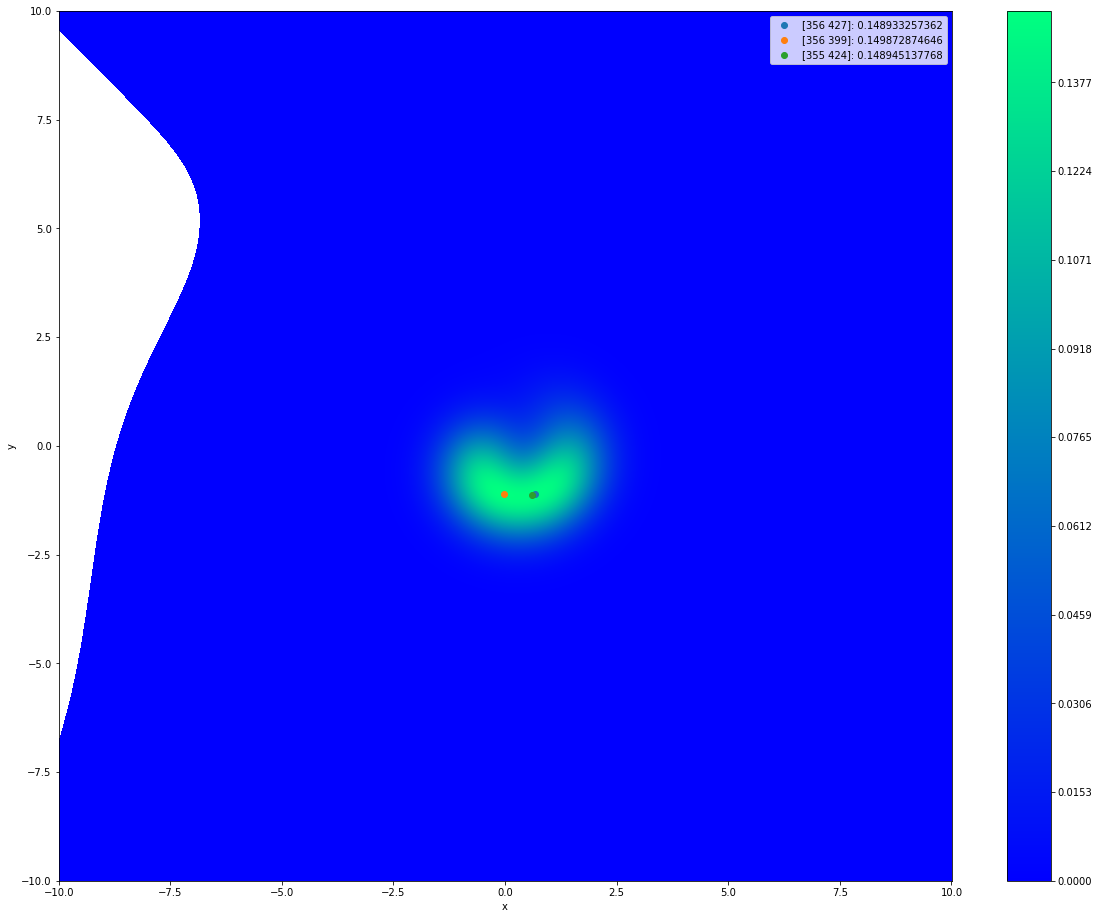

In [87]:
samples = [[i for i in relevantInfo if len(i['peaks']) == 3][10]]
#samples = [i for i in relevantInfo if i['peakName'] == '/mnt/c/Users/manish/Documents/GitHub/qpeak/peaks/peaksOverview/1042.qpeak']

for sample in samples:
    routine(sample['E'], sample['wd'])    

0 datapoints were trimmed.


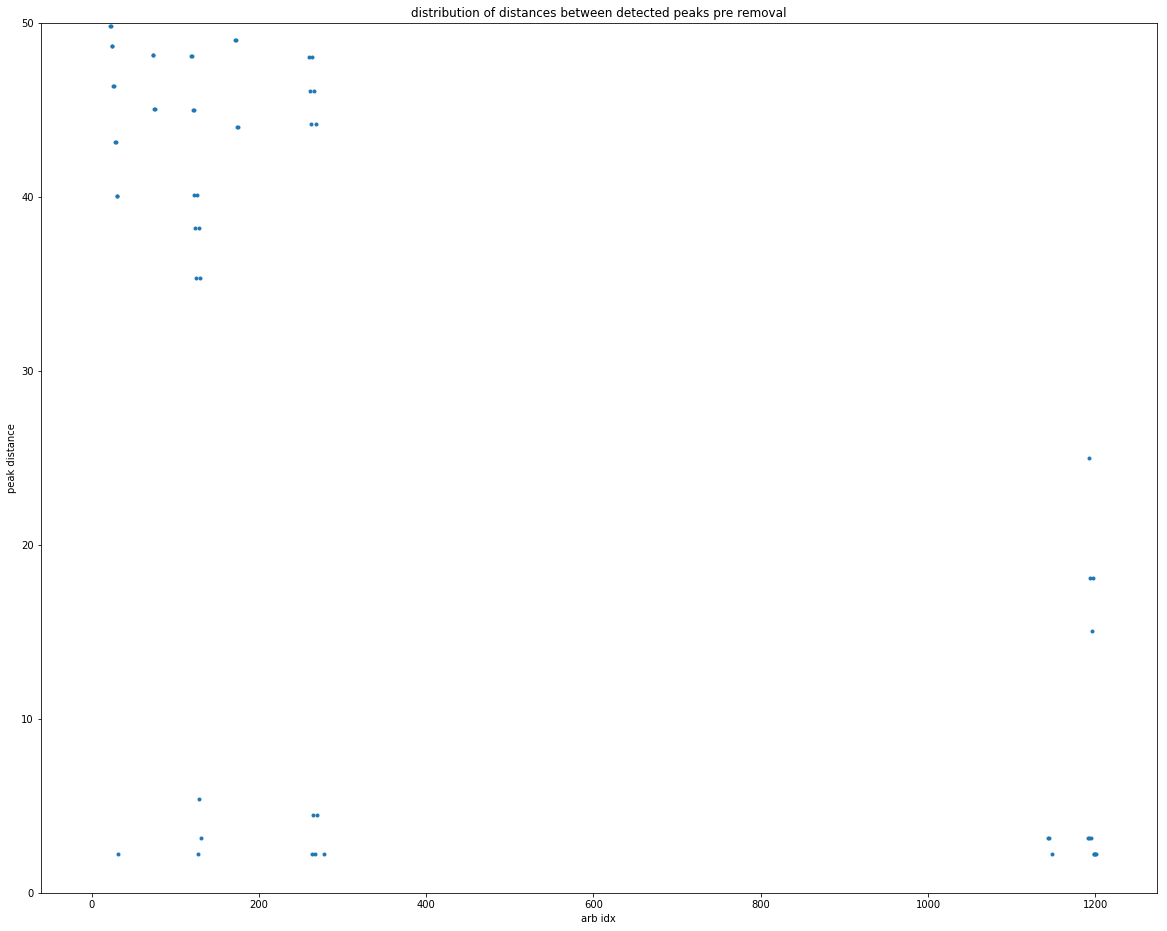

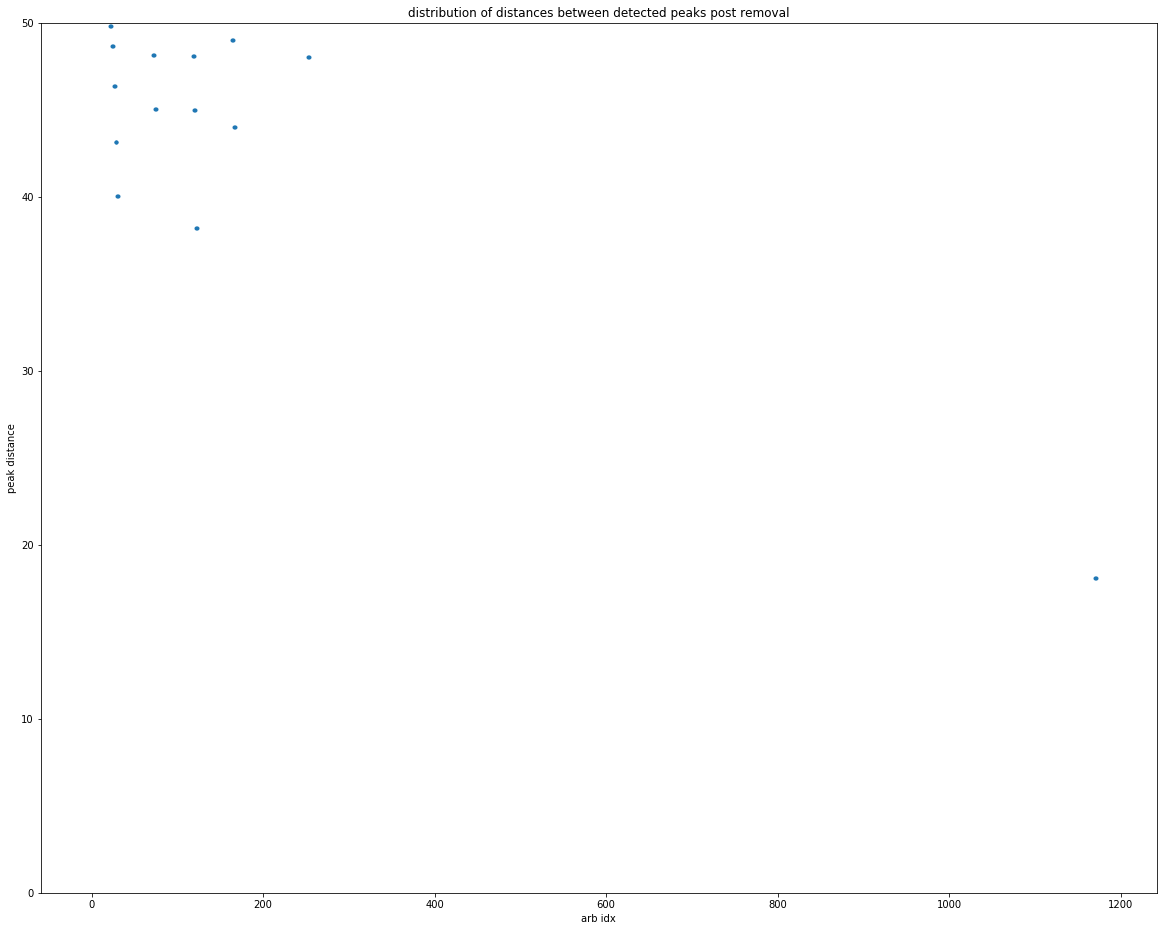

In [127]:
#trim similar peaks (that are within some range of each other and have peaks that are within some range)

minDist = 30 #in abs units of xvec, yvec
#minHeightDiff = 0.1 #in relevant units of Qfn. height probably would be in the range 1.0000xxxxx is permitted

peakDist= []
peakDistPost = []

packetsTrimmed = 0

for relevantInfo_i in relevantInfo:
    peaksTmp = []
    for coors, peak in zip(relevantInfo_i['coors'], relevantInfo_i['peaks']):
        peaksTmp.append((coors, peak))
        
    for coor1, peak1 in peaksTmp:
        for coor2, peak2 in peaksTmp:
            if coor1[0] != coor2[0] and coor1[1] != coor2[1]:
                dist = np.sqrt((coor1[0] - coor2[0])**2 + (coor1[1] - coor2[1])**2)
                peakDist.append(dist)
                if dist < 10:
                    if peak1 >= peak2:                        
                        peaksTmp = [i for i in peaksTmp if i[0][0] != coor2[0] and i[0][1] != coor2[1] and i[1] != peak2]
                        #peaksTmp.remove((coor2, peak2))
                    else:
                        peaksTmp = [i for i in peaksTmp if i[0][0] != coor1[0] and i[0][1] != coor1[1] and i[1] != peak1]
                        #peaksTmp.remove((coor1, peak1))                
                        
            
    for coor1, peak1 in peaksTmp:
        for coor2, peak2 in peaksTmp:
            if coor1[0] != coor2[0] and coor1[1] != coor2[1]:
                dist = np.sqrt((coor1[0] - coor2[0])**2 + (coor1[1] - coor2[1])**2)
                peakDistPost.append(dist)
    
    newCoors = []
    newPeaks = []
    for coor, peak in peaksTmp:
        newCoors.append(coor)
        newPeaks.append(peak)
    if len(newPeaks) != len(peaksTmp):
        relevantInfo_i['coors'] = newCoors
        relevantInfo_i['peaks'] = newPeaks
        packetsTrimmed += 1
    
                    
print('{} datapoints were trimmed.'.format(packetsTrimmed))    
            
plt.plot(peakDist, '.')
plt.title('distribution of distances between detected peaks pre removal')
plt.ylabel('peak distance')
plt.xlabel('arb idx')
plt.ylim(0, 50)
plt.show();

plt.plot(peakDistPost, '.')
plt.title('distribution of distances between detected peaks post removal')
plt.ylabel('peak distance')
plt.xlabel('arb idx')
plt.ylim(0, 50)
plt.show();

In [128]:
doublePeaks = []

for a_i in relevantInfo:
    if len(a_i['peaks']) == 2:
        for b in a_i['peaks']:
            doublePeaks.append(b)
c = [i['peaks'][0] for i in relevantInfo if len(i['peaks']) == 1]
concacPeaks = np.sum([c, doublePeaks])

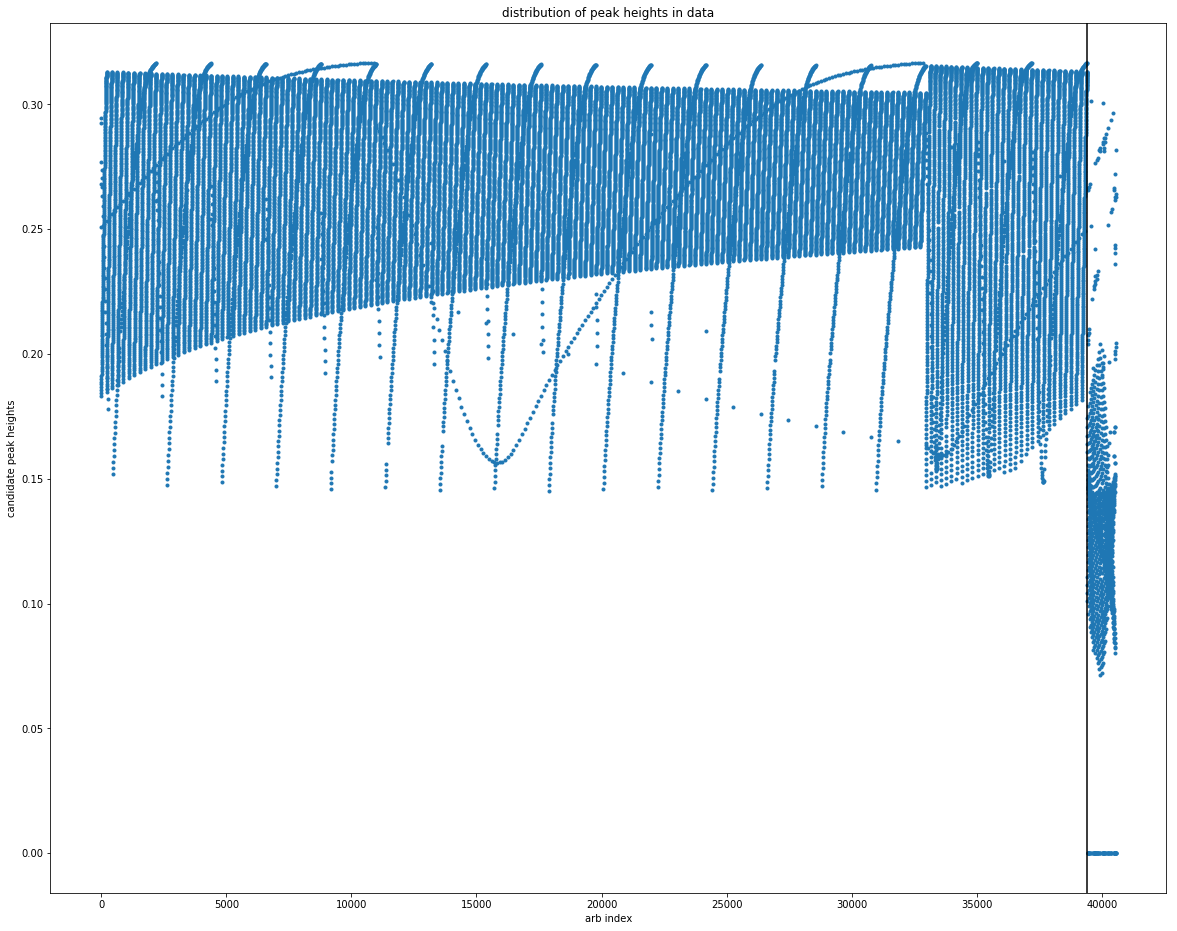

In [129]:
plt.plot(concacPeaks, '.')
plt.title('distribution of peak heights in data')
plt.ylabel('candidate peak heights')
plt.xlabel('arb index')
plt.axvline(x=len(c), color='k')
#plt.ylim(0.01,0.05)

In [150]:
np.min([i for i in concacPeaks])

1.7642481048961955e-67

In [ ]:
peaksTest = []
for relevantInfo_i in relevantInfo:
    for j in relevantInfo_i['peaks']:
        peaksTest.append(j)
    plt.plot(peaksTest, '.')
print(np.sum([j for j in peaksTest]))

In [84]:
#todo1: play with peaktrimlimit to affect width of leaf
#todo2: if 1 peak r = nothing? that might be the grey region

numIgnored = 0
plotData = []
peakTrimLimit = 0
biPeakLimit = 0.05#0.046
siPeakLimit = 9999999
singlePeakVals = []
for relevantInfo_i in relevantInfo:
    
    trimmedPeaks = []
    foundPeaks = relevantInfo_i['peaks']
    for foundPeak_i in foundPeaks:
        #if foundPeak_i > peakTrimLimit:
        trimmedPeaks.append(foundPeak_i)
    
    if len(trimmedPeaks) == 1:
#         r = 0
#         #singlePeakVals.append(trimmedPeaks[0])
#         if trimmedPeaks[0] > siPeakLimit:
#             plotData.append((relevantInfo_i['E'], relevantInfo_i['wd'], r))
        continue
    elif len(trimmedPeaks) == 2:
        #peak0 = relevantInfo_i['peaks'][0]
        #peak1 = relevantInfo_i['peaks'][1]
        peak0 = trimmedPeaks[0]
        peak1 = trimmedPeaks[1]
        if peak0 > biPeakLimit and peak1 > biPeakLimit:
            r = 1 - (abs(peak0-peak1)/(peak0+peak1))
            plotData.append((relevantInfo_i['E'], relevantInfo_i['wd'], r))
#         if r < 0.01:
#             print(peak0)
#             print(peak1)
#             print('bbbb')
#             break
#         if relevantInfo_i['wd'] < 0:
#             print(relevantInfo_i['wd'])
#             #print('aaaa')
#             break
        
    else:
        numIgnored += 1
        #print(relevantInfo_i['E'])
        #print(relevantInfo_i['wd'])
    #ignoreif more than 2 peaks
print(len(plotData))
print(len(trimmedPeaks))
print(numIgnored)
if len(plotData) == 0:
    print('NO BISTABILITY')

1600
0


In [ ]:
plotDataScaled = []
kappa = 0.0012 # 0.0012     
wc = 10.5665 # Cavity frequency/detuning 10.5665
for i in plotData:
    item = []
    item.append(i[0]/kappa)  
    item.append((i[1] - wc)/kappa)    
    item.append(i[2])
    plotDataScaled.append(item)

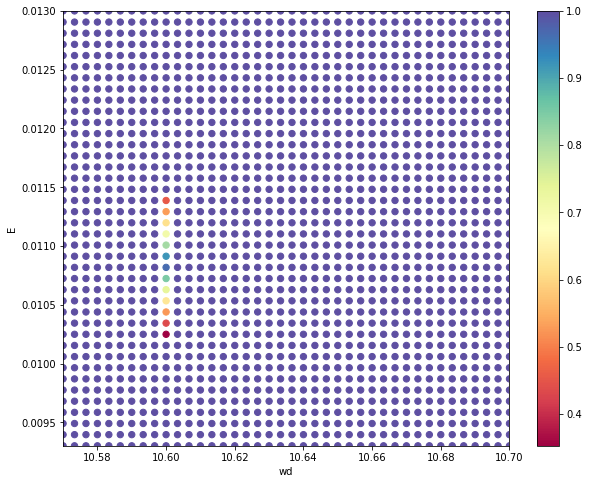

In [85]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

saveDir = 'peaks'
plt.scatter([i[1] for i in plotDataScaled], [i[0] for i in plotDataScaled], c=[i[2] for i in plotDataScaled], s=40, cmap=plt.cm.Spectral)
plt.ylabel(r"$E/\kappa$")
plt.xlabel(r"($\mathregular{w_{drive}}- \mathregular{w_{cavity}}) / \kappa$")
#plt.ylim(min([i[0] for i in plotData]), max([i[0] for i in plotData]))

plt.ylim((min([i[0] for i in plotDataScaled])), (max([i[0] for i in plotDataScaled])))
plt.xlim((min([i[1] for i in plotDataScaled])), (max([i[1] for i in plotDataScaled])))
#plt.ylim(0.00125,0.00150)
#plt.xlim(10.6095, 10.6109)
plt.colorbar()
print("EList = np.linspace(0.0,0.004,40)")
print("wdList = np.linspace(10.6,10.62,40)")

In [31]:
savedInfoTest = pickle.load(open(os.path.join(saveDir,'3.qpeak'), 'rb'))
print(savedInfoTest.keys())
print(savedInfoTest)

dict_keys(['E_i', 'wd_i', 'coors', 'peaks', 'Q3', 'xvec', 'yvec'])
{'E_i': 0.0092999999999999992, 'wd_i': 10.58, 'coors': array([[400, 389]], dtype=int64), 'peaks': array([[[  3.71981499e-42,   6.03714302e-42,   9.78587612e-42, ...,
           3.86383369e-46,   2.33972550e-46,   1.41393322e-46],
        [  3.46027758e-42,   5.61591545e-42,   9.10307879e-42, ...,
           4.96952922e-46,   3.03914073e-46,   1.85567570e-46]]]), 'Q3': array([[  1.27063246e-85,   2.06129774e-85,   3.33980115e-85, ...,
         -5.09309191e-87,  -3.21748216e-87,  -2.02921751e-87],
       [  2.09520430e-85,   3.39898621e-85,   5.50720856e-85, ...,
         -8.39814953e-87,  -5.30376654e-87,  -3.34401954e-87],
       [  3.45054122e-85,   5.59773654e-85,   9.06978057e-85, ...,
         -1.38264673e-86,  -8.72937698e-87,  -5.50230146e-87],
       ..., 
       [  2.69844315e-85,   4.37760420e-85,   7.09282702e-85, ...,
         -1.46887481e-86,  -9.26933073e-87,  -5.83999518e-87],
       [  1.63754064e-85,   2

In [ ]:
print(routine(savedInfoTest['E_i'],savedInfoTest['wd_i']))